#<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>#

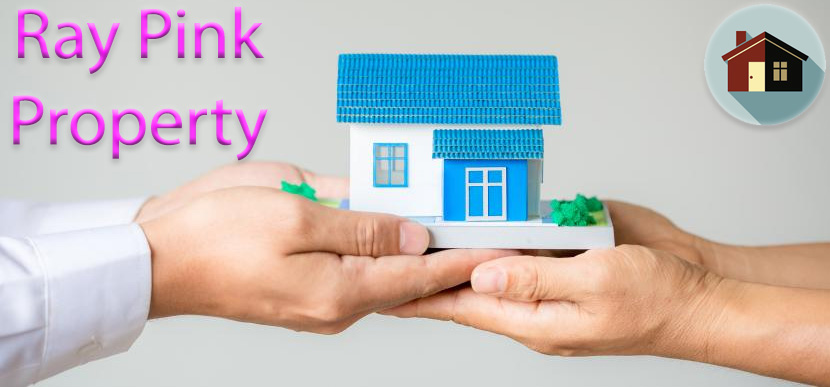

<h1> <b> Kasus </b> </h1>
<li>Anda adalah seorang Data Analyst yang bekerja di PT <strong>Ray Pink Property Indonesia</strong> (RPPI).</li>
<li>RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.</li>
<li>RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.</li>
<li>Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.</li>
<li>Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.</li>
<li>Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.</li>
<li>Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).</li>
<li>Di studi kasus ini anda mempersiapkan "bahan presentasi" (cukup ipynb saja) dengan cara melakukan <strong>EDA</strong> pada data yang diterima dari DE/DBA.</li>

<h1> <b> Petunjuk: </b> </h1>

Di studi kasus pertama, Anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi <i> over lunch </i> dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

<ol type=1>
<li>Kualitas data yang dimiliki perusahaan.</li>
<li>Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi <em>data driven company</em> yang unggul.</li>
<li>Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?</li>
<li>Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).</li>
<li>Rumah dengan karakteristik seperti apa yang paling banyak dijual?</li>
<li>Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?</li>
<li>Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?</li>
</ol>

<h1> <b> Catatan </b> </h1>

<li>Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).</li>
<li>Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.</li>
<li>Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).</li>
<li>Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.</li>
<li>Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab. Saran: Gunakan GitHub lalu run di Google Colab.</li>
<li>Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.</li>
<li>Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.</li>
<li>Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)</li>
<li>Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)</li>

<h1> <b> Komponen Penilaian </b> </h1>

<li>Code tidak diubah sejak deadline studi kasus (Diskusi di kelas).</li>
<li>Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.</li>
<li>Pemilihan preprocessing dan visualisasi yang tepat</li>
<li>Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.</li>
<li>Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.</li>

<h1> <b> Data Understanding </b> </h1>

Keterangan Variabel:

<li>Created_at: Tanggal dimana iklan rumah dibuat</li>
<li>LT		: Luas Tanah properti yang ditawarkan</li>
<li>LB		: Luas Bangunan properti yang ditawarkan</li>
<li>KT		: Jumlah Kamar Tidur properti yang ditawarkan</li>
<li>KM		: Jumlah Kamar Mandi properti yang ditawarkan</li>
<li>Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan</li>
<li>Carport	: Kapasitas Carport di properti yang ditawarkan</li>
<li>Lokasi	: Detail lokasi properti yang ditawarkan</li>
<li>Sertifikat: Jenis sertifikat properti yang ditawarkan</li>
<li>Listrik	: Daya listrik dari properti yang ditawarkan</li>
<li>Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana</li>
<li>Harga 	: Harga property yang ditawarkan dalam Rupiah</li>
<li>URL		: Alamat tautan (link) property yang ditawarkan.</li>
<li>Deskripsi	: Deskripsi iklan property yang ditawarkan.</li>

# <h1> Import Library </h1> #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import math

import plotly.express as px

# <h1> Loading Datasets </h1> #

In [2]:
xlsx = pd.ExcelFile('https://github.com/JeftaAdriel/DataMining-BusinessIntelligence/raw/main/CaseStudy-1/Datasets/Data-Property-Indonesia-Ganjil-2023.xlsx')
dfs = pd.read_excel(xlsx, None)

In [3]:
names = [key for key in dfs.keys()]
names

['Bogor',
 'Lampung - Sumatera selatan',
 'Semarang',
 'Kalimantan (All)',
 'Depok',
 'Tangerang',
 'Jakarta',
 'Bekasi',
 'Padang - Palembang',
 'Bandung',
 'Medan',
 'Surabaya',
 'Yogyakarta',
 'Bali',
 'Sulawesi(All)']

In [4]:
for name in names:
  print(f"Kolom-kolom df {name} adalah {dfs[name].columns}")

Kolom-kolom df Bogor adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14'],
      dtype='object')
Kolom-kolom df Lampung - Sumatera selatan adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga (Rp)', 'URL', 'deskripsi '],
      dtype='object')
Kolom-kolom df Semarang adalah Index(['Created_at', 'LT (m2)', 'LB (m2)', 'KT', 'KM', 'Garasi', 'Carport',
       'Lokasi', 'Sertifikat', 'Listrik', 'Hadap', 'Harga', 'URL',
       'Deskripsi'],
      dtype='object')
Kolom-kolom df Kalimantan (All) adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi '],
      dtype='object')
Kolom-kolom df Depok adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listr

In [5]:
dfs['Bogor'].drop(['Unnamed: 14'], axis=1, inplace=True)

In [6]:
dfs['Bogor'].columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [7]:
nama_kolom = ['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
              'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi', 'asal']
nama_kolom

['created_at',
 'LT',
 'LB',
 'KT',
 'KM',
 'garasi',
 'carport',
 'lokasi',
 'sertifikat',
 'listrik',
 'hadap',
 'harga',
 'URL',
 'deskripsi',
 'asal']

In [8]:
for name in names:
  dfs[name]['asal'] = name
  dfs[name].columns = nama_kolom
  print(f"Kolom-kolom df {name} adalah {dfs[name].columns}")
  print("")

Kolom-kolom df Bogor adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi', 'asal'],
      dtype='object')

Kolom-kolom df Lampung - Sumatera selatan adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi', 'asal'],
      dtype='object')

Kolom-kolom df Semarang adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi', 'asal'],
      dtype='object')

Kolom-kolom df Kalimantan (All) adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi', 'asal'],
      dtype='object')

Kolom-kolom df Depok adalah Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hada

In [9]:
for name in names:
  print(f"Berikut info dari df{name}")
  print(dfs[name].info())
  print("")

Berikut info dari dfBogor
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  295 non-null    object
 1   LT          295 non-null    int64 
 2   LB          295 non-null    int64 
 3   KT          295 non-null    int64 
 4   KM          295 non-null    int64 
 5   garasi      295 non-null    int64 
 6   carport     295 non-null    int64 
 7   lokasi      295 non-null    object
 8   sertifikat  295 non-null    object
 9   listrik     295 non-null    int64 
 10  hadap       73 non-null     object
 11  harga       295 non-null    int64 
 12  URL         295 non-null    object
 13  deskripsi   295 non-null    object
 14  asal        295 non-null    object
dtypes: int64(8), object(7)
memory usage: 34.7+ KB
None

Berikut info dari dfLampung - Sumatera selatan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns 

In [10]:
outliers = []

# <h1> Functions </h1> #

In [11]:
def make_date(df):
  '''
  Fungsi ini bertujuan untuk mengubah variabel `created_at` menjadi bertipe datetime.
  Outputnya adalah variabel `created_at` yang bertipe datetime.
  '''
  print("Berikut info df nya")
  print(df.info())
  print("")
  print("Berikut headnya")
  print(df['created_at'].head(10))
  print("")
  print("Berikut 20 samplenya")
  print(df['created_at'].sample(20))
  print("")
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
  print("Berikut head yang sudah dikonversi")
  print(df['created_at'].head(10))
  print("")
  print("Berikut 20 sample yang sudah dikonversi")
  print(df['created_at'].sample(20))
  print("")
  print("Berikut info df yang sudah dikonversi")
  print(df.info())

In [12]:
def check_date(df):
  print(df['created_at'].unique())
  print("")
  if any(df.loc[:, 'created_at']>pd.to_datetime('2023-09-27')) == True:
    print("Ada tanggal created_at yang lebih dari 27 September 2023")
    print("")
    idx = np.where(df.loc[:, 'created_at']>pd.to_datetime('2023-09-27'))[0]
    print(df.loc[idx, :])
    print("")
    print("")
    for i in idx:
      print(f"Link baris {i}: {df.loc[i, 'URL']}")
      print("")
      print(f"Deskripsi baris {i}: {df.loc[i, 'deskripsi']}")
      print("")
  else:
    print("Tidak ada tanggal created_at yang lebih dari 27 September 2023")

In [13]:
def mapping_price(df):
  '''
  Fungsi ini bertujuan untuk mengkategorikan harga perumahan menjadi 3 kategori.
  Outputnya adalah variabel `kategori_harga` yang menunjukkan suatu rumah yang dijual itu masuk ke kategori harga "murah", "sedang", atau "mahal".
  Murah itu dari Rp 0 sampai kurang dari Rp 500 juta
  Sedang itu dari Rp 500 juta sampai kurang dari Rp 1 Miliar
  Mahal itu dari Rp 1 Miliar ke atas
  '''
  ranges = [0, 500_000_000, 1_000_000_000, np.inf]
  group_names = ['Murah', 'Sedang', 'Mahal']
  df['kategori_harga'] = pd.cut(df['harga'], bins=ranges, labels=group_names)

In [14]:
def clean_text(text):
  '''
  Fungsi ini bertujuan untuk membersihkan kalimat pada variabel `deskripsi`.
  Outputnya adalah kalimat-kalimat yang sudah dibersihkan.
  '''
  #Remove unicode characters
  cleaned_text = text.encode('ascii', 'ignore').decode()
  #Strip and lower case
  cleaned_text = cleaned_text.strip().lower()
  #Remove all symbols and keep only words and numbers
  cleaned_text = re.sub('[^A-Za-z0-9 ]+', '', cleaned_text)
  return cleaned_text

In [15]:
def text_info_extract(df, keywords):
  '''
  Fungsi ini bertujuan untuk mengecek kata-kata kunci fitur apa saja yang terdapat pada dataframe yang diberikan.
  Kata-kata kunci fitur terdapat pada list kalimat (keywords) yang diberikan oleh user.
  '''
  list_key_features=[]
  for index,row in df.iterrows():
    res = [ele for ele in keywords if (ele in row['deskripsi'])] #cek di deskripsi ada kata keyword gak
    if len(res)==0:
        key_features='None'
    else:
        key_features=', '.join(res) #kalau ada 1 atau lebih keyword, gabung jadi 1 string
    list_key_features.append(key_features)
  return list_key_features

In [16]:
def key_features_variable(df):
  '''
  Fungsi ini bertujuan untuk membuat dummy variabel baru berdasarkan kata-kata kunci fitur yang dimiliki dataframe.
  Outputnya adalah 4 variabel baru yang bernilai 0 atau 1.
  Minimalis artinya rumah tersebut berukuran kecil tetapi memiliki desain yang bagus
  Strategis artinya rumah tersebut dekat dengan fasilitas-fasilitas umum / tempat-tempat penting. Kedekatannya diketahui dari penyebutan kata 'meter' atau 'menit'
  Bebas banjir artinya rumah tersebut bebas banjir
  Pemandangan artinya rumah tersebut memiliki pemandangan yang hijau, asri, dan pemandangan alam
  '''
  #Create "minimalis" variable
  df['minimalis'] = df['key_features'].apply(lambda x: 1 if 'minimalis' in str(x) else 0).astype('category')

  #Create "strategis" variable
  df['strategis'] = df['key_features'].apply(lambda x: 1 if any(i in str(x) for i in ['strategis', 'tol', 'dekat', 'menit',
                                                                                      'fasilitas', 'mal', 'destinasi', 'bandara',
                                                                                      'meter']) else 0).astype('category')

  #Create "bebas_banjir" variable
  df['bebas_banjir'] = df['key_features'].apply(lambda x: 1 if 'bebas banjir' in str(x) else 0).astype('category')

  #Create "pemandangan" variable
  df['pemandangan'] = df['key_features'].apply(lambda x: 1 if any(i in str(x) for i in ['view', 'pemandangan',
                                                                                        'gunung', 'pegunungan', 'hijau', 'sawah']) else 0).astype('category')

In [17]:
def change_variable_type(df):
  '''
  Fungsi ini bertujuan untuk mengubah tipe-tipe variabel menjadi tipe yang bersesuaian.
  '''
  df.loc[:, 'LB'] = df.loc[:, 'LB'].astype('float64')
  df.loc[:, 'LT'] = df.loc[:, 'LT'].astype('float64')
  df.loc[:, 'KT'] = df.loc[:, 'KT'].astype('category')
  df.loc[:, 'KM'] = df.loc[:, 'KM'].astype('category')
  df.loc[:, 'garasi'] = df.loc[:, 'garasi'].astype('category')
  df.loc[:, 'carport'] = df.loc[:, 'carport'].astype('category')
  df.loc[:, 'sertifikat'] = df.loc[:, 'sertifikat'].astype('category')
  df.loc[:, 'listrik'] = df.loc[:, 'listrik'].astype('category')
  df.loc[:, 'harga'] = df.loc[:, 'harga'].astype('int64')
  df.loc[:, 'asal'] = df.loc[:, 'asal'].astype('category')

In [18]:
def boxplot_each_var(df, listnya, title):
  '''
  Fungsi ini bertujuan untuk mengplot boxplot berdasarkan dummy variabel untuk fitur-fiturnya
  Outputnya adalah plot
  '''
  fig, axs = plt.subplots(len(listnya), 2, figsize=(15, 20))  # Create a grid of subplots

  for i, l in enumerate(listnya):
    for j in range(2):
      # Filter the DataFrame based on the current category and level
      filtered_df = df[(df[l] == j) & (df['asal'].notna())]

      # Create a box plot on the current subplot
      sns.boxplot(data=filtered_df, x='asal', y='harga', ax=axs[i, j])
      axs[i, j].set_title(f"{l} = {j}")  # Set the title of the subplot
      axs[i, j].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility

  fig.suptitle(title)
  plt.tight_layout()
  plt.show()

In [19]:
def histplot_each_asal(df, title):
  '''
  Fungsi ini bertujuan untuk membuat plot histogram dari variabel harga untuk setiap wilayah
  Outputnya adalah plot
  '''
  asal_values = df['asal'].unique()
  n = len(asal_values)

  # Calculate the number of rows and columns for the grid
  rows = math.ceil(n / 4)
  cols = 4 if n > 4 else n

  # Create a new figure and set the size
  fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
  axs = axs.ravel()  # Flatten the array of axes

  # Create a histogram for each 'asal' value
  for i, asal in enumerate(asal_values):
      filtered_df = df[df['asal'] == asal]
      sns.histplot(data=filtered_df, x='harga', ax=axs[i])
      axs[i].set_title(f"df {asal}")

  # Remove any unused subplots
  for j in range(i+1, rows*cols):
      fig.delaxes(axs[j])

  fig.suptitle(title)
  plt.tight_layout()
  plt.show()

In [393]:
def ubah_arah(arah):
  '''
  Fungsi ini bertujuan untuk mengstandarisasi arah mata angin di kolom hadap
  Outputnya adalah arah mata angin yang sudah terstandarisasi
  '''
  if 'utara' in arah and 'barat' in arah:
    return 'barat laut'
  elif 'timur' in arah and 'selatan' in arah:
    return 'tenggara'
  elif 'timur' in arah and 'utara' in arah:
    return 'timur laut'
  elif 'barat' in arah and 'selatan' in arah:
    return 'barat daya'
  else:
    return arah

# <h1> Preprocessing (Part 1) </h1> #

## <h2> Variabel `created_at` </h2> ##

Akan dicek tipe data untuk variabel `created_at`. Kemudian akan dilakukan standarisasi data menjadi datetime

Berdasarkan hasil pengecekan dfs.info() untuk setiap wilayah sebelumnya, awalnya pada semua wilayah tipe data untuk variabel `created_at` adalah object, kecuali pada wilayah "Jakarta" yang sudah berbentuk datetime. Setelah dilakukan standardisasi, tipe data untuk variabel `created_at` adalah datetime.

### <h2> Bogor </h2> ###

In [20]:
make_date(dfs['Bogor'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  295 non-null    object
 1   LT          295 non-null    int64 
 2   LB          295 non-null    int64 
 3   KT          295 non-null    int64 
 4   KM          295 non-null    int64 
 5   garasi      295 non-null    int64 
 6   carport     295 non-null    int64 
 7   lokasi      295 non-null    object
 8   sertifikat  295 non-null    object
 9   listrik     295 non-null    int64 
 10  hadap       73 non-null     object
 11  harga       295 non-null    int64 
 12  URL         295 non-null    object
 13  deskripsi   295 non-null    object
 14  asal        295 non-null    object
dtypes: int64(8), object(7)
memory usage: 34.7+ KB
None

Berikut headnya
0    2021-03-12 00:00:00
1    2021-06-12 00:00:00
2    2021-06-12 00:00:00
3    2021-06-12 00:00:00
4    2021-06-12 00:00:

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [21]:
check_date(dfs['Bogor'])

['2021-03-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-01-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-05-30T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-07-09T00:00:00.000000000'
 '2023-07-16T00:00:00.000000000' '2023-09-14T00:00:00.000000000'
 '2023-07-17T00:00:00.000000000' '2023-08-08T00:00:00.000000000'
 '2023-09-20T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-16T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000' '2023-08-23T00:00:00.000000000'
 '2023-08-28T00:00:00.000000000' '2023-10-09T00:00:00.000000000'
 '2023-02-09T00:00:00.000000000' '2023-08-16T00:00:00.000000000'
 '2023-05-17T00:00:00.000000000' '2023-03-09T00:00:00.000000000']

Ada tanggal created_at yang lebih dari 27 September 2023

    created_at  LT  LB  KT  KM

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Bogor dan pada baris 288 (286+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 10 September 2023

In [22]:
dfs['Bogor'].loc[286, 'created_at'] = pd.to_datetime('2023-09-10')

In [23]:
dfs['Bogor'].loc[286, :]

created_at                                  2023-09-10 00:00:00
LT                                                           72
LB                                                           95
KT                                                            3
KM                                                            2
garasi                                                        1
carport                                                       0
lokasi                                                  Jonggol
sertifikat                                                  HGB
listrik                                                    1300
hadap                                                     Timur
harga                                                 470000000
URL           https://www.rumah123.com/properti/bogor/hos147...
deskripsi                          Rumah Murah 2 Lantai Ciputra
asal                                                      Bogor
Name: 286, dtype: object

In [24]:
check_date(dfs['Bogor'])

['2021-03-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-01-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-05-30T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-07-09T00:00:00.000000000'
 '2023-07-16T00:00:00.000000000' '2023-09-14T00:00:00.000000000'
 '2023-07-17T00:00:00.000000000' '2023-08-08T00:00:00.000000000'
 '2023-09-20T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-16T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000' '2023-08-23T00:00:00.000000000'
 '2023-08-28T00:00:00.000000000' '2023-09-10T00:00:00.000000000'
 '2023-02-09T00:00:00.000000000' '2023-08-16T00:00:00.000000000'
 '2023-05-17T00:00:00.000000000' '2023-03-09T00:00:00.000000000']

Tidak ada tanggal created_at yang lebih dari 27 September 2023


### <h2> Lampung - Sumatera Selatan </h2> ###

In [25]:
make_date(dfs['Lampung - Sumatera selatan'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  184 non-null    object 
 1   LT          184 non-null    int64  
 2   LB          183 non-null    float64
 3   KT          183 non-null    float64
 4   KM          183 non-null    float64
 5   garasi      140 non-null    float64
 6   carport     145 non-null    float64
 7   lokasi      184 non-null    object 
 8   sertifikat  183 non-null    object 
 9   listrik     182 non-null    object 
 10  hadap       56 non-null     object 
 11  harga       184 non-null    int64  
 12  URL         183 non-null    object 
 13  deskripsi   183 non-null    object 
 14  asal        184 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 21.7+ KB
None

Berikut headnya
0             27-11-2021
1    2021-05-12 00:00:00
2    2021-08-12 00:00:00
3    2021-05-12 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [26]:
check_date(dfs['Lampung - Sumatera selatan'])

['2021-11-27T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-08-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-10-16T00:00:00.000000000'
 '2021-09-26T00:00:00.000000000' '2021-09-22T00:00:00.000000000'
 '2021-11-09T00:00:00.000000000' '2021-10-09T00:00:00.000000000'
 '2021-08-09T00:00:00.000000000' '2021-01-09T00:00:00.000000000'
 '2021-11-15T00:00:00.000000000' '2021-10-27T00:00:00.000000000'
 '2021-10-17T00:00:00.000000000' '2021-10-15T00:00:00.000000000'
 '2021-10-13T00:00:00.000000000' '2021-03-10T00:00:00.000000000'
 '2021-01-10T00:00:00.000000000' '2021-09-17T00:00:00.000000000'
 '2021-08-28T00:00:00.000000000' '2021-08-19T00:00:00.000000000'
 '2021-11-23T00:00:00.000000000' '2021-06-10T00:00:00.000000000'
 '2021-07-17T00:00:00.000000000' '2021-11-22T00:00:00.000000000'
 '2021-09-12T00:00:00.000

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Lampung - Sumatera Selatan dan pada baris 156, diperoleh bahwa value dari variabel `created_at` nya harusnya 11 September 2023. Selanjutnya untuk baris 157, diperoleh bahwa value dari variabel `created_at` nya harusnya 22 September 2023

In [27]:
dfs['Lampung - Sumatera selatan'].loc[156, 'created_at'] = pd.to_datetime('2023-09-11')
dfs['Lampung - Sumatera selatan'].loc[157, 'created_at'] = pd.to_datetime('2023-09-22')

In [28]:
dfs['Lampung - Sumatera selatan'].loc[156, :]

created_at                                  2023-09-11 00:00:00
LT                                                          276
LB                                                        828.0
KT                                                          3.0
KM                                                          2.0
garasi                                                      2.0
carport                                                     0.0
lokasi                                   Banyuasin I, Banyuasin
sertifikat                                                  SHM
listrik                                                    3500
hadap                                                     Barat
harga                                                2000000000
URL           https://www.rumah123.com/properti/banyuasin/ho...
deskripsi     Dijual Murah Rumah Kenten Laut Palembang Harga...
asal                                 Lampung - Sumatera selatan
Name: 156, dtype: object

In [29]:
check_date(dfs['Lampung - Sumatera selatan'])

['2021-11-27T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-08-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-10-16T00:00:00.000000000'
 '2021-09-26T00:00:00.000000000' '2021-09-22T00:00:00.000000000'
 '2021-11-09T00:00:00.000000000' '2021-10-09T00:00:00.000000000'
 '2021-08-09T00:00:00.000000000' '2021-01-09T00:00:00.000000000'
 '2021-11-15T00:00:00.000000000' '2021-10-27T00:00:00.000000000'
 '2021-10-17T00:00:00.000000000' '2021-10-15T00:00:00.000000000'
 '2021-10-13T00:00:00.000000000' '2021-03-10T00:00:00.000000000'
 '2021-01-10T00:00:00.000000000' '2021-09-17T00:00:00.000000000'
 '2021-08-28T00:00:00.000000000' '2021-08-19T00:00:00.000000000'
 '2021-11-23T00:00:00.000000000' '2021-06-10T00:00:00.000000000'
 '2021-07-17T00:00:00.000000000' '2021-11-22T00:00:00.000000000'
 '2021-09-12T00:00:00.000

### <h2> Semarang </h2> ###

In [30]:
make_date(dfs['Semarang'])

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  194 non-null    object 
 1   LT          194 non-null    int64  
 2   LB          194 non-null    int64  
 3   KT          194 non-null    int64  
 4   KM          194 non-null    int64  
 5   garasi      112 non-null    float64
 6   carport     172 non-null    float64
 7   lokasi      194 non-null    object 
 8   sertifikat  194 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       116 non-null    object 
 11  harga       194 non-null    int64  
 12  URL         194 non-null    object 
 13  deskripsi   194 non-null    object 
 14  asal        194 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 22.9+ KB
None

Berikut headnya
0    06-12-2021
1    06-12-2021
2    07-12-2021
3    06-12-2021
4    06-12-2021
5    06-12-20

In [31]:
check_date(dfs['Semarang'])

['2021-06-12T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-07-25T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2021-07-11T00:00:00.000000000'
 '2021-07-10T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-26T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-11-19T00:00:00.000000000' '2021-11-15T00:00:00.000000000'
 '2021-11-25T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-09-18T00:00:00.000000000' '2023-09-17T00:00:00.000000000'
 '2023-08-29T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-09T00:00:00.000000000' '2023-08-24T00:00:00.000000000'
 '2023-06-09T00:00:00.000000000' '2023-09-13T00:00:00.000000000'
 '2023-01-09T00:00:00.000

### <h2> Kalimantan (All) </h2> ###

In [32]:
make_date(dfs['Kalimantan (All)'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  219 non-null    object 
 1   LT          219 non-null    int64  
 2   LB          219 non-null    int64  
 3   KT          219 non-null    int64  
 4   KM          218 non-null    float64
 5   garasi      113 non-null    float64
 6   carport     135 non-null    float64
 7   lokasi      219 non-null    object 
 8   sertifikat  219 non-null    object 
 9   listrik     186 non-null    float64
 10  hadap       29 non-null     object 
 11  harga       218 non-null    float64
 12  URL         218 non-null    object 
 13  deskripsi   215 non-null    object 
 14  asal        219 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 25.8+ KB
None

Berikut headnya
0    2021-01-12 00:00:00
1    2021-01-12 00:00:00
2    2021-01-12 00:00:00
3    2021-01-12 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [33]:
check_date(dfs['Kalimantan (All)'])

['2021-01-12T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-05-15T00:00:00.000000000'
 '2021-06-12T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-03-11T00:00:00.000000000' '2021-12-11T00:00:00.000000000'
 '2021-11-29T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-02-10T00:00:00.000000000' '2021-10-20T00:00:00.000000000'
 '2021-10-22T00:00:00.000000000' '2021-10-27T00:00:00.000000000'
 '2021-09-22T00:00:00.000000000' '2021-09-09T00:00:00.000000000'
 '2021-07-08T00:00:00.000000000' '2021-08-18T00:00:00.000000000'
 '2021-08-27T00:00:00.000000000' '2021-02-06T00:00:00.000000000'
 '2021-06-22T00:00:00.000000000' '2021-05-20T00:00:00.000000000'
 '2021-05-25T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-09-11T00:00:00.000000000'
 '2023-09-12T00:00:00.000000000' '2023-09-01T00:00:00.000000000'
 '2023-09-09T00:00:00.000

### <h2> Depok </h2> ###

In [34]:
make_date(dfs['Depok'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  205 non-null    object 
 1   LT          205 non-null    int64  
 2   LB          205 non-null    int64  
 3   KT          205 non-null    int64  
 4   KM          205 non-null    int64  
 5   garasi      105 non-null    float64
 6   carport     180 non-null    float64
 7   lokasi      205 non-null    object 
 8   sertifikat  205 non-null    object 
 9   listrik     189 non-null    float64
 10  hadap       117 non-null    object 
 11  harga       205 non-null    int64  
 12  URL         205 non-null    object 
 13  deskripsi   205 non-null    object 
 14  asal        205 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 24.1+ KB
None

Berikut headnya
0    2021-06-12 00:00:00
1    2021-06-12 00:00:00
2    2021-06-12 00:00:00
3    2021-06-12 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [35]:
check_date(dfs['Depok'])

['2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-14T00:00:00.000000000' '2023-06-29T00:00:00.000000000'
 '2023-02-09T00:00:00.000000000' '2023-10-07T00:00:00.000000000'
 '2023-09-20T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-11-09T00:00:00.000000000' '2023-09-15T00:00:00.000000000'
 '2023-04-18T00:00:00.000000000' '2023-09-13T00:00:00.000000000'
 '2023-05-21T00:00:00.000000000' '2023-02-08T00:00:00.000000000'
 '2023-08-22T00:00:00.000000000']

Ada tanggal created_at yang lebih dari 27 September 2023

    created_at   LT   LB  KT  KM  garasi  carport    lokasi sertifikat  \
182 2023-10-07   77   45   2   1     NaN      1.0  Cipayung        SHM   
197 2023-11-09  510  450   6   5     2.0      3.0    Cinere        SHM   

     listrik  hadap        harga  \
182   1300.0  Timur    725000000   
197  11000.0    NaN  100000

- Dengan mengecek tautan di baris itu (serta mencari tautan aslinya khusus untuk baris 182 karena tautannya error di situ) dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Depok dan pada baris 184 (182+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 30 Agustus 2023. Selanjutnya untuk baris 199 (197+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 11 September 2023

In [36]:
dfs['Depok'].loc[182, 'created_at'] = pd.to_datetime('2023-08-30')
dfs['Depok'].loc[197, 'created_at'] = pd.to_datetime('2023-09-11')

In [37]:
dfs['Depok'].loc[182, 'URL'] = 'https://www.rumah.com/listing-properti/dijual-perumahan-green-pitara-cipayung-depok-oleh-zatu-shabrina-badlyn-21732363'

In [38]:
dfs['Depok'].loc[182, :]

created_at                                  2023-08-30 00:00:00
LT                                                           77
LB                                                           45
KT                                                            2
KM                                                            1
garasi                                                      NaN
carport                                                     1.0
lokasi                                                 Cipayung
sertifikat                                                  SHM
listrik                                                  1300.0
hadap                                                     Timur
harga                                                 725000000
URL           https://www.rumah.com/listing-properti/dijual-...
deskripsi     Rumah seken shm bebas banjir strategis 15 meni...
asal                                                      Depok
Name: 182, dtype: object

In [39]:
check_date(dfs['Depok'])

['2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-14T00:00:00.000000000' '2023-06-29T00:00:00.000000000'
 '2023-02-09T00:00:00.000000000' '2023-08-30T00:00:00.000000000'
 '2023-09-20T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-09-11T00:00:00.000000000' '2023-09-15T00:00:00.000000000'
 '2023-04-18T00:00:00.000000000' '2023-09-13T00:00:00.000000000'
 '2023-05-21T00:00:00.000000000' '2023-02-08T00:00:00.000000000'
 '2023-08-22T00:00:00.000000000']

Tidak ada tanggal created_at yang lebih dari 27 September 2023


### <h2> Tangerang </h2> ###

In [40]:
make_date(dfs['Tangerang'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  214 non-null    object 
 1   LT          214 non-null    int64  
 2   LB          214 non-null    int64  
 3   KT          213 non-null    float64
 4   KM          214 non-null    int64  
 5   garasi      119 non-null    float64
 6   carport     157 non-null    float64
 7   lokasi      214 non-null    object 
 8   sertifikat  212 non-null    object 
 9   listrik     201 non-null    float64
 10  hadap       102 non-null    object 
 11  harga       214 non-null    int64  
 12  URL         214 non-null    object 
 13  deskripsi   214 non-null    object 
 14  asal        214 non-null    object 
dtypes: float64(4), int64(4), object(7)
memory usage: 25.2+ KB
None

Berikut headnya
0    2021-12-06 00:00:00
1    2021-12-06 00:00:00
2    2021-12-06 00:00:00
3    2021-12-06 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [41]:
check_date(dfs['Tangerang'])

['2021-12-06T00:00:00.000000000' '2021-12-07T00:00:00.000000000'
 '2021-12-08T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-05-30T00:00:00.000000000' '2023-05-23T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-21T00:00:00.000000000']

Tidak ada tanggal created_at yang lebih dari 27 September 2023


### <h2> Jakarta </h2> ###

In [42]:
make_date(dfs['Jakarta'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  175 non-null    datetime64[ns]
 1   LT          175 non-null    int64         
 2   LB          175 non-null    int64         
 3   KT          175 non-null    int64         
 4   KM          175 non-null    int64         
 5   garasi      98 non-null     float64       
 6   carport     144 non-null    float64       
 7   lokasi      175 non-null    object        
 8   sertifikat  173 non-null    object        
 9   listrik     174 non-null    float64       
 10  hadap       68 non-null     object        
 11  harga       175 non-null    int64         
 12  URL         175 non-null    object        
 13  deskripsi   166 non-null    object        
 14  asal        175 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)


In [43]:
check_date(dfs['Jakarta'])

['2021-12-06T00:00:00.000000000' '2021-12-02T00:00:00.000000000'
 '2021-12-05T00:00:00.000000000' '2021-12-07T00:00:00.000000000'
 '2021-11-07T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-11-18T00:00:00.000000000' '2021-12-04T00:00:00.000000000'
 '2021-11-29T00:00:00.000000000' '2021-11-22T00:00:00.000000000'
 '2021-11-15T00:00:00.000000000' '2021-11-06T00:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2021-12-03T00:00:00.000000000'
 '2021-10-06T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-12-26T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-06-07T00:00:00.000000000']

Tidak ada tanggal created_at yang lebih dari 27 September 2023


### <h2> Padang - Palembang </h2> ###

In [44]:
make_date(dfs['Padang - Palembang'])

Berikut info df nya

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  200 non-null    object 
 1   LT          201 non-null    object 
 2   LB          200 non-null    float64
 3   KT          200 non-null    float64
 4   KM          200 non-null    float64
 5   garasi      92 non-null     float64
 6   carport     126 non-null    float64
 7   lokasi      200 non-null    object 
 8   sertifikat  199 non-null    object 
 9   listrik     183 non-null    object 
 10  hadap       47 non-null     object 
 11  harga       200 non-null    float64
 12  URL         200 non-null    object 
 13  deskripsi   199 non-null    object 
 14  asal        219 non-null    object 
dtypes: float64(6), object(9)
memory usage: 25.8+ KB
None

Berikut headnya
0    2021-12-06 00:00:00
1    2021-12-01 00:00:00
2    2021-12-04 00:00:00
3    2021-12-05 00:00:00
4    2021-12-15 00:00:

In [45]:
check_date(dfs['Padang - Palembang'])

['2021-12-06T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-12-04T00:00:00.000000000' '2021-12-05T00:00:00.000000000'
 '2021-12-15T00:00:00.000000000' '2021-11-14T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-12-07T00:00:00.000000000' '2021-12-08T00:00:00.000000000'
 '2021-12-11T00:00:00.000000000' '2021-12-12T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-11-27T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-11-22T00:00:00.000000000' '2021-11-13T00:00:00.000000000'
 '2021-11-06T00:00:00.000000000' '2021-11-05T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-12-02T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-09-17T00:00:00.000000000' '2023-09-14T00:00:00.000000000'
 '2023-12-09T00:00:00.000

- Dengan mengecek Google Sheets (*Dataset*) secara langsung pada *sheet* Padang - Palembang dan pada baris 157 (155+2), 163 (161+2), dan 171 (169+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 12 September 2023. Kemudian pada baris 160 (158+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 11 Agustus 2023 dan Kemudian pada baris 161 (159+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 10 Agustus 2023. Selanjutnya pada baris 191 (189+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 11 September 2023 dan Selanjutnya pada baris 201 (199+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 17 Juli 2023

In [46]:
dfs['Padang - Palembang'].loc[155, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Padang - Palembang'].loc[161, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Padang - Palembang'].loc[169, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Padang - Palembang'].loc[158, 'created_at'] = pd.to_datetime('2023-08-11')
dfs['Padang - Palembang'].loc[159, 'created_at'] = pd.to_datetime('2023-08-10')
dfs['Padang - Palembang'].loc[189, 'created_at'] = pd.to_datetime('2023-09-11')
dfs['Padang - Palembang'].loc[199, 'created_at'] = pd.to_datetime('2023-07-17')

In [47]:
dfs['Padang - Palembang'].loc[155, :]

created_at                                  2023-09-12 00:00:00
LT                                                          600
LB                                                        300.0
KT                                                          5.0
KM                                                          4.0
garasi                                                      NaN
carport                                                     NaN
lokasi                                     Sako Raya, Palembang
sertifikat                                                  SHM
listrik                                                    2200
hadap                                                       NaN
harga                                                    2100.0
URL           https://www.rumah.com/listing-properti/dijual-...
deskripsi     Rumah ini sudah dalam kondisi bagus dan siap h...
asal                                         Padang - Palembang
Name: 155, dtype: object

In [48]:
check_date(dfs['Padang - Palembang'])

['2021-12-06T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-12-04T00:00:00.000000000' '2021-12-05T00:00:00.000000000'
 '2021-12-15T00:00:00.000000000' '2021-11-14T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-12-07T00:00:00.000000000' '2021-12-08T00:00:00.000000000'
 '2021-12-11T00:00:00.000000000' '2021-12-12T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-11-27T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-11-22T00:00:00.000000000' '2021-11-13T00:00:00.000000000'
 '2021-11-06T00:00:00.000000000' '2021-11-05T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-12-02T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-09-17T00:00:00.000000000' '2023-09-14T00:00:00.000000000'
 '2023-09-12T00:00:00.000

### <h2> Bekasi </h2> ###

In [49]:
make_date(dfs['Bekasi'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    int64  
 2   LB          193 non-null    int64  
 3   KT          193 non-null    int64  
 4   KM          192 non-null    float64
 5   garasi      118 non-null    float64
 6   carport     166 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  192 non-null    object 
 9   listrik     182 non-null    float64
 10  hadap       100 non-null    object 
 11  harga       193 non-null    int64  
 12  URL         193 non-null    object 
 13  deskripsi   193 non-null    object 
 14  asal        193 non-null    object 
dtypes: float64(4), int64(4), object(7)
memory usage: 22.7+ KB
None

Berikut headnya
0    2021-08-12 00:00:00
1    2021-08-12 00:00:00
2    2021-08-12 00:00:00
3    2021-08-12 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [50]:
check_date(dfs['Bekasi'])

['2021-08-12T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-07-27T00:00:00.000000000'
 '2023-09-14T00:00:00.000000000' '2023-12-09T00:00:00.000000000'
 '2023-09-18T00:00:00.000000000' '2023-08-09T00:00:00.000000000'
 '2023-09-16T00:00:00.000000000' '2023-06-29T00:00:00.000000000'
 '2023-08-31T00:00:00.000000000' '2023-11-09T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000']

Ada tanggal created_at yang lebih dari 27 September 2023

    created_at   LT   LB  KT   KM  garasi  carport             lokasi  \
163 2023-12-09   98   96   5  2.0     0.0      1.0          Jati Asih   
175 2023-12-09   96   83   3  2.0     1.0      1.0        Bekasi Kota   
176 2023-12-09   70   38   2  1.0     

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Bekasi dan pada baris 193 (191+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 11 September 2023, pada baris 165 (163+2), 177 (175+2), 178 (176+2), 179 (177+2), 188 (186+2), 190 (188+2), 191 (189+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 12 September 2023, dan pada baris 189 (187+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 21 September 2023. Kemudian pada baris 182 (180+2) memang diperoleh data lebih dari 27 September, yaitu 2 Oktober 2023 (mengecek ke tautannya langsugn), sehingga akan baris 180 di df akan di*drop*

In [51]:
dfs['Bekasi'].loc[163, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bekasi'].loc[175, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bekasi'].loc[176, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bekasi'].loc[177, 'created_at'] = pd.to_datetime('2023-08-11')
dfs['Bekasi'].loc[186, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bekasi'].loc[187, 'created_at'] = pd.to_datetime('2023-09-21')
dfs['Bekasi'].loc[188, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bekasi'].loc[189, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bekasi'].loc[191, 'created_at'] = pd.to_datetime('2023-09-11')
dfs['Bekasi'].drop([180], axis=0, inplace=True)

In [52]:
dfs['Bekasi'].loc[163, :]

created_at                                  2023-09-12 00:00:00
LT                                                           98
LB                                                           96
KT                                                            5
KM                                                          2.0
garasi                                                      0.0
carport                                                     1.0
lokasi                                                Jati Asih
sertifikat                                                  SHM
listrik                                                  2200.0
hadap                                                   Selatan
harga                                                 910000000
URL           https://www.rumah123.com/properti/bekasi/hos14...
deskripsi     Perumahan New Graha Santika JATIH ASIH BEKASI ...
asal                                                     Bekasi
Name: 163, dtype: object

In [53]:
check_date(dfs['Bekasi'])

['2021-08-12T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-07-27T00:00:00.000000000'
 '2023-09-14T00:00:00.000000000' '2023-09-12T00:00:00.000000000'
 '2023-09-18T00:00:00.000000000' '2023-08-09T00:00:00.000000000'
 '2023-09-16T00:00:00.000000000' '2023-08-11T00:00:00.000000000'
 '2023-06-29T00:00:00.000000000' '2023-08-31T00:00:00.000000000'
 '2023-09-21T00:00:00.000000000' '2023-05-09T00:00:00.000000000'
 '2023-09-11T00:00:00.000000000']

Tidak ada tanggal created_at yang lebih dari 27 September 2023


### <h2> Bandung </h2> ###

In [54]:
make_date(dfs['Bandung'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  201 non-null    object 
 1   LT          201 non-null    int64  
 2   LB          201 non-null    int64  
 3   KT          201 non-null    int64  
 4   KM          201 non-null    int64  
 5   garasi      140 non-null    float64
 6   carport     174 non-null    float64
 7   lokasi      201 non-null    object 
 8   sertifikat  201 non-null    object 
 9   listrik     189 non-null    float64
 10  hadap       103 non-null    object 
 11  harga       200 non-null    float64
 12  URL         200 non-null    object 
 13  deskripsi   198 non-null    object 
 14  asal        201 non-null    object 
dtypes: float64(4), int64(4), object(7)
memory usage: 23.7+ KB
None

Berikut headnya
0     01 -12 - 2021
1    06 - 12 - 2021
2    06 - 12 - 2021
3    06 - 12 - 2021
4    06 - 12 

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [55]:
check_date(dfs['Bandung'])

['2021-01-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-08-12T00:00:00.000000000' '2021-11-22T00:00:00.000000000'
 '2021-11-18T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-10-11T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-07-08T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-09-15T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000' '2023-12-09T00:00:00.000000000'
 '2023-08-29T00:00:00.000000000' '2023-08-23T00:00:00.000000000'
 '2023-09-14T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-08T00:00:00.000000000' '2023-08-28T00:00:00.000000000'
 '2023-06-09T00:00:00.000000000' '2023-02-09T00:00:00.000000000'
 '2023-09-20T00:00:00.000

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Bandung dan pada baris 169 (167+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 12 September 2023

In [56]:
dfs['Bandung'].loc[167, 'created_at'] = pd.to_datetime('2023-09-12')

In [57]:
dfs['Bandung'].loc[167, :]

created_at                                  2023-09-12 00:00:00
LT                                                          160
LB                                                          180
KT                                                            3
KM                                                            2
garasi                                                      1.0
carport                                                     1.0
lokasi                                              Gegerkalong
sertifikat                                                  SHM
listrik                                                  2200.0
hadap                                                     Utara
harga                                              1990000000.0
URL           https://www.rumah123.com/properti/bandung/hos1...
deskripsi     Area: gerlong\n\nRumah Murah Siap Huni di Pond...
asal                                                    Bandung
Name: 167, dtype: object

In [58]:
check_date(dfs['Bandung'])

['2021-01-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-08-12T00:00:00.000000000' '2021-11-22T00:00:00.000000000'
 '2021-11-18T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-10-11T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-07-08T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-07-06T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-09-15T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000' '2023-09-12T00:00:00.000000000'
 '2023-08-29T00:00:00.000000000' '2023-08-23T00:00:00.000000000'
 '2023-09-14T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-08T00:00:00.000000000' '2023-08-28T00:00:00.000000000'
 '2023-06-09T00:00:00.000000000' '2023-02-09T00:00:00.000000000'
 '2023-09-20T00:00:00.000

### <h2> Medan </h2> ###

In [59]:
make_date(dfs['Medan'])

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  197 non-null    object 
 1   LT          197 non-null    int64  
 2   LB          197 non-null    int64  
 3   KT          196 non-null    float64
 4   KM          195 non-null    float64
 5   garasi      104 non-null    float64
 6   carport     140 non-null    float64
 7   lokasi      197 non-null    object 
 8   sertifikat  197 non-null    object 
 9   listrik     157 non-null    float64
 10  hadap       100 non-null    object 
 11  harga       196 non-null    float64
 12  URL         197 non-null    object 
 13  deskripsi   197 non-null    object 
 14  asal        197 non-null    object 
dtypes: float64(6), int64(2), object(7)
memory usage: 23.2+ KB
None

Berikut headnya
0    2021-06-12 00:00:00
1    2021-06-12 00:00:00
2    2021-06-12 00:00:00
3    2021-06-12 00

In [60]:
check_date(dfs['Medan'])

['2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2021-06-29T00:00:00.000000000' '2021-06-14T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2021-02-05T00:00:00.000000000' '2021-11-21T00:00:00.000000000'
 '2021-11-26T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2021-11-24T00:00:00.000000000'
 '2021-04-01T00:00:00.000000000' '2020-12-11T00:00:00.000000000'
 '2021-11-10T00:00:00.000000000' '2021-12-07T00:00:00.000000000'
 '2021-07-16T00:00:00.000000000' '2021-06-18T00:00:00.000000000'
 '2021-09-03T00:00:00.000000000' '2021-10-14T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2021-09-14T00:00:00.000000000'
 '2021-11-29T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-03-08T00:00:00.000000000'
 '2023-08-22T00:00:00.000

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Medan dan pada baris 174 (172+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 12 Agustus 2023 dan pada baris 175 (173+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 11 September 2023

In [61]:
dfs['Medan'].loc[172, 'created_at'] = pd.to_datetime('2023-08-12')
dfs['Medan'].loc[173, 'created_at'] = pd.to_datetime('2023-09-11')

In [62]:
dfs['Medan'].loc[172, :]

created_at                                  2023-08-12 00:00:00
LT                                                          117
LB                                                           80
KT                                                          3.0
KM                                                          2.0
garasi                                                      0.0
carport                                                     1.0
lokasi                                           Medan Helvetia
sertifikat                                                  SHM
listrik                                                  2200.0
hadap                                                       NaN
harga                                               735000000.0
URL           https://www.rumah.com/listing-properti/dijual-...
deskripsi     RUMAH CANTIK PINGGIR JALAN BISA SEKALIAN BUKA ...
asal                                                      Medan
Name: 172, dtype: object

In [63]:
check_date(dfs['Medan'])

['2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2021-06-29T00:00:00.000000000' '2021-06-14T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2021-02-05T00:00:00.000000000' '2021-11-21T00:00:00.000000000'
 '2021-11-26T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2021-11-24T00:00:00.000000000'
 '2021-04-01T00:00:00.000000000' '2020-12-11T00:00:00.000000000'
 '2021-11-10T00:00:00.000000000' '2021-12-07T00:00:00.000000000'
 '2021-07-16T00:00:00.000000000' '2021-06-18T00:00:00.000000000'
 '2021-09-03T00:00:00.000000000' '2021-10-14T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2021-09-14T00:00:00.000000000'
 '2021-11-29T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-03-08T00:00:00.000000000'
 '2023-08-22T00:00:00.000

### <h2> Surabaya </h2> ###

In [64]:
make_date(dfs['Surabaya'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  197 non-null    object 
 1   LT          197 non-null    float64
 2   LB          197 non-null    int64  
 3   KT          197 non-null    int64  
 4   KM          197 non-null    int64  
 5   garasi      122 non-null    float64
 6   carport     140 non-null    float64
 7   lokasi      197 non-null    object 
 8   sertifikat  195 non-null    object 
 9   listrik     160 non-null    object 
 10  hadap       155 non-null    object 
 11  harga       197 non-null    int64  
 12  URL         197 non-null    object 
 13  deskripsi   194 non-null    object 
 14  asal        197 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 23.2+ KB
None

Berikut headnya
0    2021-12-06 00:00:00
1    2021-11-29 00:00:00
2    2021-12-04 00:00:00
3    2021-11-15 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [65]:
check_date(dfs['Surabaya'])

['2021-12-06T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-12-04T00:00:00.000000000' '2021-11-15T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-12-15T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-11-06T00:00:00.000000000'
 '2021-11-22T00:00:00.000000000' '2021-10-06T00:00:00.000000000'
 '2021-09-06T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-09-30T00:00:00.000000000' '2021-12-05T00:00:00.000000000'
 '2021-12-02T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-11-11T00:00:00.000000000' '2021-11-20T00:00:00.000000000'
 '2021-10-28T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-12-09T00:00:00.000000000'
 '2023-09-18T00:00:00.000000000' '2023-05-09T00:00:00.000000000'
 '2023-07-09T00:00:00.000000000' '2023-09-16T00:00:00.000000000'
 '2023-08-30T00:00:00.000

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Surabaya dan pada baris 165 (163+2), 166 (164+2), 168 (166+2), 169 (167+2), dan 180 (178+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 12 September 2023.

In [66]:
dfs['Surabaya'].loc[163, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Surabaya'].loc[164, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Surabaya'].loc[166, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Surabaya'].loc[167, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Surabaya'].loc[178, 'created_at'] = pd.to_datetime('2023-09-12')

In [67]:
dfs['Surabaya'].loc[163, :]

created_at                                  2023-09-12 00:00:00
LT                                                        153.0
LB                                                          143
KT                                                            4
KM                                                            1
garasi                                                      0.0
carport                                                     1.0
lokasi                                              Raya A Yani
sertifikat                                                  SHM
listrik                                                    4400
hadap                                                     Utara
harga                                                1590000000
URL           https://www.rumah123.com/properti/surabaya/hos...
deskripsi     DIJUAL RUMAH SIWALANKERTO\n\nDEKAT KAMPUS PETR...
asal                                                   Surabaya
Name: 163, dtype: object

In [68]:
check_date(dfs['Surabaya'])

['2021-12-06T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-12-04T00:00:00.000000000' '2021-11-15T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-12-15T00:00:00.000000000'
 '2021-12-09T00:00:00.000000000' '2021-11-06T00:00:00.000000000'
 '2021-11-22T00:00:00.000000000' '2021-10-06T00:00:00.000000000'
 '2021-09-06T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-09-30T00:00:00.000000000' '2021-12-05T00:00:00.000000000'
 '2021-12-02T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-11-11T00:00:00.000000000' '2021-11-20T00:00:00.000000000'
 '2021-10-28T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-09-13T00:00:00.000000000' '2023-09-12T00:00:00.000000000'
 '2023-09-18T00:00:00.000000000' '2023-05-09T00:00:00.000000000'
 '2023-07-09T00:00:00.000000000' '2023-09-16T00:00:00.000000000'
 '2023-08-30T00:00:00.000

### <h2> Bali </h2> ###

In [69]:
make_date(dfs['Bali'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  191 non-null    object 
 1   LT          191 non-null    float64
 2   LB          191 non-null    float64
 3   KT          191 non-null    int64  
 4   KM          191 non-null    int64  
 5   garasi      135 non-null    float64
 6   carport     160 non-null    float64
 7   lokasi      191 non-null    object 
 8   sertifikat  191 non-null    object 
 9   listrik     179 non-null    float64
 10  hadap       93 non-null     object 
 11  harga       191 non-null    int64  
 12  URL         191 non-null    object 
 13  deskripsi   189 non-null    object 
 14  asal        191 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 22.5+ KB
None

Berikut headnya
0    2021-06-12 00:00:00
1    2021-06-12 00:00:00
2    2021-06-12 00:00:00
3    2021-06-12 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [70]:
check_date(dfs['Bali'])

['2021-06-12T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-11-18T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-10-11T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2023-05-06T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-05-22T00:00:00.000000000'
 '2023-05-29T00:00:00.000000000' '2023-05-30T00:00:00.000000000'
 '2023-02-06T00:00:00.000000000' '2023-05-17T00:00:00.000000000'
 '2023-05-23T00:00:00.000000000' '2023-05-16T00:00:00.000000000'
 '2023-05-15T00:00:00.000000000' '2023-08-05T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-16T00:00:00.000000000'
 '2023-08-30T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-08-09T00:00:00.000000000' '2023-12-09T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000' '2023-09-13T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-10-09T00:00:00.000000000'
 '2023-06-09T00:00:00.000

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Bali dan pada baris 158 (156+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 12 September 2023. Selanjutnya untuk baris 163 (161+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 10 September 2023.

In [71]:
dfs['Bali'].loc[156, 'created_at'] = pd.to_datetime('2023-09-12')
dfs['Bali'].loc[161, 'created_at'] = pd.to_datetime('2023-09-10')

In [72]:
dfs['Bali'].loc[156, :]

created_at                                  2023-09-12 00:00:00
LT                                                       1200.0
LB                                                       1000.0
KT                                                            4
KM                                                            5
garasi                                                      4.0
carport                                                     0.0
lokasi                                                 Jimbaran
sertifikat                                                  SHM
listrik                                                     NaN
hadap                                                     Utara
harga                                               20000000000
URL           https://www.rumah123.com/properti/badung/hos14...
deskripsi     Luas tanah 1200M²\nLuas bangunan 1000M²\nBangu...
asal                                                       Bali
Name: 156, dtype: object

In [73]:
check_date(dfs['Bali'])

['2021-06-12T00:00:00.000000000' '2021-11-30T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-11-18T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-04-12T00:00:00.000000000'
 '2021-10-11T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2023-05-06T00:00:00.000000000'
 '2023-06-06T00:00:00.000000000' '2023-05-22T00:00:00.000000000'
 '2023-05-29T00:00:00.000000000' '2023-05-30T00:00:00.000000000'
 '2023-02-06T00:00:00.000000000' '2023-05-17T00:00:00.000000000'
 '2023-05-23T00:00:00.000000000' '2023-05-16T00:00:00.000000000'
 '2023-05-15T00:00:00.000000000' '2023-08-05T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-09-16T00:00:00.000000000'
 '2023-08-30T00:00:00.000000000' '2023-09-18T00:00:00.000000000'
 '2023-08-09T00:00:00.000000000' '2023-09-12T00:00:00.000000000'
 '2023-05-09T00:00:00.000000000' '2023-09-13T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-09-10T00:00:00.000000000'
 '2023-06-09T00:00:00.000

### <h2> Yogyakarta </h2> ###

In [74]:
make_date(dfs['Yogyakarta'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  201 non-null    object 
 1   LT          201 non-null    int64  
 2   LB          201 non-null    int64  
 3   KT          201 non-null    int64  
 4   KM          201 non-null    int64  
 5   garasi      121 non-null    float64
 6   carport     177 non-null    float64
 7   lokasi      201 non-null    object 
 8   sertifikat  201 non-null    object 
 9   listrik     172 non-null    float64
 10  hadap       90 non-null     object 
 11  harga       201 non-null    int64  
 12  URL         201 non-null    object 
 13  deskripsi   201 non-null    object 
 14  asal        201 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 23.7+ KB
None

Berikut headnya
0    2021-06-12 00:00:00
1    2021-06-12 00:00:00
2    2021-06-12 00:00:00
3    2021-06-12 00

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


Berikut head yang sudah dikonversi
0   2021-06-12
1   2021-06-12
2   2021-06-12
3   2021-06-12
4   2021-06-12
5   2021-06-12
6   2021-06-12
7   2021-06-12
8   2021-05-12
9   2021-05-12
Name: created_at, dtype: datetime64[ns]

Berikut 20 sample yang sudah dikonversi
42    2021-02-12
72    2021-11-30
36    2021-02-12
179   2023-08-22
163   2023-09-21
21    2021-04-12
181   2023-09-19
106   2021-11-27
141   2023-07-06
112   2023-06-06
14    2021-04-12
20    2021-04-12
123   2023-06-06
143   2023-07-06
162   2023-08-09
93    2021-11-29
46    2021-01-12
7     2021-06-12
174   2023-07-26
37    2021-02-12
Name: created_at, dtype: datetime64[ns]

Berikut info df yang sudah dikonversi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  201 non-null    datetime64[ns]
 1   LT          201 non-null    int64         
 2   LB          2

In [75]:
check_date(dfs['Yogyakarta'])

['2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-11-28T00:00:00.000000000' '2021-11-27T00:00:00.000000000'
 '2021-11-26T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-08-27T00:00:00.000000000'
 '2023-08-09T00:00:00.000000000' '2023-09-21T00:00:00.000000000'
 '2023-08-14T00:00:00.000000000' '2023-08-20T00:00:00.000000000'
 '2023-05-08T00:00:00.000000000' '2023-07-26T00:00:00.000000000'
 '2023-08-30T00:00:00.000000000' '2023-01-09T00:00:00.000000000'
 '2023-08-31T00:00:00.000000000' '2023-08-24T00:00:00.000000000'
 '2023-08-22T00:00:00.000000000' '2023-10-08T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-08-29T00:00:00.000000000'
 '2023-09-22T00:00:00.000000000' '2023-08-28T00:00:00.000000000'
 '2023-11-09T00:00:00.000

- Dengan mengecek tautan di baris itu dan di Google Sheets (*Dataset*) secara langsung pada *sheet* Yogyakarta dan pada baris 182 (180+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 01 Juli 2023. Untuk baris 189 (187+2) dan 192 (189+2), diperoleh bahwa value dari variabel `created_at` nya harusnya 11 September 2023. Untuk baris 198 (196+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 22 September 2023. Untuk baris 202 (200+2) diperoleh bahwa value dari variabel `created_at` nya harusnya 07 September 2023. Untuk baris 187 dan 189 tidak diperoleh informasi mengenai tanggal dibuat untuk iklan penjualan rumah tersebut.

In [76]:
dfs['Yogyakarta'].loc[180, 'created_at'] = pd.to_datetime('2023-07-01')
dfs['Yogyakarta'].loc[[187, 189], 'created_at'] = pd.to_datetime('2023-09-11')
dfs['Yogyakarta'].loc[196, 'created_at'] = pd.to_datetime('2023-09-22')
dfs['Yogyakarta'].loc[200, 'created_at'] = pd.to_datetime('2023-09-07')

In [77]:
dfs['Yogyakarta'].loc[180, :]

created_at                                  2023-07-01 00:00:00
LT                                                          130
LB                                                          160
KT                                                            5
KM                                                            4
garasi                                                      0.0
carport                                                     2.0
lokasi                                                 Kotagede
sertifikat                                                  SHM
listrik                                                  2200.0
hadap                                                       NaN
harga                                                1999000000
URL           https://www.rumah.com/listing-properti/dijual-...
deskripsi     Rumah Mewah Yogyakarta Near Kotagede\n\nRumah ...
asal                                                 Yogyakarta
Name: 180, dtype: object

In [78]:
check_date(dfs['Yogyakarta'])

['2021-06-12T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-03-12T00:00:00.000000000'
 '2021-02-12T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-11-28T00:00:00.000000000' '2021-11-27T00:00:00.000000000'
 '2021-11-26T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-07-06T00:00:00.000000000' '2023-08-27T00:00:00.000000000'
 '2023-08-09T00:00:00.000000000' '2023-09-21T00:00:00.000000000'
 '2023-08-14T00:00:00.000000000' '2023-08-20T00:00:00.000000000'
 '2023-05-08T00:00:00.000000000' '2023-07-26T00:00:00.000000000'
 '2023-08-30T00:00:00.000000000' '2023-01-09T00:00:00.000000000'
 '2023-08-31T00:00:00.000000000' '2023-08-24T00:00:00.000000000'
 '2023-08-22T00:00:00.000000000' '2023-07-01T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-08-29T00:00:00.000000000'
 '2023-09-22T00:00:00.000000000' '2023-08-28T00:00:00.000000000'
 '2023-09-11T00:00:00.000

### <h2> Sulawesi(All) </h2> ###

In [79]:
make_date(dfs['Sulawesi(All)'])

Berikut info df nya
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  165 non-null    object
 1   LT          165 non-null    int64 
 2   LB          165 non-null    int64 
 3   KT          165 non-null    object
 4   KM          165 non-null    object
 5   garasi      165 non-null    object
 6   carport     165 non-null    object
 7   lokasi      165 non-null    object
 8   sertifikat  165 non-null    object
 9   listrik     165 non-null    object
 10  hadap       141 non-null    object
 11  harga       165 non-null    object
 12  URL         165 non-null    object
 13  deskripsi   165 non-null    object
 14  asal        165 non-null    object
dtypes: int64(2), object(13)
memory usage: 19.5+ KB
None

Berikut headnya
0    25 - 10 - 2021
1    07 - 07 - 2021
2    23 - 10 - 2021
3    02 - 01 - 2021
4    02 - 07 - 2021
5    27 - 06 - 2021
6

<ipython-input-11-6e85dbc62130>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')


In [80]:
check_date(dfs['Sulawesi(All)'])

['2021-10-25T00:00:00.000000000' '2021-07-07T00:00:00.000000000'
 '2021-10-23T00:00:00.000000000' '2021-02-01T00:00:00.000000000'
 '2021-02-07T00:00:00.000000000' '2021-06-27T00:00:00.000000000'
 '2021-06-03T00:00:00.000000000' '2020-11-26T00:00:00.000000000'
 '2021-03-23T00:00:00.000000000' '2021-01-19T00:00:00.000000000'
 '2021-01-28T00:00:00.000000000' '2021-11-10T00:00:00.000000000'
 '2020-12-10T00:00:00.000000000' '2020-08-06T00:00:00.000000000'
 '2020-04-20T00:00:00.000000000' '2020-01-03T00:00:00.000000000'
 '2021-09-05T00:00:00.000000000' '2021-10-01T00:00:00.000000000'
 '2020-11-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-08-11T00:00:00.000000000' '2021-03-11T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-09-12T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-11-19T00:00:00.000000000' '2021-11-11T00:00:00.000000000'
 '2021-11-24T00:00:00.000

- Dengan mengecek Google Sheets (*Dataset*) secara langsung pada *sheet* Sulawesi(All) dan pada baris 147, diperoleh bahwa value dari variabel `created_at` nya harusnya 12 September 2023.

In [81]:
dfs['Sulawesi(All)'].loc[147, 'created_at'] = pd.to_datetime('2023-09-12')

In [82]:
dfs['Sulawesi(All)'].loc[147, :]

created_at                                  2023-09-12 00:00:00
LT                                                          160
LB                                                          150
KT                                                            4
KM                                                            4
garasi                                                        0
carport                                                       1
lokasi                                       Malalayang, Manado
sertifikat                                                  SHM
listrik                                                    4400
hadap                                                       NaN
harga                                                1500000000
URL           https://www.rumah.com/listing-properti/dijual-...
deskripsi     Rumah Malalayang, Manado, Sulawesi Utara Murah...
asal                                              Sulawesi(All)
Name: 147, dtype: object

In [83]:
check_date(dfs['Sulawesi(All)'])

['2021-10-25T00:00:00.000000000' '2021-07-07T00:00:00.000000000'
 '2021-10-23T00:00:00.000000000' '2021-02-01T00:00:00.000000000'
 '2021-02-07T00:00:00.000000000' '2021-06-27T00:00:00.000000000'
 '2021-06-03T00:00:00.000000000' '2020-11-26T00:00:00.000000000'
 '2021-03-23T00:00:00.000000000' '2021-01-19T00:00:00.000000000'
 '2021-01-28T00:00:00.000000000' '2021-11-10T00:00:00.000000000'
 '2020-12-10T00:00:00.000000000' '2020-08-06T00:00:00.000000000'
 '2020-04-20T00:00:00.000000000' '2020-01-03T00:00:00.000000000'
 '2021-09-05T00:00:00.000000000' '2021-10-01T00:00:00.000000000'
 '2020-11-12T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-08-11T00:00:00.000000000' '2021-03-11T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-09-12T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-11-19T00:00:00.000000000' '2021-11-11T00:00:00.000000000'
 '2021-11-24T00:00:00.000

## <h2> Variabel `harga` </h2> ##

In [84]:
for name in names:
  print(f"df {name}")
  print(dfs[name].loc[dfs[name]['asal']==name, 'harga'].sample(10))
  print("")

df Bogor
212     960000000
124      65000000
266     827200000
267     923910000
253    4500000000
36     2900000000
270    2160000000
194    2950000000
224    1240000000
243     372000000
Name: harga, dtype: int64

df Lampung - Sumatera selatan
125    1300000000
143     900000000
119     375000000
14      150000000
34      450000000
158     430000000
29      350000000
77     3200000000
141    2700000000
123     600000000
Name: harga, dtype: int64

df Semarang
80       500000000
20       350000000
52      1100000000
33      1700000000
71       390000000
137      700000000
148     9500000000
74      1255000000
83     18000000000
21      1300000000
Name: harga, dtype: int64

df Kalimantan (All)
66     1.000000e+09
33     7.500000e+08
62     3.500000e+08
198    4.980000e+09
84     5.800000e+08
108    2.300000e+09
90     1.300000e+09
110    9.750000e+08
169    5.500000e+09
158    2.500000e+09
Name: harga, dtype: float64

df Depok
47          1020
69           876
14          2000
23       

Diperoleh informasi bahwa variabel `harga` untuk wilayah **Depok, Tanggerang, Padang-Palembang, dan Sulawesi** masih belum dapat format yang sesuai

In [85]:
print(dfs['Depok'].loc[110:120, 'harga'])
print(dfs['Tangerang'].loc[116:126, 'harga'])
print(dfs['Padang - Palembang'].loc[117:127, 'harga'])

110         1280
111          555
112          320
113          750
114         1000
115          195
116          185
117         1750
118    670000000
119    630000000
120    660000000
Name: harga, dtype: int64
116          2300
117          2800
118          1900
119           711
120           850
121          1860
122          1800
123          1000
124     975000000
125    2340000000
126     486000000
Name: harga, dtype: int64
117    6.000000e+02
118    3.700000e+02
119    8.300000e+02
120    2.000000e+03
121    2.600000e+03
122    3.000000e+03
123    3.700000e+02
124    5.850000e+02
125    1.300000e+09
126    2.000000e+09
127    1.200000e+09
Name: harga, dtype: float64


In [86]:
print(dfs['Depok']['harga'].head())
print(dfs['Tangerang']['harga'].head())
print(dfs['Padang - Palembang']['harga'].head())

0    2100
1     250
2     250
3     250
4     350
Name: harga, dtype: int64
0     500
1     480
2     600
3    4250
4    1700
Name: harga, dtype: int64
0     999.0
1     455.0
2    1470.0
3     675.0
4     675.0
Name: harga, dtype: float64


- Depok untuk baris ke-1 sampai ke-118 masih dalam satuan juta
- Tanggerang untuk baris ke-1 sampai ke-124 masih dalam satuan juta
- Padang-Palembang untuk baris ke-1 sampai ke-125 masih dalam satuan juta
- Sulawesi untuk value-valuenya berupa string yang ada tulisan RP, Rp untuk baris ke-1 sampai ke-100

Keempat df tersebut perlu untuk dikoreksi terlebih dahulu variabel `harga` nya

In [87]:
dfs['Depok'].loc[0:117, 'harga'] = dfs['Depok'].loc[0:117, 'harga']*1_000_000
dfs['Tangerang'].loc[0:123, 'harga'] = dfs['Tangerang'].loc[0:123, 'harga']*1_000_000
dfs['Tangerang'].loc[179:213, 'harga'] = dfs['Tangerang'].loc[179:213, 'harga']*1_000_000
dfs['Padang - Palembang'].loc[0:124, 'harga'] = dfs['Padang - Palembang'].loc[0:124, 'harga']*1_000_000
dfs['Padang - Palembang'].loc[150:200, 'harga'] = dfs['Padang - Palembang'].loc[150:200, 'harga']*1_000_000

In [88]:
print(dfs['Depok'].loc[110:120, 'harga'])
print(dfs['Tangerang'].loc[116:126, 'harga'])
print(dfs['Padang - Palembang'].loc[117:127, 'harga'])

110    1280000000
111     555000000
112     320000000
113     750000000
114    1000000000
115     195000000
116     185000000
117    1750000000
118     670000000
119     630000000
120     660000000
Name: harga, dtype: int64
116    2300000000
117    2800000000
118    1900000000
119     711000000
120     850000000
121    1860000000
122    1800000000
123    1000000000
124     975000000
125    2340000000
126     486000000
Name: harga, dtype: int64
117    6.000000e+08
118    3.700000e+08
119    8.300000e+08
120    2.000000e+09
121    2.600000e+09
122    3.000000e+09
123    3.700000e+08
124    5.850000e+08
125    1.300000e+09
126    2.000000e+09
127    1.200000e+09
Name: harga, dtype: float64


In [89]:
print(dfs['Sulawesi(All)']['harga'].head())

0      RP. 200.000.000
1    RP. 7.000.000.000
2    RP. 7.500.000.000
3    RP. 2.500.000.000
4    RP. 1.500.000.000
Name: harga, dtype: object


In [90]:
print(dfs['Sulawesi(All)'].loc[91:101, 'harga'])

91       RP. 405.000.000
92     RP. 9.000.000.000
93     RP. 9.000.000.000
94     RP. 9.000.000.000
95     RP. 9.000.000.000
96       RP. 460.000.000
97     RP. 3.000.000.000
98       RP. 805.000.000
99       RP. 850.000.000
100           2150000000
101            699000000
Name: harga, dtype: object


In [91]:
dfs['Sulawesi(All)'].loc[0:99, 'harga'] = dfs['Sulawesi(All)'].loc[0:99, 'harga'].replace('[^\d]', '', regex=True).astype(int)

In [92]:
print(dfs['Sulawesi(All)'].loc[91:101, 'harga'])

91      405000000
92     9000000000
93     9000000000
94     9000000000
95     9000000000
96      460000000
97     3000000000
98      805000000
99      850000000
100    2150000000
101     699000000
Name: harga, dtype: object


Sekalian saja tipe variabel `harga` akan diubah menjadi integer

In [93]:
for name in names:
  dfs[name]['harga'] = dfs[name]['harga'].fillna(0)
  dfs[name]['harga'] = dfs[name]['harga'].replace(np.inf, 0)
  dfs[name].loc[:, 'harga'].astype('int64')
  dfs[name]['harga'] = dfs[name]['harga'].replace(0, np.nan)

In [94]:
for name in names:
  print(dfs[name].info())
  print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  295 non-null    datetime64[ns]
 1   LT          295 non-null    int64         
 2   LB          295 non-null    int64         
 3   KT          295 non-null    int64         
 4   KM          295 non-null    int64         
 5   garasi      295 non-null    int64         
 6   carport     295 non-null    int64         
 7   lokasi      295 non-null    object        
 8   sertifikat  295 non-null    object        
 9   listrik     295 non-null    int64         
 10  hadap       73 non-null     object        
 11  harga       295 non-null    int64         
 12  URL         295 non-null    object        
 13  deskripsi   295 non-null    object        
 14  asal        295 non-null    object        
dtypes: datetime64[ns](1), int64(8), object(6)
memory usage: 34.7+ KB
None

<cl

## <h2> Concating dfs </h2> #

In [95]:
df = pd.concat(dfs.values(), ignore_index=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  3029 non-null   datetime64[ns]
 1   LT          3031 non-null   object        
 2   LB          3029 non-null   float64       
 3   KT          3027 non-null   object        
 4   KM          3025 non-null   object        
 5   garasi      1978 non-null   object        
 6   carport     2475 non-null   object        
 7   lokasi      3030 non-null   object        
 8   sertifikat  3021 non-null   object        
 9   listrik     2806 non-null   object        
 10  hadap       1389 non-null   object        
 11  harga       3027 non-null   float64       
 12  URL         3027 non-null   object        
 13  deskripsi   3007 non-null   object        
 14  asal        3049 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 357.4+ KB


In [97]:
df.head()

created_at  LT    LB KT KM garasi carport          lokasi sertifikat  \
0 2021-03-12  75  38.0  2  1      1       1      Bojonggede        SHM   
1 2021-06-12  60  40.0  1  1      0       1  Babakan Madang        SHM   
2 2021-06-12  60  50.0  2  2      0       1  Babakan Madang        SHM   
3 2021-06-12  60  70.0  3  2      0       1  Babakan Madang        SHM   
4 2021-06-12  90  60.0  3  2      0       2  Babakan Madang        SHM   

  listrik  hadap         harga  \
0    1300  Barat  6.925500e+08   
1    2200    NaN  8.114000e+08   
2    2200    NaN  9.005000e+08   
3    2200    NaN  1.001900e+09   
4    2200    NaN  1.200800e+09   

                                                 URL  \
0  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   
4  https://www.rumah123.com/perumahan-baru/proper...   

                                           deskripsi   asal  
0  Dekat tol jati warna, dekat sutle busway, deka...  Bogor  
1  Destinasi menarik di kawasan Babakan Madang; G...  Bogor  
2  Destinasi menarik di kawasan Babakan Madang; G...  Bogor  
3  Destinasi menarik di kawasan Babakan Madang; G...  Bogor  
4  Destinasi menarik di kawasan Babakan Madang; G...  Bogor

# <h1> Preprocessing (Part 2) </h1> #

## <h2> Data Duplikat </h2> ##

In [98]:
df[df.duplicated(subset=['URL'], keep=False)]

created_at     LT     LB KT KM garasi carport          lokasi sertifikat  \
1    2021-06-12     60   40.0  1  1      0       1  Babakan Madang        SHM   
2    2021-06-12     60   50.0  2  2      0       1  Babakan Madang        SHM   
3    2021-06-12     60   70.0  3  2      0       1  Babakan Madang        SHM   
4    2021-06-12     90   60.0  3  2      0       2  Babakan Madang        SHM   
5    2021-06-12    120   70.0  3  2      0       2  Babakan Madang        SHM   
...         ...    ...    ... .. ..    ...     ...             ...        ...   
2607 2023-06-06    180  250.0  4  2    1.0     1.0          Bantul        SHM   
2608 2023-06-06    237  350.0  4  2    1.0     0.0          Bantul        SHM   
2609 2023-06-06    116   80.0  3  2    0.0     1.0      Umbulharjo        SHM   
2622 2023-06-06    116   80.0  3  2    0.0     1.0      Umbulharjo        SHM   
2793 2023-05-06  130.0   90.0  2  1    0.0     1.0          Badung        SHM   

     listrik    hadap         harga  \
1       2200      NaN  8.114000e+08   
2       2200      NaN  9.005000e+08   
3       2200      NaN  1.001900e+09   
4       2200      NaN  1.200800e+09   
5       2200      NaN  1.538200e+09   
...      ...      ...           ...   
2607  2200.0  Selatan  1.200000e+09   
2608  2200.0  Selatan  1.200000e+09   
2609  3300.0  Selatan  7.850000e+08   
2622  3300.0  Selatan  7.850000e+08   
2793  1300.0    Utara  1.190000e+09   

                                                    URL  \
1     https://www.rumah123.com/perumahan-baru/proper...   
2     https://www.rumah123.com/perumahan-baru/proper...   
3     https://www.rumah123.com/perumahan-baru/proper...   
4     https://www.rumah123.com/perumahan-baru/proper...   
5     https://www.rumah123.com/perumahan-baru/proper...   
...                                                 ...   
2607           Rumah Lelang Bri, Bantul, | Rumah123.com   
2608           Rumah Lelang Bri, Bantul, | Rumah123.com   
2609  Rumah siap huni strategis di kota Yogyakarta d...   
2622  Rumah siap huni strategis di kota Yogyakarta d...   
2793  Rumah Siap Huni Dekat Puskesmas Bojong Gede Ha...   

                                              deskripsi        asal  
1     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
2     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
3     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
4     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
5     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
...                                                 ...         ...  
2607                          Rumah Lelang BRI, Bantul.  Yogyakarta  
2608                          Rumah Lelang BRI, Bantul.  Yogyakarta  
2609  Dijual rumah minimalis full furnish dlm cluste...  Yogyakarta  
2622  Dijual rumah minimalis full furnish dlm cluste...  Yogyakarta  
2793  Hunian nyaman dan aman, strategis, bebas banji...        Bali  

[98 rows x 15 columns]

In [99]:
df[df.duplicated(subset=['URL', 'lokasi'], keep=False)]

created_at     LT     LB KT KM garasi carport          lokasi sertifikat  \
1    2021-06-12     60   40.0  1  1      0       1  Babakan Madang        SHM   
2    2021-06-12     60   50.0  2  2      0       1  Babakan Madang        SHM   
3    2021-06-12     60   70.0  3  2      0       1  Babakan Madang        SHM   
4    2021-06-12     90   60.0  3  2      0       2  Babakan Madang        SHM   
5    2021-06-12    120   70.0  3  2      0       2  Babakan Madang        SHM   
...         ...    ...    ... .. ..    ...     ...             ...        ...   
2475 2023-09-19  144.0  172.0  4  3    0.0     1.0    Pakuwon City        SHM   
2607 2023-06-06    180  250.0  4  2    1.0     1.0          Bantul        SHM   
2608 2023-06-06    237  350.0  4  2    1.0     0.0          Bantul        SHM   
2609 2023-06-06    116   80.0  3  2    0.0     1.0      Umbulharjo        SHM   
2622 2023-06-06    116   80.0  3  2    0.0     1.0      Umbulharjo        SHM   

     listrik    hadap         harga  \
1       2200      NaN  8.114000e+08   
2       2200      NaN  9.005000e+08   
3       2200      NaN  1.001900e+09   
4       2200      NaN  1.200800e+09   
5       2200      NaN  1.538200e+09   
...      ...      ...           ...   
2475    6600    Utara  3.500000e+09   
2607  2200.0  Selatan  1.200000e+09   
2608  2200.0  Selatan  1.200000e+09   
2609  3300.0  Selatan  7.850000e+08   
2622  3300.0  Selatan  7.850000e+08   

                                                    URL  \
1     https://www.rumah123.com/perumahan-baru/proper...   
2     https://www.rumah123.com/perumahan-baru/proper...   
3     https://www.rumah123.com/perumahan-baru/proper...   
4     https://www.rumah123.com/perumahan-baru/proper...   
5     https://www.rumah123.com/perumahan-baru/proper...   
...                                                 ...   
2475  https://www.rumah123.com/properti/surabaya/hos...   
2607           Rumah Lelang Bri, Bantul, | Rumah123.com   
2608           Rumah Lelang Bri, Bantul, | Rumah123.com   
2609  Rumah siap huni strategis di kota Yogyakarta d...   
2622  Rumah siap huni strategis di kota Yogyakarta d...   

                                              deskripsi        asal  
1     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
2     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
3     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
4     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
5     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
...                                                 ...         ...  
2475  Rumah Dijual Surabaya RUMAH DIJUAL SIAP HUNI\n...    Surabaya  
2607                          Rumah Lelang BRI, Bantul.  Yogyakarta  
2608                          Rumah Lelang BRI, Bantul.  Yogyakarta  
2609  Dijual rumah minimalis full furnish dlm cluste...  Yogyakarta  
2622  Dijual rumah minimalis full furnish dlm cluste...  Yogyakarta  

[75 rows x 15 columns]

In [100]:
df[df.duplicated(subset=['URL', 'lokasi', 'LB'], keep=False)]

created_at     LT     LB KT KM garasi carport          lokasi sertifikat  \
3    2021-06-12     60   70.0  3  2      0       1  Babakan Madang        SHM   
5    2021-06-12    120   70.0  3  2      0       2  Babakan Madang        SHM   
25   2021-06-12     84   36.0  2  1      0       1          Parung        SHM   
78   2021-07-12     84   36.0  2  1      0       1          Parung        SHM   
1081 2023-09-20     96  192.0  4  2    0.0     1.0            Beji        SHM   
...         ...    ...    ... .. ..    ...     ...             ...        ...   
2442 2023-07-06   90.0   90.0  2  2    0.0     1.0     Gununganyar        SHM   
2461 2023-09-12  144.0  172.0  4  3    0.0     0.0    Pakuwon City        SHM   
2475 2023-09-19  144.0  172.0  4  3    0.0     1.0    Pakuwon City        SHM   
2609 2023-06-06    116   80.0  3  2    0.0     1.0      Umbulharjo        SHM   
2622 2023-06-06    116   80.0  3  2    0.0     1.0      Umbulharjo        SHM   

     listrik    hadap         harga  \
3       2200      NaN  1.001900e+09   
5       2200      NaN  1.538200e+09   
25      1300      NaN  5.990000e+08   
78      1300      NaN  5.990000e+08   
1081  2200.0    Barat  1.610000e+09   
...      ...      ...           ...   
2442    1300      NaN  1.100000e+09   
2461    6600    Utara  3.500000e+09   
2475    6600    Utara  3.500000e+09   
2609  3300.0  Selatan  7.850000e+08   
2622  3300.0  Selatan  7.850000e+08   

                                                    URL  \
3     https://www.rumah123.com/perumahan-baru/proper...   
5     https://www.rumah123.com/perumahan-baru/proper...   
25    https://www.rumah.com/listing-properti/dijual-...   
78    https://www.rumah.com/listing-properti/dijual-...   
1081  https://www.rumah123.com/properti/depok/hos144...   
...                                                 ...   
2442  https://www.rumah123.com/properti/surabaya/hos...   
2461  https://www.rumah123.com/properti/surabaya/hos...   
2475  https://www.rumah123.com/properti/surabaya/hos...   
2609  Rumah siap huni strategis di kota Yogyakarta d...   
2622  Rumah siap huni strategis di kota Yogyakarta d...   

                                              deskripsi        asal  
3     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
5     Destinasi menarik di kawasan Babakan Madang; G...       Bogor  
25    Perumahan cluster baru di jalur utama Bogor de...       Bogor  
78    Keamanan 24 jam, dekat dengan stastiun Cilebut...       Bogor  
1081  Rumah startegis di Alam Persada Village Depok ...       Depok  
...                                                 ...         ...  
2442  SHM-Pegang Sendiri\nAkses tol arah waru\nBebas...    Surabaya  
2461  Rumah Dijual Surabaya RUMAH DIJUAL SIAP HUNI\n...    Surabaya  
2475  Rumah Dijual Surabaya RUMAH DIJUAL SIAP HUNI\n...    Surabaya  
2609  Dijual rumah minimalis full furnish dlm cluste...  Yogyakarta  
2622  Dijual rumah minimalis full furnish dlm cluste...  Yogyakarta  

[63 rows x 15 columns]

In [101]:
df[df.duplicated(subset=['URL', 'lokasi', 'LT', 'LB'], keep=False)]

created_at     LT     LB   KT   KM garasi carport                 lokasi  \
25   2021-06-12     84   36.0    2    1      0       1                 Parung   
78   2021-07-12     84   36.0    2    1      0       1                 Parung   
1081 2023-09-20     96  192.0    4    2    0.0     1.0                   Beji   
1092 2023-09-20     96  192.0    4    2    0.0     1.0                   Beji   
1371 2021-12-06     90  200.0    3    3    1.0     2.0          Jakarta Barat   
1381 2021-12-06     90  200.0    3    3    1.0     1.0          Jakarta Barat   
1503 2021-06-12    200  250.0    4  3.0    1.0     1.0            Kota Bekasi   
1519 2021-06-12    200  250.0    4  3.0    1.0     1.0            Kota Bekasi   
1530 2021-05-12     84  168.0    4  3.0    NaN     1.0            Kota Bekasi   
1534 2021-05-12     84  168.0    4  3.0    NaN     1.0            Kota Bekasi   
1590 2021-01-12     60   55.0    2  1.0    NaN     NaN       Kabupaten Bekasi   
1592 2021-01-12     60   55.0    2  1.0    NaN     NaN       Kabupaten Bekasi   
1828 2023-09-19    180  100.0  3.0  2.0    0.0     2.0    Sukarami, Palembang   
1857 2023-09-19    180  100.0  3.0  2.0    NaN     2.0    Sukarami, Palembang   
1868        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1879        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1880        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1881        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1882        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1883        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1884        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1885        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1886        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1887        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1888        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1889        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1890        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1891        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1892        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1893        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1894        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
1895        NaT    NaN    NaN  NaN  NaN    NaN     NaN                    NaN   
2066 2023-08-23    980  360.0    4    4    2.0     4.0  Kota Baru Parahyangan   
2068 2023-09-19    148  150.0    3    2    0.0     1.0                Cicendo   
2073 2023-08-23    980  360.0    4    4    2.0     4.0  Kota Baru Parahyangan   
2075 2023-09-19    148  150.0    3    2    0.0     1.0                Cicendo   
2120 2021-02-12    180  284.0  5.0  6.0    NaN     NaN             Medan Kota   
2122 2021-04-12     80  118.0  2.0  2.0    NaN     NaN             Medan Kota   
2135 2021-06-12    115   75.0  2.0  2.0    NaN     NaN         Medan Helvetia   
2155 2021-06-12    108   60.0  2.0  1.0    1.0     1.0            Medan Johor   
2167 2021-06-12    108   60.0  2.0  1.0    1.0     1.0            Medan Johor   
2168 2021-06-12    115   75.0  2.0  2.0    NaN     NaN         Medan Helvetia   
2171 2021-04-12     80  118.0  2.0  2.0    NaN     NaN             Medan Kota   
2197 2021-02-12    180  284.0  5.0  6.0    NaN     NaN             Medan Kota   
2409 2023-06-06  191.0  220.0    4    3    1.0     1.0          Sukomanunggal   
2413 2023-06-06  202.0  214.0    2    1    2.0     1.0            Gununganyar   
2416 2023-06-06   90.0   90.0    2    2    0.0     1.0            Gununganyar   
2417 2023-06-06  177.0  300.0    7    3    0.0     2.0                Rungkut   
2424 2023-06-06  135.0  128.0    4  

In [102]:
df.drop_duplicates(subset=['URL', 'lokasi', 'LT', 'LB'], keep='last', inplace=True)

Data dianggap duplikat apabila memenuhi keempat syarat berikut:
1. URL nya sama (tapi bisa saja yang dijual itu perumahan dengan rumah yang LB nya beda-beda)
2. Lokasi nya sama
3. LT nya sama
4. LB nya sama

Alasan yang dipertahankan di data itu yang *last* karena diasumsikan data yang dimasukkan paling baru itu yang lebih *update*

In [103]:
df[df.duplicated(subset=['URL', 'lokasi', 'LT', 'LB'], keep=False)]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal]
Index: []

In [104]:
df[df.duplicated(subset=['URL', 'lokasi', 'LT'], keep=False)]

created_at  LT    LB KT KM garasi carport          lokasi sertifikat  \
1 2021-06-12  60  40.0  1  1      0       1  Babakan Madang        SHM   
2 2021-06-12  60  50.0  2  2      0       1  Babakan Madang        SHM   
3 2021-06-12  60  70.0  3  2      0       1  Babakan Madang        SHM   

  listrik hadap         harga  \
1    2200   NaN  8.114000e+08   
2    2200   NaN  9.005000e+08   
3    2200   NaN  1.001900e+09   

                                                 URL  \
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   

                                           deskripsi   asal  
1  Destinasi menarik di kawasan Babakan Madang; G...  Bogor  
2  Destinasi menarik di kawasan Babakan Madang; G...  Bogor  
3  Destinasi menarik di kawasan Babakan Madang; G...  Bogor

In [105]:
print(f"Link baris 1: {df.loc[1, 'URL']}")
print(f"Link baris 2: {df.loc[2, 'URL']}")
print(f"Link baris 3: {df.loc[3, 'URL']}")

Link baris 1: https://www.rumah123.com/perumahan-baru/properti/bogor/adhi-city-Babakan Madang/nps1964/
Link baris 2: https://www.rumah123.com/perumahan-baru/properti/bogor/adhi-city-Babakan Madang/nps1964/
Link baris 3: https://www.rumah123.com/perumahan-baru/properti/bogor/adhi-city-Babakan Madang/nps1964/


Duplikat dari

```python
subset=['URL', 'lokasi', 'LT']
```
dibiarkan karena setelah dicek tautannya, ternyata itu menjual rumah di perumahan dengan `LT` sama tapi `LB` nya beda-beda.

In [106]:
df.drop([2976, 2977, 2978], axis=0, inplace=True)

## <h2> Menghilangkan Properti Bukan Rumah </h2> ##

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 0 to 3048
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  3005 non-null   datetime64[ns]
 1   LT          3007 non-null   object        
 2   LB          3005 non-null   float64       
 3   KT          3003 non-null   object        
 4   KM          3001 non-null   object        
 5   garasi      1959 non-null   object        
 6   carport     2455 non-null   object        
 7   lokasi      3006 non-null   object        
 8   sertifikat  2997 non-null   object        
 9   listrik     2783 non-null   object        
 10  hadap       1373 non-null   object        
 11  harga       3003 non-null   float64       
 12  URL         3003 non-null   object        
 13  deskripsi   2984 non-null   object        
 14  asal        3008 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 376.0+ KB


In [108]:
df['deskripsi'] = df['deskripsi'].fillna("Tidak ada deskripsi")

In [109]:
df.loc[:, 'deskripsi'] = df.loc[:, 'deskripsi'].map(lambda x: clean_text(x))

In [110]:
keyword=['kos', 'kost', 'kostan', 'kos-kosan', 'kost-kostan',
         'kos-kostan', 'kost-kosan', 'villa', 'vila', 'ruko']
df['kos_dan_villa'] = text_info_extract(df, keyword)

In [111]:
df = df[df['kos_dan_villa']=="None"]

In [112]:
df.head()

created_at  LT    LB KT KM garasi carport          lokasi sertifikat  \
0 2021-03-12  75  38.0  2  1      1       1      Bojonggede        SHM   
1 2021-06-12  60  40.0  1  1      0       1  Babakan Madang        SHM   
2 2021-06-12  60  50.0  2  2      0       1  Babakan Madang        SHM   
3 2021-06-12  60  70.0  3  2      0       1  Babakan Madang        SHM   
4 2021-06-12  90  60.0  3  2      0       2  Babakan Madang        SHM   

  listrik  hadap         harga  \
0    1300  Barat  6.925500e+08   
1    2200    NaN  8.114000e+08   
2    2200    NaN  9.005000e+08   
3    2200    NaN  1.001900e+09   
4    2200    NaN  1.200800e+09   

                                                 URL  \
0  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   
4  https://www.rumah123.com/perumahan-baru/proper...   

                                           deskripsi   asal kos_dan_villa  
0  dekat tol jati warna dekat sutle busway dekat ...  Bogor          None  
1  destinasi menarik di kawasan babakan madang gu...  Bogor          None  
2  destinasi menarik di kawasan babakan madang gu...  Bogor          None  
3  destinasi menarik di kawasan babakan madang gu...  Bogor          None  
4  destinasi menarik di kawasan babakan madang gu...  Bogor          None

In [113]:
df.drop(['kos_dan_villa'], axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 0 to 3048
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2799 non-null   datetime64[ns]
 1   LT          2801 non-null   object        
 2   LB          2799 non-null   float64       
 3   KT          2798 non-null   object        
 4   KM          2796 non-null   object        
 5   garasi      1816 non-null   object        
 6   carport     2292 non-null   object        
 7   lokasi      2800 non-null   object        
 8   sertifikat  2792 non-null   object        
 9   listrik     2598 non-null   object        
 10  hadap       1278 non-null   object        
 11  harga       2798 non-null   float64       
 12  URL         2797 non-null   object        
 13  deskripsi   2802 non-null   object        
 14  asal        2802 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 350.2+ KB


## <h2> Outliers </h2> ##

In [115]:
df.describe()

LB         harga
count  2799.000000  2.798000e+03
mean    152.018221  3.671412e+09
std     163.716860  5.529072e+10
min       7.000000  3.000000e+07
25%      60.000000  5.850000e+08
50%     100.000000  1.050000e+09
75%     180.000000  2.100000e+09
max    2500.000000  2.500000e+12

<Axes: ylabel='harga'>

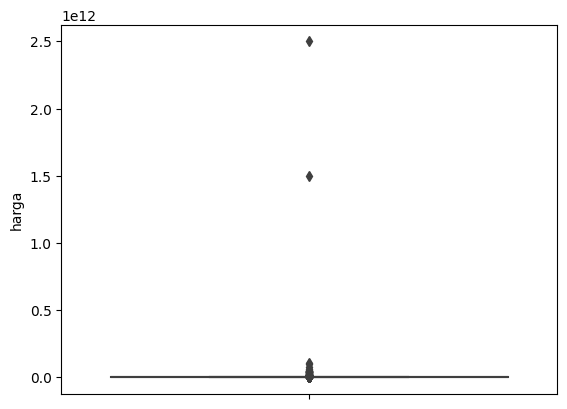

In [116]:
sns.boxplot(data=df, y='harga')

- Dari visualisasi di atas dapat dilihat bahwa terdapat 2 observasi dengan harga yang sangat tinggi dibandingkan harga-harga rumah lainnya, maka akan dilihat observasi mana yang harganya sangat tinggi itu

In [117]:
df[df['harga'] > 1*(10**12)]

created_at     LT     LB   KT   KM garasi carport       lokasi  \
2098 2021-06-12    145  126.0  3.0  3.0    NaN     1.0  Medan Johor   
2883 2023-08-07  250.0  436.0    5    3    0.0     0.0   Semarapura   

     sertifikat listrik hadap         harga  \
2098        SHM  2200.0   NaN  1.500000e+12   
2883        SHM  6600.0   NaN  2.500000e+12   

                                                    URL  \
2098  https://www.rumah.com/listing-properti/dijual-...   
2883  https://www.rumah123.com/properti/semarapura/h...   

                                              deskripsi   asal  
2098                           rumah berkualitas samera  Medan  
2883  rumah dijual semarapura ada 2 sertifikat masin...   Bali

In [118]:
outliers.append(df[df['harga'] > 1*(10**12)])

- Kedua observasi itu dimasukkan ke dalam list outliers

In [119]:
df = df[df['harga'] <= 1*(10**12)]

- df yang baru didefinisikan sebagai df yang tidak ada kedua observasi yang berharga sangat tinggi tersebut

<Axes: ylabel='harga'>

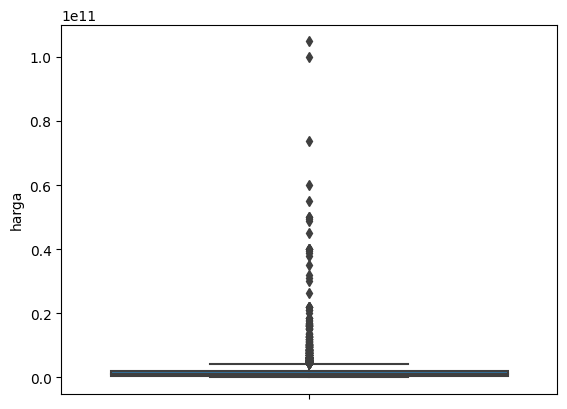

In [120]:
sns.boxplot(data=df, y='harga')

- Dari visualisasi di atas, dapat dilihat bahwa boxplot masih belum terlihat dengan jelas
- Akan dilihat observasi-observasi yang harganya lebih dari 2M karena banyak observasi yang berkumpul di situ

In [121]:
df[df['harga'] > 0.2*(10**11)]

created_at      LT      LB   KT   KM garasi carport  \
658  2023-05-09     525   720.0    8    9    2.0     4.0   
1197 2021-12-06    3087  2500.0  5.0    5   10.0    10.0   
1317 2021-12-06     424  1000.0    4    5    1.0     1.0   
1318 2021-12-06     597   700.0    5    4    2.0     5.0   
1328 2021-12-05     652   405.0    5    4    NaN     4.0   
1329 2021-12-05     840   800.0    5    3    NaN     8.0   
1332 2021-12-07     700  2000.0   10   10    NaN    10.0   
1345 2021-12-06     485   550.0    3    5    1.0     1.0   
1352 2021-12-06     790   700.0    6    6    NaN     6.0   
1353 2021-12-05     950  1400.0    6    4    7.0     NaN   
1355 2021-12-07     738   500.0    5    3    2.0     2.0   
1356 2021-12-06     719   657.0   10    6    2.0     2.0   
1357 2021-12-06     840   800.0    5    4    8.0     NaN   
1378 2021-11-16     120   240.0    3    3    NaN     3.0   
1386 2021-12-06      98   126.0    4    4    2.0     2.0   
1389 2021-12-02     260   300.0    3    2    NaN     1.0   
1406 2021-12-07     640  1200.0    6    5    NaN     2.0   
2052 2023-09-13     375   320.0    6    4    2.0     2.0   
2053 2023-09-13     294   280.0    7    4    1.0     1.0   
2074 2023-08-23    1007   500.0    4    4    0.0     3.0   
2088 2023-08-23    1071  1300.0    5    5    4.0     3.0   
2263 2023-09-13    1827   950.0  4.0  4.0    1.0     3.0   
2355 2021-12-06  1500.0  1140.0    4    3    NaN     NaN   
2403 2021-12-05  1260.0   600.0    5    4    NaN     NaN   
2575 2021-11-29     854   500.0    3    2    NaN     NaN   
2579 2021-11-29    1130   700.0    8    3    NaN     NaN   
2853 2023-09-19   780.0   400.0    5    5    0.0     1.0   
2873 2023-09-14   650.0  1175.0   22   29    1.0     1.0   

                         lokasi sertifikat  listrik       hadap         harga  \
658              Semarang Barat        SHM   5500.0     Selatan  2.200000e+10   
1197  BSD BUKIT GOLF, TANGERANG        NaN  66000.0         NaN  1.000000e+11   
1317              Jakarta Pusat        SHM  33000.0       Timur  4.950000e+10   
1318              Jakarta Pusat        SHM   8000.0         NaN  4.000000e+10   
1328              Jakarta Pusat        SHM   6600.0         NaN  4.500000e+10   
1329              Jakarta Pusat       SHGB   6600.0         NaN  3.999000e+10   
1332              Jakarta Pusat        SHM  66000.0       Utara  1.050000e+11   
1345            Jakarta Selatan  SHM + IMB  18000.0         NaN  2.200000e+10   
1352            Jakarta Selatan        SHM   7700.0         NaN  3.200000e+10   
1353            Jakarta Selatan        SHM  23000.0         NaN  4.900000e+10   
1355            Jakarta Selatan  SHM + IMB  13200.0         NaN  7.400000e+10   
1356            Jakarta Selatan        SHM  26400.0         NaN  4.000000e+10   
1357            Jakarta Selatan        SHM      NaN         NaN  5.000000e+10   
1378              Jakarta Barat        SHM   4400.0     selatan  3.000000e+10   
1386             Jakarta Utara         SHM   2200.0       Timur  3.500000e+10   
1389             Jakarta Utara        SHGB   2200.0         NaN  3.950000e+10   
1406             Jakarta Utara         SHM   9500.0         NaN  3.900000e+10   
2052                      Regol        SHM  13900.0       Utara  5.500000e+10   
2053                     Cibogo        SHM   2500.0         NaN  3.100000e+10   
2074               Bandung Kota        SHM   8000.0  Barat Laut  2.115000e+10   
2088                       Dago        SHM  66000.0       Barat  5.000000e+10   
2263              Medan Polonia        SHM  10000.0         NaN  6.000000e+10   
2355                     Gubeng        SHM     5500       barat  4.000000e+10   
2403                    Genteng       SHGB     6600     selatan  3.800000e+10   
2575               Gondokusuman        SHM      NaN         NaN  2.650000e+10   
2579               Gondokusuman        SHM   1300.0         NaN  2.200000e+10   
2853                       Kuta        SHM  22000.0         NaN  2.200000e+10

In [122]:
outliers.append(df[df['harga'] > 0.2*(10**11)])

In [123]:
df = df[df['harga'] <= 0.2*(10**11)]

<Axes: >

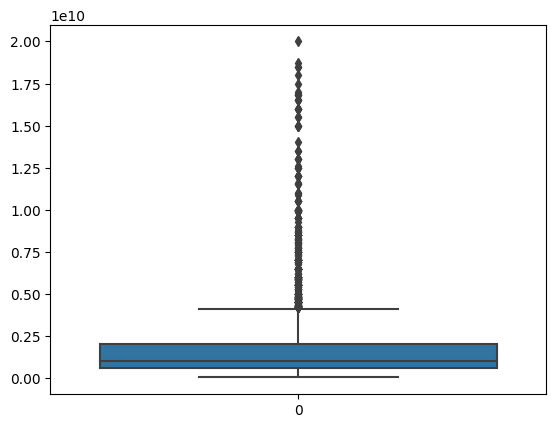

In [124]:
sns.boxplot(df['harga'])

<Axes: xlabel='harga', ylabel='Count'>

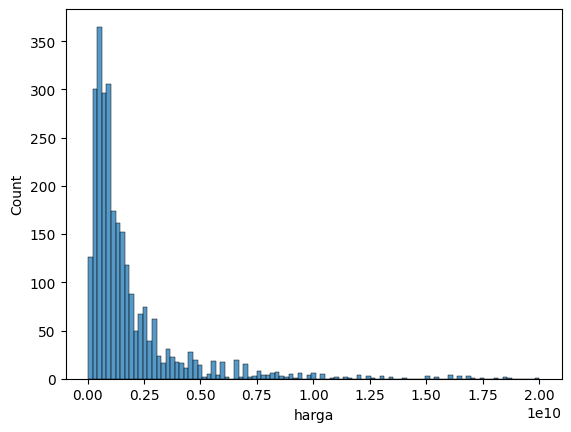

In [125]:
sns.histplot(df['harga'])

- Dari visualisasi di atas dapat dilihat bahwa boxplotnya mulai terlihat lebih jelas dibandingkan boxplot pada 1 plot sebelumnya, tetapi masih banyak outliersnya. Hasil histogram plot nya pun juga menunjukkan hal yang sama
- Dengan melihat dari berita, kami melihat bahwa kurang lebih harga rumah yang wajar di Jakarta itu Rp 1-2 Miliar an. Kami memakai ukuran harga di Jakarta karena Jakarta adalah kota yang sudah maju dibandingkan kota-kota lain di Indonesia, dan idealnya kota-kota lain pada akhirnya akan menjadi kota maju juga, sehingga harga rumahnya yang wajar beberapa tahun kemudian diperkirakan akan mirip dengan Jakarta saat ini.

- Tautan berita: https://www.cnbcindonesia.com/mymoney/20230718192652-72-455499/ini-bocoran-kisaran-harga-rumah-di-jakarta-dan-sekitarnya

In [126]:
df[df['harga'] > 1.5*(10**10)]

created_at      LT      LB   KT KM garasi carport                 lokasi  \
108  2021-02-12     867   650.0    5  6      2       4         Babakan Madang   
510  2021-11-30    1068   500.0    5  3    NaN     2.0          Kota Semarang   
562  2021-07-12     685   500.0   15  8    NaN     1.0          Kota Semarang   
589  2021-08-12     920   600.0    5  4    2.0     6.0     Kabupaten Semarang   
1129 2021-12-06     534  1000.0  5.0  6    6.0     2.0         BSD, TANGERANG   
1146 2021-12-06     534  1000.0  8.0  8    6.0     6.0         BSD, TANGERANG   
1351 2021-12-06     612   485.0    5  4    1.0     2.0        Jakarta Selatan   
2049 2023-09-13      98   125.0    3  3    0.0     1.0               Antapani   
2050 2023-09-13     180   192.0    3  2    1.0     1.0          Bandung Kulon   
2073 2023-08-23     980   360.0    4  4    2.0     4.0  Kota Baru Parahyangan   
2078 2023-09-13     815   600.0    5  3    3.0     4.0             Setra Duta   
2080 2023-09-13     530   500.0    4  2    4.0     2.0           Pasir Kaliki   
2083 2023-09-20     700   700.0    4  6    4.0     6.0              Setraduta   
2333 2021-12-06   360.0   450.0    3  4    2.0     2.0                 Wiyung   
2337 2021-12-06   450.0   600.0    4  3    1.0     2.0             Sambikerep   
2471 2023-09-18   601.0   195.0    3  3    1.0     1.0                 Gubeng   
2486 2023-09-20   345.0   600.0    7  6    0.0     1.0                  Graha   
2541 2021-01-12     915   622.0   10  8    3.0     8.0             Umbulharjo   
2789 2021-06-12  1095.0   800.0    6  5    1.0     NaN               Denpasar   

     sertifikat  listrik       hadap         harga  \
108         SHM     5500         NaN  1.650000e+10   
510         SHM   3500.0         NaN  1.690000e+10   
562         SHM   2200.0       Timur  1.800000e+10   
589         SHM   4400.0  Timur Laut  1.650000e+10   
1129        SHM  16500.0         NaN  1.550000e+10   
1146        SHM  16500.0         NaN  1.550000e+10   
1351        SHM  13000.0         NaN  1.850000e+10   
2049        SHM   2200.0     Selatan  1.870000e+10   
2050        SHM   2200.0         NaN  2.000000e+10   
2073        SHM  11000.0     Selatan  1.680000e+10   
2078        SHM  16500.0       Timur  1.750000e+10   
2080        SHM   5500.0         NaN  1.700000e+10   
2083        SHM   4400.0       Timur  1.850000e+10   
2333       SHGB     5500       utara  1.600000e+10   
2337        SHM    15000         NaN  1.600000e+10   
2471        HGB     2200       Timur  1.650000e+10   
2486        HGB     3500         NaN  1.680000e+10   
2541        SHM  11500.0         NaN  1.600000e+10   
2789        SHM  11000.0         NaN  1.600000e+10   

                                                    URL  \
108   https://www.rumah123.com/properti/bogor/hos927...   
510   https://www.rumah.com/listing-properti/dijual-...   
562   https://www.olx.co.id/item/rumah-luas-belakang...   
589   https://www.rumah123.com/properti/semarang/hos...   
1129  https://www.rumah123.com/properti/tangerang/ho...   
1146  https://www.rumah123.com/properti/tangerang/ho...   
1351  https://rumahdijual.com/jakarta-selatan/112558...   
2049  https://www.rumah123.com/properti/bandung/hos1...   
2050  https://www.rumah123.com/properti/bandung/hos1...   
2073  https://www.rumah123.com/properti/bandung/hos1...   
2078  https://www.rumah123.com/properti/bandung/hos1...   
2080  https://www.rumah123.com/properti/bandung/hos1...   
2083  https://www.rumah.com/listing-properti/dijual-...   
2333  https://www.rumah123.com/properti/surabaya/hos...   
2337  https://www.rumah123.com/properti/surabaya/hos...   
2471  https://www.rumah123.com/properti/surabaya/hos...   
2486  https://www.rumah123.com/properti/surabaya/hos...   
2541  https://www.rumah123.com/properti/yogyakarta/h...   
2789  https://www.olx.co.id/item/rumah-mewah-furnish...   

                                              deskripsi        asal  
108   perumahan eksklusif lokasi strategis gfasilita

In [127]:
outliers.append(df[df['harga'] > 1.5*(10**10)])

In [128]:
df = df[df['harga'] <= 1.5*(10**10)]

<Axes: >

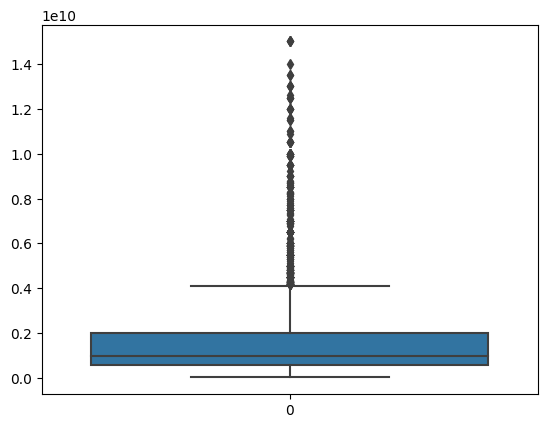

In [129]:
sns.boxplot(df['harga'])

<Axes: xlabel='harga', ylabel='Count'>

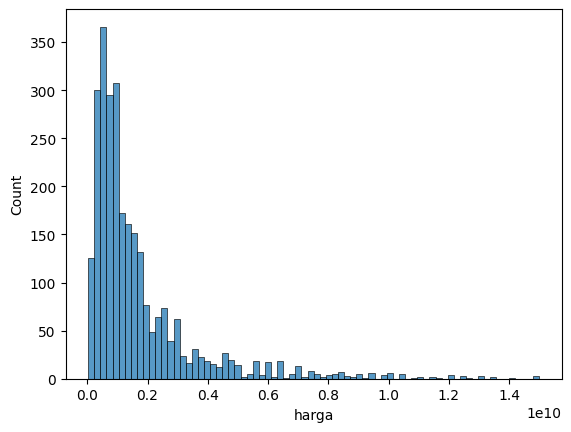

In [130]:
sns.histplot(df['harga'])

- Pada akhirnya kami memfinalisasi df sebagai data rumah yang harganya di bawah Rp 1.5 Miliar. Kami merasa bahwa boxplot dan histogram plotnya sudah cukup baik sehingga tidak perlu melakukan pengeluaran harga yang lebih rendah lagi (lebih rendah dari Rp 1.5 Miliar)

In [131]:
df.describe()

LB         harga
count  2748.000000  2.749000e+03
mean    142.572052  1.728181e+09
std     136.385614  2.002779e+09
min       7.000000  3.000000e+07
25%      60.000000  5.750000e+08
50%     100.000000  1.000000e+09
75%     180.000000  2.000000e+09
max    1871.000000  1.500000e+10

## <h2> Mapping Price Categories </h2> ##

In [132]:
mapping_price(df)

In [133]:
df.head(10)

created_at   LT     LB KT KM garasi carport          lokasi sertifikat  \
0  2021-03-12   75   38.0  2  1      1       1      Bojonggede        SHM   
1  2021-06-12   60   40.0  1  1      0       1  Babakan Madang        SHM   
2  2021-06-12   60   50.0  2  2      0       1  Babakan Madang        SHM   
3  2021-06-12   60   70.0  3  2      0       1  Babakan Madang        SHM   
4  2021-06-12   90   60.0  3  2      0       2  Babakan Madang        SHM   
5  2021-06-12  120   70.0  3  2      0       2  Babakan Madang        SHM   
6  2021-06-12  125  125.0  3  2      0       2  Babakan Madang        SHM   
7  2021-06-12   97   72.0  3  2      0       1        Cibinong        SHM   
8  2021-06-12   72   33.0  2  1      0       1    Gunung Putri        SHM   
10 2021-06-12  312   70.0  4  2      1       1    Tanah Sareal        SHM   

   listrik    hadap         harga  \
0     1300    Barat  6.925500e+08   
1     2200      NaN  8.114000e+08   
2     2200      NaN  9.005000e+08   
3     2200      NaN  1.001900e+09   
4     2200      NaN  1.200800e+09   
5     2200      NaN  1.538200e+09   
6     2200      NaN  1.946600e+09   
7     2200  Selatan  1.230000e+09   
8     1300      NaN  6.170000e+08   
10    2200    Timur  2.500000e+08   

                                                  URL  \
0   https://rumahdijual.com/bekasi/10799791-rumah-...   
1   https://www.rumah123.com/perumahan-baru/proper...   
2   https://www.rumah123.com/perumahan-baru/proper...   
3   https://www.rumah123.com/perumahan-baru/proper...   
4   https://www.rumah123.com/perumahan-baru/proper...   
5   https://www.rumah123.com/perumahan-baru/proper...   
6   https://www.rumah123.com/perumahan-baru/proper...   
7   https://www.rumah123.com/properti/bogor/hos920...   
8   https://www.rumah123.com/properti/bogor/hos915...   
10  https://www.rumah123.com/properti/bogor/hos892...   

                                            deskripsi   asal kategori_harga  
0   dekat tol jati warna dekat sutle busway dekat ...  Bogor         Sedang  
1   destinasi menarik di kawasan babakan madang gu...  Bogor         Sedang  
2   destinasi menarik di kawasan babakan madang gu...  Bogor         Sedang  
3   destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal  
4   destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal  
5   destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal  
6   destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal  
7   berada dalam kawasan pemda  hanya 5menit ke cc...  Bogor          Mahal  
8   terletak dilokasi yang strategis sehingga deka...  Bogor         Sedang  
10  dekat lapangan tenis dan mesjid 10 menit pintu...  Bogor          Murah

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2748 non-null   datetime64[ns]
 1   LT              2749 non-null   object        
 2   LB              2748 non-null   float64       
 3   KT              2747 non-null   object        
 4   KM              2745 non-null   object        
 5   garasi          1780 non-null   object        
 6   carport         2249 non-null   object        
 7   lokasi          2749 non-null   object        
 8   sertifikat      2742 non-null   object        
 9   listrik         2549 non-null   object        
 10  hadap           1260 non-null   object        
 11  harga           2749 non-null   float64       
 12  URL             2748 non-null   object        
 13  deskripsi       2749 non-null   object        
 14  asal            2749 non-null   object        
 15  kate

## <h2> Missing Values </h2>

In [135]:
df.isna().sum()

created_at           1
LT                   0
LB                   1
KT                   2
KM                   4
garasi             969
carport            500
lokasi               0
sertifikat           7
listrik            200
hadap             1489
harga                0
URL                  1
deskripsi            0
asal                 0
kategori_harga       0
dtype: int64

In [136]:
df.isna().sum()/len(df)

created_at        0.000364
LT                0.000000
LB                0.000364
KT                0.000728
KM                0.001455
garasi            0.352492
carport           0.181884
lokasi            0.000000
sertifikat        0.002546
listrik           0.072754
hadap             0.541652
harga             0.000000
URL               0.000364
deskripsi         0.000000
asal              0.000000
kategori_harga    0.000000
dtype: float64

In [137]:
df.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi', 'asal',
       'kategori_harga'],
      dtype='object')

In [138]:
df['garasi'] = df['garasi'].fillna(0)
df['carport'] = df['carport'].fillna(0)
df['URL'] = df['URL'].fillna("Tidak ada URL")
df['deskripsi'] = df['deskripsi'].fillna("Tidak ada deskripsi")
df['sertifikat'] = df['sertifikat'].fillna("Tidak ada sertifikat")

Berikut alasan-alasan pengimputasian *missing values* untuk variabel-variabel di atas:
- Untuk `garasi` dan `carport` itu *missing values* diisi dengan 0 karena diasumsikan rumah itu memang tidak mempunyai garasi dan *carport*, karena tidak punya maka ia malas mengisinya, sehingga dibiarkan kosong kolom `garasi` dan `carport` nya, jadi 0 adalah angka yang tepat untuk merepresentasikan ketiadaan garasi dan *carport* nya
- Untuk `URL` itu *missing values* diisi dengan *string* kosong karena memang mungkin tidak ada URL nya, tetapi rumah itu beneran dijual
- Untuk `deskripsi` itu *missing values* diisi dengan *string* kosong karena memang mungkin tidak ada deskripsi khusus untuk rumah yang dijual
- Untuk `sertifikat` itu *missing values* diisi dengan *string* "Tidak ada sertifikat" karena memang memungkinkan untuk suatu rumah tidak memiliki sertifikat, sehingga penjual rumah mungkin saja malas mengisi kolom informasi sertifikat.

In [139]:
df.isna().sum()

created_at           1
LT                   0
LB                   1
KT                   2
KM                   4
garasi               0
carport              0
lokasi               0
sertifikat           0
listrik            200
hadap             1489
harga                0
URL                  0
deskripsi            0
asal                 0
kategori_harga       0
dtype: int64

In [140]:
df[df.isna().any(axis=1)]

created_at    LT     LB KT KM garasi carport                   lokasi  \
1    2021-06-12    60   40.0  1  1      0       1           Babakan Madang   
2    2021-06-12    60   50.0  2  2      0       1           Babakan Madang   
3    2021-06-12    60   70.0  3  2      0       1           Babakan Madang   
4    2021-06-12    90   60.0  3  2      0       2           Babakan Madang   
5    2021-06-12   120   70.0  3  2      0       2           Babakan Madang   
...         ...   ...    ... .. ..    ...     ...                      ...   
3034 2023-07-21   300  267.0  6  5      1       1     Tamalanrea, Makassar   
3035 2023-09-13   112   87.0  3  2      0       1  Biring Kanaya, Makassar   
3036 2023-08-31  1054  440.0  5  4      1       3  Manti Kulore, Palu Kota   
3037 2023-04-09   200  360.0  4  4      2       2    Panakkukang, Makassar   
3038 2023-05-08   105   75.0  3  2      0       2      Hertasning Makassar   

     sertifikat listrik hadap         harga  \
1           SHM    2200   NaN  8.114000e+08   
2           SHM    2200   NaN  9.005000e+08   
3           SHM    2200   NaN  1.001900e+09   
4           SHM    2200   NaN  1.200800e+09   
5           SHM    2200   NaN  1.538200e+09   
...         ...     ...   ...           ...   
3034        SHM    3500   NaN  7.100000e+09   
3035          -    2200   NaN  1.300000e+09   
3036        SHM       -   NaN  3.000000e+09   
3037        SHM    4400   NaN  7.500000e+09   
3038        SHM    1300   NaN  7.750000e+08   

                                                    URL  \
1     https://www.rumah123.com/perumahan-baru/proper...   
2     https://www.rumah123.com/perumahan-baru/proper...   
3     https://www.rumah123.com/perumahan-baru/proper...   
4     https://www.rumah123.com/perumahan-baru/proper...   
5     https://www.rumah123.com/perumahan-baru/proper...   
...                                                 ...   
3034  https://www.rumah.com/listing-properti/dijual-...   
3035  https://www.rumah.com/listing-properti/dijual-...   
3036  https://www.olx.co.id/item/jual-rumah-harga-te...   
3037  https://www.rumah.com/listing-properti/dijual-...   
3038  https://www.rumah.com/listing-properti/dijual-...   

                                              deskripsi           asal  \
1     destinasi menarik di kawasan babakan madang gu...          Bogor   
2     destinasi menarik di kawasan babakan madang gu...          Bogor   
3     destinasi menarik di kawasan babakan madang gu...          Bogor   
4     destinasi menarik di kawasan babakan madang gu...          Bogor   
5     destinasi menarik di kawasan babakan madang gu...          Bogor   
...                                                 ...            ...   
3034  dijual cepat rumah mewah dikota makassar lengk...  Sulawesi(All)   
3035  dijual rumah 2lantai di summarecon makassar  a...  Sulawesi(All)   
3036  di jual rumah tinggal 2 lantai siap huni di da...  Sulawesi(All)   
3037  rumah mewah di pettarani makassar dekat nipah ...  Sulawesi(All)   
3038  rumah ready minasa upa  hertasning makassardij...  Sulawesi(All)   

     kategori_harga  
1            Sedang  
2            Sedang  
3             Mahal  
4             Mahal  
5             Mahal  
...             ...  
3034          Mahal  
3035          Mahal  
3036          Mahal  
3037          Mahal  
3038         Sedang  

[1539 rows x 16 columns]

### <h2> Variabel `created_at` </h2> ###

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2748 non-null   datetime64[ns]
 1   LT              2749 non-null   object        
 2   LB              2748 non-null   float64       
 3   KT              2747 non-null   object        
 4   KM              2745 non-null   object        
 5   garasi          2749 non-null   object        
 6   carport         2749 non-null   object        
 7   lokasi          2749 non-null   object        
 8   sertifikat      2749 non-null   object        
 9   listrik         2549 non-null   object        
 10  hadap           1260 non-null   object        
 11  harga           2749 non-null   float64       
 12  URL             2749 non-null   object        
 13  deskripsi       2749 non-null   object        
 14  asal            2749 non-null   object        
 15  kate

In [142]:
df[df.loc[:, 'created_at'].isna()]

created_at   LT     LB   KT   KM garasi carport       lokasi sertifikat  \
2280        NaT  112  160.0  4.0  3.0    0.0     1.0  Medan Johor        SHM   

     listrik    hadap         harga  \
2280     NaN  Selatan  1.500000e+09   

                                                    URL  \
2280  https://www.rumah123.com/properti/medan/hos148...   

                                              deskripsi   asal kategori_harga  
2280  jual cepat rumah mewah komplek medan resort ci...  Medan          Mahal

In [143]:
print(f"Link baris 2281: {df.loc[2280, 'URL']}") #20 september 2023

Link baris 2281: https://www.rumah123.com/properti/medan/hos14838847/


In [144]:
df.loc[2280, 'created_at'] = pd.to_datetime("2023-09-20")
df.loc[2280, :]

created_at                                      2023-09-20 00:00:00
LT                                                              112
LB                                                            160.0
KT                                                              4.0
KM                                                              3.0
garasi                                                          0.0
carport                                                         1.0
lokasi                                                  Medan Johor
sertifikat                                                      SHM
listrik                                                         NaN
hadap                                                       Selatan
harga                                                  1500000000.0
URL               https://www.rumah123.com/properti/medan/hos148...
deskripsi         jual cepat rumah mewah komplek medan resort ci...
asal                                            

In [145]:
df[df.loc[:, 'created_at'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal, kategori_harga]
Index: []

### <h2> Variabel `LT` </h2> ###

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2749 non-null   datetime64[ns]
 1   LT              2749 non-null   object        
 2   LB              2748 non-null   float64       
 3   KT              2747 non-null   object        
 4   KM              2745 non-null   object        
 5   garasi          2749 non-null   object        
 6   carport         2749 non-null   object        
 7   lokasi          2749 non-null   object        
 8   sertifikat      2749 non-null   object        
 9   listrik         2549 non-null   object        
 10  hadap           1260 non-null   object        
 11  harga           2749 non-null   float64       
 12  URL             2749 non-null   object        
 13  deskripsi       2749 non-null   object        
 14  asal            2749 non-null   object        
 15  kate

In [147]:
df.isna().sum()

created_at           0
LT                   0
LB                   1
KT                   2
KM                   4
garasi               0
carport              0
lokasi               0
sertifikat           0
listrik            200
hadap             1489
harga                0
URL                  0
deskripsi            0
asal                 0
kategori_harga       0
dtype: int64

In [148]:
df['LT'].unique()

array([75, 60, 90, 120, 125, 97, 72, 312, 105, 112, 162, 200, 50, 78,
       1500, 699, 66, 314, 1272, 338, 62, 196, 167, 84, 30, 128, 140, 98,
       70, 144, 91, 108, 210, 156, 255, 270, 240, 800, 280, 276, 437, 106,
       180, 696, 698, 81, 65, 220, 93, 38, 102, 175, 100, 119, 470, 195,
       142, 89, 313, 131, 80, 79, 345, 206, 320, 1058, 168, 67, 74, 107,
       138, 153, 135, 115, 160, 83, 126, 87, 186, 76, 136, 171, 300, 88,
       129, 69, 350, 64, 165, 109, 96, 137, 192, 150, 264, 114, 330, 110,
       250, 85, 384, 407, 1716, 391, 48, 145, 94, 71, 104, 117, 54, 2200,
       161, 1560, 143, 178, 400, 379, 182, 1064, 336, 571, 77, 549, 659,
       360, 840, 500, 152, 174, 483, 425, 2662, 2500, 372, 130, 495, 580,
       222, 95, 499, 148, 236, 82, 208, 835, 302, 122, 99, 55, 158, 589,
       265, 230, 1200, 228, 1140, 850, 225, 525, 375, 453, 423, 468, 498,
       271, 367, 275, 405, 205, 63, 702, 103, 253, 720, 227, 546, 170,
       123, 284, 328, 1000, 335, 287, 127, 209, 5

In [149]:
df.loc[369, 'LT']

2500

In [150]:
df.loc[369, 'LT'] = 250

### <h2> Variabel `LB` </h2> ###

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2749 non-null   datetime64[ns]
 1   LT              2749 non-null   object        
 2   LB              2748 non-null   float64       
 3   KT              2747 non-null   object        
 4   KM              2745 non-null   object        
 5   garasi          2749 non-null   object        
 6   carport         2749 non-null   object        
 7   lokasi          2749 non-null   object        
 8   sertifikat      2749 non-null   object        
 9   listrik         2549 non-null   object        
 10  hadap           1260 non-null   object        
 11  harga           2749 non-null   float64       
 12  URL             2749 non-null   object        
 13  deskripsi       2749 non-null   object        
 14  asal            2749 non-null   object        
 15  kate

In [152]:
print(df.loc[:, 'LB'].unique())

[  38.   40.   50.   70.   60.  125.   72.   33.  129.   51.   90.  170.
   79.   63.   39.   45.   36. 1200.  350.   62.   30.  300.  500.   48.
  250.   43.   47.  202.   75.  164.   65.  260.  169.   25.  100.  200.
   49.  160.   37.   55.   42.   69.  150.  219.  358.   80.  400.  120.
  340.   54.  130.   32.  213.   24.   21.  108.   68.   66.   89.   58.
  287.  283.  198.  126.   31.   84.  154.  110.   52.  158.  135.  180.
  144.   83.   64.   88.  220.  270.  275.  102.  175.   99.   59.  105.
  148.  325.  450.   82.  165.   41.  109.   92.   56.  185.  240.  550.
   95.  192.  323. 1871.   nan  119.  117.   85.  650.  375.  143.  168.
  336.  246.  316.   81.  378.  190.  630.  115.  216.  900.  233.   57.
  128.  828.  225.  540.  280. 1400.  455.  345.  285.  700.  392.  330.
  265.  315.  242.  289.  372.  155.  750.  308.  123.   67.  140.  210.
   44.  138.  440.  290.  341.  288.  171.  104.  106.  312.  112.  360.
  567.  252.   96.  142.  403.  149.  247.  156.  2

In [153]:
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')

In [154]:
df[df.loc[:, 'LB'].isna()]

created_at   LT  LB   KT   KM garasi carport  \
299 2021-05-12  391 NaN  7.0  7.0      0       0   

                                 lokasi sertifikat listrik hadap  \
299  Teluk Betung Utara, Bandar Lampung        SHM   Token   NaN   

            harga                                                URL  \
299  1.000000e+09  https://rumahdijual.com/lampung/10121111-rumah...   

                                        deskripsi                        asal  \
299  sumber air tanah bebas banjir butuh renovasi  Lampung - Sumatera selatan   

    kategori_harga  
299         Sedang

In [155]:
print(f"Link baris 299: {df.loc[299, 'URL']}") #linknya langsung ke home webnya ga spesifik ke rumah yang dituju
print(f"Deskripsi baris 299: {df.loc[299, 'deskripsi']}") #linknya langsung ke home webnya ga spesifik ke rumah yang dituju

Link baris 299: https://rumahdijual.com/lampung/10121111-rumah-ex-kost-ex-walet-kupang-teba-murah.html
Deskripsi baris 299: sumber air tanah bebas banjir butuh renovasi


<Axes: xlabel='LB', ylabel='Count'>

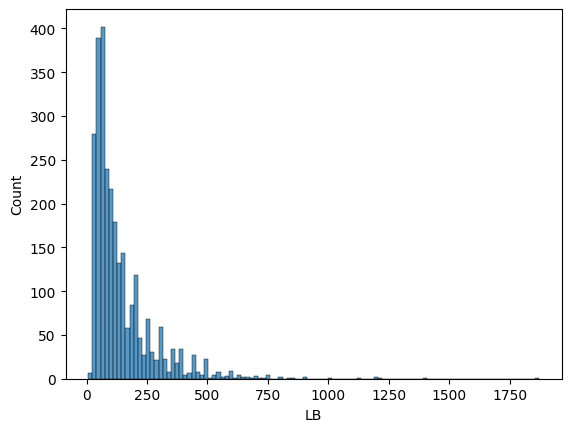

In [156]:
sns.histplot(data=df, x='LB')

In [157]:
df.groupby(['asal', 'kategori_harga'])['LB'].agg(['mean', 'median'])

mean  median
asal                       kategori_harga                    
Bali                       Murah            56.600000    50.0
                           Sedang           80.731707    70.0
                           Mahal           183.316832   140.0
Bandung                    Murah            52.115942    50.0
                           Sedang           84.826087    70.0
                           Mahal           210.297619   177.5
Bekasi                     Murah            53.742857    45.0
                           Sedang           84.756757    72.0
                           Mahal           151.157895   127.0
Bogor                      Murah            45.291139    36.0
                           Sedang           60.846154    55.0
                           Mahal           189.504587   158.0
Depok                      Murah            44.645833    45.0
                           Sedang           66.012500    62.0
                           Mahal           164.323944   109.0
Jakarta                    Murah            37.785714    37.0
                           Sedang           57.916667    58.0
                           Mahal           197.182609   160.0
Kalimantan (All)           Murah            71.450000    45.0
                           Sedang          128.680851   104.0
                           Mahal           224.673469   200.0
Lampung - Sumatera selatan Murah            62.640000    45.0
                           Sedang          105.245283    84.0
                           Mahal           370.627907   270.0
Medan                      Murah            57.244444    50.0
                           Sedang          107.542373   100.0
                           Mahal           215.767857   171.0
Padang - Palembang         Murah            60.843750    45.0
                           Sedang           98.934426    90.0
                           Mahal           229.462366   200.0
Semarang                   Murah            68.523810    45.0
                           Sedang           83.645833    70.0
                           Mahal           262.280488   225.0
Sulawesi(All)              Murah            59.333333    45.0
                           Sedang          105.340000    85.5
                           Mahal           251.225806   198.5
Surabaya                   Murah            38.400000    40.0
                           Sedang           86.470588    78.5
                           Mahal           263.446970   200.0
Tangerang                  Murah            59.352941    45.0
                           Sedang           72.210526    65.0
                           Mahal           177.944444   135.5
Yogyakarta                 Murah            50.750000    45.0
                           Sedang           80.157895    70.0
                           Mahal           185.663462   142.0

In [158]:
df['LB'].isna().sum()/len(df)

0.0003637686431429611

- Karena *mean* dan *median* untuk harga di wilayah Lampung - Sumatera Selatan di kategori harga "sedang" itu dirasa tidak bisa digunakan untuk mengimputasi *missing value* di variabel `LB` di index 299 (`LT` 391 itu rasanya `LB` 103 atau 81 terlalu kecil), maka index 299 akan di-*drop* saja
- Justifikasi lainnya untuk meng-*drop* adalah karena persentase *missing value* di variabel `LB` sangat kecil (di bawah 1%)

In [159]:
df.drop([299], axis=0, inplace=True)

In [160]:
df[df.loc[:, 'LB'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal, kategori_harga]
Index: []

### <h2> Variabel `KT` </h2> ###

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2748 non-null   datetime64[ns]
 1   LT              2748 non-null   object        
 2   LB              2748 non-null   float64       
 3   KT              2746 non-null   object        
 4   KM              2744 non-null   object        
 5   garasi          2748 non-null   object        
 6   carport         2748 non-null   object        
 7   lokasi          2748 non-null   object        
 8   sertifikat      2748 non-null   object        
 9   listrik         2548 non-null   object        
 10  hadap           1260 non-null   object        
 11  harga           2748 non-null   float64       
 12  URL             2748 non-null   object        
 13  deskripsi       2748 non-null   object        
 14  asal            2748 non-null   object        
 15  kate

In [162]:
print(df.loc[:, 'KT'].unique())

[2 1 3 4 5 8 6 109.0 nan 11.0 7.0 9 10 14 '-' 20]


In [163]:
print(df.loc[:, 'KT'].value_counts())

2        955
3        924
4        449
5        227
6         80
7.0       40
1         34
8         18
9          5
10         4
-          4
11.0       3
109.0      1
14         1
20         1
Name: KT, dtype: int64


In [164]:
df['KT'] = df['KT'].replace(["-"], np.nan)

In [165]:
df['KT'] = pd.to_numeric(df['KT'], errors='coerce')

In [166]:
df[df.loc[:, 'KT'].isna()]

created_at   LT     LB  KT   KM garasi carport  \
316  2021-03-12  117  117.0 NaN  NaN      0       0   
1283 2023-09-19   98  118.0 NaN    3    2.0       0   
2941 2021-03-12  120   52.0 NaN    1      1       1   
2969 2021-11-11   90   45.0 NaN    1      -       1   
2974 2021-04-11   90   48.0 NaN    1      -       1   
2980 2021-10-29   90   45.0 NaN    1      -       1   

                                    lokasi sertifikat listrik  hadap  \
316   Pringsewu, Jalan Ahmad Yani, Lampung        SHM     NaN  Utara   
1283                        BSD, TANGERANG        SHM  2200.0    NaN   
2941                         Wanea, Manado        HGB    1300  Timur   
2969                      Mapanget, Manado        SHM    1300      -   
2974                      Mapanget, Manado        SHM    1300      -   
2980                      Mapanget, Manado        SHM    1300      -   

             harga                                                URL  \
316   6.850000e+07  https://rumahdijual.com/lampung/11764150-tanah...   
1283  2.400000e+09  https://www.rumah.com/listing-properti/dijual-...   
2941  1.060000e+09  https://www.rumah123.com/properti/manado/hos92...   
2969  4.050000e+08  https://www.rumah123.com/properti/manado/hos91...   
2974  4.600000e+08  https://www.rumah123.com/properti/manado/hos91...   
2980  4.600000e+08  https://www.rumah123.com/properti/manado/hos90...   

                                              deskripsi  \
316   tanah kavling tanpa riba sumber air sumur bor ...   
1283  rumah 2 lantai type 7 shm di cluster welton hi...   
2941  lokasi rumah baru siap tinggal lengkap dengan ...   
2969  perumahan mewah terlaris 2 menit dari rsaurilo...   
2974  perumahan terlaris di manado dp 10lokasi  mapa...   
2980  rumah cantik termurah all in 6 menit dari band...   

                            asal kategori_harga  
316   Lampung - Sumatera selatan          Murah  
1283                   Tangerang          Mahal  
2941               Sulawesi(All)          Mahal  
2969               Sulawesi(All)          Murah  
2974               Sulawesi(All)          Murah  
2980               Sulawesi(All)          Murah

In [167]:
print(f"Link baris 316: {df.loc[316, 'URL']}") #linknya langsung ke home webnya ga spesifik ke rumah yang dituju
print(f"Link baris 1283: {df.loc[1283, 'URL']}") #ada 3

print("")

print(f"Deskripsi baris 316: {df.loc[316, 'deskripsi']}")
print(f"Deskripsi baris 1283: {df.loc[1283, 'deskripsi']}")

Link baris 316: https://rumahdijual.com/lampung/11764150-tanah-kavling-murah-tanpa-dp-promo-akhir-tahun-gading.html
Link baris 1283: https://www.rumah.com/listing-properti/dijual-bsd-tangerang-oleh-edo-hendra-21618990

Deskripsi baris 316: tanah kavling tanpa riba sumber air sumur bor bisa diakses berbagai kendaraan bebas banjir
Deskripsi baris 1283: rumah 2 lantai type 7 shm di cluster welton hierabsdtanggerang


In [168]:
df.groupby(['asal', 'kategori_harga'])['KT'].agg(['mean', 'median', pd.Series.mode])

mean  median  mode
asal                       kategori_harga                        
Bali                       Murah           2.333333     2.0   2.0
                           Sedang          2.829268     3.0   3.0
                           Mahal           3.485149     3.0   3.0
Bandung                    Murah           2.289855     2.0   2.0
                           Sedang          2.695652     3.0   3.0
                           Mahal           3.761905     3.5   3.0
Bekasi                     Murah           2.057143     2.0   2.0
                           Sedang          2.648649     2.0   2.0
                           Mahal           3.460526     3.0   3.0
Bogor                      Murah           2.037975     2.0   2.0
                           Sedang          2.384615     2.0   2.0
                           Mahal           3.651376     3.0   3.0
Depok                      Murah           2.000000     2.0   2.0
                           Sedang          2.525000     3.0   3.0
                           Mahal           3.436620     3.0   3.0
Jakarta                    Murah           1.857143     2.0   2.0
                           Sedang          2.291667     2.0   2.0
                           Mahal           4.069565     4.0   3.0
Kalimantan (All)           Murah           2.216667     2.0   2.0
                           Sedang          2.723404     3.0   3.0
                           Mahal           3.959184     4.0   3.0
Lampung - Sumatera selatan Murah           2.202703     2.0   2.0
                           Sedang          3.037736     3.0   3.0
                           Mahal           7.232558     5.0   5.0
Medan                      Murah           2.177778     2.0   2.0
                           Sedang          2.762712     3.0   3.0
                           Mahal           4.017857     4.0   3.0
Padang - Palembang         Murah           2.218750     2.0   2.0
                           Sedang          2.852459     3.0   3.0
                           Mahal           4.215054     4.0   4.0
Semarang                   Murah           2.142857     2.0   2.0
                           Sedang          2.812500     3.0   3.0
                           Mahal           4.304878     4.0   4.0
Sulawesi(All)              Murah           2.153846     2.0   2.0
                           Sedang          3.040000     3.0   2.0
                           Mahal           4.245902     4.0   4.0
Surabaya                   Murah           2.000000     2.0   2.0
                           Sedang          2.588235     2.5   2.0
                           Mahal           4.000000     4.0   4.0
Tangerang                  Murah           2.294118     2.0   2.0
                           Sedang          2.526316     2.0   2.0
                           Mahal           3.475524     3.0   3.0
Yogyakarta                 Murah           2.150000     2.0   2.0
                           Sedang          2.842105     3.0   3.0
                           Mahal           4.153846     4.0   4.0

In [169]:
df.loc[1283, 'KT'] = 3
df.loc[1283, :]

created_at                                      2023-09-19 00:00:00
LT                                                               98
LB                                                            118.0
KT                                                              3.0
KM                                                                3
garasi                                                          2.0
carport                                                           0
lokasi                                               BSD, TANGERANG
sertifikat                                                      SHM
listrik                                                      2200.0
hadap                                                           NaN
harga                                                  2400000000.0
URL               https://www.rumah.com/listing-properti/dijual-...
deskripsi         rumah 2 lantai type 7 shm di cluster welton hi...
asal                                            

- Karena untuk baris 316 ternyata properti yang dijual adalah tanah dengan melihat *value* dari kolom `deskripsi`, maka baris ini akan di*drop* saja

In [170]:
df.drop([316], axis=0, inplace=True)

In [171]:
print(df.loc[:, 'KT'].unique())

[  2.   1.   3.   4.   5.   8.   6. 109.  11.   7.   9.  10.  14.  nan
  20.]


In [172]:
df[df.loc[:, 'KT']>21]

created_at    LT      LB     KT     KM garasi carport  \
298 2021-05-12  1716  1871.0  109.0  106.0      0       0   

                       lokasi sertifikat listrik    hadap         harga  \
298  Rajabasa, Bandar Lampung        SHM   Token  Selatan  1.100000e+10   

                                                   URL  \
298  https://rumahdijual.com/lampung/9635319-kost-m...   

                                             deskripsi  \
298  fasilitas kamar1 kmr lebih besar 4x4 dg spring...   

                           asal kategori_harga  
298  Lampung - Sumatera selatan          Mahal

In [173]:
print(f"Link baris 298: {df.loc[298, 'URL']}")
print(f"Deskripsi baris 298: {df.loc[298, 'deskripsi']}")

Link baris 298: https://rumahdijual.com/lampung/9635319-kost-mewah-baru-terisi-full-dengan-keuntungan-besar-bandar.html
Deskripsi baris 298: fasilitas kamar1 kmr lebih besar 4x4 dg springbed 160cm kelas hotel 3 lengkap dg jendela2 komplit dg ac android smart tv k mandi dalam air panas toilet duduk lemari  cermin besa


In [174]:
df.drop([298], axis=0, inplace=True)

In [175]:
df[df.loc[:, 'KT'].isna()]

created_at   LT    LB  KT KM garasi carport            lokasi sertifikat  \
2941 2021-03-12  120  52.0 NaN  1      1       1     Wanea, Manado        HGB   
2969 2021-11-11   90  45.0 NaN  1      -       1  Mapanget, Manado        SHM   
2974 2021-04-11   90  48.0 NaN  1      -       1  Mapanget, Manado        SHM   
2980 2021-10-29   90  45.0 NaN  1      -       1  Mapanget, Manado        SHM   

     listrik  hadap         harga  \
2941    1300  Timur  1.060000e+09   
2969    1300      -  4.050000e+08   
2974    1300      -  4.600000e+08   
2980    1300      -  4.600000e+08   

                                                    URL  \
2941  https://www.rumah123.com/properti/manado/hos92...   
2969  https://www.rumah123.com/properti/manado/hos91...   
2974  https://www.rumah123.com/properti/manado/hos91...   
2980  https://www.rumah123.com/properti/manado/hos90...   

                                              deskripsi           asal  \
2941  lokasi rumah baru siap tinggal lengkap dengan ...  Sulawesi(All)   
2969  perumahan mewah terlaris 2 menit dari rsaurilo...  Sulawesi(All)   
2974  perumahan terlaris di manado dp 10lokasi  mapa...  Sulawesi(All)   
2980  rumah cantik termurah all in 6 menit dari band...  Sulawesi(All)   

     kategori_harga  
2941          Mahal  
2969          Murah  
2974          Murah  
2980          Murah

In [176]:
print(f"Link baris 2941: {df.loc[2941, 'URL']}") #Link tidak spesifik ke rumah tersebut, sudah dicari dengan filter tidak ada rumah yang sesuai dengan deskripsi
print(f"Deskripsi baris 2491: {df.loc[2941, 'deskripsi']}")
print(f"Link baris 2969: {df.loc[2969, 'URL']}") #Link error, sudah dicari dengan filter tidak ada rumah yang sesuai dengan deskripsi
print(f"Deskripsi baris 2969: {df.loc[2969, 'deskripsi']}")
print(f"Link baris 2974: {df.loc[2974, 'URL']}") #Link tidak spesifik ke rumah tersebut, sudah dicari dengan filter tidak ada rumah yang sesuai dengan deskripsi
print(f"Deskripsi baris 2974: {df.loc[2974, 'deskripsi']}")
print(f"Link baris 2980: {df.loc[2980, 'URL']}") #Link tidak spesifik ke rumah tersebut, sudah dicari dengan filter tidak ada rumah yang sesuai dengan deskripsi
print(f"Deskripsi baris 2980: {df.loc[2980, 'deskripsi']}")

Link baris 2941: https://www.rumah123.com/properti/manado/hos9277354/
Deskripsi baris 2491: lokasi rumah baru siap tinggal lengkap dengan perabotan ini berada di perumahan eklusiv citralanddaerah aman dan nyaman serta bebas banjir dan tanah longsor
Link baris 2969: https://www.rumah123.com/properti/manado/hos9143179/
Deskripsi baris 2969: perumahan mewah terlaris 2 menit dari rsaurilokasi  mapangethubungi  lisa wastuperumahan mewah di manado beli sekarang sisa 2 unit terakhir rumah mewah dekat bandara 2 menit dari rs auri dijual rumah cantik di manado harga dijamin paling murah beli sekarang sebelum kehabisan rumah paling laris di manado
Link baris 2974: https://www.rumah123.com/properti/manado/hos9106587/
Deskripsi baris 2974: perumahan terlaris di manado dp 10lokasi  mapangethubungi  lisa wastuperumahan paling laris di manado lokasi tepi jalan utama row jalan lebar 7m hanya 6 menit dari bandara kawasan bebas banjir beli sekarang sebelum kehabisan harga dijamin paling murah dp 10
Link

In [177]:
df.groupby(['asal', 'kategori_harga'])['KT'].agg(['mean', 'median', pd.Series.mode])

mean  median  mode
asal                       kategori_harga                        
Bali                       Murah           2.333333     2.0   2.0
                           Sedang          2.829268     3.0   3.0
                           Mahal           3.485149     3.0   3.0
Bandung                    Murah           2.289855     2.0   2.0
                           Sedang          2.695652     3.0   3.0
                           Mahal           3.761905     3.5   3.0
Bekasi                     Murah           2.057143     2.0   2.0
                           Sedang          2.648649     2.0   2.0
                           Mahal           3.460526     3.0   3.0
Bogor                      Murah           2.037975     2.0   2.0
                           Sedang          2.384615     2.0   2.0
                           Mahal           3.651376     3.0   3.0
Depok                      Murah           2.000000     2.0   2.0
                           Sedang          2.525000     3.0   3.0
                           Mahal           3.436620     3.0   3.0
Jakarta                    Murah           1.857143     2.0   2.0
                           Sedang          2.291667     2.0   2.0
                           Mahal           4.069565     4.0   3.0
Kalimantan (All)           Murah           2.216667     2.0   2.0
                           Sedang          2.723404     3.0   3.0
                           Mahal           3.959184     4.0   3.0
Lampung - Sumatera selatan Murah           2.202703     2.0   2.0
                           Sedang          3.037736     3.0   3.0
                           Mahal           4.809524     5.0   5.0
Medan                      Murah           2.177778     2.0   2.0
                           Sedang          2.762712     3.0   3.0
                           Mahal           4.017857     4.0   3.0
Padang - Palembang         Murah           2.218750     2.0   2.0
                           Sedang          2.852459     3.0   3.0
                           Mahal           4.215054     4.0   4.0
Semarang                   Murah           2.142857     2.0   2.0
                           Sedang          2.812500     3.0   3.0
                           Mahal           4.304878     4.0   4.0
Sulawesi(All)              Murah           2.153846     2.0   2.0
                           Sedang          3.040000     3.0   2.0
                           Mahal           4.245902     4.0   4.0
Surabaya                   Murah           2.000000     2.0   2.0
                           Sedang          2.588235     2.5   2.0
                           Mahal           4.000000     4.0   4.0
Tangerang                  Murah           2.294118     2.0   2.0
                           Sedang          2.526316     2.0   2.0
                           Mahal           3.472222     3.0   3.0
Yogyakarta                 Murah           2.150000     2.0   2.0
                           Sedang          2.842105     3.0   3.0
                           Mahal           4.153846     4.0   4.0

In [178]:
df['KT'].isna().sum()/len(df)

0.0014566642388929353

In [179]:
df.drop([2941, 2969, 2974, 2980], axis=0, inplace=True)

- Justifikasi untuk meng-*drop* adalah karena persentase *missing value* di variabel `KT` sangat kecil (di bawah 1%)

In [180]:
df[df.loc[:, 'KT'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal, kategori_harga]
Index: []

In [181]:
df['KT'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  8.,  6., 11.,  7.,  9., 10., 14., 20.])

In [182]:
df['KT'].value_counts()

2.0     955
3.0     925
4.0     449
5.0     227
6.0      80
7.0      40
1.0      34
8.0      18
9.0       5
10.0      4
11.0      3
14.0      1
20.0      1
Name: KT, dtype: int64

In [183]:
df[df.loc[:, 'KT']>8]

created_at      LT      LB    KT    KM garasi carport  \
332  2021-11-15     379    56.0  11.0  11.0      0     1.0   
459  2023-07-09    1140  1400.0  11.0   6.0    1.0     3.0   
516  2021-07-11     702   372.0   9.0     6      0     3.0   
542  2021-07-12    1000   750.0   9.0     6    1.0     4.0   
853  2023-08-02     634   400.0  10.0   4.0    1.0     0.0   
1322 2021-12-05      75   260.0  10.0    10      0     3.0   
2084 2023-09-20     375   600.0   9.0     6    4.0     2.0   
2193 2021-09-14     851   500.0  11.0   9.0    4.0     4.0   
2494 2021-06-12     335   500.0  14.0     8    1.0     1.0   
2535 2021-02-12     513   300.0   9.0     6      0       0   
2658 2023-09-21    1140   500.0   9.0     9    2.0     2.0   
2864 2023-08-25  1200.0  1200.0  10.0    10    0.0    10.0   
3019 2023-08-29     250   175.0  10.0     4      0       1   
3020 2023-08-25     231   320.0  20.0    20      2       4   

                                 lokasi                     sertifikat  \
332   Kota Prabumulih, Sumatera Selatan                            SHM   
459                  Metro Barat, Metro  Lainnya (PPJB,Girik,Adat,dll)   
516                       Kota Semarang                            SHM   
542                       Kota Semarang                            SHM   
853      Balikpapan Selatan, Balikpapan                            SHM   
1322                      Jakarta Pusat                            SHM   
2084                        Batununggal                            SHM   
2193                      Medan Petisah                            SHM   
2494                       Gondokusuman                            SHM   
2535                         Umbulharjo                            SHM   
2658                         Umbulharjo                            SHM   
2864                             Bangli                            SHM   
3019                   Mapanget, Manado                            SHM   
3020                Teling Atas, Manado                            SHM   

           listrik    hadap         harga  \
332      1300 Watt      NaN  1.100000e+09   
459   Lainnya Watt      NaN  1.100000e+10   
516         7700.0  Selatan  2.900000e+09   
542         5500.0    Utara  1.500000e+10   
853         3500.0      NaN  7.000000e+09   
1322        3500.0      NaN  5.300000e+09   
2084        3300.0    Timur  9.900000e+09   
2193        4400.0    Utara  4.200000e+09   
2494        4400.0      NaN  4.750000e+09   
2535        2200.0      NaN  4.750000e+09   
2658           NaN      NaN  1.000000e+10   
2864       13200.0      NaN  9.500000e+09   
3019          2200      NaN  6.500000e+08   
3020           900      NaN  2.600000e+09   

                                                    URL  \
332   https://www.iklanrumah.com/list/detail/36283/j...   
459   https://www.rumah123.com/properti/metro/hos143...   
516   https://www.rumah.com/listing-properti/dijual-...   
542   https://www.rumahku.com/p/F1LWF001/rumah-dijua...   
853   https://www.rumah.com/listing-properti/dijual-...   
1322  https://www.rumah.com/listing-properti/dijual-...   
2084  https://www.rumah.com/listing-properti/dijual-...   
2193  https://www.rumah123.com/properti/medan/hos884...   
2494  https://www.rumah123.com/properti/yogyakarta/h...   
2535  https://www.rumah123.com/properti/yogyakarta/h...   
2658  https://www.olx.co.id/item/di-jual-rumah-mewah...   
2864  https://www.rumah.com/listing-properti/dijual-...   
3019  https://www.rumah123.com/properti/manado/hos14...   
3020  https://www.rumah123.com/properti/manado/hos14...   

                                              deskripsi  \
332   lokasi strategis sumber air dari jet pump ruma...   
459   rumah 2 lantai jl veteran hadimulyo metro bara...   
516    rumah mewah bisa untuk homestay di tengah kot...   
542   rumah 2 lantailokasi strategis  5 menit ke sim...   
853   cocok untuk guest house maupun kantor dkt area...   
1322                                      bangu

In [184]:
filtered_df = df[df.loc[:, 'KT']>9]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 332
URL: https://www.iklanrumah.com/list/detail/36283/jual-rumah-10-kamar-kost-di-kota-prabumulih-dekat-rsud-kota-prabumulih-dan-rs-ar-bunda
Deskripsi: lokasi strategis sumber air dari jet pump rumah 25 lantai lokasi asri dan nyaman

Row 459
URL: https://www.rumah123.com/properti/metro/hos14364993/
Deskripsi: rumah 2 lantai jl veteran hadimulyo metro barat kota metro

Row 853
URL: https://www.rumah.com/listing-properti/dijual-dijual-rumah-kost-strategis-pasar-besar-di-tengah-kota-balikpapan-bisa-untuk-guest-house-kantor-oleh-sylviana-hendrawan-19713497
Deskripsi: cocok untuk guest house maupun kantor dkt area pertokoan perkantoran

Row 1322
URL: https://www.rumah.com/listing-properti/dijual-gajah-mada-jakarta-barat-oleh-rafas-19361596
Deskripsi: bangunan baru

Row 2193
URL: https://www.rumah123.com/properti/medan/hos8840303/
Deskripsi: lokasi strategis dekat kampus universitas prima rumah sakit royal prima sekolah brastagi supermarket akses dilalui banyak kendaraan dan dekat ke pus

332     None
459     None
853     None
1322    None
2193    None
2494    None
2864    None
3019    None
3020    None
dtype: object

In [185]:
df.drop([332, 853, 2494, 2864], axis=0, inplace=True)

- Didapati bahwa yang dijual itu kost / hotel, sehingga baris tersebut di*drop*

### <h2> Variabel `KM` </h2> ###

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2738 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2738 non-null   datetime64[ns]
 1   LT              2738 non-null   object        
 2   LB              2738 non-null   float64       
 3   KT              2738 non-null   float64       
 4   KM              2735 non-null   object        
 5   garasi          2738 non-null   object        
 6   carport         2738 non-null   object        
 7   lokasi          2738 non-null   object        
 8   sertifikat      2738 non-null   object        
 9   listrik         2539 non-null   object        
 10  hadap           1254 non-null   object        
 11  harga           2738 non-null   float64       
 12  URL             2738 non-null   object        
 13  deskripsi       2738 non-null   object        
 14  asal            2738 non-null   object        
 15  kate

In [187]:
print(df.loc[:, 'KM'].unique())

[1 2 3 6 5 4 7.0 8.0 nan 10 43 9.0 20]


In [188]:
print(df.loc[:, 'KM'].value_counts())

2.0     950
1.0     846
3.0     516
4.0     258
5.0     102
6.0      37
7.0      16
8.0       5
9.0       2
10.0      1
43.0      1
20.0      1
Name: KM, dtype: int64


In [189]:
df['KM'] = df['KM'].replace(["-"], np.nan)

In [190]:
df['KM'] = pd.to_numeric(df['KM'], errors='coerce')

In [191]:
df[df.loc[:, 'KM'].isna()]

created_at   LT     LB   KT  KM garasi carport  \
868  2023-08-18  215   40.0  2.0 NaN      0       0   
1562 2021-03-12  364  494.0  5.0 NaN    1.0       0   
2289 2023-09-21   62   75.0  2.0 NaN    0.0     1.0   

                                              lokasi            sertifikat  \
868   Landasan Ulin, Banjar Baru, Kalimantan Selatan                   SHM   
1562                                     Kota Bekasi  Tidak ada sertifikat   
2289                                     Medan Timur                   SHM   

     listrik hadap         harga  \
868    900.0   NaN  1.950000e+08   
1562     NaN   NaN  2.485000e+09   
2289  2200.0   NaN  7.750000e+08   

                                                    URL  \
868   https://www.rumah.com/listing-properti/dijual-...   
1562  https://www.iklanrumah.com/list/detail/37392/r...   
2289  https://www.rumah.com/listing-properti/dijual-...   

                                              deskripsi              asal  \
868   dijual rumah sederhana di komplek sumber cahay...  Kalimantan (All)   
1562  rumah mewah pondok pekayon indah siap huni di ...            Bekasi   
2289  bilal home krakatau rumah baru  siap huni 775 ...             Medan   

     kategori_harga  
868           Murah  
1562          Mahal  
2289         Sedang

In [192]:
print(f"Link baris 868: {df.loc[868, 'URL']}") #ga ada info KMnya brp
print(f"Link baris 1562: {df.loc[1562, 'URL']}") #ga ada info KMnya brp
print(f"Link baris 2289: {df.loc[2289, 'URL']}") #di link ada KM 2

Link baris 868: https://www.rumah.com/listing-properti/dijual-rumah-type-40-jl-kasturi-ii-banjarmasin-oleh-zul-andiko-5378933
Link baris 1562: https://www.iklanrumah.com/list/detail/37392/rumah-mewah-pondok-pekayon-indah-siap-huni-di-kota-bekasi
Link baris 2289: https://www.rumah.com/listing-properti/dijual-bilal-home-krakatau-rumah-baru-siap-huni-775-juta-oleh-heri-22199974


In [193]:
print(f"Deskripsi baris 868: {df.loc[868, 'deskripsi']}")
print(f"Deskripsi baris 1562: {df.loc[1562, 'deskripsi']}")
print(f"Deskripsi baris 2290: {df.loc[2289, 'deskripsi']}")

Deskripsi baris 868: dijual rumah sederhana di komplek sumber cahaya indah jl kasturi ii landasan ulin kalimantan selatan luas tanah 215 hoek dekat bandara syamsudin noor 15 km dekat jalan lingkar ke martapura 500 m air pdam
Deskripsi baris 1562: rumah mewah pondok pekayon indah siap huni di kota bekasi lokasi strategi yang dekat dengan fasilitas umum dan row jalan lebar
Deskripsi baris 2290: bilal home krakatau rumah baru  siap huni 775 juta


In [194]:
df.loc[2289, 'KM'] = 2
df.loc[2289, :]

created_at                                      2023-09-21 00:00:00
LT                                                               62
LB                                                             75.0
KT                                                              2.0
KM                                                              2.0
garasi                                                          0.0
carport                                                         1.0
lokasi                                                  Medan Timur
sertifikat                                                      SHM
listrik                                                      2200.0
hadap                                                           NaN
harga                                                   775000000.0
URL               https://www.rumah.com/listing-properti/dijual-...
deskripsi         bilal home krakatau rumah baru  siap huni 775 ...
asal                                            

In [195]:
df.groupby(['asal', 'kategori_harga'])['KM'].agg(['mean', 'median', pd.Series.mode])

mean  median        mode
asal                       kategori_harga                              
Bali                       Murah           1.133333     1.0         1.0
                           Sedang          2.000000     2.0         2.0
                           Mahal           2.910000     3.0         2.0
Bandung                    Murah           1.202899     1.0         1.0
                           Sedang          1.739130     2.0         2.0
                           Mahal           3.190476     2.0         2.0
Bekasi                     Murah           1.171429     1.0         1.0
                           Sedang          1.648649     2.0         2.0
                           Mahal           2.493333     2.0         3.0
Bogor                      Murah           1.113924     1.0         1.0
                           Sedang          1.527473     1.0         1.0
                           Mahal           2.899083     3.0         2.0
Depok                      Murah           1.187500     1.0         1.0
                           Sedang          1.712500     2.0         2.0
                           Mahal           2.690141     2.0         2.0
Jakarta                    Murah           1.571429     2.0         2.0
                           Sedang          1.958333     2.0         2.0
                           Mahal           3.252174     3.0         3.0
Kalimantan (All)           Murah           1.271186     1.0         1.0
                           Sedang          1.702128     2.0         1.0
                           Mahal           2.886598     3.0         2.0
Lampung - Sumatera selatan Murah           1.216216     1.0         1.0
                           Sedang          2.075472     2.0         2.0
                           Mahal           3.536585     3.0         3.0
Medan                      Murah           1.222222     1.0         1.0
                           Sedang          2.033898     2.0         2.0
                           Mahal           3.410714     3.0         3.0
Padang - Palembang         Murah           1.218750     1.0         1.0
                           Sedang          2.000000     2.0         2.0
                           Mahal           3.397849     3.0  [3.0, 4.0]
Semarang                   Murah           1.095238     1.0         1.0
                           Sedang          1.687500     2.0         2.0
                           Mahal           3.060976     3.0         3.0
Sulawesi(All)              Murah           1.076923     1.0         1.0
                           Sedang          1.880000     2.0         2.0
                           Mahal           3.557377     3.0         3.0
Surabaya                   Murah           1.000000     1.0         1.0
                           Sedang          1.794118     2.0         2.0
                           Mahal           3.348485     3.0         3.0
Tangerang                  Murah           1.529412     1.0         1.0
                           Sedang          1.631579     2.0         2.0
                           Mahal           2.826389     3.0         2.0
Yogyakarta                 Murah           1.150000     1.0         1.0
                           Sedang          1.578947     2.0         2.0
                           Mahal           3.213592     3.0         3.0

In [196]:
df.loc[868, 'KM'] = 1
df.loc[868, :]

created_at                                      2023-08-18 00:00:00
LT                                                              215
LB                                                             40.0
KT                                                              2.0
KM                                                              1.0
garasi                                                            0
carport                                                           0
lokasi               Landasan Ulin, Banjar Baru, Kalimantan Selatan
sertifikat                                                      SHM
listrik                                                       900.0
hadap                                                           NaN
harga                                                   195000000.0
URL               https://www.rumah.com/listing-properti/dijual-...
deskripsi         dijual rumah sederhana di komplek sumber cahay...
asal                                            

In [197]:
df.loc[1562, 'KM'] = 3
df.loc[1562, :]

created_at                                      2021-03-12 00:00:00
LT                                                              364
LB                                                            494.0
KT                                                              5.0
KM                                                              3.0
garasi                                                          1.0
carport                                                           0
lokasi                                                  Kota Bekasi
sertifikat                                     Tidak ada sertifikat
listrik                                                         NaN
hadap                                                           NaN
harga                                                  2485000000.0
URL               https://www.iklanrumah.com/list/detail/37392/r...
deskripsi         rumah mewah pondok pekayon indah siap huni di ...
asal                                            

- *Missing Value* untuk baris 868 dan 1562 diimputasi karena cukup *reasonable* untuk memasukkan nilai median (baris 868) dan nilai modus (baris 1562) dengan mempertimbangkan `asal`, `kategori_harga`, dan `KT` di masing-masing kedua baris itu

In [198]:
df[df.loc[:, 'KM'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal, kategori_harga]
Index: []

In [199]:
print(df.loc[:, 'KM'].value_counts())

2.0     951
1.0     847
3.0     517
4.0     258
5.0     102
6.0      37
7.0      16
8.0       5
9.0       2
10.0      1
43.0      1
20.0      1
Name: KM, dtype: int64


In [200]:
df[df.loc[:, 'KM']>5]

created_at     LT      LB    KT    KM garasi carport  \
26   2021-06-12   1500  1200.0   8.0   6.0      0       8   
100  2021-02-12    800   400.0   6.0   6.0      2       2   
174  2021-03-12   1058   283.0   6.0   6.0      3       5   
350  2021-11-22    500   316.0   7.0   7.0      0       0   
359  2021-03-11    483   500.0   8.0   6.0      0     6.0   
...         ...    ...     ...   ...   ...    ...     ...   
2781 2021-07-12  370.0   461.0   7.0   6.0    1.0     1.0   
2788 2021-07-12  560.0   175.0   5.0   6.0    1.0     1.0   
2979 2021-10-29    719  1124.0   7.0   8.0      7       7   
3020 2023-08-25    231   320.0  20.0  20.0      2       4   
3027 2023-07-13   1320  1000.0   8.0   8.0      5       3   

                               lokasi sertifikat    listrik  hadap  \
26                          Cileungsi        SHM      17600    NaN   
100                    Babakan Madang        SHM       5500    NaN   
174                      Bogor Tengah        SHM       1300    NaN   
350   Terbanggi Besar, Lampung Tengah        SHM  3500 Watt    NaN   
359          Rajabasa, Bandar Lampung        SHM  2200 Watt    NaN   
...                               ...        ...        ...    ...   
2781                           Badung        SHM     3500.0  Utara   
2788                          Gianyar        SHM     3500.0    NaN   
2979               Malalayang, Manado        SHM       5500  Timur   
3020              Teling Atas, Manado        SHM        900    NaN   
3027               Malalayang, Manado        SHM      22000  Timur   

             harga                                                URL  \
26    9.900000e+09  https://www.rumah.com/listing-properti/dijual-...   
100   7.000000e+09  https://www.rumah123.com/properti/bogor/hos926...   
174   8.500000e+09  https://www.rumah.com/listing-properti/dijual-...   
350   2.650000e+09  https://www.rumah123.com/properti/lampung-teng...   
359   2.500000e+09  https://www.rumah123.com/properti/bandar-lampu...   
...            ...                                                ...   
2781  3.000000e+09  https://www.olx.co.id/item/rumah-3lt-strategis...   
2788  2.900000e+09  https://www.olx.co.id/item/di-ajual-rumah-celu...   
2979  9.000000e+09  https://www.rumah123.com/properti/manado/hos90...   
3020  2.600000e+09  https://www.rumah123.com/properti/manado/hos14...   
3027  9.500000e+09  https://www.rumah123.com/properti/manado/hos11...   

                                              deskripsi  \
26    akses mobil besar 40 ft bisa masuk parkir mobi...   
100   lokasi strategis view bagus aman one gate syst...   
174                              rumah di pinggir jalan   
350   rumah depan rumah panggung yg unik dan cantik ...   
359   dijual cepat rumah mewah tanah luas di kota ba...   
...                                                 ...   
2781  dijual cepat rumah 3 lt lokasi sangat strategi...   
2788  akses jalan 4 meter pribadi fasilitas full fur...   
2979               rumah mewah manadoview laut dan kota   
3020  akses tol manadobitung bebas banjir jalan masu...   
3027  dijual istanarumah mewah di kawasan perumahan ...   

                            asal kategori_harga  
26                         Bogor          Mahal  
100                        Bogor          Mahal  
174                        Bogor          Mahal  
350   Lampung - Sumatera selatan          Mahal  
359   Lampung - Sumatera selatan          Mahal  
...                          ...            ...  
2781                        Bali          Mahal  
2788                        Bali          Mahal  
2979               Sulawesi(All)          Mahal  
3020               Sulawesi(All)          Mahal  
3027               Sulawesi(All)          Mahal  

[63 rows x 16 columns]

In [201]:
filtered_df = df[df.loc[:, 'KM']>5]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 26
URL: https://www.rumah.com/listing-properti/dijual-limus-nunggal-cileungsi-bogor-oleh-sancoyo-19056000
Deskripsi: akses mobil besar 40 ft bisa masuk parkir mobil cukup luas

Row 100
URL: https://www.rumah123.com/properti/bogor/hos9268097/
Deskripsi: lokasi strategis view bagus aman one gate system keamanan 24 jam

Row 174
URL: https://www.rumah.com/listing-properti/dijual-perumahan-bogor-baru-oleh-kachi-sulastri-18667547
Deskripsi: rumah di pinggir jalan

Row 350
URL: https://www.rumah123.com/properti/lampung-tengah/hos9201808/
Deskripsi: rumah depan rumah panggung yg unik dan cantik rumah depan hadap timur rumah belakang hadap utara furniture rumah depan ditinggal

Row 359
URL: https://www.rumah123.com/properti/bandar-lampung/hos9099575/
Deskripsi: dijual cepat rumah mewah tanah luas di kota bandar lampung

Row 379
URL: https://www.rumah.com/listing-properti/dijual-citra-garden-lampung-oleh-anton-19164681
Deskripsi: posisi rumah dihook lingkungan elitnyamandan asri lokasi strat

26      None
100     None
174     None
350     None
359     None
        ... 
2781    None
2788    None
2979    None
3020    None
3027    None
Length: 63, dtype: object

- Karena semua nya itu rumah, maka tidak ada baris yang di-*drop* untuk value `KM` > 5

### <h2> Variabel `listrik` </h2> ###

In [202]:
df[df.loc[:, 'listrik'].isna()]

created_at     LT     LB   KT   KM garasi carport  \
394  2021-12-12     72   36.0  2.0  1.0      0     1.0   
719  2021-06-12    166   36.0  1.0  1.0      0       0   
720  2021-06-12    532  403.0  6.0  3.0      0       0   
721  2021-06-12    205  135.0  3.0  2.0      0       0   
722  2021-06-12     61   60.0  1.0  1.0      0       0   
...         ...    ...    ...  ...  ...    ...     ...   
2779 2021-07-12  104.0   80.0  2.0  2.0    1.0     1.0   
2782 2021-07-12  100.0  179.0  4.0  4.0    1.0     1.0   
2783 2021-07-12  100.0   40.0  1.0  1.0      0       0   
2787 2021-07-12   93.0   65.0  3.0  2.0    1.0     1.0   
2791 2021-06-12  125.0  100.0  3.0  1.0    1.0       0   

                             lokasi sertifikat listrik    hadap        harga  \
394          Enggal, Bandar Lampung        SHM     NaN      NaN  230000000.0   
719      Sungai Ambawang, Pontianak        SHM     NaN      NaN  200000000.0   
720              Siantan, Pontianak        SHM     NaN      NaN  650000000.0   
721   Pontianak Tenggara, Pontianak        SHM     NaN      NaN  800000000.0   
722       Pontianak Kota, Pontianak        SHM     NaN      NaN  290000000.0   
...                             ...        ...     ...      ...          ...   
2779                       Denpasar        SHM     NaN  Selatan  840000000.0   
2782                       Denpasar        SHM     NaN      NaN  900000000.0   
2783                         Badung        SHM     NaN      NaN  700000000.0   
2787                        Gianyar        SHM     NaN      NaN  750000000.0   
2791                       Denpasar        SHM     NaN      NaN  900000000.0   

                                                    URL  \
394                                       Tidak ada URL   
719   https://www.rumah123.com/properti/pontianak/ho...   
720   https://www.rumah123.com/properti/pontianak/ho...   
721   https://www.rumah123.com/properti/pontianak/ho...   
722   https://www.rumah123.com/properti/pontianak/ho...   
...                                                 ...   
2779  https://www.olx.co.id/item/jual-rumah-lantai-1...   
2782  https://www.olx.co.id/item/termurah-dijual-rum...   
2783  https://www.olx.co.id/item/di-jual-cepat-rumah...   
2787  https://www.olx.co.id/item/rumah-bagus-siap-hu...   
2791  https://www.olx.co.id/item/jual-rumah-sesetan-...   

                                              deskripsi  \
394                                 tidak ada deskripsi   
719   rumah pontianak interesting hunian nyaman ruma...   
720           rumah pontianak interesting hunian nyaman   
721   rumah siap huni komplek cluster harga terjangk...   
722   rumah siap huni lingkungan aman dan nyaman har...   
...                                                 ...   
2779  dijual rumah lantai 1 siap huni akses jl 5 met...   
2782  dijual rumah 2 lantai di gunung salak keroboka...   
2783  dijual cepat rumah minimalis bisa nego dekat b...   
2787  rumah minimalis siap huni lantai dua sangat se...   
2791                                tidak ada deskripsi   

                            asal kategori_harga  
394   Lampung - Sumatera selatan          Murah  
719             Kalimantan (All)          Murah  
720             Kalimantan (All)         Sedang  
721             Kalimantan (All)         Sedang  
722             Kalimantan (All)          Murah  
...                          ...            ...  
2779                        Bali         Sedang  
2782                        Bali         Sedang  
2783                        Bali         Sedang  
2787                        Bali         Sedang  
2791                        Bali         Sedang  

[199 rows x 16 columns]

In [203]:
print(df.loc[:, 'listrik'].value_counts())

2200            954
1300            867
3500            181
4400            128
5500            100
900              59
1300 Watt        57
3300             32
7700.0           22
11000.0          17
-                15
6600             13
Lainnya Watt     11
2200 Watt        11
10000.0           7
900 Watt          5
13200             5
Lainnya           4
450               4
3500 Watt         4
2300              3
1200              3
16500             3
23000.0           2
4500.0            2
33000             2
3000.0            2
220               2
4400 Watt         2
10600.0           2
2000.0            2
22000             1
17600             1
7500.0            1
130.0             1
400               1
2400              1
9900.0            1
5500 Watt         1
450 Va/R-1        1
8000.0            1
7600.0            1
1300 KWh          1
Token             1
2300 Watt         1
3500 KWh          1
2400 Watt         1
3300 Watt         1
4899              1
Name: listrik, dtype

- Karena *value-value* pada variabel `listrik` masih berantakan dan belum distandarisasi, maka akan dilakukan distandarisasi terlebih dahulu baru kemudian diolah lagi *missing values* nya

### <h2> Variabel `sertifikat` </h2> ###

In [204]:
df[df.loc[:, 'sertifikat'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal, kategori_harga]
Index: []

In [205]:
print(df.loc[:, 'sertifikat'].value_counts())

SHM                                2440
SHGB                                109
HGB                                 103
lainnya(PPJB, GIRIK, ADAT, dll)      19
SHM + IMB                            14
Lainnya                              12
PPJB                                 10
Tidak ada sertifikat                  7
SPPJB                                 4
Lainnya (PPJB,Girik,Adat,dll)         3
SHM - IMB                             3
SHM,IMB                               2
HP                                    2
-                                     2
AJB                                   1
SHM & IMB                             1
SHM + IMB + PBB                       1
PPJB,Girik,Adat,dll                   1
SHBG                                  1
SMB                                   1
HJB                                   1
SHM + Hak Pakai                       1
Name: sertifikat, dtype: int64


### <h2> Variabel 'hadap` </h2> ###

In [206]:
df.isna().sum()/len(df)

created_at        0.000000
LT                0.000000
LB                0.000000
KT                0.000000
KM                0.000000
garasi            0.000000
carport           0.000000
lokasi            0.000000
sertifikat        0.000000
listrik           0.072681
hadap             0.542001
harga             0.000000
URL               0.000000
deskripsi         0.000000
asal              0.000000
kategori_harga    0.000000
dtype: float64

- Karena variabel `hadap` itu hampir mencapai 54%, maka variabel `hadap` akan di-*drop*, tetapi *value-value* yang ada *value* nya akan dimasukkan ke df khusus dan dianalisis secara terpisah apabila *value-value* nya ada cukup banyak

In [207]:
df['hadap'].value_counts()

Timur                325
Utara                269
Selatan              252
Barat                152
-                     74
Timur Laut            27
selatan               26
Tenggara              24
Barat Daya            22
timur                 21
utara                 16
Barat Laut            13
barat                  7
Timur                  3
utara - barat          3
tenggara               2
timur - selatan        2
Utara-Timur            2
Timur, Utara           1
Utara-Barat            1
Timur-Utara            1
selatan - barat        1
utara - selatan        1
Selatan dan Barat      1
Timur laut             1
Barat & Selatan        1
Selatan, Utara         1
Selatan & Barat        1
timur utara            1
barat laut             1
Danau                  1
Selatan/Timur          1
Name: hadap, dtype: int64

In [208]:
df['hadap'] = df['hadap'].replace(["-"], np.nan)

In [209]:
df.head()

created_at  LT    LB   KT   KM garasi carport          lokasi sertifikat  \
0 2021-03-12  75  38.0  2.0  1.0      1       1      Bojonggede        SHM   
1 2021-06-12  60  40.0  1.0  1.0      0       1  Babakan Madang        SHM   
2 2021-06-12  60  50.0  2.0  2.0      0       1  Babakan Madang        SHM   
3 2021-06-12  60  70.0  3.0  2.0      0       1  Babakan Madang        SHM   
4 2021-06-12  90  60.0  3.0  2.0      0       2  Babakan Madang        SHM   

  listrik  hadap         harga  \
0    1300  Barat  6.925500e+08   
1    2200    NaN  8.114000e+08   
2    2200    NaN  9.005000e+08   
3    2200    NaN  1.001900e+09   
4    2200    NaN  1.200800e+09   

                                                 URL  \
0  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   
4  https://www.rumah123.com/perumahan-baru/proper...   

                                           deskripsi   asal kategori_harga  
0  dekat tol jati warna dekat sutle busway dekat ...  Bogor         Sedang  
1  destinasi menarik di kawasan babakan madang gu...  Bogor         Sedang  
2  destinasi menarik di kawasan babakan madang gu...  Bogor         Sedang  
3  destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal  
4  destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal

In [210]:
df['hadap'].isna() == False

0        True
1       False
2       False
3       False
4       False
        ...  
3044     True
3045    False
3046    False
3047     True
3048    False
Name: hadap, Length: 2738, dtype: bool

In [211]:
df.loc[df['hadap'].isna() == False, :]

created_at    LT      LB   KT   KM garasi carport  \
0    2021-03-12    75    38.0  2.0  1.0      1       1   
7    2021-06-12    97    72.0  3.0  2.0      0       1   
10   2021-06-12   312    70.0  4.0  2.0      1       1   
12   2021-06-12   112   129.0  3.0  3.0      0       0   
13   2021-06-12    60    50.0  2.0  1.0      0       0   
...         ...   ...     ...  ...  ...    ...     ...   
3027 2023-07-13  1320  1000.0  8.0  8.0      5       3   
3030 2023-03-08   200    70.0  4.0  3.0      0       2   
3040 2023-07-24   121   153.0  3.0  3.0      2       2   
3044 2023-09-19  1030   467.0  2.0  1.0      0       1   
3047 2023-09-14   102    72.0  2.0  1.0      0       1   

                                   lokasi sertifikat listrik       hadap  \
0                              Bojonggede        SHM    1300       Barat   
7                                Cibinong        SHM    2200     Selatan   
10                           Tanah Sareal        SHM    2200       Timur   
12                           Gunung Putri       SHGB    3500     Selatan   
13                         Babakan Madang        SHM    2200     Selatan   
...                                   ...        ...     ...         ...   
3027                   Malalayang, Manado        SHM   22000       Timur   
3030     Mapanget, Manado, Sulawesi Utara       SHGB    2200       Timur   
3040                        Wanea, Manado        SHM    4899  Barat Laut   
3044                   Malalayang, Manado        SHM       -       Timur   
3047  Puuwatu, Kendari. Sulawesi Tenggara        HGB     900       Utara   

             harga                                                URL  \
0     6.925500e+08  https://rumahdijual.com/bekasi/10799791-rumah-...   
7     1.230000e+09  https://www.rumah123.com/properti/bogor/hos920...   
10    2.500000e+08  https://www.rumah123.com/properti/bogor/hos892...   
12    1.800000e+09  https://www.rumah123.com/properti/bogor/hos820...   
13    8.500000e+08  https://www.rumah123.com/properti/bogor/hos922...   
...            ...                                                ...   
3027  9.500000e+09  https://www.rumah123.com/properti/manado/hos11...   
3030  1.500000e+09  https://www.rumah.com/listing-properti/dijual-...   
3040  1.600000e+09  https://www.99.co/id/properti/rumah-dijual-80j...   
3044  2.300000e+09  https://www.99.co/id/properti/rumah-dijual-2mi...   
3047  1.750000e+08  https://www.99.co/id/properti/rumah-dijual-175...   

                                              deskripsi           asal  \
0     dekat tol jati warna dekat sutle busway dekat ...          Bogor   
7     berada dalam kawasan pemda  hanya 5menit ke cc...          Bogor   
10    dekat lapangan tenis dan mesjid 10 menit pintu...          Bogor   
12    cluster nashville ini dekat dengan beberapa fa...          Bogor   
13    0 km dari exit toll babakan madang 5 menit gor...          Bogor   
...                                                 ...            ...   
3027  dijual istanarumah mewah di kawasan perumahan ...  Sulawesi(All)   
3030  grand kawanua banting hargadijual rumah grand ...  Sulawesi(All)   
3040  dijualdikontrakkan rumah shm 2 lantai 4 kamar ...  Sulawesi(All)   
3044  rumah dijual melalui lelang objek  tb rumah ti...  Sulawesi(All)   
3047  perumahan afika land  afika residence tipe 36u...  Sulawesi(All)   

     kategori_harga  
0            Sedang  
7             Mahal  
10            Murah  
12            Mahal  
13           Sedang  
...             ...  
3027          Mahal  
3030          Mahal  
3040          Mahal  
3044          Mahal  
3047          Murah  

[1180 rows x 16 columns]

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2738 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2738 non-null   datetime64[ns]
 1   LT              2738 non-null   object        
 2   LB              2738 non-null   float64       
 3   KT              2738 non-null   float64       
 4   KM              2738 non-null   float64       
 5   garasi          2738 non-null   object        
 6   carport         2738 non-null   object        
 7   lokasi          2738 non-null   object        
 8   sertifikat      2738 non-null   object        
 9   listrik         2539 non-null   object        
 10  hadap           1180 non-null   object        
 11  harga           2738 non-null   float64       
 12  URL             2738 non-null   object        
 13  deskripsi       2738 non-null   object        
 14  asal            2738 non-null   object        
 15  kate

## <h2> Standardisasi Variabel `listrik`, `sertifikat`, `garasi`, dan `carport` </h2> ##

### <h2> `listrik` </h2> ###

- Menurut tautan di bawah ini, pada umumnya hanya terdapat golongan listrik:
1. 900 VA
2. 1300 VA
3. 2200 VA
4. 3500 - 5500 VA
5. 6600 VA ke atas

- VA (Volt Ampere) dengan Watt itu sama saja
- 450 Watt itu golongan listrik subsidi

- Tautan: https://www.cnbcindonesia.com/news/20230918083318-4-473262/resmi-gak-naik-ini-daftar-tarif-listrik-terbaru-13-golongan
- Tautan: http://electric-mechanic.blogspot.com/2013/09/urutan-daya-listrik-di-indonesia_30.html

In [213]:
df['listrik'] = df['listrik'].astype('str')

In [214]:
df['listrik'].unique()

array(['1300', '2200', '3500', '17600', '900', '5500', '4400', '6600',
       '16500', '450 Va/R-1', '3500 Watt', '1300 Watt', '900 Watt',
       '1300 KWh', 'Token', '2300 Watt', 'Lainnya', '2200 Watt',
       '3500 KWh', '2400 Watt', '3300 Watt', '4400 Watt', '5500 Watt',
       'nan', 'Lainnya Watt', '1200', '3300', '450', '33000', '13200',
       '1300.0', '7700.0', '5500.0', '2200.0', '4400.0', '11000.0',
       '900.0', '3500.0', '3000.0', '3300.0', '7600.0', '8000.0',
       '10000.0', '6600.0', '23000.0', '10600.0', '2000.0', '33000.0',
       '4500.0', '9900.0', '13200.0', '220', '2400', '400', '2300',
       '10000', '7700', '450.0', '220.0', '11000', '10600', '130.0',
       '2300.0', '7500.0', '-', '22000', '4899'], dtype=object)

In [215]:
df['listrik'] = df['listrik'].replace(['900 Watt', '900.0'], '900')

df['listrik'] = df['listrik'].replace(['1300 Watt', '1300 KWh', '1200',
                                       '1300.0'], '1300')

df['listrik'] = df['listrik'].replace(['2200 Watt', '2300 Watt', '2400 Watt',
                                       '2000', '1300.0', '2200.0',
                                       '2000.0', '220', '2400',
                                       '2300', '220.0', '2300.0'], '2200')

df['listrik'] = df['listrik'].replace(['3300 Watt', '3500 KWh', '3500 Watt',
                                       '4400 Watt', '5500 Watt', '3500',
                                       '5500', '4400', '3300',
                                       '4400.0', '5500.0', '3500.0',
                                       '3000.0', '3300.0', '4500.0',
                                       '4000.0', '5000.0', '4899'], '3500-5500')

df['listrik'] = df['listrik'].replace(['450 Va/R-1', '450.0', '400'], '450')

df['listrik'] = df['listrik'].replace(['Lainnya Watt', 'Token'], 'Lainnya')

df['listrik'] = df['listrik'].replace(['-', 'nan'], 'Tidak diketahui')

In [216]:
df['listrik'].unique()

array(['1300', '2200', '3500-5500', '17600', '900', '6600', '16500',
       '450', 'Lainnya', 'Tidak diketahui', '33000', '13200', '7700.0',
       '11000.0', '7600.0', '8000.0', '10000.0', '6600.0', '23000.0',
       '10600.0', '33000.0', '9900.0', '13200.0', '10000', '7700',
       '11000', '10600', '130.0', '7500.0', '22000'], dtype=object)

In [217]:
standard_values = ['900', '1300', '2200', '3500-5500', '450', 'Lainnya', 'Tidak diketahui']

In [218]:
df[~df['listrik'].isin(standard_values)].iloc[50:]

created_at     LT      LB   KT   KM garasi carport  \
1778 2023-06-06    357   375.0  5.0  4.0    0.0     4.0   
1871 2023-06-21    400   410.0  8.0  5.0    4.0       0   
1990 2021-06-12    450   400.0  4.0  4.0    2.0     2.0   
2131 2021-06-12    112    84.0  2.0  1.0      0       0   
2132 2021-06-12    148   148.0  2.0  1.0      0       0   
2205 2023-06-06    100   350.0  6.0  3.0    0.0     1.0   
2294 2023-08-31    164   360.0  4.0  3.0    1.0     1.0   
2302 2021-12-09  428.0   450.0  5.0  4.0    2.0     2.0   
2336 2021-12-06  375.0   450.0  4.0  4.0      0       0   
2338 2021-12-06  288.0   400.0  4.0  3.0    1.0     2.0   
2344 2021-09-30  166.0   400.0  5.0  5.0      0       0   
2346 2021-12-06  350.0   300.0  4.0  2.0      0       0   
2395 2021-11-30  364.0   450.0  6.0  5.0    1.0       0   
2398 2021-12-06  288.0   400.0  5.0  4.0    1.0     2.0   
2472 2023-09-18  530.0   675.0  6.0  3.0    3.0     5.0   
2475 2023-09-19  144.0   172.0  4.0  3.0    0.0     1.0   
2480 2023-09-20  375.0   500.0  5.0  4.0    2.0     2.0   
2485 2023-09-20  336.0   450.0  5.0  5.0    1.0     2.0   
2566 2021-11-30    631   300.0  3.0  3.0      0     1.0   
2678 2023-08-28     71    36.0  2.0  1.0    1.0     1.0   
2683 2023-09-09    398   325.0  5.0  4.0    0.0     2.0   
2694 2021-06-12  300.0   280.0  3.0  2.0    1.0     1.0   
2703 2021-06-12  200.0   300.0  4.0  3.0      0       0   
2713 2021-06-12  400.0   320.0  3.0  2.0    2.0     2.0   
2757 2021-07-12  225.0   400.0  5.0  4.0      0       0   
2770 2021-07-12  460.0   400.0  5.0  4.0    2.0       0   
2886 2021-10-23    825   365.0  7.0  3.0      5       2   
2964 2021-12-11    700   598.0  4.0  5.0      4       4   
3002 2023-06-06    200   360.0  5.0  4.0      2       1   
3027 2023-07-13   1320  1000.0  8.0  8.0      5       3   

                                       lokasi sertifikat  listrik  \
1778                      Kemuning, Palembang        SHM    10000   
1871                      Padang Kota, Padang        SHM     7700   
1990                             Bandung Kota        SHM   7700.0   
2131                          Medan Tuntungan        SHM  13200.0   
2132                              Medan Denai        SHM  13200.0   
2205                             Medan Maimun        SHM  11000.0   
2294                              Medan Timur        SHM   6600.0   
2302                                   Wiyung        SHM    11000   
2336                                   Wiyung       SHGB    10000   
2338                               Sambikerep       SHGB    10000   
2344                               Sambikerep        SHM     6600   
2346                               Tambaksari        SHM    13200   
2395                                   Wiyung        SHM     7700   
2398                               Sambikerep       SHGB    10000   
2472                                Wonokromo        SHM    16500   
2475                             Pakuwon City        SHM     6600   
2480                             Pakuwon City        SHM    10600   
2485                             Pakuwon City        HGB    11000   
2566                                Tegalrejo        SHM   7700.0   
2678                              Kulon Progo        SHM    130.0   
2683                                   Sleman        SHM  10000.0   
2694                                 Denpasar        SHM   7700.0   
2703                                 Denpasar        SHM   7700.0   
2713                                   Badung        SHM   6600.0   
2757                                 Denpasar        SHM   7700.0   
2770                                 Denpasar        SHM   7500.0   
2886  JI. Hos Cokroaminoto, Biluhu, Gorontalo        SHM    16500   
2964                            Wanea, Manado        SHM    11000   
3002                  Tanjung Bunga, Makassar        SHM     7700   
3027                       Malalayang, Manado        SHM    22000   

                hadap         harga

In [219]:
filtered_df = df[~df['listrik'].isin(standard_values)].iloc[:50]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 26
URL: https://www.rumah.com/listing-properti/dijual-limus-nunggal-cileungsi-bogor-oleh-sancoyo-19056000
Deskripsi: akses mobil besar 40 ft bisa masuk parkir mobil cukup luas

Row 168
URL: https://www.rumah.com/listing-properti/dijual-dijual-rumah-di-Babakan Madang-city-oleh-priscil-19129836
Deskripsi: rumah 2 lantai dan terdapat kolam renang

Row 239
URL: Rumah Strategis Dekat Sentul di Bogor Lake Side Harga All In Kpr | Rumah123.com
Deskripsi: hunian nyaman dan aman strategis bebas banjir harga all in termasuk biaya kpr notaris bphtb

Row 282
URL: https://www.rumah.com/listing-properti/dijual-rumah-cantik-asri-terawat-siap-huni-di-perumahan-kota-wisata-cibubur-gunung-putri-bogor-oleh-jonter-samosir-22185879
Deskripsi: rumah cantik asri terawat siap huni di perumahan kota wisata cibubur gunung putri bogor

Row 469
URL: https://www.rumah123.com/properti/muara-enim/hos14151974/ 
Deskripsi: dijual rumah mewah dan luas 5 menit ke pusat kota muara enimshm lt 495  lb 200spesifikasi ban

26      None
168     None
239     None
282     None
469     None
472     None
482     None
492     None
516     None
561     None
583     None
590     None
622     None
623     None
624     None
646     None
656     None
668     None
712     None
754     None
842     None
845     None
848     None
860     None
925     None
997     None
1086    None
1088    None
1089    None
1117    None
1151    None
1159    None
1206    None
1211    None
1278    None
1334    None
1335    None
1337    None
1341    None
1344    None
1347    None
1361    None
1375    None
1387    None
1408    None
1442    None
1612    None
1657    None
1730    None
1737    None
dtype: object

In [220]:
filtered_df = df[~df['listrik'].isin(standard_values)].iloc[50:]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 1778
URL: https://www.rumah123.com/properti/palembang/hos13954975/
Deskripsi: nilai lebihberada dipusat kotadekat dengan univ uigm polda rsmh rs bhayangkara hotel mallperbankanperkantoran lainnya

Row 1871
URL: https://www.rumah123.com/properti/padang/hos8281818/
Deskripsi: baru di cat jd baru siap huni pinggir jln cocok utk tinggal dan usaha dkt universitas padang

Row 1990
URL: https://www.rumah123.com/properti/bandung/hos9292614/
Deskripsi: hot salerumah lux tubagus ismailturun hargalt 450mlb 400mlm 16mkt 43km 421 gudanglistrik 7700 wattgarasi 2carport 2taman depan n belakangair pdam  summersiblehadap timurshm

Row 2131
URL: https://www.rumah123.com/properti/medan/hos9290379/
Deskripsi: rumah dijual medan dijual rumah siap huni yang bersih dan terawat diperumahan nina flamboyan medandekat dengan pasar tradisionaldekat dekat keramaianharga masih bisa nego

Row 2132
URL: https://www.rumah123.com/properti/medan/hos9290358/
Deskripsi: rumah dijual medan rumah murah dipinggir jalan b

1778    None
1871    None
1990    None
2131    None
2132    None
2205    None
2294    None
2302    None
2336    None
2338    None
2344    None
2346    None
2395    None
2398    None
2472    None
2475    None
2480    None
2485    None
2566    None
2678    None
2683    None
2694    None
2703    None
2713    None
2757    None
2770    None
2886    None
2964    None
3002    None
3027    None
dtype: object

In [221]:
df.drop([2205], axis=0, inplace=True)

- Setelah dilakukan pengecekan, diperoleh bahwa baris 2205 itu menunjukkan data di mana properti yang dijual itu bukan rumah, sehingga baris tersebut akan di-*drop* saja
- Untuk baris-baris lainnya yang listriknya melebihi 5500, setelah dikonfirmasi, adalah benar bahwa listriknya memang melebihi 5500 karena rumah yang dijual itu tergolong mewah dibandingkan rumah-rumah saat ini, sehingga *value-value* listriknya yang melebihi 5500 itu valid
- *Value-value* listrik yang melebihi 5500 tersebut pun dimasukkan ke 1 kategori

In [222]:
df['listrik'] = df['listrik'].replace(['6600', '17600', '16500',
                                       '33000', '13200', '7700.0',
                                       '11000.0', '19000.0', '7600.0',
                                       '8000.0', '10000.0', '6600.0', '23000.0',
                                       '10600.0', '33000.0', '9900.0',
                                       '13200.0', '10000', '7700', '11000',
                                       '10600', '7500.0', '22000'], '>= 6600')

In [223]:
df['listrik'].unique()

array(['1300', '2200', '3500-5500', '>= 6600', '900', '450', 'Lainnya',
       'Tidak diketahui', '130.0'], dtype=object)

### <h2> `sertifikat` </h2> ###

In [224]:
df['sertifikat'].unique()

array(['SHM', 'SHGB', 'Lainnya', 'HGB', 'SHBG', 'Tidak ada sertifikat',
       'SHM & IMB', 'Lainnya (PPJB,Girik,Adat,dll)', 'HJB', 'PPJB',
       'lainnya(PPJB, GIRIK, ADAT, dll)', 'SHM + IMB', 'SHM + IMB + PBB',
       'SHM + Hak Pakai', 'AJB', 'SHM,IMB', 'SHM - IMB',
       'PPJB,Girik,Adat,dll', 'SPPJB', 'SMB ', 'HP', '-'], dtype=object)

In [225]:
df['sertifikat'] = df['sertifikat'].replace(['SHGB'], 'HGB') #SHBG dan HGB adalah satu hal yang sama hanya penambahan huruf S (Sertifikat) pada HGB, sehingga distandardisasi menjadi HGB (Hak Guna Bangunan).
df['sertifikat'] = df['sertifikat'].replace(['SHM + IMB','SHM - IMB','SHM,IMB','SHM & IMB', 'SHM + IMB + PBB','SHM '], 'SHM') #IMB (Izin Mendirikan Bangunan) dan Hak Pakai (untuk WNA) adalah salah satu syarat untuk pembuatan SHM (Surat Hak Miliki), jika memiliki SHM maka pasti memiliki IMB. Kemudian PBB adalah biaya pajak yang harus dikeluarkan pertahunnya sehingga bukan merupakan sertifikat. Sehingga sehingga distandardisasi menjadi SHM
df['sertifikat'] = df['sertifikat'].replace(['lainnya(PPJB, GIRIK, ADAT, dll)','Lainnya (PPJB,Girik,Adat,dll)','PPJB,Girik,Adat,dll','SPPJB', 'PPJB'], 'lainnya(PPJB, Girik, Adat, dll)') #Karena ada data yang ditulis lainnya yang berupa PPJB, Girik, Adat, dll., maka untuk SPPJB dan PPJB akan distandardisasi menjadi lainnya. SPPJB dan PPJB adalah satu hal yang sama hanya penambahan huruf S (Sertifikat) pada PPJB
df['sertifikat'] = df['sertifikat'].replace('-', 'Tidak ada sertifikat') #Asumsi bahwa "-" adalah belum/tidak ada sertifikat
df['sertifikat'] = df['sertifikat'].replace('-', 'Tidak ada sertifikat') #Asumsi bahwa "-" adalah belum/tidak ada sertifikat
df['sertifikat'] = df['sertifikat'].replace(['SHM + Hak Pakai', 'HP', 'AJB'], 'lainnya(PPJB, Girik, Adat, dll)') #Karena SHM + Hak Pakai, dan Hak Pakai (HP) itu khusus untuk WNA, AJB itu Akta Jual Beli bukan sertifikat bangunannya
df['sertifikat'] = df['sertifikat'].replace(['Lainnya','SMB','SMB ','SHBG','HJB'], 'Lainnya (Tidak diketahui)') #Sertifikat ini tidak diketahui, sehingga distandardisasi menjadi "Lainnya (Tidak diketahui)"

In [226]:
print(df.loc[:, 'sertifikat'].value_counts())

SHM                                2460
HGB                                 212
lainnya(PPJB, Girik, Adat, dll)      41
Lainnya (Tidak diketahui)            15
Tidak ada sertifikat                  9
Name: sertifikat, dtype: int64


### <h2> `garasi` </h2> ###

In [227]:
df['garasi'].unique()

array([1, 0, 2, 3, 5.0, 4.0, 6.0, '-', 8, 7], dtype=object)

In [228]:
df['garasi'].value_counts()

0      1820
1       640
2       166
-        54
3        30
4.0      16
5.0       6
6.0       3
8         1
7         1
Name: garasi, dtype: int64

In [229]:
df['garasi'] = df['garasi'].replace('-', 0)

- Tanda '-' sering digunakan untuk menunjukkan ketiadaan, yang berarti tidak memiliki garasi, sehingga tanda '-' akan diganti dengan 0 saja

In [230]:
df.loc[df.loc[:, 'garasi']>2, :]

created_at     LT      LB    KT   KM  garasi carport  \
174  2021-03-12   1058   283.0   6.0  6.0     3.0       5   
229  2023-06-06    240   300.0   5.0  5.0     3.0       2   
230  2023-06-06    171   250.0   2.0  3.0     3.0       2   
268  2023-09-16    192   200.0   5.0  3.0     3.0       0   
326  2021-11-09   1560   650.0   6.0  5.0     5.0       0   
460  2023-09-18    850   455.0   3.0  3.0     4.0     6.0   
512  2021-07-11    129   289.0   5.0  5.0     3.0       0   
530  2021-07-12    546   550.0   4.0  3.0     4.0     4.0   
561  2021-07-12    578   500.0   6.0  4.0     3.0     3.0   
583  2021-07-12    578   500.0   6.0  4.0     3.0     3.0   
594  2023-07-06    120    65.0   2.0  1.0     3.0     3.0   
609  2023-07-06    126    41.0   2.0  1.0     3.0     3.0   
639  2023-06-06    124    60.0   2.0  2.0     3.0     3.0   
659  2023-09-20    400   280.0   6.0  3.0     3.0     0.0   
786  2021-09-22   1800   150.0   5.0  3.0     5.0     5.0   
822  2023-06-06    614   150.0   3.0  2.0     3.0     0.0   
916  2021-05-12    378   289.0   4.0  4.0     3.0     3.0   
920  2021-05-12   1024   400.0   7.0  5.0     6.0     6.0   
921  2021-05-12   1024   400.0   7.0  5.0     6.0     6.0   
1086 2023-09-18    240   300.0   3.0  2.0     3.0     1.0   
1151 2021-12-06    474   500.0   6.0  5.0     4.0     2.0   
1168 2021-12-06    315   250.0   3.0  3.0     3.0     3.0   
1193 2021-12-06    375   450.0   6.0  6.0     4.0     4.0   
1196 2021-12-06    365   300.0   5.0  4.0     4.0     2.0   
1211 2021-12-08    276   441.0   4.0  4.0     4.0     4.0   
1335 2021-12-06    189   250.0   7.0  4.0     3.0       0   
1341 2021-12-06    243   529.0   6.0  6.0     4.0     2.0   
1387 2021-12-06    330   400.0   5.0  6.0     3.0     3.0   
1659 2023-09-18    222    94.0   2.0  1.0     4.0     2.0   
1730 2021-12-06    354   168.0   4.0  4.0     4.0       0   
1732 2021-12-06    304   120.0   4.0  4.0     3.0       0   
1737 2021-11-22    489   375.0   3.0  5.0     4.0       0   
1742 2021-12-07    470   200.0   7.0  5.0     3.0     3.0   
1744 2021-12-06    240   201.0   5.0  4.0     3.0       0   
1838 2023-09-17    400   700.0   7.0  5.0     6.0       0   
1871 2023-06-21    400   410.0   8.0  5.0     4.0       0   
2006 2023-06-06    678   526.0   7.0  4.0     3.0     2.0   
2084 2023-09-20    375   600.0   9.0  6.0     4.0     2.0   
2094 2023-07-30    620   200.0   4.0  4.0     5.0     6.0   
2193 2021-09-14    851   500.0  11.0  9.0     4.0     4.0   
2412 2023-06-06  472.0   350.0   4.0  2.0     3.0     3.0   
2472 2023-09-18  530.0   675.0   6.0  3.0     3.0     5.0   
2481 2023-09-20  240.0   580.0   6.0  7.0     3.0     2.0   
2620 2023-06-06    271   266.0   5.0  5.0     3.0     0.0   
2628 2023-07-06    448   300.0   4.0  3.0     3.0     0.0   
2684 2023-09-20    402   173.0   4.0  3.0     3.0     3.0   
2697 2021-06-12  186.0   280.0   3.0  3.0     3.0     3.0   
2712 2021-06-12  344.0   350.0   5.0  5.0     4.0     4.0   
2749 2021-05-12  640.0   350.0   4.0  4.0     5.0     5.0   
2762 2021-07-12  457.0   250.0   8.0  4.0     3.0     3.0   
2886 2021-10-23    825   365.0   7.0  3.0     5.0       2   
2887 2021-02-01   1500   600.0   5.0  3.0     8.0       8   
2889 2021-06-27   1000   456.0   4.0  3.0     4.0       4   
2913 2021-04-12   1000   456.0   4.0  3.0     3.0       6   
2964 2021-12-11    700   598.0   4.0  5.0     4.0       4   
2979 2021-10-29    719  1124.0   7.0  8.0     7.0       7   
3027 2023-07-13   1320  1000.0   8.0  8.0     5.0       3   

                                                 lokasi sertifikat  \
174                                        Bogor Tengah        SHM   
229                                         Kota wisata        HGB   
230                                         Kota wisata        SHM   
268                                          Bojonggede        SHM   
326   Jalan Cendana, Tanjung Karang Timur, Bandar La...        SHM   
460                                  Metro Bar

In [231]:
filtered_df = df.loc[df.loc[:, 'garasi'] > 2, :]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 174
URL: https://www.rumah.com/listing-properti/dijual-perumahan-bogor-baru-oleh-kachi-sulastri-18667547
Deskripsi: rumah di pinggir jalan

Row 229
URL: Rumah murah minimalis siap huni | Rumah123.com
Deskripsi: dijual melalui lelang tidak bergerak tanah berikut bangunan

Row 230
URL: Rumah dijual,Bu dekat tol Cimanggis ,Cibubur ,dekat rumah sakit , | Rumah123.com
Deskripsi: rumah dijual dengan harga kompetitifbutuh uangdekat tol cimanggis cibiuburdekat rumah sakit eka

Row 268
URL: https://www.rumah.com/listing-properti/dijual-rumah-cantik-siap-huni-di-billabong-permai-oleh-aii-dyana-19624903
Deskripsi: rumah cantik siap huni di billabong permai bogor

Row 326
URL: https://rumahdijual.com/lampung/9310194-jual-cepat-rumah-mewah-di-bandar-lampung-siap-huni.html
Deskripsi: terdapat ac genset dan pemanas air bebas banjir sumber air pdam rumah 2 lantai

Row 460
URL: https://www.rumah123.com/properti/metro/hos13895342/
Deskripsi: rumah dgn halaman luas asri di metro barat lampung

Row 51

174     None
229     None
230     None
268     None
326     None
460     None
512     None
530     None
561     None
583     None
594     None
609     None
639     None
659     None
786     None
822     None
916     None
920     None
921     None
1086    None
1151    None
1168    None
1193    None
1196    None
1211    None
1335    None
1341    None
1387    None
1659    None
1730    None
1732    None
1737    None
1742    None
1744    None
1838    None
1871    None
2006    None
2084    None
2094    None
2193    None
2412    None
2472    None
2481    None
2620    None
2628    None
2684    None
2697    None
2712    None
2749    None
2762    None
2886    None
2887    None
2889    None
2913    None
2964    None
2979    None
3027    None
dtype: object

- Setelah dicek untuk baris-baris yang *value* variabel `garasi` nya > 2, diperoleh bahwa baris-baris tersebut memang benar menjual rumah yang tergolong mewah dibandingkan rumah-rumah saat ini, sehingga wajar `garasi` nya bisa ada yang > 2

### <h2> `carport` </h2> ###

In [232]:
df['carport'].unique()

array([1, 2, 0, 3, 8, 7, 4, 5, 6.0, '-'], dtype=object)

In [233]:
df['carport'].value_counts()

1      1527
0       669
2       423
3        51
4        28
-        15
6.0      12
5         6
8         3
7         3
Name: carport, dtype: int64

In [234]:
df['carport'] = df['carport'].replace('-', 0)

- Tanda '-' sering digunakan untuk menunjukkan ketiadaan, yang berarti tidak memiliki garasi, sehingga tanda '-' akan diganti dengan 0 saja

In [235]:
df.loc[df.loc[:, 'carport'] > 2, :]

created_at    LT      LB    KT    KM  garasi  carport  \
15   2021-06-12   120    90.0   5.0   3.0     0.0      3.0   
26   2021-06-12  1500  1200.0   8.0   6.0     0.0      8.0   
36   2021-06-12   314   300.0   4.0   4.0     1.0      7.0   
129  2021-01-12   175    50.0   3.0   1.0     0.0      3.0   
145  2021-04-12   470   260.0   4.0   2.0     0.0      4.0   
...         ...   ...     ...   ...   ...     ...      ...   
2979 2021-10-29   719  1124.0   7.0   8.0     7.0      7.0   
3018 2023-09-18   180   216.0   4.0   4.0     0.0      3.0   
3020 2023-08-25   231   320.0  20.0  20.0     2.0      4.0   
3027 2023-07-13  1320  1000.0   8.0   8.0     5.0      3.0   
3036 2023-08-31  1054   440.0   5.0   4.0     1.0      3.0   

                                    lokasi sertifikat          listrik  \
15                             Bogor Barat        SHM             2200   
26                               Cileungsi        SHM          >= 6600   
36                             Bogor Timur        SHM        3500-5500   
129                                 Ciomas        SHM              900   
145                          Bogor Selatan        SHM             2200   
...                                    ...        ...              ...   
2979                    Malalayang, Manado        SHM        3500-5500   
3018  Karuwisi, Makassar, Sulawesi Selatan        HGB             2200   
3020                   Teling Atas, Manado        SHM              900   
3027                    Malalayang, Manado        SHM          >= 6600   
3036               Manti Kulore, Palu Kota        SHM  Tidak diketahui   

              hadap         harga  \
15              NaN  1.000000e+09   
26              NaN  9.900000e+09   
36              NaN  2.900000e+09   
129             NaN  4.250000e+08   
145             NaN  4.350000e+09   
...             ...           ...   
2979          Timur  9.000000e+09   
3018  Selatan/Timur  1.220000e+09   
3020            NaN  2.600000e+09   
3027          Timur  9.500000e+09   
3036            NaN  3.000000e+09   

                                                    URL  \
15    https://www.rumah.com/listing-properti/dijual-...   
26    https://www.rumah.com/listing-properti/dijual-...   
36    https://www.rumah.com/listing-properti/dijual-...   
129   https://www.rumah.com/listing-properti/dijual-...   
145   https://www.rumah.com/listing-properti/dijual-...   
...                                                 ...   
2979  https://www.rumah123.com/properti/manado/hos90...   
3018  https://www.rumah123.com/properti/makassar/hos...   
3020  https://www.rumah123.com/properti/manado/hos14...   
3027  https://www.rumah123.com/properti/manado/hos11...   
3036  https://www.olx.co.id/item/jual-rumah-harga-te...   

                                              deskripsi           asal  \
15    dekat perumahan taman yasmin dekat tol nilai i...          Bogor   
26    akses mobil besar 40 ft bisa masuk parkir mobi...          Bogor   
36    tamangazebo selangkah ke tolterminal baranangs...          Bogor   
129   dekat kelurahandekat kolam renangdekat tempat ...          Bogor   
145                           lokasi strategis dan unik          Bogor   
...                                                 ...            ...   
2979               rumah mewah manadoview laut dan kota  Sulawesi(All)   
3018  di jual cepat rumah pojok bagus siap hunijl ma...  Sulawesi(All)   
3020  akses tol manadobitung bebas banjir jalan masu...  Sulawesi(All)   
3027  dijual istanarumah mewah di kawasan perumahan ...  Sulawesi(All)   
3036  di jual rumah tinggal 2 lantai siap huni di da...  Sulawesi(All)   

     kategori_harga  
15           Sedang  
26            Mahal  
36            Mahal  
129           Murah  
145           Mahal  
...             ...  
2979          Mahal  
3018          Mahal  
3020          Mahal  
3027          Mahal  
3036          Mahal  

[103 rows x 16 columns]

In [236]:
filtered_df = df.loc[df.loc[:, 'carport'] > 2, :]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 15
URL: https://www.rumah.com/listing-properti/dijual-rumah-harga-bawah-pasar-fasum-lengkap-kpr-bsi-dp-10-juta-akses-terjangkau-hanya-15-menit-toll-yasmin-oleh-nina-meiyanne-18971057
Deskripsi: dekat perumahan taman yasmin dekat tol nilai investasi tinggi rumah menghadap taman shm on hand dapat cek langsung

Row 26
URL: https://www.rumah.com/listing-properti/dijual-limus-nunggal-cileungsi-bogor-oleh-sancoyo-19056000
Deskripsi: akses mobil besar 40 ft bisa masuk parkir mobil cukup luas

Row 36
URL: https://www.rumah.com/listing-properti/dijual-rumah-mewah-harga-bagus-siap-huni-di-kawasan-premium-dan-strategis-di-jantung-kota-bogor-oleh-raffi-rolando-sinaga-19394698
Deskripsi: tamangazebo selangkah ke tolterminal baranangsiang backyard

Row 129
URL: https://www.rumah.com/listing-properti/dijual-tamansari-ciapus-bogor-oleh-eko-ahmad-19349297
Deskripsi: dekat kelurahandekat kolam renangdekat tempat ibadahdekat area pemancingandekat puskesmasdekat sekolah

Row 145
URL: https://www.rumah

15      None
26      None
36      None
129     None
145     None
        ... 
2979    None
3018    None
3020    None
3027    None
3036    None
Length: 103, dtype: object

- Setelah dicek untuk baris-baris yang *value* variabel `carport` nya > 5, diperoleh bahwa baris-baris tersebut memang benar menjual rumah yang tergolong mewah dibandingkan rumah-rumah saat ini, sehingga wajar `carport` nya bisa ada yang > 5

### <h2> `lokasi` </h2> ###

In [237]:
df.loc[:, 'lokasi'].unique()

array(['Bojonggede', 'Babakan Madang', 'Cibinong', 'Gunung Putri',
       'Tanah Sareal', 'Bogor Selatan', 'Bogor Barat', 'Parung', 'Kemang',
       'Cileungsi', 'Gunungsindur', 'Bogor Timur', 'Bogor Utara',
       'Parung Panjang', 'Jonggol', 'Ciseeng', 'Ciomas', 'Ciampea',
       'Tajurhalang', 'Cipanas', 'Megamendung', 'Tenjo', 'Bogor Tengah',
       'Sukaraja', 'Rumpin', 'Dramaga', 'Ranca Bungur', 'Kota Wisata',
       'Cibubur', 'Gunung Sindur', 'Sentul City', 'Curug', 'Kota wisata',
       'Gunung putri', 'Wanaherang', ' Bogor Barat', 'Puncak', 'Cihampar',
       'tanjung seneng bandar Lampung',
       'Perumnas Mustika Raya 1, Lampung Selatan, Lampung',
       'Kedaton, Bandar Lampung', 'Gedong Meneng, Bandar Lampung',
       'Tanjung Karang Barat Kota Bandar Lampung',
       'Rajabasa, Bandar Lampung', 'Sukarame, Lampung', 'Bandar Lampung',
       'Lampung', 'Sukabumi, Lampung', 'Jalan H. Komarudin, Lampung',
       'Jalan Terusan Ryacudu, Lampung', 'Jalan Sitara, Lampung',
   

- Dapat dilihat bahwa *value-value* dari variabel `lokasi` itu mencerminkan kecamatan / kota spesifik di mana rumah itu dijual
- Meskipun begitu, format penulisannya sangat berantakan dalam artian posisi kecamatan / kota yang ingin diambil bisa ada di depan / belakang, sehingga kalaupun mau menggunakan *regular expression* (regex) akan cukup sulit, sehingga kolom ini akan di-*drop* saja
- Selain kesulitan mengambil posisi kecamatan / kota yang sulit diambil, kami merasa variabel `asal` sudah cukup representatif

In [238]:
df.drop(['lokasi'], axis=1, inplace=True)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737 entries, 0 to 3048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2737 non-null   datetime64[ns]
 1   LT              2737 non-null   object        
 2   LB              2737 non-null   float64       
 3   KT              2737 non-null   float64       
 4   KM              2737 non-null   float64       
 5   garasi          2737 non-null   float64       
 6   carport         2737 non-null   float64       
 7   sertifikat      2737 non-null   object        
 8   listrik         2737 non-null   object        
 9   hadap           1179 non-null   object        
 10  harga           2737 non-null   float64       
 11  URL             2737 non-null   object        
 12  deskripsi       2737 non-null   object        
 13  asal            2737 non-null   object        
 14  kategori_harga  2737 non-null   category      
dtypes: c

### <h2> `harga` </h2> ###

In [240]:
df[df.loc[:, 'harga'] < 100_000_000]

created_at   LT    LB   KT   KM  garasi  carport  \
124  2021-01-12   93  36.0  2.0  1.0     0.0      1.0   
125  2021-01-12   60  36.0  2.0  1.0     0.0      1.0   
138  2021-04-12  119  36.0  2.0  1.0     0.0      1.0   
151  2021-04-12   84  36.0  2.0  1.0     0.0      1.0   
314  2021-06-12   84  45.0  2.0  1.0     1.0      0.0   
476  2023-04-07   72  36.0  2.0  1.0     0.0      0.0   
957  2021-05-12   60  42.0  2.0  1.0     0.0      0.0   
1130 2021-12-06  128  88.0  3.0  3.0     0.0      1.0   
1654 2023-09-18   70  45.0  2.0  1.0     1.0      1.0   
2667 2023-08-30   78  40.0  2.0  1.0     0.0      2.0   

                           sertifikat          listrik     hadap       harga  \
124                               HGB             1300       NaN  65000000.0   
125                               SHM             1300       NaN  70000000.0   
138                               SHM             1300       NaN  65000000.0   
151                               SHM             1300       NaN  65000000.0   
314                               SHM             1300       NaN  30000000.0   
476                               SHM             1300       NaN  30000000.0   
957                               SHM             1300     Timur  41000000.0   
1130  lainnya(PPJB, Girik, Adat, dll)             2200  Tenggara  95000000.0   
1654                              SHM  Tidak diketahui       NaN  80000000.0   
2667                              SHM             1300       NaN  40000000.0   

                                                    URL  \
124   https://www.rumah.com/listing-properti/dijual-...   
125   https://www.rumah.com/listing-properti/dijual-...   
138   https://www.rumah.com/listing-properti/dijual-...   
151   https://www.rumah.com/listing-properti/dijual-...   
314   https://rumahdijual.com/lampung/10219777-kredi...   
476   https://www.rumah123.com/properti/pringsewu/ho...   
957   https://www.rumah123.com/properti/depok/hos928...   
1130  https://www.rumah123.com/properti/tangerang/ho...   
1654  https://www.pinhome.id/dijual/rumah-sekunder/u...   
2667  https://www.rumah.com/listing-properti/dijual-...   

                                              deskripsi  \
124   lokasi super strategis akses jalan tembus ke t...   
125   15 mnt dari stasiun cilebut dan bojong gede 10...   
138                     take over rumah permata cilebut   
151                        rumah hooked take over murah   
314   sumber air bor bebas banjir bangunan 1 lantai ...   
476   rumah dijual pringsewu rumah di jual dengan ta...   
957                           rumah dekat tol cimanggis   
1130  hi direct buyerdijual rumah the icon bsd citys...   
1654  lokasi strategis dekat dengan sekolah pusat pe...   
2667  dekat exit tol dan univeritas tiga ternamasela...   

                            asal kategori_harga  
124                        Bogor          Murah  
125                        Bogor          Murah  
138                        Bogor          Murah  
151                        Bogor          Murah  
314   Lampung - Sumatera selatan          Murah  
476   Lampung - Sumatera selatan          Murah  
957                        Depok          Murah  
1130                   Tangerang          Murah  
1654                      Bekasi          Murah  
2667                  Yogyakarta          Murah

In [241]:
filtered_df = df[df.loc[:, 'harga'] < 100_000_000]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 124
URL: https://www.rumah.com/listing-properti/dijual-rumah-over-kredit-murah-di-bogor-oleh-neneng-wahyudi-19076078
Deskripsi: lokasi super strategis akses jalan tembus ke terminal laladon dan ipb dramaga

Row 125
URL: https://www.rumah.com/listing-properti/dijual-rumah-takeover-dekat-stasiun-cilebut-bogor-oleh-agus-razali-19269369
Deskripsi: 15 mnt dari stasiun cilebut dan bojong gede 10 mnt ke toll kedung halang kota bogor10 mnt dari pemda cibinong bogor10 mnt ke stadion pakansari cibinong bogor 10 mnt dari mall cibinong city15 mnt ke pusat kota bogor 20 mnt ke kebun raya dan istana bogor

Row 138
URL: https://www.rumah.com/listing-properti/dijual-permata-bogor-oleh-yossy-19321094
Deskripsi: take over rumah permata cilebut

Row 151
URL: https://www.rumah.com/listing-properti/dijual-over-kredit-rumah-bogor-oleh-ghia-anggi-19008750
Deskripsi: rumah hooked take over murah

Row 314
URL: https://rumahdijual.com/lampung/10219777-kredit-rumah-tanpa-bank-syariah-perum-merak-1-tlp.html
D

124     None
125     None
138     None
151     None
314     None
476     None
957     None
1130    None
1654    None
2667    None
dtype: object

In [242]:
df.loc[2667, 'harga'] = 400_000_000
df.loc[1130, 'harga'] = 2_000_000_000
df.loc[124, 'harga'] = df.loc[124, 'harga']*10
df.loc[125, 'harga'] = df.loc[125, 'harga']*10
df.loc[138, 'harga'] = df.loc[138, 'harga']*10
df.loc[151, 'harga'] = df.loc[151, 'harga']*10
df.loc[314, 'harga'] = df.loc[314, 'harga']*10
df.loc[476, 'harga'] = df.loc[476, 'harga']*10
df.loc[957, 'harga'] = df.loc[124, 'harga']*10

In [243]:
df.drop([1130], axis=0, inplace=True)

## <h2> Ekstraksi Informasi dari Variabel `Deskripsi` </h2> ##

In [244]:
df.loc[:, 'deskripsi']

0       dekat tol jati warna dekat sutle busway dekat ...
1       destinasi menarik di kawasan babakan madang gu...
2       destinasi menarik di kawasan babakan madang gu...
3       destinasi menarik di kawasan babakan madang gu...
4       destinasi menarik di kawasan babakan madang gu...
                              ...                        
3044    rumah dijual melalui lelang objek  tb rumah ti...
3045    dijual rumah siap huni di perumahan amarylis t...
3046    jual cepat rumah bagus dan strategis jl banten...
3047    perumahan afika land  afika residence tipe 36u...
3048    di jual rumah cantik di kota mamuju sulbar dek...
Name: deskripsi, Length: 2736, dtype: object

In [245]:
df.loc[:, 'deskripsi'].sample(20)

2054    jual rumah siap pakai dekat upi di cibiru band...
168              rumah 2 lantai dan terdapat kolam renang
719     rumah pontianak interesting hunian nyaman ruma...
1221    murah rumah grand poris poris indah dalam clus...
1784    lea residen perumahan mewah yang lokasinya di ...
799     berada di kawasan yang eksklusif yang asri ind...
1094    rumah classic dalam komplek dekat pintu tol ku...
1607    akses pintu tol grandwisata  stasiun cibitung ...
1576    di jual rumah murah di jaka sampurna bekasi lo...
2746    rumah termurah di denpasar harga 400 jutaan un...
215     rumah siap huni di kawasan pengembangan di dae...
1342    kondisi properti baik dan layak huni unfurnish...
1479    rumah mewah dalam cluster exclusive di jagakar...
2446        carport  1pagarlistrik 1300wair pdamsurat hgb
2663    rumah dua lantai yogyakarta murahmuraaaahhruma...
2250    townhouse di lokasi paling strategisukuran pua...
2759    dijual rumah mewah full finished daerah denpas...
350     rumah 

In [246]:
keyword=['minimalis', 'strategis', 'bebas banjir', 'tol', 'dekat', 'menit',
         'meter', 'fasilitas', 'mal', 'destinasi', 'bandara', 'view',
         'pemandangan', 'gunung', 'pegunungan', 'hijau', 'sawah']

- Dengan melihat sekilas pada *dataset* di Google Sheets, didapati bahwa beberapa orang sering mempromosikan rumahnya dengan menuliskan beberapa kata kunci di kolom `deskripsi`, meskipun masih ada banyak kata kunci lainnya, tapi menurut kelompok kami, ada beberapa kata kunci yang penting dan sering muncul, sehingga kata-kata kunci tersebut yang akan diambil

In [247]:
df['key_features'] = text_info_extract(df, keyword)

In [248]:
df.loc[:, 'key_features'].sample(20)

2344                                bebas banjir
477                                         None
2799                                         mal
2924                                       dekat
2367                                        None
1046                     strategis, bebas banjir
2452                       strategis, tol, dekat
2377    bebas banjir, tol, menit, meter, bandara
536                               minimalis, mal
2965                     strategis, dekat, menit
2425                                       menit
1179                                        view
2892                                   fasilitas
2393                                   strategis
1616                                        None
1543                                        None
1120                                  tol, dekat
2798                                        None
535                          bebas banjir, menit
2038                                        None
Name: key_features, 

In [249]:
'mal' in df.loc[2360, 'key_features']

True

In [250]:
key_features_variable(df)

In [251]:
df.head()

created_at  LT    LB   KT   KM  garasi  carport sertifikat listrik  hadap  \
0 2021-03-12  75  38.0  2.0  1.0     1.0      1.0        SHM    1300  Barat   
1 2021-06-12  60  40.0  1.0  1.0     0.0      1.0        SHM    2200    NaN   
2 2021-06-12  60  50.0  2.0  2.0     0.0      1.0        SHM    2200    NaN   
3 2021-06-12  60  70.0  3.0  2.0     0.0      1.0        SHM    2200    NaN   
4 2021-06-12  90  60.0  3.0  2.0     0.0      2.0        SHM    2200    NaN   

          harga                                                URL  \
0  6.925500e+08  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  8.114000e+08  https://www.rumah123.com/perumahan-baru/proper...   
2  9.005000e+08  https://www.rumah123.com/perumahan-baru/proper...   
3  1.001900e+09  https://www.rumah123.com/perumahan-baru/proper...   
4  1.200800e+09  https://www.rumah123.com/perumahan-baru/proper...   

                                           deskripsi   asal kategori_harga  \
0  dekat tol jati warna dekat sutle busway dekat ...  Bogor         Sedang   
1  destinasi menarik di kawasan babakan madang gu...  Bogor         Sedang   
2  destinasi menarik di kawasan babakan madang gu...  Bogor         Sedang   
3  destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal   
4  destinasi menarik di kawasan babakan madang gu...  Bogor          Mahal   

        key_features minimalis strategis bebas_banjir pemandangan  
0         tol, dekat         0         1            0           0  
1  destinasi, gunung         0         1            0           1  
2  destinasi, gunung         0         1            0           1  
3  destinasi, gunung         0         1            0           1  
4  destinasi, gunung         0         1            0           1

- Dibuat *dummy-dummy variable* untuk menunjukkan apakah rumah tersebut memiliki *key features - key features* yang penting berdasarkan keterangan pada variabel `deskripsi`

## <h2> Inspeksi, Pengubahan Tipe, Penambahan, dan Drop Variabel </h2> ##

### <h2> Beberapa Variabel yang Diketahui </h2> ##

- Variabel `LB` seharusnya bertipe `float64` karena luas bangunan itu bisa bernilai bilangan positif berapa saja
- Variabel `LT` seharusnya bertipe `float64` karena luas tanah itu bisa bernilai bilangan positif berapa saja
- Variabel `KT` seharusnya bertipe `category` karena meskipun jumlah kamar tidur itu bilangan bulat, tetapi nilai-nilainya hanya berada di kisaran 0 sampai suatu angka tertentu saja untuk kasus wajarnya, dan untuk visualisasi cenderung nanti akan lebih berguna karena nanti harga rumah bisa dibandingkan per jumlah kamar tidur
- Variabel `KM` seharusnya bertipe `category` karena meskipun jumlah kamar mandi itu bilangan bulat, tetapi nilai-nilainya hanya berada di kisaran 0 sampai suatu angka tertentu saja untuk kasus wajarnya, dan untuk visualisasi cenderung nanti akan lebih berguna karena nanti harga rumah bisa dibandingkan per jumlah kamar mandi
- Variabel `garasi` seharusnya bertipe `category` karena meskipun jumlah garasi itu bilangan bulat, tetapi nilai-nilainya hanya berada di kisaran 0 sampai suatu angka tertentu saja untuk kasus wajarnya, dan untuk visualisasi cenderung nanti akan lebih berguna karena nanti harga rumah bisa dibandingkan per jumlah garasi
- Variabel `carport` seharusnya bertipe `category` karena meskipun jumlah carport itu bilangan bulat, tetapi nilai-nilainya hanya berada di kisaran 0 sampai suatu angka tertentu saja untuk kasus wajarnya, dan untuk visualisasi cenderung nanti akan lebih berguna karena nanti harga rumah bisa dibandingkan per jumlah carport
- Variabel `sertifikat` seharusnya bertipe `category` karena ada beberapa jenis kategori sertifikat
- Variabel `listrik` seharusnya bertipe `category` karena ada beberapa jenis kategori golongan listrik
- Variabel `harga` seharusnya bertipe `int64` karena harga itu bisa bernilai bilangan positif berapa saja
- Variabel `asal` seharusnya bertipe `category` karena ada beberapa jenis kategori asal

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 3048
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2736 non-null   datetime64[ns]
 1   LT              2736 non-null   object        
 2   LB              2736 non-null   float64       
 3   KT              2736 non-null   float64       
 4   KM              2736 non-null   float64       
 5   garasi          2736 non-null   float64       
 6   carport         2736 non-null   float64       
 7   sertifikat      2736 non-null   object        
 8   listrik         2736 non-null   object        
 9   hadap           1178 non-null   object        
 10  harga           2736 non-null   float64       
 11  URL             2736 non-null   object        
 12  deskripsi       2736 non-null   object        
 13  asal            2736 non-null   object        
 14  kategori_harga  2736 non-null   category      
 15  key_

In [253]:
change_variable_type(df)

<ipython-input-17-9fdfbcc9479d>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'LT'] = df.loc[:, 'LT'].astype('float64')
<ipython-input-17-9fdfbcc9479d>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'sertifikat'] = df.loc[:, 'sertifikat'].astype('category')
<ipython-input-17-9fdfbcc9479d>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colum

### <h2> Membuat variabel `NJOP` </h2> ###

In [254]:
df['NJOP'] = df['harga']/(df['LT'] + df['LB'])

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 3048
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2736 non-null   datetime64[ns]
 1   LT              2736 non-null   float64       
 2   LB              2736 non-null   float64       
 3   KT              2736 non-null   category      
 4   KM              2736 non-null   category      
 5   garasi          2736 non-null   category      
 6   carport         2736 non-null   category      
 7   sertifikat      2736 non-null   category      
 8   listrik         2736 non-null   category      
 9   hadap           1178 non-null   object        
 10  harga           2736 non-null   int64         
 11  URL             2736 non-null   object        
 12  deskripsi       2736 non-null   object        
 13  asal            2736 non-null   category      
 14  kategori_harga  2736 non-null   category      
 15  key_

<Axes: xlabel='NJOP', ylabel='Count'>

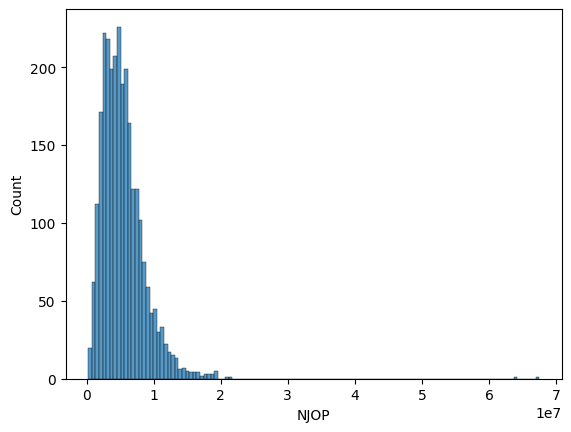

In [256]:
sns.histplot(data=df, x='NJOP')

In [257]:
df[df.loc[:, 'NJOP'] > 2*1e7]

created_at     LT     LB   KT   KM garasi carport  \
957  2021-05-12   60.0   42.0  2.0  1.0    0.0     0.0   
1083 2023-09-20   78.0   45.0  2.0  1.0    0.0     1.0   
1335 2021-12-06  189.0  250.0  7.0  4.0    3.0     0.0   
1388 2021-11-15  144.0  250.0  4.0  4.0    0.0     1.0   

                           sertifikat    listrik  hadap  ...  \
957                               SHM       1300  Timur  ...   
1083                              HGB       1300  Timur  ...   
1335                              SHM    >= 6600    NaN  ...   
1388  lainnya(PPJB, Girik, Adat, dll)  3500-5500    NaN  ...   

                                                    URL  \
957   https://www.rumah123.com/properti/depok/hos928...   
1083  https://www.rumah123.com/properti/depok/hos148...   
1335  https://rumahdijual.com/tebet/11349615-rumah-2...   
1388  https://www.rumah.com/listing-properti/dijual-...   

                                              deskripsi     asal  \
957                           rumah dekat tol cimanggis    Depok   
1083  rumah di grand putra mandiri dekat plaza mall ...    Depok   
1335   daerah bebas banjir dekat dengan kuningan sud...  Jakarta   
1388  rumah brandnew minimalis bangunan 25 lantai ko...  Jakarta   

     kategori_harga         key_features minimalis strategis bebas_banjir  \
957           Murah           tol, dekat         0         1            0   
1083          Mahal           dekat, mal         0         1            0   
1335          Mahal  bebas banjir, dekat         0         1            1   
1388          Mahal       minimalis, mal         1         1            0   

     pemandangan          NJOP  
957            0  6.372549e+07  
1083           0  6.747967e+07  
1335           0  2.164009e+07  
1388           0  2.081218e+07  

[4 rows x 21 columns]

In [258]:
filtered_df = df[df.loc[:, 'NJOP'] > 2*1e7]
filtered_df[['URL', 'deskripsi', 'harga']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\nHarga: {row['harga']}\n"), axis=1)

Row 957
URL: https://www.rumah123.com/properti/depok/hos9284207/
Deskripsi: rumah dekat tol cimanggis
Harga: 6500000000

Row 1083
URL: https://www.rumah123.com/properti/depok/hos14842126/
Deskripsi: rumah di grand putra mandiri dekat plaza mall harga murah j271
Harga: 8300000000

Row 1335
URL: https://rumahdijual.com/tebet/11349615-rumah-2-lantai-dan-strategis-akses-4-mobil-di.html
Deskripsi:  daerah bebas banjir dekat dengan kuningan sudirman manggarai cawang mampang prapatan gatot subroto otista jatinegara dan kampung melayu stasiun cawang dan stasiun tebet pasar tebet bumd dan halte busway taman tebet untuk jogging olahraga dan rekreasi
Harga: 9500000000

Row 1388
URL: https://www.rumah.com/listing-properti/dijual-pantai-indah-kapuk-pik-jakarta-utara-oleh-herry-yang-19007702
Deskripsi: rumah brandnew minimalis bangunan 25 lantai komplek perumahan pantai indah kapuk pik dan keamanan 24 jam
Harga: 8200000000



957     None
1083    None
1335    None
1388    None
dtype: object

In [259]:
df.drop([957, 1083], axis=0, inplace=True)

<Axes: xlabel='NJOP', ylabel='Count'>

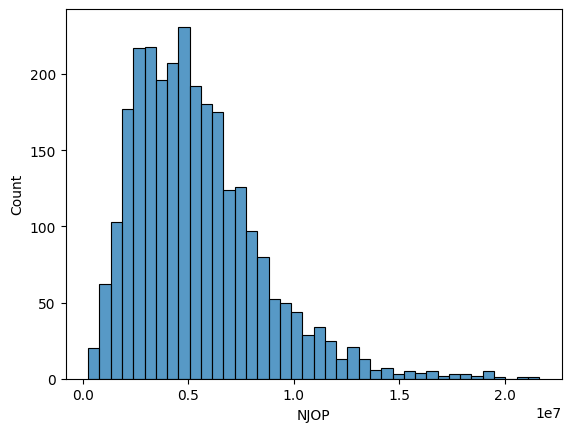

In [260]:
sns.histplot(data=df, x='NJOP')

## <h2> Membuat Variabel `YYYY-mm` (*year-month*) </h2> ##

In [261]:
df['YYYY-mm'] = df['created_at'].dt.strftime('%Y-%m')

In [262]:
df.head()

created_at    LT    LB   KT   KM garasi carport sertifikat listrik  hadap  \
0 2021-03-12  75.0  38.0  2.0  1.0    1.0     1.0        SHM    1300  Barat   
1 2021-06-12  60.0  40.0  1.0  1.0    0.0     1.0        SHM    2200    NaN   
2 2021-06-12  60.0  50.0  2.0  2.0    0.0     1.0        SHM    2200    NaN   
3 2021-06-12  60.0  70.0  3.0  2.0    0.0     1.0        SHM    2200    NaN   
4 2021-06-12  90.0  60.0  3.0  2.0    0.0     2.0        SHM    2200    NaN   

   ...                                          deskripsi   asal  \
0  ...  dekat tol jati warna dekat sutle busway dekat ...  Bogor   
1  ...  destinasi menarik di kawasan babakan madang gu...  Bogor   
2  ...  destinasi menarik di kawasan babakan madang gu...  Bogor   
3  ...  destinasi menarik di kawasan babakan madang gu...  Bogor   
4  ...  destinasi menarik di kawasan babakan madang gu...  Bogor   

  kategori_harga       key_features minimalis strategis bebas_banjir  \
0         Sedang         tol, dekat         0         1            0   
1         Sedang  destinasi, gunung         0         1            0   
2         Sedang  destinasi, gunung         0         1            0   
3          Mahal  destinasi, gunung         0         1            0   
4          Mahal  destinasi, gunung         0         1            0   

  pemandangan          NJOP  YYYY-mm  
0           0  6.128761e+06  2021-03  
1           1  8.114000e+06  2021-06  
2           1  8.186364e+06  2021-06  
3           1  7.706923e+06  2021-06  
4           1  8.005333e+06  2021-06  

[5 rows x 22 columns]

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 3048
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2734 non-null   datetime64[ns]
 1   LT              2734 non-null   float64       
 2   LB              2734 non-null   float64       
 3   KT              2734 non-null   category      
 4   KM              2734 non-null   category      
 5   garasi          2734 non-null   category      
 6   carport         2734 non-null   category      
 7   sertifikat      2734 non-null   category      
 8   listrik         2734 non-null   category      
 9   hadap           1176 non-null   object        
 10  harga           2734 non-null   int64         
 11  URL             2734 non-null   object        
 12  deskripsi       2734 non-null   object        
 13  asal            2734 non-null   category      
 14  kategori_harga  2734 non-null   category      
 15  key_

# <h1> Preprocessing (Part 3) </h1> #

## <h2> Outliers </h2> ##

In [264]:
outliers

[     created_at     LT     LB   KT   KM garasi carport       lokasi  \
 2098 2021-06-12    145  126.0  3.0  3.0    NaN     1.0  Medan Johor   
 2883 2023-08-07  250.0  436.0    5    3    0.0     0.0   Semarapura   
 
      sertifikat listrik hadap         harga  \
 2098        SHM  2200.0   NaN  1.500000e+12   
 2883        SHM  6600.0   NaN  2.500000e+12   
 
                                                     URL  \
 2098  https://www.rumah.com/listing-properti/dijual-...   
 2883  https://www.rumah123.com/properti/semarapura/h...   
 
                                               deskripsi   asal  
 2098                           rumah berkualitas samera  Medan  
 2883  rumah dijual semarapura ada 2 sertifikat masin...   Bali  ,
      created_at      LT      LB   KT   KM garasi carport  \
 658  2023-05-09     525   720.0    8    9    2.0     4.0   
 1197 2021-12-06    3087  2500.0  5.0    5   10.0    10.0   
 1317 2021-12-06     424  1000.0    4    5    1.0     1.0   
 1318 2021-

### <h2> Concating Outliers </h2> ###

In [265]:
df_outliers = pd.concat(outliers, ignore_index=True)

In [266]:
df_outliers.head()

created_at     LT      LB   KT   KM garasi carport  \
0 2021-06-12    145   126.0  3.0  3.0    NaN     1.0   
1 2023-08-07  250.0   436.0    5    3    0.0     0.0   
2 2023-05-09    525   720.0    8    9    2.0     4.0   
3 2021-12-06   3087  2500.0  5.0    5   10.0    10.0   
4 2021-12-06    424  1000.0    4    5    1.0     1.0   

                      lokasi sertifikat  listrik    hadap         harga  \
0                Medan Johor        SHM   2200.0      NaN  1.500000e+12   
1                 Semarapura        SHM   6600.0      NaN  2.500000e+12   
2             Semarang Barat        SHM   5500.0  Selatan  2.200000e+10   
3  BSD BUKIT GOLF, TANGERANG        NaN  66000.0      NaN  1.000000e+11   
4              Jakarta Pusat        SHM  33000.0    Timur  4.950000e+10   

                                                 URL  \
0  https://www.rumah.com/listing-properti/dijual-...   
1  https://www.rumah123.com/properti/semarapura/h...   
2  https://www.brighton.co.id/cari-properti/view/...   
3  https://www.rumah123.com/properti/tangerang/ho...   
4  https://www.rumah.com/listing-properti/dijual-...   

                                           deskripsi       asal  
0                           rumah berkualitas samera      Medan  
1  rumah dijual semarapura ada 2 sertifikat masin...       Bali  
2  jual jl puri anjasmoro rumah mewah di lingkung...   Semarang  
3  rumah super mewah bukit golf bsd city rumah me...  Tangerang  
4  rumah mewah berkonsep hotel bintang 5 interior...    Jakarta

In [267]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  49 non-null     datetime64[ns]
 1   LT          49 non-null     object        
 2   LB          49 non-null     float64       
 3   KT          49 non-null     object        
 4   KM          49 non-null     object        
 5   garasi      35 non-null     object        
 6   carport     42 non-null     object        
 7   lokasi      49 non-null     object        
 8   sertifikat  48 non-null     object        
 9   listrik     47 non-null     object        
 10  hadap       18 non-null     object        
 11  harga       49 non-null     float64       
 12  URL         49 non-null     object        
 13  deskripsi   49 non-null     object        
 14  asal        49 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(12)
memory usage: 5.9+ KB


In [268]:
df_outliers.sort_values(by=['harga'], ascending=False)

created_at      LT      LB   KT   KM garasi carport  \
1  2023-08-07   250.0   436.0    5    3    0.0     0.0   
0  2021-06-12     145   126.0  3.0  3.0    NaN     1.0   
8  2021-12-07     700  2000.0   10   10    NaN    10.0   
3  2021-12-06    3087  2500.0  5.0    5   10.0    10.0   
12 2021-12-07     738   500.0    5    3    2.0     2.0   
23 2023-09-13    1827   950.0  4.0  4.0    1.0     3.0   
19 2023-09-13     375   320.0    6    4    2.0     2.0   
22 2023-08-23    1071  1300.0    5    5    4.0     3.0   
14 2021-12-06     840   800.0    5    4    8.0     NaN   
4  2021-12-06     424  1000.0    4    5    1.0     1.0   
11 2021-12-05     950  1400.0    6    4    7.0     NaN   
6  2021-12-05     652   405.0    5    4    NaN     4.0   
13 2021-12-06     719   657.0   10    6    2.0     2.0   
24 2021-12-06  1500.0  1140.0    4    3    NaN     NaN   
5  2021-12-06     597   700.0    5    4    2.0     5.0   
7  2021-12-05     840   800.0    5    3    NaN     8.0   
17 2021-12-02     260   300.0    3    2    NaN     1.0   
18 2021-12-07     640  1200.0    6    5    NaN     2.0   
25 2021-12-05  1260.0   600.0    5    4    NaN     NaN   
16 2021-12-06      98   126.0    4    4    2.0     2.0   
10 2021-12-06     790   700.0    6    6    NaN     6.0   
20 2023-09-13     294   280.0    7    4    1.0     1.0   
15 2021-11-16     120   240.0    3    3    NaN     3.0   
26 2021-11-29     854   500.0    3    2    NaN     NaN   
9  2021-12-06     485   550.0    3    5    1.0     1.0   
2  2023-05-09     525   720.0    8    9    2.0     4.0   
27 2021-11-29    1130   700.0    8    3    NaN     NaN   
28 2023-09-19   780.0   400.0    5    5    0.0     1.0   
21 2023-08-23    1007   500.0    4    4    0.0     3.0   
29 2023-09-14   650.0  1175.0   22   29    1.0     1.0   
38 2023-09-13     180   192.0    3    2    1.0     1.0   
37 2023-09-13      98   125.0    3    3    0.0     1.0   
42 2023-09-20     700   700.0    4    6    4.0     6.0   
36 2021-12-06     612   485.0    5    4    1.0     2.0   
32 2021-07-12     685   500.0   15    8    NaN     1.0   
40 2023-09-13     815   600.0    5    3    3.0     4.0   
41 2023-09-13     530   500.0    4    2    4.0     2.0   
31 2021-11-30    1068   500.0    5    3    NaN     2.0   
39 2023-08-23     980   360.0    4    4    2.0     4.0   
46 2023-09-20   345.0   600.0    7    6    0.0     1.0   
33 2021-08-12     920   600.0    5    4    2.0     6.0   
30 2021-02-12     867   650.0    5    6      2       4   
45 2023-09-18   601.0   195.0    3    3    1.0     1.0   
43 2021-12-06   360.0   450.0    3    4    2.0     2.0   
44 2021-12-06   450.0   600.0    4    3    1.0     2.0   
47 2021-01-12     915   622.0   10    8    3.0     8.0   
48 2021-06-12  1095.0   800.0    6    5    1.0     NaN   
35 2021-12-06     534  1000.0  8.0    8    6.0     6.0   
34 2021-12-06     534  1000.0  5.0    6    6.0     2.0   

                       lokasi sertifikat  listrik       hadap         harga  \
1                  Semarapura        SHM   6600.0         NaN  2.500000e+12   
0                 Medan Johor        SHM   2200.0         NaN  1.500000e+12   
8               Jakarta Pusat        SHM  66000.0       Utara  1.050000e+11   
3   BSD BUKIT GOLF, TANGERANG        NaN  66000.0         NaN  1.000000e+11   
12            Jakarta Selatan  SHM + IMB  13200.0         NaN  7.400000e+10   
23              Medan Polonia        SHM  10000.0         NaN  6.000000e+10   
19                      Regol        SHM  13900.0       Utara  5.500000e+10   
22                       Dago        SHM  66000.0       Barat  5.000000e+10   
14            Jakarta Selatan        SHM      NaN         NaN  5.000000e+10   
4               Jakarta Pusat        SHM  33000.0       Timur  4.950000e+10   
11            Jakarta Selatan        SHM  23000.0         NaN  4.900000e+10   
6               Jakarta Pusat        SHM   6600.0         NaN  4.500000e+10   
13            Jakarta Selatan        SHM  26400.0         NaN  4.000000e+10

### <h2> Mengkonfirmasi harga </h2> ###

In [269]:
df_outliers[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 0
URL: https://www.rumah.com/listing-properti/dijual-samera-djohor-oleh-steven-19272779
Deskripsi: rumah berkualitas samera

Row 1
URL: https://www.rumah123.com/properti/semarapura/hos12342924/
Deskripsi: rumah dijual semarapura ada 2 sertifikat masingmasing ada imbbekas tempat praktek dokter terdiri dari 3 kt 1ada kamar mandi dalam2 ruang tamu yang jadi satu1 ruang makan dapur kotor dapur bersih 1kamar mandi di belakang1 kt taman kolam kt 1 km 1ada 2 meteran listrik 6600 watt dan 4400 wattada 8 unit ac  full furnishedrumah sarang burung walet di lantai 3 sudah menghasilkan 

Row 2
URL: https://www.brighton.co.id/cari-properti/view/jl-puri-anjasmoro-xomy
Deskripsi: jual jl puri anjasmoro rumah mewah di lingkungan elite lengkap dengan isinya

Row 3
URL: https://www.rumah123.com/properti/tangerang/hos8634966/
Deskripsi: rumah super mewah bukit golf bsd city rumah mewah dengan halaman belakang view golf bangunan mandiri paling premium dan unit spesial jarang ada fasilitas super lengka

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
dtype: object

In [270]:
df_outliers.loc[1, 'harga'] = 2_500_000_000
df_outliers.loc[0, 'harga'] = 1_500_000_000

- Dari inspeksi yang dilakukan dengan melihat deskripsi dan tautan di baris 1, diperoleh informasi bahwa harga seharusnya adalah Rp 2.5 Miliar, sedangkan untuk baris 0, tautannya tidak langsung mengarahkan ke laman penjualan rumahnya, tetapi setelah mengecek *website* dan penjualnya, diperoleh informasi bahwa tidak ada rumah yang dijual dengan harga Rp 1.5 Triliun di kawasan Medan Johor, jadi diasumsikan seharusnya adalah Rp 1.5 Miliar
- Untuk rumah yang menyentuh harga ratusan Miliar, yaitu di baris 3 dan 8, untuk baris 3 terkonfirmasi dari *value* variabel `deskripsi` di baris itu bahwa harga rumahnya memang Rp 100 an Miliar, sedangkan untuk baris 8 tautannya tidak langsung mengarahkan ke laman penjualan rumahnya, tetapi dengan melihat harga-harga di kawasan Thamrin dengan spesifikasi rumah serupa di situs tersebut, harganya kurang lebih berada di antara 75 - 90 Miliar, sehingga kami merasa bahwa harga Rp 105 Triliun itu masih dalam batas mungkin ada

### <h2> Missing Values </h2> ###

In [271]:
df_outliers.isna().sum()

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi        14
carport        7
lokasi         0
sertifikat     1
listrik        2
hadap         31
harga          0
URL            0
deskripsi      0
asal           0
dtype: int64

#### <h2> Variabel `garasi` </h2> ####

In [272]:
df_outliers['garasi'].unique()

array([nan, 0.0, 2.0, 10.0, 1.0, 7.0, 8.0, 4.0, 6.0, 3.0], dtype=object)

In [273]:
df_outliers[df_outliers.loc[:, 'garasi'].isna()]

created_at      LT      LB   KT   KM garasi carport           lokasi  \
0  2021-06-12     145   126.0  3.0  3.0    NaN     1.0      Medan Johor   
6  2021-12-05     652   405.0    5    4    NaN     4.0    Jakarta Pusat   
7  2021-12-05     840   800.0    5    3    NaN     8.0    Jakarta Pusat   
8  2021-12-07     700  2000.0   10   10    NaN    10.0    Jakarta Pusat   
10 2021-12-06     790   700.0    6    6    NaN     6.0  Jakarta Selatan   
15 2021-11-16     120   240.0    3    3    NaN     3.0    Jakarta Barat   
17 2021-12-02     260   300.0    3    2    NaN     1.0   Jakarta Utara    
18 2021-12-07     640  1200.0    6    5    NaN     2.0   Jakarta Utara    
24 2021-12-06  1500.0  1140.0    4    3    NaN     NaN           Gubeng   
25 2021-12-05  1260.0   600.0    5    4    NaN     NaN          Genteng   
26 2021-11-29     854   500.0    3    2    NaN     NaN     Gondokusuman   
27 2021-11-29    1130   700.0    8    3    NaN     NaN     Gondokusuman   
31 2021-11-30    1068   500.0    5    3    NaN     2.0    Kota Semarang   
32 2021-07-12     685   500.0   15    8    NaN     1.0    Kota Semarang   

   sertifikat  listrik    hadap         harga  \
0         SHM   2200.0      NaN  1.500000e+09   
6         SHM   6600.0      NaN  4.500000e+10   
7        SHGB   6600.0      NaN  3.999000e+10   
8         SHM  66000.0    Utara  1.050000e+11   
10        SHM   7700.0      NaN  3.200000e+10   
15        SHM   4400.0  selatan  3.000000e+10   
17       SHGB   2200.0      NaN  3.950000e+10   
18        SHM   9500.0      NaN  3.900000e+10   
24        SHM     5500    barat  4.000000e+10   
25       SHGB     6600  selatan  3.800000e+10   
26        SHM      NaN      NaN  2.650000e+10   
27        SHM   1300.0      NaN  2.200000e+10   
31        SHM   3500.0      NaN  1.690000e+10   
32        SHM   2200.0    Timur  1.800000e+10   

                                                  URL  \
0   https://www.rumah.com/listing-properti/dijual-...   
6   https://www.rumah.com/listing-properti/dijual-...   
7   https://www.rumah.com/listing-properti/dijual-...   
8   https://www.rumah.com/listing-properti/dijual-...   
10  https://rumahdijual.com/jakarta-selatan/110122...   
15  https://www.rumah.com/listing-properti/dijual-...   
17  https://www.rumah.com/listing-properti/dijual-...   
18  https://www.rumah123.com/properti/jakarta-utar...   
24  https://rumahdijual.com/surabaya/11761754-diju...   
25  https://www.99.co/id/properti/rumah-pusat-kota...   
26  https://www.rumah123.com/properti/yogyakarta/h...   
27  https://www.rumah123.com/properti/yogyakarta/h...   
31  https://www.rumah.com/listing-properti/dijual-...   
32  https://www.olx.co.id/item/rumah-luas-belakang...   

                                            deskripsi        asal  
0                            rumah berkualitas samera       Medan  
6                                        dapat dinego     Jakarta  
7   1 arah trotoar besar pepohonan rindang asri ha...     Jakarta  
8    2 menit ke grand indonesia 500 meter 5 menit ...     Jakarta  
10                                   ada kolam renang     Jakarta  
15  jalanan lebar dekat mall green sedayufull furnish     Jakarta  
17  2 lantai jalanan luas ada minimart keamanan 24...     Jakarta  
18  rumah mewah rapi dan luas dengan lebar 16x4064...     Jakarta  
24  dijual rumah ciamik lokasi surabaya timurdharm...    Surabaya  
25  rumah surabaya pusat nol jalan embong tanjung ...    Surabaya  
26  bismillah  rumah di lokasi elite kotabaruturun...  Yogyakarta  
27  bismillah  dijual rumah ala belanda lokasi str...  Yogyakarta  
31   di kawasan prestisius dan elite ada hall kapa...    Semarang  
32  jalan depan lebar bisa simpangan mobil lokasi ...    Semarang

In [274]:
filtered_df = df_outliers[df_outliers.loc[:, 'garasi'].isna()]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 0
URL: https://www.rumah.com/listing-properti/dijual-samera-djohor-oleh-steven-19272779
Deskripsi: rumah berkualitas samera

Row 6
URL: https://www.rumah.com/listing-properti/dijual-dijual-cepat-rumah-menteng-jakarta-pusat-lokasi-prime-kondisi-rapi-siap-huni-nego-sampai-jadi-oleh-dimas-raditya-19382085
Deskripsi: dapat dinego

Row 7
URL: https://www.rumah.com/listing-properti/dijual-rumah-di-menteng-oleh-doan-17116730
Deskripsi: 1 arah trotoar besar pepohonan rindang asri harga nego

Row 8
URL: https://www.rumah.com/listing-properti/dijual-dijual-murah-harga-covid-rumah-bisnis-district-2-menit-dari-grand-indonesia-thamrin-jakarta-pusat-oleh-firman-bgeac-19277814
Deskripsi:  2 menit ke grand indonesia 500 meter 5 menit ke plaza indonesia 1 km 70 meter ke jl sudirman  thamrin 50 meter ke stasiun mrtkrl bni 100 meter ke mrt dukuh atas 200 meter ke stasiun bni sudirman ka bandara

Row 10
URL: https://rumahdijual.com/jakarta-selatan/11012287-dijual-rumah-ada-kolam-renang-di-pondok-indah

0     None
6     None
7     None
8     None
10    None
15    None
17    None
18    None
24    None
25    None
26    None
27    None
31    None
32    None
dtype: object

In [275]:
df_outliers['garasi'] = df_outliers['garasi'].fillna(0)

In [276]:
df_outliers[df_outliers.loc[:, 'garasi'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal]
Index: []

In [277]:
df_outliers['garasi'].value_counts()

0.0     19
2.0     10
1.0     10
4.0      3
6.0      2
3.0      2
10.0     1
7.0      1
8.0      1
Name: garasi, dtype: int64

In [278]:
df_outliers.loc[df_outliers.loc[:, 'garasi'] > 2, :]

created_at    LT      LB   KT KM  garasi carport  \
3  2021-12-06  3087  2500.0  5.0  5    10.0    10.0   
11 2021-12-05   950  1400.0    6  4     7.0     NaN   
14 2021-12-06   840   800.0    5  4     8.0     NaN   
22 2023-08-23  1071  1300.0    5  5     4.0     3.0   
34 2021-12-06   534  1000.0  5.0  6     6.0     2.0   
35 2021-12-06   534  1000.0  8.0  8     6.0     6.0   
40 2023-09-13   815   600.0    5  3     3.0     4.0   
41 2023-09-13   530   500.0    4  2     4.0     2.0   
42 2023-09-20   700   700.0    4  6     4.0     6.0   
47 2021-01-12   915   622.0   10  8     3.0     8.0   

                       lokasi sertifikat  listrik  hadap         harga  \
3   BSD BUKIT GOLF, TANGERANG        NaN  66000.0    NaN  1.000000e+11   
11            Jakarta Selatan        SHM  23000.0    NaN  4.900000e+10   
14            Jakarta Selatan        SHM      NaN    NaN  5.000000e+10   
22                       Dago        SHM  66000.0  Barat  5.000000e+10   
34             BSD, TANGERANG        SHM  16500.0    NaN  1.550000e+10   
35             BSD, TANGERANG        SHM  16500.0    NaN  1.550000e+10   
40                 Setra Duta        SHM  16500.0  Timur  1.750000e+10   
41               Pasir Kaliki        SHM   5500.0    NaN  1.700000e+10   
42                  Setraduta        SHM   4400.0  Timur  1.850000e+10   
47                 Umbulharjo        SHM  11500.0    NaN  1.600000e+10   

                                                  URL  \
3   https://www.rumah123.com/properti/tangerang/ho...   
11  https://rumahdijual.com/jakarta-selatan/955358...   
14  https://rumahdijual.com/jakarta-pusat/11761428...   
22  https://www.rumah.com/listing-properti/dijual-...   
34  https://www.rumah123.com/properti/tangerang/ho...   
35  https://www.rumah123.com/properti/tangerang/ho...   
40  https://www.rumah123.com/properti/bandung/hos1...   
41  https://www.rumah123.com/properti/bandung/hos1...   
42  https://www.rumah.com/listing-properti/dijual-...   
47  https://www.rumah123.com/properti/yogyakarta/h...   

                                            deskripsi        asal  
3   rumah super mewah bukit golf bsd city rumah me...   Tangerang  
11  lantai 1  1 living room family room dinning ro...     Jakarta  
14                          kawasan rasuna epicentrum     Jakarta  
22  jl kyai gede utama sayao dago  bandungdijual r...     Bandung  
34  new homerumah mewah taman tirta golf bsd ltlb ...   Tangerang  
35  dijual rumah brand new taman tirta golf bsdltl...   Tangerang  
40  jual rumah setraduta 3 lantai nyamansiap hunia...     Bandung  
41  dijualrumah hitung tanah sangat strategis pusa...     Bandung  
42  kawasan elit setraduta akses dekat kampus mara...     Bandung  
47  rumah dalam kodya dekat kampus dan xt square a...  Yogyakarta

In [279]:
filtered_df = df_outliers.loc[df_outliers.loc[:, 'garasi'] > 2, :]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 3
URL: https://www.rumah123.com/properti/tangerang/hos8634966/
Deskripsi: rumah super mewah bukit golf bsd city rumah mewah dengan halaman belakang view golf bangunan mandiri paling premium dan unit spesial jarang ada fasilitas super lengkap dekat dengan mall cbd bsd sekolah internasional dll luas tanah 3087m2 4155 x 7429 luas bangunan 2500  basement 67352  teras 2970 m2  bangunan lantai 1 44298 m2  teras selasar 49323 m2  carport 31380 m2  kolam renang 8586 m2  gazebo 2916 m2  pos jaga 1872 m2  pagar tembok 16659 m2  bangunan lantai 2 44338 m2  balkon 8938 m2 listrik 66000 watt full furnish ada   sofa set b b italia  sofa set maxalto  sofa set flexform  poliform kitchen  wadrobe  flou bed  foscarini lamp  dapur bersih merk boffi italy  dapur kotor stainless steel by rotaryana  genset denyo  lift otis  air panas solahart  ac daikin central  home automation by crestron  blinds curtains by onna  motorized by somfy  kusen alumunium by surco jermanrp 100000xxx000 seratus milyar

Row 11

3     None
11    None
14    None
22    None
34    None
35    None
40    None
41    None
42    None
47    None
dtype: object

- Setelah dicek untuk baris-baris yang *value* variabel `garasi` nya > 2, diperoleh bahwa baris-baris tersebut memang benar menjual rumah yang tergolong mewah dibandingkan rumah-rumah saat ini, sehingga wajar `garasi` nya bisa ada yang > 2

#### <h2> Variabel `carport` </h2> ####

In [280]:
df_outliers['carport'].unique()

array([1.0, 0.0, 4.0, 10.0, 5.0, 8.0, 6.0, nan, 2.0, 3.0], dtype=object)

In [281]:
df_outliers[df_outliers.loc[:, 'carport'].isna()]

created_at      LT      LB KT KM  garasi carport           lokasi  \
11 2021-12-05     950  1400.0  6  4     7.0     NaN  Jakarta Selatan   
14 2021-12-06     840   800.0  5  4     8.0     NaN  Jakarta Selatan   
24 2021-12-06  1500.0  1140.0  4  3     0.0     NaN           Gubeng   
25 2021-12-05  1260.0   600.0  5  4     0.0     NaN          Genteng   
26 2021-11-29     854   500.0  3  2     0.0     NaN     Gondokusuman   
27 2021-11-29    1130   700.0  8  3     0.0     NaN     Gondokusuman   
48 2021-06-12  1095.0   800.0  6  5     1.0     NaN         Denpasar   

   sertifikat  listrik    hadap         harga  \
11        SHM  23000.0      NaN  4.900000e+10   
14        SHM      NaN      NaN  5.000000e+10   
24        SHM     5500    barat  4.000000e+10   
25       SHGB     6600  selatan  3.800000e+10   
26        SHM      NaN      NaN  2.650000e+10   
27        SHM   1300.0      NaN  2.200000e+10   
48        SHM  11000.0      NaN  1.600000e+10   

                                                  URL  \
11  https://rumahdijual.com/jakarta-selatan/955358...   
14  https://rumahdijual.com/jakarta-pusat/11761428...   
24  https://rumahdijual.com/surabaya/11761754-diju...   
25  https://www.99.co/id/properti/rumah-pusat-kota...   
26  https://www.rumah123.com/properti/yogyakarta/h...   
27  https://www.rumah123.com/properti/yogyakarta/h...   
48  https://www.olx.co.id/item/rumah-mewah-furnish...   

                                            deskripsi        asal  
11  lantai 1  1 living room family room dinning ro...     Jakarta  
14                          kawasan rasuna epicentrum     Jakarta  
24  dijual rumah ciamik lokasi surabaya timurdharm...    Surabaya  
25  rumah surabaya pusat nol jalan embong tanjung ...    Surabaya  
26  bismillah  rumah di lokasi elite kotabaruturun...  Yogyakarta  
27  bismillah  dijual rumah ala belanda lokasi str...  Yogyakarta  
48  cocok untuk kantor gallery atau boutique 4 kam...        Bali

In [282]:
filtered_df = df_outliers[df_outliers.loc[:, 'carport'].isna()]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 11
URL: https://rumahdijual.com/jakarta-selatan/9553588-rumah-mewah-pondok-indah-lt-950-m2-lb-1400-a.html
Deskripsi: lantai 1  1 living room family room dinning room guest bed room  bath room bed room  bath room pantry kitchen service area  staff bath roomlantai 2 1 master bed room  bath room1 bed room  bath room1 study room1 billyard room1 living roombasement 2 staff bed rooms1 storagegarage for 68 ca

Row 14
URL: https://rumahdijual.com/jakarta-pusat/11761428-rumah-bagus-menteng-area.html
Deskripsi: kawasan rasuna epicentrum

Row 24
URL: https://rumahdijual.com/surabaya/11761754-dijual-rumah-ciamik-lokasi-surabaya-timur.html
Deskripsi: dijual rumah ciamik lokasi surabaya timurdharmahusada indah timur lt 1500 m2 lb 1140 m2 2 lt kt 22 km 3 listrik 5500 watt shm  hadap barat  selling point  kolam renang dan gym  pdamharga jual rp 40m

Row 25
URL: https://www.99.co/id/properti/rumah-pusat-kota-surabaya-embong-tanjung-dyt-37-74831858424
Deskripsi: rumah surabaya pusat nol jalan embong

11    None
14    None
24    None
25    None
26    None
27    None
48    None
dtype: object

In [283]:
df_outliers['carport'] = df_outliers['carport'].fillna(0)

In [284]:
df_outliers[df_outliers.loc[:, 'garasi'].isna()]

Empty DataFrame
Columns: [created_at, LT, LB, KT, KM, garasi, carport, lokasi, sertifikat, listrik, hadap, harga, URL, deskripsi, asal]
Index: []

In [285]:
df_outliers['carport'].value_counts()

1.0     12
2.0     11
0.0      8
4.0      5
6.0      4
3.0      4
10.0     2
8.0      2
5.0      1
Name: carport, dtype: int64

In [286]:
df_outliers.loc[df_outliers.loc[:, 'carport'] > 2, :]

created_at    LT      LB   KT   KM  garasi  carport  \
2  2023-05-09   525   720.0    8    9     2.0      4.0   
3  2021-12-06  3087  2500.0  5.0    5    10.0     10.0   
5  2021-12-06   597   700.0    5    4     2.0      5.0   
6  2021-12-05   652   405.0    5    4     0.0      4.0   
7  2021-12-05   840   800.0    5    3     0.0      8.0   
8  2021-12-07   700  2000.0   10   10     0.0     10.0   
10 2021-12-06   790   700.0    6    6     0.0      6.0   
15 2021-11-16   120   240.0    3    3     0.0      3.0   
21 2023-08-23  1007   500.0    4    4     0.0      3.0   
22 2023-08-23  1071  1300.0    5    5     4.0      3.0   
23 2023-09-13  1827   950.0  4.0  4.0     1.0      3.0   
30 2021-02-12   867   650.0    5    6     2.0      4.0   
33 2021-08-12   920   600.0    5    4     2.0      6.0   
35 2021-12-06   534  1000.0  8.0    8     6.0      6.0   
39 2023-08-23   980   360.0    4    4     2.0      4.0   
40 2023-09-13   815   600.0    5    3     3.0      4.0   
42 2023-09-20   700   700.0    4    6     4.0      6.0   
47 2021-01-12   915   622.0   10    8     3.0      8.0   

                       lokasi sertifikat  listrik       hadap         harga  \
2              Semarang Barat        SHM   5500.0     Selatan  2.200000e+10   
3   BSD BUKIT GOLF, TANGERANG        NaN  66000.0         NaN  1.000000e+11   
5               Jakarta Pusat        SHM   8000.0         NaN  4.000000e+10   
6               Jakarta Pusat        SHM   6600.0         NaN  4.500000e+10   
7               Jakarta Pusat       SHGB   6600.0         NaN  3.999000e+10   
8               Jakarta Pusat        SHM  66000.0       Utara  1.050000e+11   
10            Jakarta Selatan        SHM   7700.0         NaN  3.200000e+10   
15              Jakarta Barat        SHM   4400.0     selatan  3.000000e+10   
21               Bandung Kota        SHM   8000.0  Barat Laut  2.115000e+10   
22                       Dago        SHM  66000.0       Barat  5.000000e+10   
23              Medan Polonia        SHM  10000.0         NaN  6.000000e+10   
30             Babakan Madang        SHM     5500         NaN  1.650000e+10   
33         Kabupaten Semarang        SHM   4400.0  Timur Laut  1.650000e+10   
35             BSD, TANGERANG        SHM  16500.0         NaN  1.550000e+10   
39      Kota Baru Parahyangan        SHM  11000.0     Selatan  1.680000e+10   
40                 Setra Duta        SHM  16500.0       Timur  1.750000e+10   
42                  Setraduta        SHM   4400.0       Timur  1.850000e+10   
47                 Umbulharjo        SHM  11500.0         NaN  1.600000e+10   

                                                  URL  \
2   https://www.brighton.co.id/cari-properti/view/...   
3   https://www.rumah123.com/properti/tangerang/ho...   
5   https://www.rumah.com/listing-properti/dijual-...   
6   https://www.rumah.com/listing-properti/dijual-...   
7   https://www.rumah.com/listing-properti/dijual-...   
8   https://www.rumah.com/listing-properti/dijual-...   
10  https://rumahdijual.com/jakarta-selatan/110122...   
15  https://www.rumah.com/listing-properti/dijual-...   
21  https://www.rumah123.com/properti/bandung/hos1...   
22  https://www.rumah.com/listing-properti/dijual-...   
23  https://www.rumah.com/listing-properti/dijual-...   
30  https://www.rumah123.com/properti/bogor/hos927...   
33  https://www.rumah123.com/properti/semarang/hos...   
35  https://www.rumah123.com/properti/tangerang/ho...   
39  https://www.rumah123.com/properti/bandung/hos1...   
40  https://www.rumah123.com/properti/bandung/hos1...   
42  https://www.rumah.com/listing-properti/dijual-...   
47  https://www.rumah123.com/properti/yogyakarta/h...   

                                            deskripsi        asal  
2   jual jl puri anjasmoro rumah mewah di lingkung...    Semarang  
3   rumah super mewah bukit golf bsd city rumah me...   Tangerang  
5   lokasi strategis hanya 5 menit ke pusat  kulin...     Jakarta  
6                                        d

In [287]:
filtered_df = df_outliers.loc[df_outliers.loc[:, 'carport'] > 2, :]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 2
URL: https://www.brighton.co.id/cari-properti/view/jl-puri-anjasmoro-xomy
Deskripsi: jual jl puri anjasmoro rumah mewah di lingkungan elite lengkap dengan isinya

Row 3
URL: https://www.rumah123.com/properti/tangerang/hos8634966/
Deskripsi: rumah super mewah bukit golf bsd city rumah mewah dengan halaman belakang view golf bangunan mandiri paling premium dan unit spesial jarang ada fasilitas super lengkap dekat dengan mall cbd bsd sekolah internasional dll luas tanah 3087m2 4155 x 7429 luas bangunan 2500  basement 67352  teras 2970 m2  bangunan lantai 1 44298 m2  teras selasar 49323 m2  carport 31380 m2  kolam renang 8586 m2  gazebo 2916 m2  pos jaga 1872 m2  pagar tembok 16659 m2  bangunan lantai 2 44338 m2  balkon 8938 m2 listrik 66000 watt full furnish ada   sofa set b b italia  sofa set maxalto  sofa set flexform  poliform kitchen  wadrobe  flou bed  foscarini lamp  dapur bersih merk boffi italy  dapur kotor stainless steel by rotaryana  genset denyo  lift otis  air panas sol

2     None
3     None
5     None
6     None
7     None
8     None
10    None
15    None
21    None
22    None
23    None
30    None
33    None
35    None
39    None
40    None
42    None
47    None
dtype: object

- Setelah dicek untuk baris-baris yang *value* variabel `carport` nya > 2, diperoleh bahwa baris-baris tersebut memang benar menjual rumah yang tergolong mewah dibandingkan rumah-rumah saat ini, sehingga wajar `carport` nya bisa ada yang > 2

#### <h2> Variabel `hadap` </h2> ####

In [288]:
df_outliers['hadap'].unique()

array([nan, 'Selatan', 'Timur', 'Utara', 'selatan', 'Barat Laut', 'Barat',
       'barat', 'Timur Laut', 'utara'], dtype=object)

In [289]:
df_outliers[df_outliers.loc[:, 'hadap'].isna()]

created_at      LT      LB   KT   KM  garasi  carport  \
0  2021-06-12     145   126.0  3.0  3.0     0.0      1.0   
1  2023-08-07   250.0   436.0    5    3     0.0      0.0   
3  2021-12-06    3087  2500.0  5.0    5    10.0     10.0   
5  2021-12-06     597   700.0    5    4     2.0      5.0   
6  2021-12-05     652   405.0    5    4     0.0      4.0   
7  2021-12-05     840   800.0    5    3     0.0      8.0   
9  2021-12-06     485   550.0    3    5     1.0      1.0   
10 2021-12-06     790   700.0    6    6     0.0      6.0   
11 2021-12-05     950  1400.0    6    4     7.0      0.0   
12 2021-12-07     738   500.0    5    3     2.0      2.0   
13 2021-12-06     719   657.0   10    6     2.0      2.0   
14 2021-12-06     840   800.0    5    4     8.0      0.0   
17 2021-12-02     260   300.0    3    2     0.0      1.0   
18 2021-12-07     640  1200.0    6    5     0.0      2.0   
20 2023-09-13     294   280.0    7    4     1.0      1.0   
23 2023-09-13    1827   950.0  4.0  4.0     1.0      3.0   
26 2021-11-29     854   500.0    3    2     0.0      0.0   
27 2021-11-29    1130   700.0    8    3     0.0      0.0   
28 2023-09-19   780.0   400.0    5    5     0.0      1.0   
29 2023-09-14   650.0  1175.0   22   29     1.0      1.0   
30 2021-02-12     867   650.0    5    6     2.0      4.0   
31 2021-11-30    1068   500.0    5    3     0.0      2.0   
34 2021-12-06     534  1000.0  5.0    6     6.0      2.0   
35 2021-12-06     534  1000.0  8.0    8     6.0      6.0   
36 2021-12-06     612   485.0    5    4     1.0      2.0   
38 2023-09-13     180   192.0    3    2     1.0      1.0   
41 2023-09-13     530   500.0    4    2     4.0      2.0   
44 2021-12-06   450.0   600.0    4    3     1.0      2.0   
46 2023-09-20   345.0   600.0    7    6     0.0      1.0   
47 2021-01-12     915   622.0   10    8     3.0      8.0   
48 2021-06-12  1095.0   800.0    6    5     1.0      0.0   

                       lokasi sertifikat  listrik hadap         harga  \
0                 Medan Johor        SHM   2200.0   NaN  1.500000e+09   
1                  Semarapura        SHM   6600.0   NaN  2.500000e+09   
3   BSD BUKIT GOLF, TANGERANG        NaN  66000.0   NaN  1.000000e+11   
5               Jakarta Pusat        SHM   8000.0   NaN  4.000000e+10   
6               Jakarta Pusat        SHM   6600.0   NaN  4.500000e+10   
7               Jakarta Pusat       SHGB   6600.0   NaN  3.999000e+10   
9             Jakarta Selatan  SHM + IMB  18000.0   NaN  2.200000e+10   
10            Jakarta Selatan        SHM   7700.0   NaN  3.200000e+10   
11            Jakarta Selatan        SHM  23000.0   NaN  4.900000e+10   
12            Jakarta Selatan  SHM + IMB  13200.0   NaN  7.400000e+10   
13            Jakarta Selatan        SHM  26400.0   NaN  4.000000e+10   
14            Jakarta Selatan        SHM      NaN   NaN  5.000000e+10   
17             Jakarta Utara        SHGB   2200.0   NaN  3.950000e+10   
18             Jakarta Utara         SHM   9500.0   NaN  3.900000e+10   
20                     Cibogo        SHM   2500.0   NaN  3.100000e+10   
23              Medan Polonia        SHM  10000.0   NaN  6.000000e+10   
26               Gondokusuman        SHM      NaN   NaN  2.650000e+10   
27               Gondokusuman        SHM   1300.0   NaN  2.200000e+10   
28                       Kuta        SHM  22000.0   NaN  2.200000e+10   
29                   Seminyak        SHM  38500.0   NaN  2.100000e+10   
30             Babakan Madang        SHM     5500   NaN  1.650000e+10   
31              Kota Semarang        SHM   3500.0   NaN  1.690000e+10   
34             BSD, TANGERANG        SHM  16500.0   NaN  1.550000e+10   
35             BSD, TANGERANG        SHM  16500.0   NaN  1.550000e+10   
36            Jakarta Selatan        SHM  13000.0   NaN  1.850000e+10   
38              Bandung Kulon        SHM   2200.0   NaN  2.000000e+10   
41               Pasir Kaliki        SHM   5500.0   NaN  1.700000e+10   
44                 Sambikerep        S

In [290]:
filtered_df = df_outliers[df_outliers.loc[:, 'hadap'].isna()]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 0
URL: https://www.rumah.com/listing-properti/dijual-samera-djohor-oleh-steven-19272779
Deskripsi: rumah berkualitas samera

Row 1
URL: https://www.rumah123.com/properti/semarapura/hos12342924/
Deskripsi: rumah dijual semarapura ada 2 sertifikat masingmasing ada imbbekas tempat praktek dokter terdiri dari 3 kt 1ada kamar mandi dalam2 ruang tamu yang jadi satu1 ruang makan dapur kotor dapur bersih 1kamar mandi di belakang1 kt taman kolam kt 1 km 1ada 2 meteran listrik 6600 watt dan 4400 wattada 8 unit ac  full furnishedrumah sarang burung walet di lantai 3 sudah menghasilkan 

Row 3
URL: https://www.rumah123.com/properti/tangerang/hos8634966/
Deskripsi: rumah super mewah bukit golf bsd city rumah mewah dengan halaman belakang view golf bangunan mandiri paling premium dan unit spesial jarang ada fasilitas super lengkap dekat dengan mall cbd bsd sekolah internasional dll luas tanah 3087m2 4155 x 7429 luas bangunan 2500  basement 67352  teras 2970 m2  bangunan lantai 1 44298 m2  teras 

0     None
1     None
3     None
5     None
6     None
7     None
9     None
10    None
11    None
12    None
13    None
14    None
17    None
18    None
20    None
23    None
26    None
27    None
28    None
29    None
30    None
31    None
34    None
35    None
36    None
38    None
41    None
44    None
46    None
47    None
48    None
dtype: object

In [291]:
df_outliers['hadap'] = df_outliers['hadap'].replace(['selatan'], 'Selatan')
df_outliers['hadap'] = df_outliers['hadap'].replace(['barat'], 'Barat')
df_outliers['hadap'] = df_outliers['hadap'].replace(['utara'], 'Utara')

In [292]:
df_outliers['hadap'].unique()

array([nan, 'Selatan', 'Timur', 'Utara', 'Barat Laut', 'Barat',
       'Timur Laut'], dtype=object)

#### <h2> Variabel `listrik` </h2>

In [293]:
df_outliers['listrik'] = df_outliers['listrik'].astype('str')

In [294]:
df_outliers['listrik'].unique()

array(['2200.0', '6600.0', '5500.0', '66000.0', '33000.0', '8000.0',
       '18000.0', '7700.0', '23000.0', '13200.0', '26400.0', 'nan',
       '4400.0', '9500.0', '13900.0', '2500.0', '10000.0', '5500', '6600',
       '1300.0', '22000.0', '38500.0', '3500.0', '16500.0', '13000.0',
       '11000.0', '15000', '2200', '3500', '11500.0'], dtype=object)

In [295]:
df_outliers['listrik'] = df_outliers['listrik'].replace(['900 Watt', '900.0'], '900')

df_outliers['listrik'] = df_outliers['listrik'].replace(['1300 Watt', '1300 KWh', '1200',
                                       '1300.0'], '1300')

df_outliers['listrik'] = df_outliers['listrik'].replace(['2200 Watt', '2300 Watt', '2400 Watt',
                                       '2000', '1300.0', '2200.0',
                                       '2000.0', '220', '2400',
                                       '2300', '220.0', '2300.0', '2500.0'], '2200')

df_outliers['listrik'] = df_outliers['listrik'].replace(['3300 Watt', '3500 KWh', '3500 Watt',
                                       '4400 Watt', '5500 Watt', '3500',
                                       '5500', '4400', '3300',
                                       '4400.0', '5500.0', '3500.0',
                                       '3000.0', '3300.0', '4500.0',
                                       '4000.0', '5000.0', '4899'], '3500-5500')

df_outliers['listrik'] = df_outliers['listrik'].replace(['450 Va/R-1', '450.0', '400'], '450')

df_outliers['listrik'] = df_outliers['listrik'].replace(['Lainnya Watt', 'Token'], 'Lainnya')

df_outliers['listrik'] = df_outliers['listrik'].replace(['-', 'nan'], 'Tidak diketahui')

In [296]:
standard_values = ['900', '1300', '2200', '3500-5500', '450', 'Lainnya', 'Tidak diketahui']

In [297]:
df_outliers[~df_outliers['listrik'].isin(standard_values)]

created_at      LT      LB   KT   KM  garasi  carport  \
1  2023-08-07   250.0   436.0    5    3     0.0      0.0   
3  2021-12-06    3087  2500.0  5.0    5    10.0     10.0   
4  2021-12-06     424  1000.0    4    5     1.0      1.0   
5  2021-12-06     597   700.0    5    4     2.0      5.0   
6  2021-12-05     652   405.0    5    4     0.0      4.0   
7  2021-12-05     840   800.0    5    3     0.0      8.0   
8  2021-12-07     700  2000.0   10   10     0.0     10.0   
9  2021-12-06     485   550.0    3    5     1.0      1.0   
10 2021-12-06     790   700.0    6    6     0.0      6.0   
11 2021-12-05     950  1400.0    6    4     7.0      0.0   
12 2021-12-07     738   500.0    5    3     2.0      2.0   
13 2021-12-06     719   657.0   10    6     2.0      2.0   
18 2021-12-07     640  1200.0    6    5     0.0      2.0   
19 2023-09-13     375   320.0    6    4     2.0      2.0   
21 2023-08-23    1007   500.0    4    4     0.0      3.0   
22 2023-08-23    1071  1300.0    5    5     4.0      3.0   
23 2023-09-13    1827   950.0  4.0  4.0     1.0      3.0   
25 2021-12-05  1260.0   600.0    5    4     0.0      0.0   
28 2023-09-19   780.0   400.0    5    5     0.0      1.0   
29 2023-09-14   650.0  1175.0   22   29     1.0      1.0   
34 2021-12-06     534  1000.0  5.0    6     6.0      2.0   
35 2021-12-06     534  1000.0  8.0    8     6.0      6.0   
36 2021-12-06     612   485.0    5    4     1.0      2.0   
39 2023-08-23     980   360.0    4    4     2.0      4.0   
40 2023-09-13     815   600.0    5    3     3.0      4.0   
44 2021-12-06   450.0   600.0    4    3     1.0      2.0   
47 2021-01-12     915   622.0   10    8     3.0      8.0   
48 2021-06-12  1095.0   800.0    6    5     1.0      0.0   

                       lokasi sertifikat  listrik       hadap         harga  \
1                  Semarapura        SHM   6600.0         NaN  2.500000e+09   
3   BSD BUKIT GOLF, TANGERANG        NaN  66000.0         NaN  1.000000e+11   
4               Jakarta Pusat        SHM  33000.0       Timur  4.950000e+10   
5               Jakarta Pusat        SHM   8000.0         NaN  4.000000e+10   
6               Jakarta Pusat        SHM   6600.0         NaN  4.500000e+10   
7               Jakarta Pusat       SHGB   6600.0         NaN  3.999000e+10   
8               Jakarta Pusat        SHM  66000.0       Utara  1.050000e+11   
9             Jakarta Selatan  SHM + IMB  18000.0         NaN  2.200000e+10   
10            Jakarta Selatan        SHM   7700.0         NaN  3.200000e+10   
11            Jakarta Selatan        SHM  23000.0         NaN  4.900000e+10   
12            Jakarta Selatan  SHM + IMB  13200.0         NaN  7.400000e+10   
13            Jakarta Selatan        SHM  26400.0         NaN  4.000000e+10   
18             Jakarta Utara         SHM   9500.0         NaN  3.900000e+10   
19                      Regol        SHM  13900.0       Utara  5.500000e+10   
21               Bandung Kota        SHM   8000.0  Barat Laut  2.115000e+10   
22                       Dago        SHM  66000.0       Barat  5.000000e+10   
23              Medan Polonia        SHM  10000.0         NaN  6.000000e+10   
25                    Genteng       SHGB     6600     Selatan  3.800000e+10   
28                       Kuta        SHM  22000.0         NaN  2.200000e+10   
29                   Seminyak        SHM  38500.0         NaN  2.100000e+10   
34             BSD, TANGERANG        SHM  16500.0         NaN  1.550000e+10   
35             BSD, TANGERANG        SHM  16500.0         NaN  1.550000e+10   
36            Jakarta Selatan        SHM  13000.0         NaN  1.850000e+10   
39      Kota Baru Parahyangan        SHM  11000.0     Selatan  1.680000e+10   
40                 Setra Duta        SHM  16500.0       Timur  1.750000e+10   
44                 Sambikerep        SHM    15000         NaN  1.600000e+10   
47                 Umbulharjo        SHM  11500.0         NaN  1.600000e+10   
48                   Denpasar        SHM  11000.0 

In [298]:
filtered_df = df_outliers[~df_outliers['listrik'].isin(standard_values)]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 1
URL: https://www.rumah123.com/properti/semarapura/hos12342924/
Deskripsi: rumah dijual semarapura ada 2 sertifikat masingmasing ada imbbekas tempat praktek dokter terdiri dari 3 kt 1ada kamar mandi dalam2 ruang tamu yang jadi satu1 ruang makan dapur kotor dapur bersih 1kamar mandi di belakang1 kt taman kolam kt 1 km 1ada 2 meteran listrik 6600 watt dan 4400 wattada 8 unit ac  full furnishedrumah sarang burung walet di lantai 3 sudah menghasilkan 

Row 3
URL: https://www.rumah123.com/properti/tangerang/hos8634966/
Deskripsi: rumah super mewah bukit golf bsd city rumah mewah dengan halaman belakang view golf bangunan mandiri paling premium dan unit spesial jarang ada fasilitas super lengkap dekat dengan mall cbd bsd sekolah internasional dll luas tanah 3087m2 4155 x 7429 luas bangunan 2500  basement 67352  teras 2970 m2  bangunan lantai 1 44298 m2  teras selasar 49323 m2  carport 31380 m2  kolam renang 8586 m2  gazebo 2916 m2  pos jaga 1872 m2  pagar tembok 16659 m2  bangunan lanta

1     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
18    None
19    None
21    None
22    None
23    None
25    None
28    None
29    None
34    None
35    None
36    None
39    None
40    None
44    None
47    None
48    None
dtype: object

In [299]:
df_outliers.drop([29], axis=0, inplace=True)

- Baris 29 di*drop* karena itu bukan sepenuhnya rumah, melainkan rumah ditambah hostel

In [300]:
df_outliers['listrik'] = df_outliers['listrik'].replace(['6600', '17600', '16500',
                                       '33000', '13200', '7700.0',
                                       '11000.0', '19000.0', '7600.0',
                                       '8000.0', '10000.0', '6600.0', '23000.0',
                                       '10600.0', '33000.0', '9900.0',
                                       '13200.0', '10000', '7700', '11000',
                                       '10600', '7500.0', '22000', '66000',
                                                         '18000.0', '26400.0',
                                                         '9500.0', '13900.0',
                                                         '22000.0', '38500.0',
                                                         '16500.0', '13000.0',
                                                         '15000', '11500.0',
                                                         '66000.0'], '>= 6600')

In [301]:
df_outliers['listrik'].value_counts()

>= 6600            27
3500-5500          10
2200                8
Tidak diketahui     2
1300                1
Name: listrik, dtype: int64

#### <h2> Variabel `sertifikat` </h2> ####

In [302]:
df_outliers['sertifikat'].unique()

array(['SHM', nan, 'SHGB', 'SHM + IMB', 'HGB'], dtype=object)

In [303]:
filtered_df = df_outliers[df_outliers.loc[:, 'sertifikat'].isna()]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 3
URL: https://www.rumah123.com/properti/tangerang/hos8634966/
Deskripsi: rumah super mewah bukit golf bsd city rumah mewah dengan halaman belakang view golf bangunan mandiri paling premium dan unit spesial jarang ada fasilitas super lengkap dekat dengan mall cbd bsd sekolah internasional dll luas tanah 3087m2 4155 x 7429 luas bangunan 2500  basement 67352  teras 2970 m2  bangunan lantai 1 44298 m2  teras selasar 49323 m2  carport 31380 m2  kolam renang 8586 m2  gazebo 2916 m2  pos jaga 1872 m2  pagar tembok 16659 m2  bangunan lantai 2 44338 m2  balkon 8938 m2 listrik 66000 watt full furnish ada   sofa set b b italia  sofa set maxalto  sofa set flexform  poliform kitchen  wadrobe  flou bed  foscarini lamp  dapur bersih merk boffi italy  dapur kotor stainless steel by rotaryana  genset denyo  lift otis  air panas solahart  ac daikin central  home automation by crestron  blinds curtains by onna  motorized by somfy  kusen alumunium by surco jermanrp 100000xxx000 seratus milyar



3    None
dtype: object

In [304]:
df_outliers['sertifikat'] = df_outliers['sertifikat'].fillna('Tidak ada informasi')

In [305]:
df_outliers['sertifikat'] = df_outliers['sertifikat'].replace(['SHM + IMB'], 'SHM')
df_outliers['sertifikat'] = df_outliers['sertifikat'].replace(['HGB'], 'SHGB')

In [306]:
df_outliers['sertifikat'].value_counts()

SHM                    41
SHGB                    6
Tidak ada informasi     1
Name: sertifikat, dtype: int64

### <h2> Ekstraksi Informasi dari Variabel `Deskripsi` </h2> ###

In [307]:
df_outliers.loc[:, 'deskripsi']

0                              rumah berkualitas samera
1     rumah dijual semarapura ada 2 sertifikat masin...
2     jual jl puri anjasmoro rumah mewah di lingkung...
3     rumah super mewah bukit golf bsd city rumah me...
4     rumah mewah berkonsep hotel bintang 5 interior...
5     lokasi strategis hanya 5 menit ke pusat  kulin...
6                                          dapat dinego
7     1 arah trotoar besar pepohonan rindang asri ha...
8      2 menit ke grand indonesia 500 meter 5 menit ...
9      ruang musik kitchen set  dapur kotor dan bers...
10                                     ada kolam renang
11    lantai 1  1 living room family room dinning ro...
12     unfurnished dan air jetpump berada dalam peru...
13     pondasi konstruksi rangka beton bertulang din...
14                            kawasan rasuna epicentrum
15    jalanan lebar dekat mall green sedayufull furnish
16                         jalanan 225 mobil rumah baru
17    2 lantai jalanan luas ada minimart keamana

In [308]:
keyword=['minimalis', 'strategis', 'bebas banjir', 'tol', 'dekat', 'menit',
         'meter', 'fasilitas', 'mal', 'destinasi', 'bandara', 'view',
         'pemandangan', 'gunung', 'pegunungan', 'hijau', 'sawah']

In [309]:
df_outliers['key_features'] = text_info_extract(df_outliers, keyword)

In [310]:
key_features_variable(df_outliers)

In [311]:
df_outliers.head()

created_at     LT      LB   KT   KM  garasi  carport  \
0 2021-06-12    145   126.0  3.0  3.0     0.0      1.0   
1 2023-08-07  250.0   436.0    5    3     0.0      0.0   
2 2023-05-09    525   720.0    8    9     2.0      4.0   
3 2021-12-06   3087  2500.0  5.0    5    10.0     10.0   
4 2021-12-06    424  1000.0    4    5     1.0      1.0   

                      lokasi           sertifikat    listrik    hadap  \
0                Medan Johor                  SHM       2200      NaN   
1                 Semarapura                  SHM    >= 6600      NaN   
2             Semarang Barat                  SHM  3500-5500  Selatan   
3  BSD BUKIT GOLF, TANGERANG  Tidak ada informasi    >= 6600      NaN   
4              Jakarta Pusat                  SHM    >= 6600    Timur   

          harga                                                URL  \
0  1.500000e+09  https://www.rumah.com/listing-properti/dijual-...   
1  2.500000e+09  https://www.rumah123.com/properti/semarapura/h...   
2  2.200000e+10  https://www.brighton.co.id/cari-properti/view/...   
3  1.000000e+11  https://www.rumah123.com/properti/tangerang/ho...   
4  4.950000e+10  https://www.rumah.com/listing-properti/dijual-...   

                                           deskripsi       asal  \
0                           rumah berkualitas samera      Medan   
1  rumah dijual semarapura ada 2 sertifikat masin...       Bali   
2  jual jl puri anjasmoro rumah mewah di lingkung...   Semarang   
3  rumah super mewah bukit golf bsd city rumah me...  Tangerang   
4  rumah mewah berkonsep hotel bintang 5 interior...    Jakarta   

                  key_features minimalis strategis bebas_banjir pemandangan  
0                         None         0         0            0           0  
1                        meter         0         1            0           0  
2                         None         0         0            0           0  
3  dekat, fasilitas, mal, view         0         1            0           1  
4                         view         0         0            0           1

### <h2> Inspeksi, Pengubahan Tipe, dan Drop Variabel </h2> ###

In [312]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    48 non-null     datetime64[ns]
 1   LT            48 non-null     object        
 2   LB            48 non-null     float64       
 3   KT            48 non-null     object        
 4   KM            48 non-null     object        
 5   garasi        48 non-null     float64       
 6   carport       48 non-null     float64       
 7   lokasi        48 non-null     object        
 8   sertifikat    48 non-null     object        
 9   listrik       48 non-null     object        
 10  hadap         18 non-null     object        
 11  harga         48 non-null     float64       
 12  URL           48 non-null     object        
 13  deskripsi     48 non-null     object        
 14  asal          48 non-null     object        
 15  key_features  48 non-null     object      

In [313]:
change_variable_type(df_outliers)

<ipython-input-17-9fdfbcc9479d>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'LT'] = df.loc[:, 'LT'].astype('float64')
<ipython-input-17-9fdfbcc9479d>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'KT'] = df.loc[:, 'KT'].astype('category')
<ipython-input-17-9fdfbcc9479d>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique,

In [314]:
df_outliers.drop(['created_at', 'lokasi'], axis=1, inplace=True)

- Variabel `lokasi` di-*drop* karena sulit untuk distandarisasi, sedangkan variabel `created_at` di-*drop* karena variabel tersebut tidak akan digunakan, mengingat bahwa banyaknya outlier itu hanya ada 51, maka data tidak akan cukup untuk membuat line plot pergerakan harga per kawasan dari waktu ke waktu untuk outlier

### <h2> Membuat variabel `NJOP` </h2> ###

In [315]:
df_outliers['NJOP'] = df_outliers['harga']/(df_outliers['LT'] + df_outliers['LB'])

In [316]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LT            48 non-null     float64 
 1   LB            48 non-null     float64 
 2   KT            48 non-null     category
 3   KM            48 non-null     category
 4   garasi        48 non-null     category
 5   carport       48 non-null     category
 6   sertifikat    48 non-null     category
 7   listrik       48 non-null     category
 8   hadap         18 non-null     object  
 9   harga         48 non-null     int64   
 10  URL           48 non-null     object  
 11  deskripsi     48 non-null     object  
 12  asal          48 non-null     category
 13  key_features  48 non-null     object  
 14  minimalis     48 non-null     category
 15  strategis     48 non-null     category
 16  bebas_banjir  48 non-null     category
 17  pemandangan   48 non-null     category
 18  NJOP        

<Axes: xlabel='NJOP', ylabel='Count'>

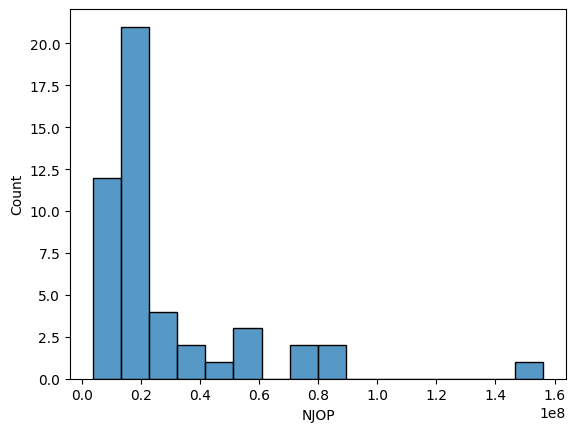

In [317]:
sns.histplot(data=df_outliers, x='NJOP')

## <h2> df_hadap </h2> ##

In [318]:
df_hadap = df.loc[df['hadap'].isna() == False, :]

In [319]:
df.drop(['hadap'], axis=1, inplace=True)

In [320]:
df_hadap.head()

created_at     LT     LB   KT   KM garasi carport sertifikat    listrik  \
0  2021-03-12   75.0   38.0  2.0  1.0    1.0     1.0        SHM       1300   
7  2021-06-12   97.0   72.0  3.0  2.0    0.0     1.0        SHM       2200   
10 2021-06-12  312.0   70.0  4.0  2.0    1.0     1.0        SHM       2200   
12 2021-06-12  112.0  129.0  3.0  3.0    0.0     0.0        HGB  3500-5500   
13 2021-06-12   60.0   50.0  2.0  1.0    0.0     0.0        SHM       2200   

      hadap  ...                                          deskripsi   asal  \
0     Barat  ...  dekat tol jati warna dekat sutle busway dekat ...  Bogor   
7   Selatan  ...  berada dalam kawasan pemda  hanya 5menit ke cc...  Bogor   
10    Timur  ...  dekat lapangan tenis dan mesjid 10 menit pintu...  Bogor   
12  Selatan  ...  cluster nashville ini dekat dengan beberapa fa...  Bogor   
13  Selatan  ...  0 km dari exit toll babakan madang 5 menit gor...  Bogor   

   kategori_harga       key_features minimalis strategis bebas_banjir  \
0          Sedang         tol, dekat         0         1            0   
7           Mahal         tol, menit         0         1            0   
10          Murah  tol, dekat, menit         0         1            0   
12          Mahal   dekat, fasilitas         0         1            0   
13         Sedang  tol, dekat, menit         0         1            0   

   pemandangan          NJOP  YYYY-mm  
0            0  6.128761e+06  2021-03  
7            0  7.278107e+06  2021-06  
10           0  6.544503e+05  2021-06  
12           0  7.468880e+06  2021-06  
13           0  7.727273e+06  2021-06  

[5 rows x 22 columns]

In [321]:
df_hadap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 3047
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      1176 non-null   datetime64[ns]
 1   LT              1176 non-null   float64       
 2   LB              1176 non-null   float64       
 3   KT              1176 non-null   category      
 4   KM              1176 non-null   category      
 5   garasi          1176 non-null   category      
 6   carport         1176 non-null   category      
 7   sertifikat      1176 non-null   category      
 8   listrik         1176 non-null   category      
 9   hadap           1176 non-null   object        
 10  harga           1176 non-null   int64         
 11  URL             1176 non-null   object        
 12  deskripsi       1176 non-null   object        
 13  asal            1176 non-null   category      
 14  kategori_harga  1176 non-null   category      
 15  key_

In [322]:
df_hadap.isna().sum()

created_at        0
LT                0
LB                0
KT                0
KM                0
garasi            0
carport           0
sertifikat        0
listrik           0
hadap             0
harga             0
URL               0
deskripsi         0
asal              0
kategori_harga    0
key_features      0
minimalis         0
strategis         0
bebas_banjir      0
pemandangan       0
NJOP              0
YYYY-mm           0
dtype: int64

## <h2> df_outliers_hadap </h2> ##

In [323]:
df_outliers_hadap = df_outliers.loc[df_outliers['hadap'].isna() == False, :]

In [324]:
df_outliers.drop(['hadap'], axis=1, inplace=True)

In [325]:
df_outliers_hadap.head()

LT      LB    KT    KM garasi carport sertifikat    listrik    hadap  \
2   525.0   720.0   8.0   9.0    2.0     4.0        SHM  3500-5500  Selatan   
4   424.0  1000.0   4.0   5.0    1.0     1.0        SHM    >= 6600    Timur   
8   700.0  2000.0  10.0  10.0    0.0    10.0        SHM    >= 6600    Utara   
15  120.0   240.0   3.0   3.0    0.0     3.0        SHM  3500-5500  Selatan   
16   98.0   126.0   4.0   4.0    2.0     2.0        SHM       2200    Timur   

           harga                                                URL  \
2    22000000000  https://www.brighton.co.id/cari-properti/view/...   
4    49500000000  https://www.rumah.com/listing-properti/dijual-...   
8   105000000000  https://www.rumah.com/listing-properti/dijual-...   
15   30000000000  https://www.rumah.com/listing-properti/dijual-...   
16   35000000000                    https://rumahdijual.com/9554796   

                                            deskripsi      asal  \
2   jual jl puri anjasmoro rumah mewah di lingkung...  Semarang   
4   rumah mewah berkonsep hotel bintang 5 interior...   Jakarta   
8    2 menit ke grand indonesia 500 meter 5 menit ...   Jakarta   
15  jalanan lebar dekat mall green sedayufull furnish   Jakarta   
16                       jalanan 225 mobil rumah baru   Jakarta   

             key_features minimalis strategis bebas_banjir pemandangan  \
2                    None         0         0            0           0   
4                    view         0         0            0           1   
8   menit, meter, bandara         0         1            0           0   
15             dekat, mal         0         1            0           0   
16                   None         0         0            0           0   

            NJOP  
2   1.767068e+07  
4   3.476124e+07  
8   3.888889e+07  
15  8.333333e+07  
16  1.562500e+08

In [326]:
df_outliers_hadap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2 to 45
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   LT            18 non-null     float64 
 1   LB            18 non-null     float64 
 2   KT            18 non-null     category
 3   KM            18 non-null     category
 4   garasi        18 non-null     category
 5   carport       18 non-null     category
 6   sertifikat    18 non-null     category
 7   listrik       18 non-null     category
 8   hadap         18 non-null     object  
 9   harga         18 non-null     int64   
 10  URL           18 non-null     object  
 11  deskripsi     18 non-null     object  
 12  asal          18 non-null     category
 13  key_features  18 non-null     object  
 14  minimalis     18 non-null     category
 15  strategis     18 non-null     category
 16  bebas_banjir  18 non-null     category
 17  pemandangan   18 non-null     category
 18  NJOP        

In [327]:
df_outliers_hadap.isna().sum()

LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
sertifikat      0
listrik         0
hadap           0
harga           0
URL             0
deskripsi       0
asal            0
key_features    0
minimalis       0
strategis       0
bebas_banjir    0
pemandangan     0
NJOP            0
dtype: int64

# <h1> Jawaban </h1> #

## <h2> 1. Kualitas data yang dimiliki perusahaan </h2> ##

Kualitas data yang dimiliki perusahaan masih buruk, karena beberapa alasan:
1. Dari segi jumlah data, jumlah data yang dikumpulkan untuk setiap wilayah itu berbeda-beda. Dampak dari hal ini adalah bisa terdapat kecenderungan bias untuk wilayah yang wilayah datanya relatif lebih sedikit dibandingkan wilayah yang jumlah datanya lebih banyak. Persebarannya pun dapat dilihat pada count plot serta tabel kontingensi (crosstab) yang dibuat.
2. Dari segi data yang sudah ada, nama dan jumlah kolom untuk setiap wilayah itu tidak terstandarisasi. Contohnya di wilayah tertentu, penamaan kolom dimulai dengan huruf kapital seperti Created_at, tetapi di mayoritas wilayah itu dimulai dengan huruf kecil seperti created_at, belum juga kasus di mana penulisan nama kolom seperti LT ada wilayah yang menuliskan LT, LT^2 LT (m2), dll. Untuk jumlah kolom di wilayah Bogor jumlah kolomnya juga lebih sendiri karena di suatu baris di kolom itu ada spasi kosong yang menyebabkan seharusnya kolom itu tidak ada tetapi menjadi ada dengan banyak missing values kecuali di baris itu.
3. Kurang nya standardisasi pengisian value untuk variabel yang sama untuk setiap sheet. Misalnya untuk variabel created_at format penulisan tanggal di beberapa sheet ada yang berbeda-beda, untuk penambahan data yang dilakukan oleh mahasiswa juga formatnya berbeda. Dampak dari masalah ini adalah pandas sering salah dalam membaca format tanggal untuk beberapa sheet, bahkan di 1 sheet spesifik di baris-baris tertentu, seperti harusnya 11 September 2023 menjadi 9 November 2023. Hal ini juga berlaku untuk variabel harga di mana di beberapa baris di beberapa sheet itu valuenya dalam satuan juta rupiah bukan dalam satuan rupiah biasa.
4. Masih banyaknya missing values, dan outliers.
5. Kurangnya variabel-variabel yang penting seperti status rumah apakah sudah terjual / belum, tanggal rumah sudah terjual, berapa banyak orang yang menyukai / mengklik / menyimpan tautan suatu rumah, status rumah apakah baru dibangun / direnovasi / rumah lama, keberadaan fasilitas umum di sekitar rumah, dll.

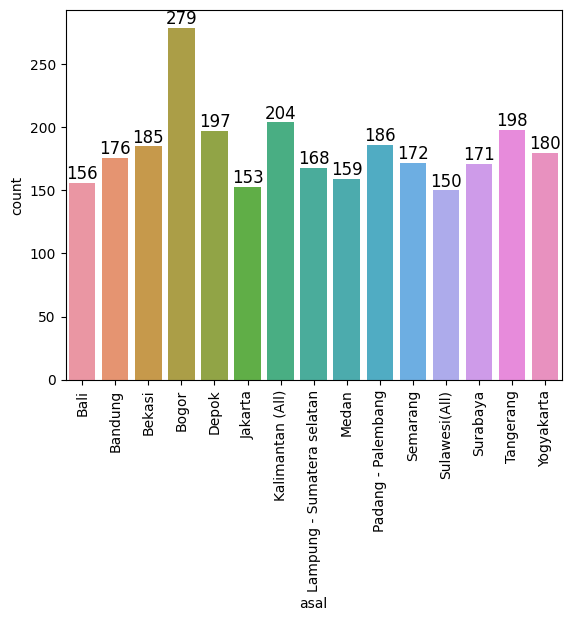

In [328]:
fig, ax = plt.subplots()
ax = sns.countplot(data=df, x='asal')

# Rotate xticks labels
plt.xticks(rotation=90)

# Display count values on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [329]:
pd.crosstab(df['asal'], df['kategori_harga'], rownames=['Asal'], colnames=['Kategori Harga'], margins=True)

Kategori Harga              Murah  Sedang  Mahal   All
Asal                                                  
Bali                           15      41    100   156
Bandung                        69      23     84   176
Bekasi                         35      74     76   185
Bogor                          79      91    109   279
Depok                          47      80     70   197
Jakarta                        14      24    115   153
Kalimantan (All)               60      47     97   204
Lampung - Sumatera selatan     74      53     41   168
Medan                          45      59     55   159
Padang - Palembang             32      61     93   186
Semarang                       42      48     82   172
Sulawesi(All)                  39      50     61   150
Surabaya                        5      34    132   171
Tangerang                      16      38    144   198
Yogyakarta                     20      57    103   180
All                           592     780   1362  2734

## <h2> 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul </h2> ##

Ini adalah saran perbaikan tentang data mentahan yang bisa DE/DBA nya lakukan:
1. Sebaiknya jumlah data yang dikumpulkan itu kurang lebih sama untuk setiap sheetnya, sehingga tidak ada sheet yang lebih sedikit/banyak daripada sheet lainnya secara signifikan
2. Sebaiknya sistem database bisa langsung membuat nama dan jumlah kolom untuk setiap sheet itu menjadi sama (atau setidaknya mengkonfirmasi dan memperingati DE/DBA nya apabila ada isu nama dan jumlah kolom setiap sheet berbeda). Pastikan juga tidak ada orang yang mengisi sheet dengan hanya keterangan seperti keterangan warna highlight di baris-baris bawah, dan keterangan-keterangan lainnya.
3. Sebaiknya pastikan value yang diisi ke setiap kolom itu sudah terstandarisasi, seperti apakah harus memasukkan angka saja atau memasukkan juga satuan nya seperti Watt / Rp / m^2, dll. Kemudian pastikan juga satuan untuk value yang numerik apakah satuannya dalam jutaan, puluhan, atau apa.
4. Sebaiknya variabel-variabel yang penting seperti status rumah apakah sudah terjual / belum, tanggal rumah sudah terjual, berapa banyak orang yang menyukai / mengklik / menyimpan tautan suatu rumah, status rumah apakah baru dibangun / direnovasi / rumah lama, keberadaan fasilitas umum di sekitar rumah, dll juga disediakan

## <h2> 3. Dari data yang ada, apakah ada kecenderungan rumah di suatu kota lebih mahal/murah dibandingkan kota lain? </h2> ##

<h3>
Merujuk ke visualisasi yang sudah dilakukan dapat diambil beberapa kesimpulan:
<ol type=1>
<li> Rumah di wilayah Surabaya dan Jakarta cenderung untuk lebih mahal dibandingkan kota-kota lainnya. Hal ini dapat dilihat dari nilai Q1, Q2 (median) dan Q3 pada boxplot-boxplot untuk kedua wilayah tersebut secara konstan berada di 2 tertinggi untuk mayoritas visualisasi boxplot yang sudah dilakukan di bagian "Boxplot" dengan pengecualian pada kasus untuk rumah dengan fitur mempunyai pemandangan, serta pada kasus untuk rumah dengan sertifikat HGB. Melihat standar deviasi untuk kedua wilayah tersebut yang juga merupakan 5 tertinggi dibandingkan wilayah-wilayah lainnya, hal ini berarti harga termahal pun juga berada di kedua wilayah tersebut. </li>
<li> Rumah di wilayah Lampung - Sumatra Selatan cenderung untuk lebih murah dibandingkan kota-kota lainnya. Hal ini dapat dilihat dari nilai Q1, Q2 (median) dan Q3 pada boxplot-boxplot untuk wilayah tersebut secara konstan berada di 2 terendah untuk mayoritas visualisasi boxplot yang sudah dilakukan di bagian "Boxplot". Melihat standar deviasi untuk wilayah tersebut yang juga merupakan 5 terendah dibandingkan wilayah-wilayah lainnya, hal ini berarti harga termahal dari wilayah itupun juga kurang lebih pasti lebih rendah dibandingkan harga-harga rumah di wilayah lainnya </li>
</ol>

Catatan:
<ol type=1>
<li> Mean tidak digunakan untuk membandingkan karena distribusi variabel harga untuk setiap wilayah itu right skewed (dapat dilihat pada bagian "Histplot") yang berarti nilai mean akan tertarik oleh outlier, sehingga nilai median dianggap lebih tidak tertarik oleh outlier dibandingkan nilai mean. </li>
<li> Bagian "Lineplot" tidak digunakan karena menurut kelompok kami visualisasi tersebut hanya menunjukkan tren rata-rata harga di setiap wilayah untuk setiap bulannya, yang berarti tidak representatif apabila mau membandingkan harga di setiap wilayah tanpa mempedulikan waktu. </li>
</ol>

Informasi Menarik:
<ol type=1>
<li> Rumah-rumah di Lampung - Sumatera Selatan difilter dari jenis sertifikatnya, terlihat bahwa rumah dengan sertifikat lainnya (PPJB, Girik, Adat, dll) memiliki median harga sebesar Rp 600 jutaaan. Harga tersebut cukup meningkat dengan besar dibandingkan median harga rumah Lampung untuk sertifikat lainnya hanya mencapai harga sebesar Rp 200 jutaan. Diperlukan analisis lebih lanjut apakah rumah-rumah di Lampung dengan sertifikat lainnya itu cukup "worth it" dalam artian bisa saja LB nya besar tetapi dijual dengan harga cukup murah dibandingkan harga-harga LB besar di kota lain karena sertifikatnya bukan HGB dan SHM. </li>
<li> Rumah di Sulawesi difilter dari keberadaan fiturnya, terlihat bahwa rumah dengan fitur memiliki pemandangan memiliki median harga yang paling mendekati Rp 250 juta. Harga tersebut cukup meningkat dengan besar dibandingkan median harga rumah Sulawesi untuk fitur-fitur lainnya yang lebih kurang dari Rp 250 juta. Artinya rumah di Sulawesi memiliki kecenderungan untuk menjadi pilihan rumah yang menarik apabila RPPI ingin berinvestasi lebih pada sektor perumahan yang mengedepankan keasrian dan pemandangan alam => bagus untuk orang-orang yang sudah pensiun / orang berpenghasilan lebih yang ingin hidup tenang karena biasanya mereka mencari rumah yang jauh dari hiruk pikuk perkotaan yang berarti mereka bisa saja mencari rumah yang mempromosikan keasrian dan pemandangan alam. </li>
</ol>
</h3>

### <h2> Lineplot </h2> ###

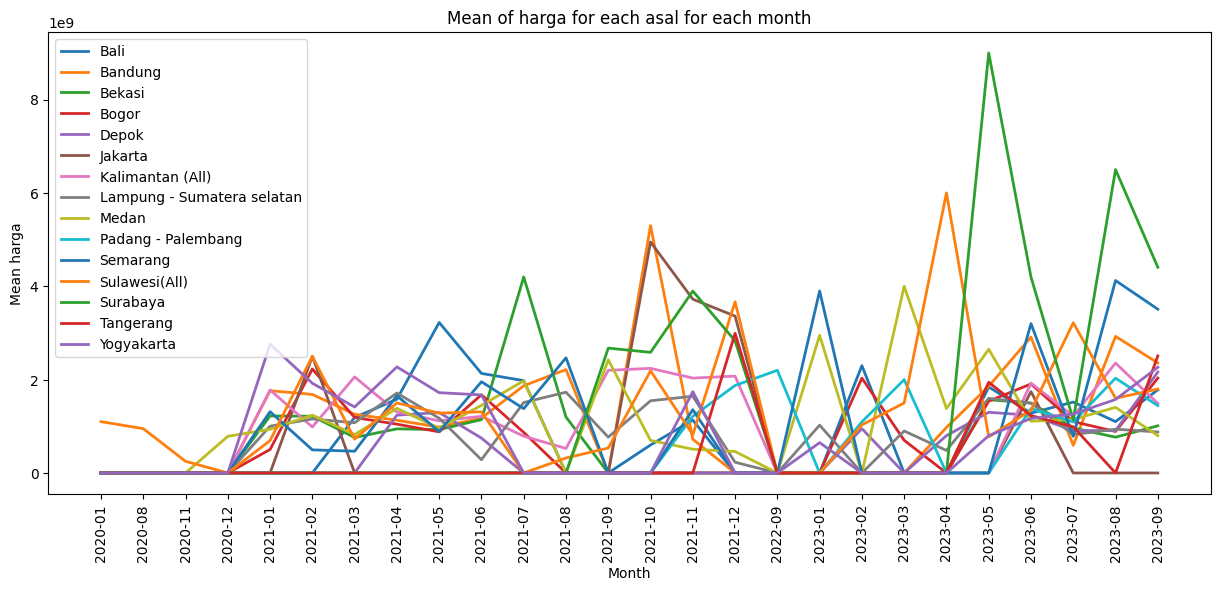

In [330]:
# Group by 'YYYY-mm' and 'asal', then calculate the mean of 'harga'
grouped_df = df.groupby(['YYYY-mm', 'asal'])['harga'].mean().reset_index()

# Pivot the data so that 'asal' values become columns and fill NaN values with 0
pivot_df = grouped_df.pivot(index='YYYY-mm', columns='asal', values='harga').fillna(0)

# Plot the data
plt.figure(figsize=(15,6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='', linewidth=2, label=column)

plt.legend(loc='best')
plt.xticks(rotation=90)
plt.title('Mean of harga for each asal for each month')
plt.xlabel('Month')
plt.ylabel('Mean harga')
plt.show()

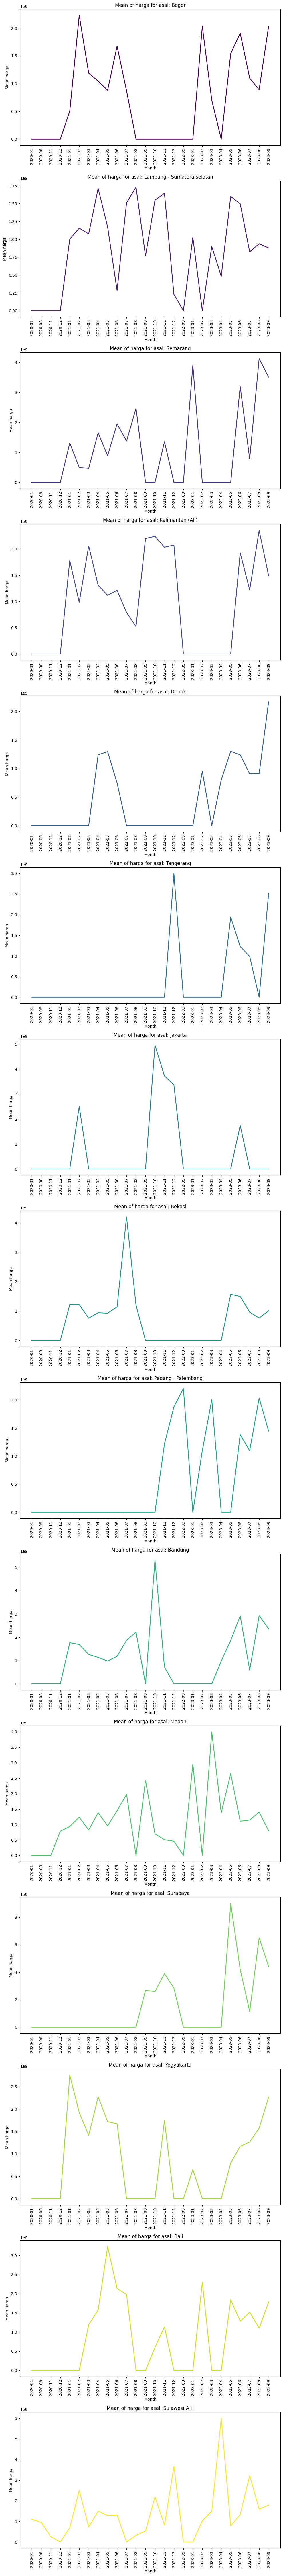

In [331]:
# Get the list of unique 'asal' values
asal_values = df['asal'].unique()

# Create a colormap with as many colors as there are unique 'asal' values
cmap = plt.get_cmap('viridis', len(asal_values))

# Create a subplot for each 'asal'
fig, axs = plt.subplots(len(asal_values), 1, figsize=(10, 6*len(asal_values)))

for i, asal in enumerate(asal_values):
    # Select data for this 'asal'
    data = pivot_df[asal]

    # Plot the data with a unique color
    axs[i].plot(data.index, data, marker='', linewidth=2, color=cmap(i), label=asal)

    # Set the title and labels
    axs[i].set_title('Mean of harga for asal: ' + asal)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Mean harga')

    # Rotate xticks to 90 degrees
    axs[i].tick_params(axis='x', rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

### <h2> Histplot </h2> ###

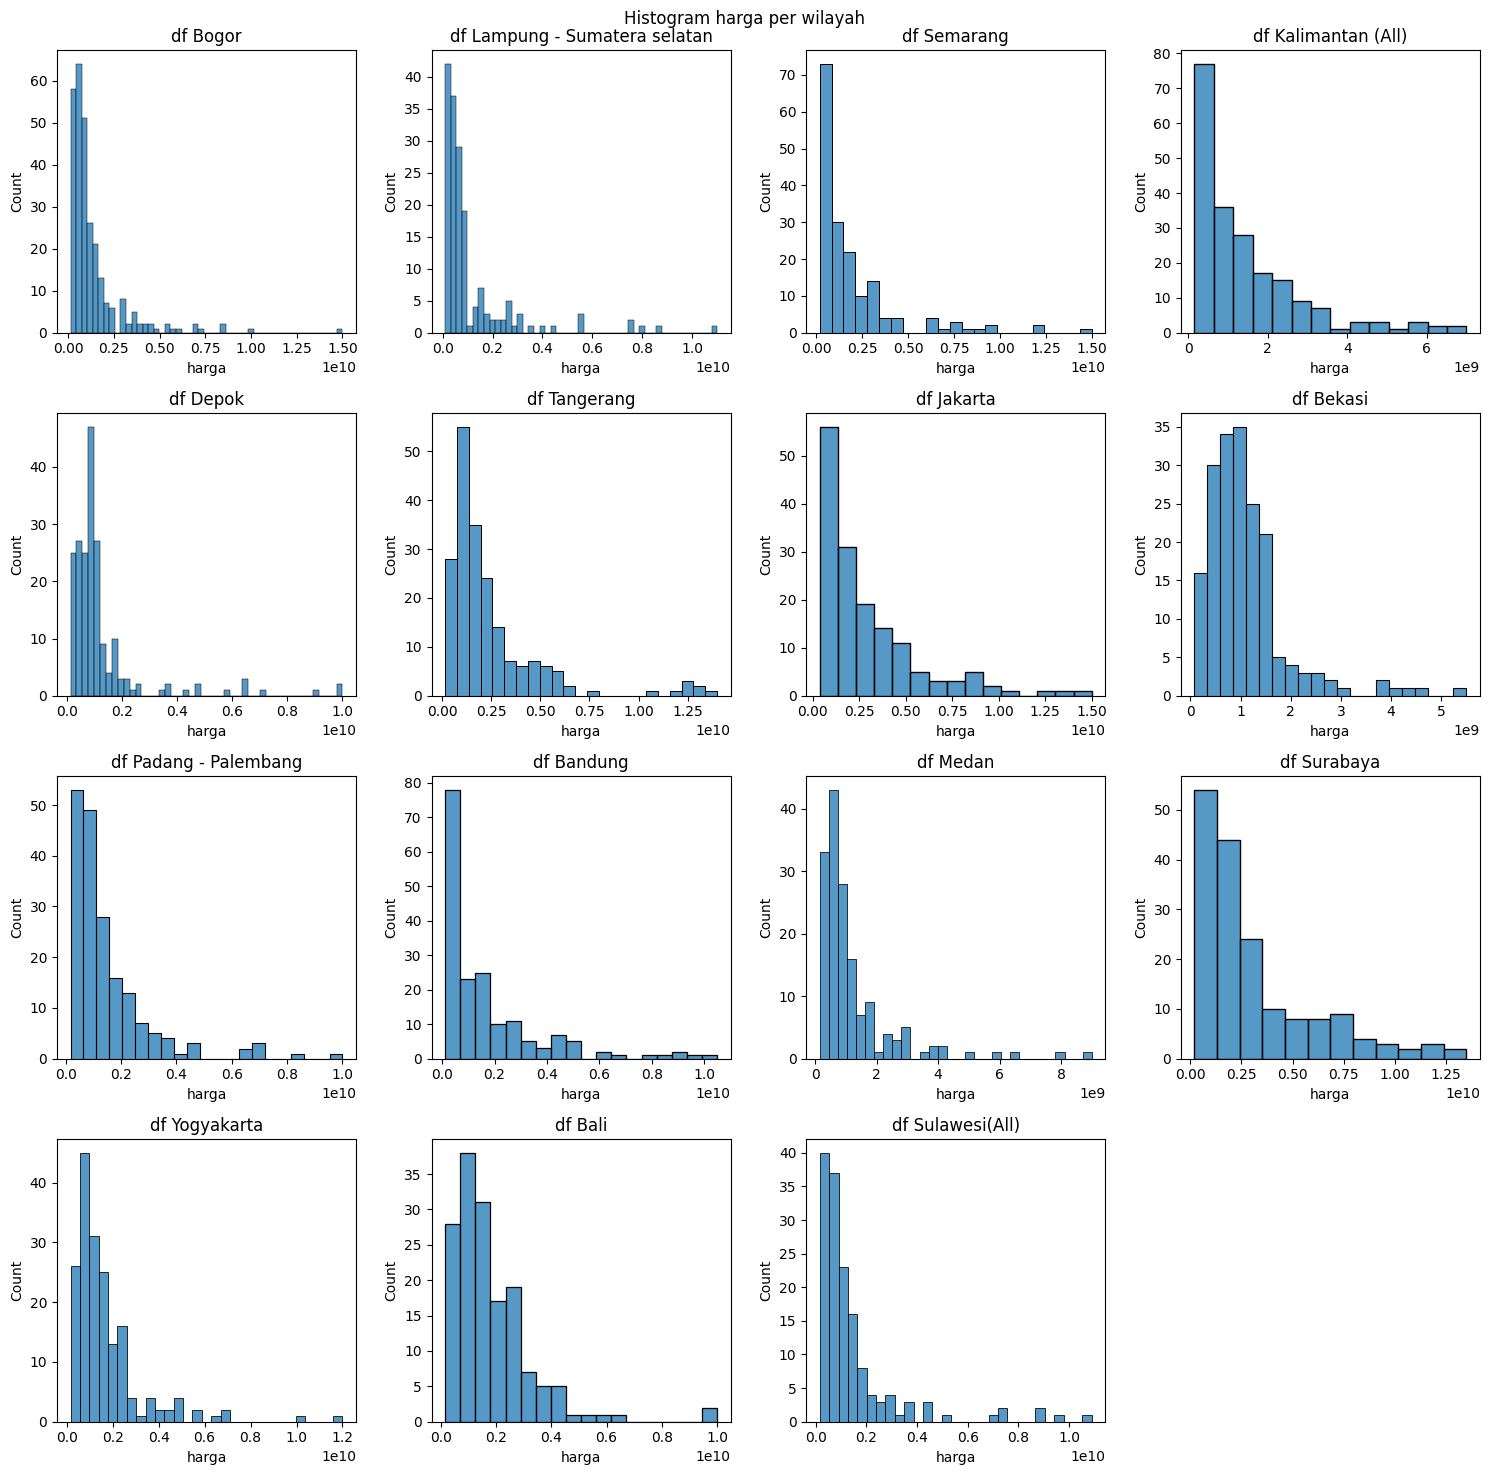

In [332]:
title = "Histogram harga per wilayah"
histplot_each_asal(df, title)

### <h2> Boxplot </h2> ###

<h3> Referensi: <a href=https://www.simplypsychology.org/boxplots.html> https://www.simplypsychology.org/boxplots.html </a> </h3>

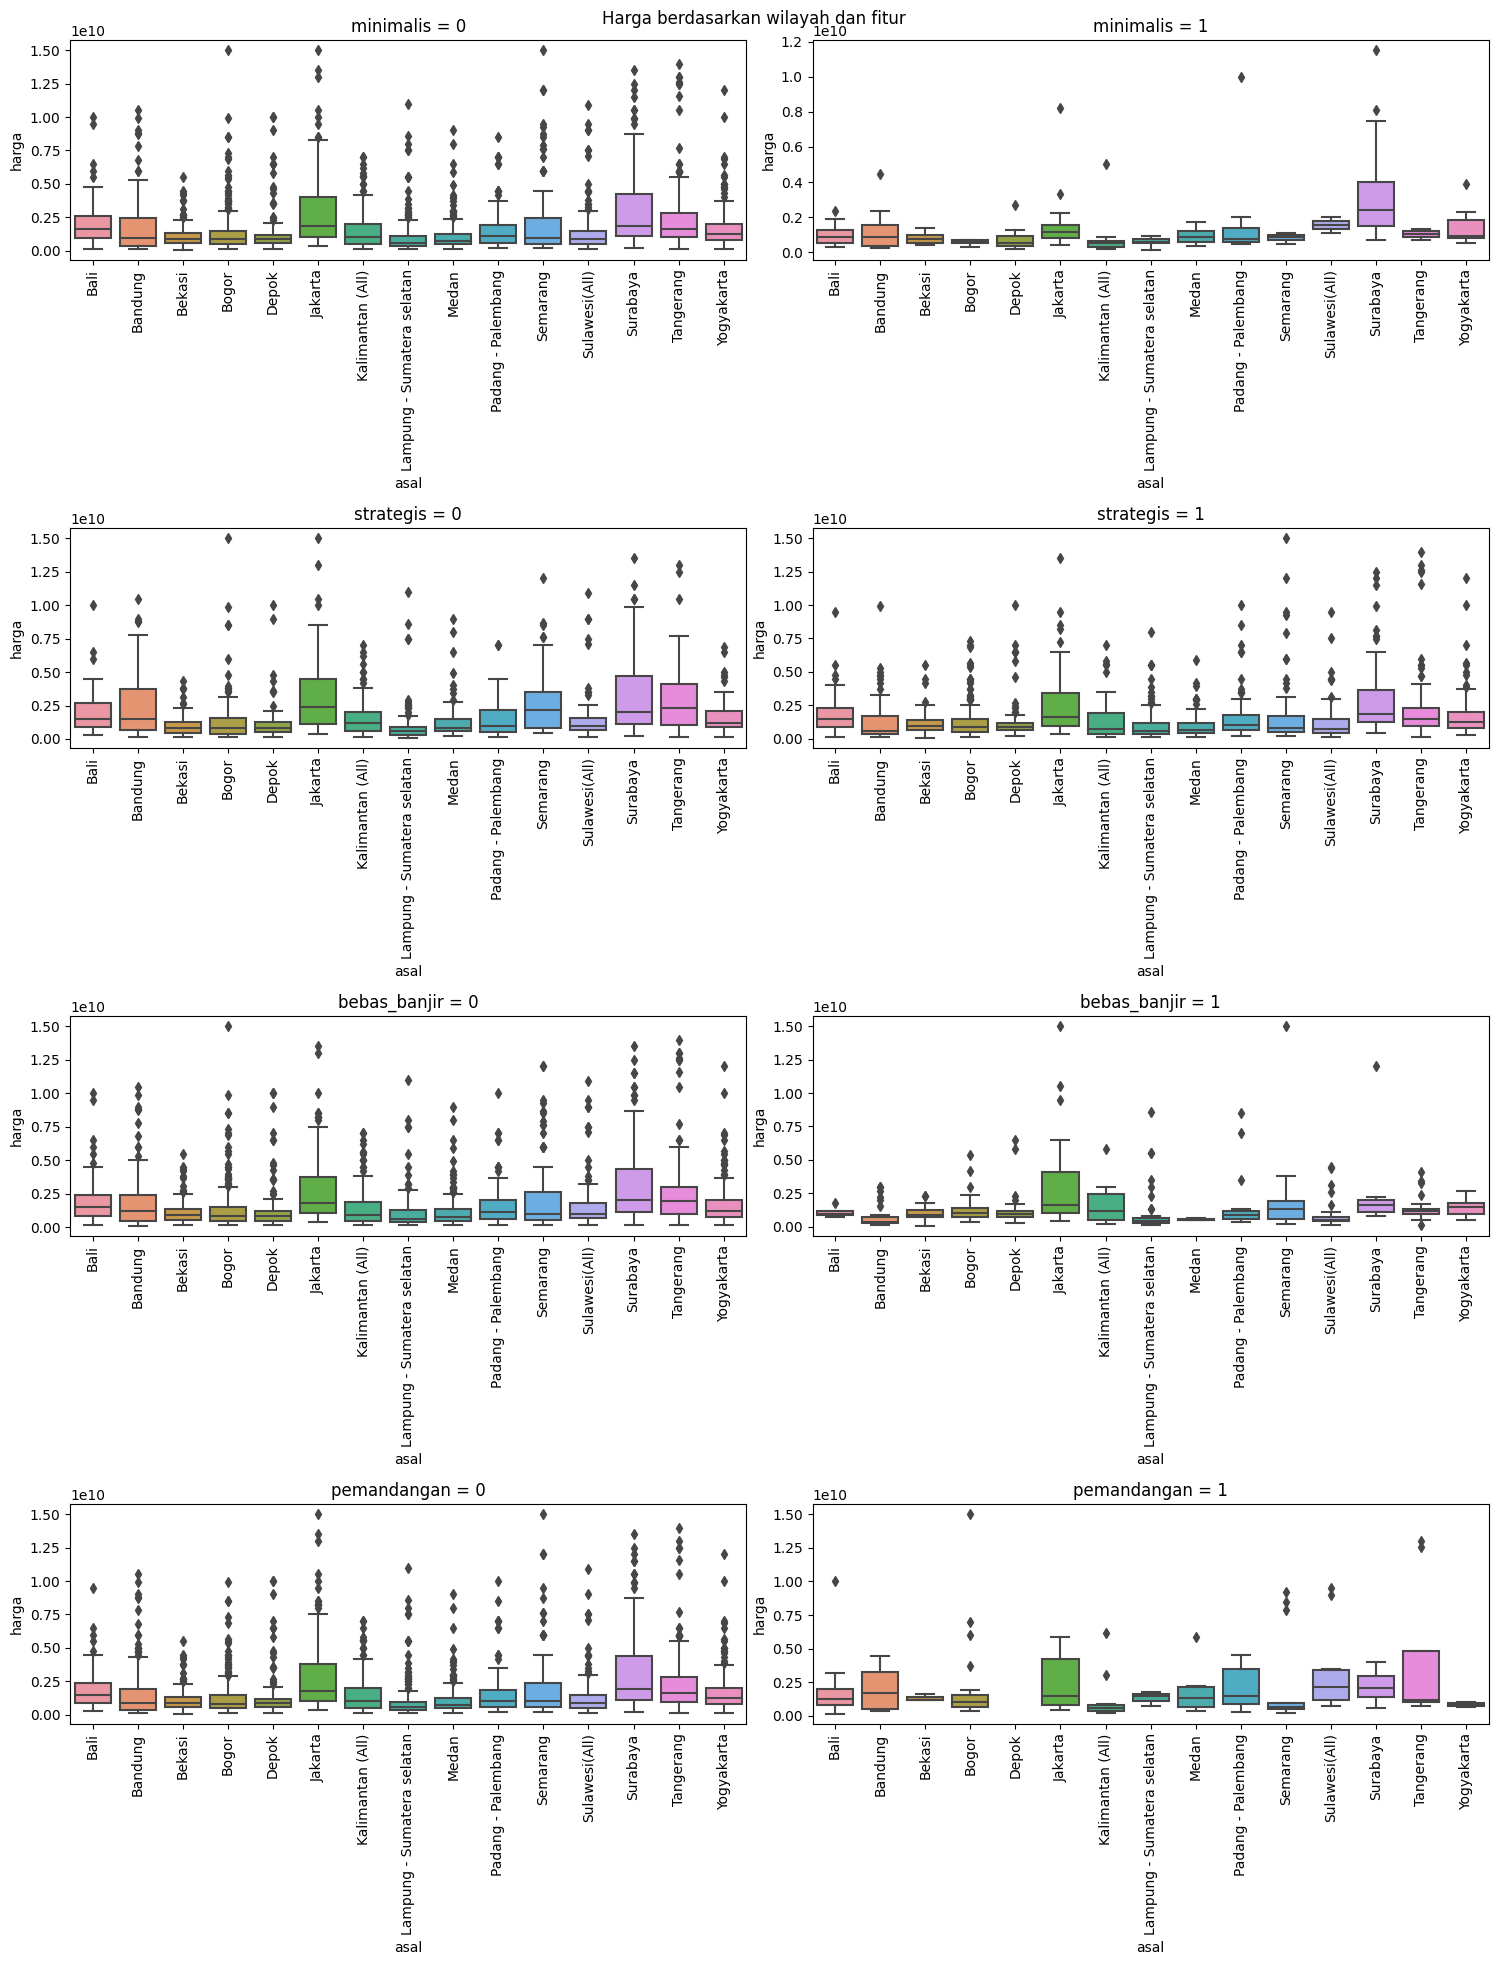

In [333]:
cat_var = ['minimalis', 'strategis', 'bebas_banjir', 'pemandangan']
title = "Harga berdasarkan wilayah dan fitur"
boxplot_each_var(df, cat_var, title)

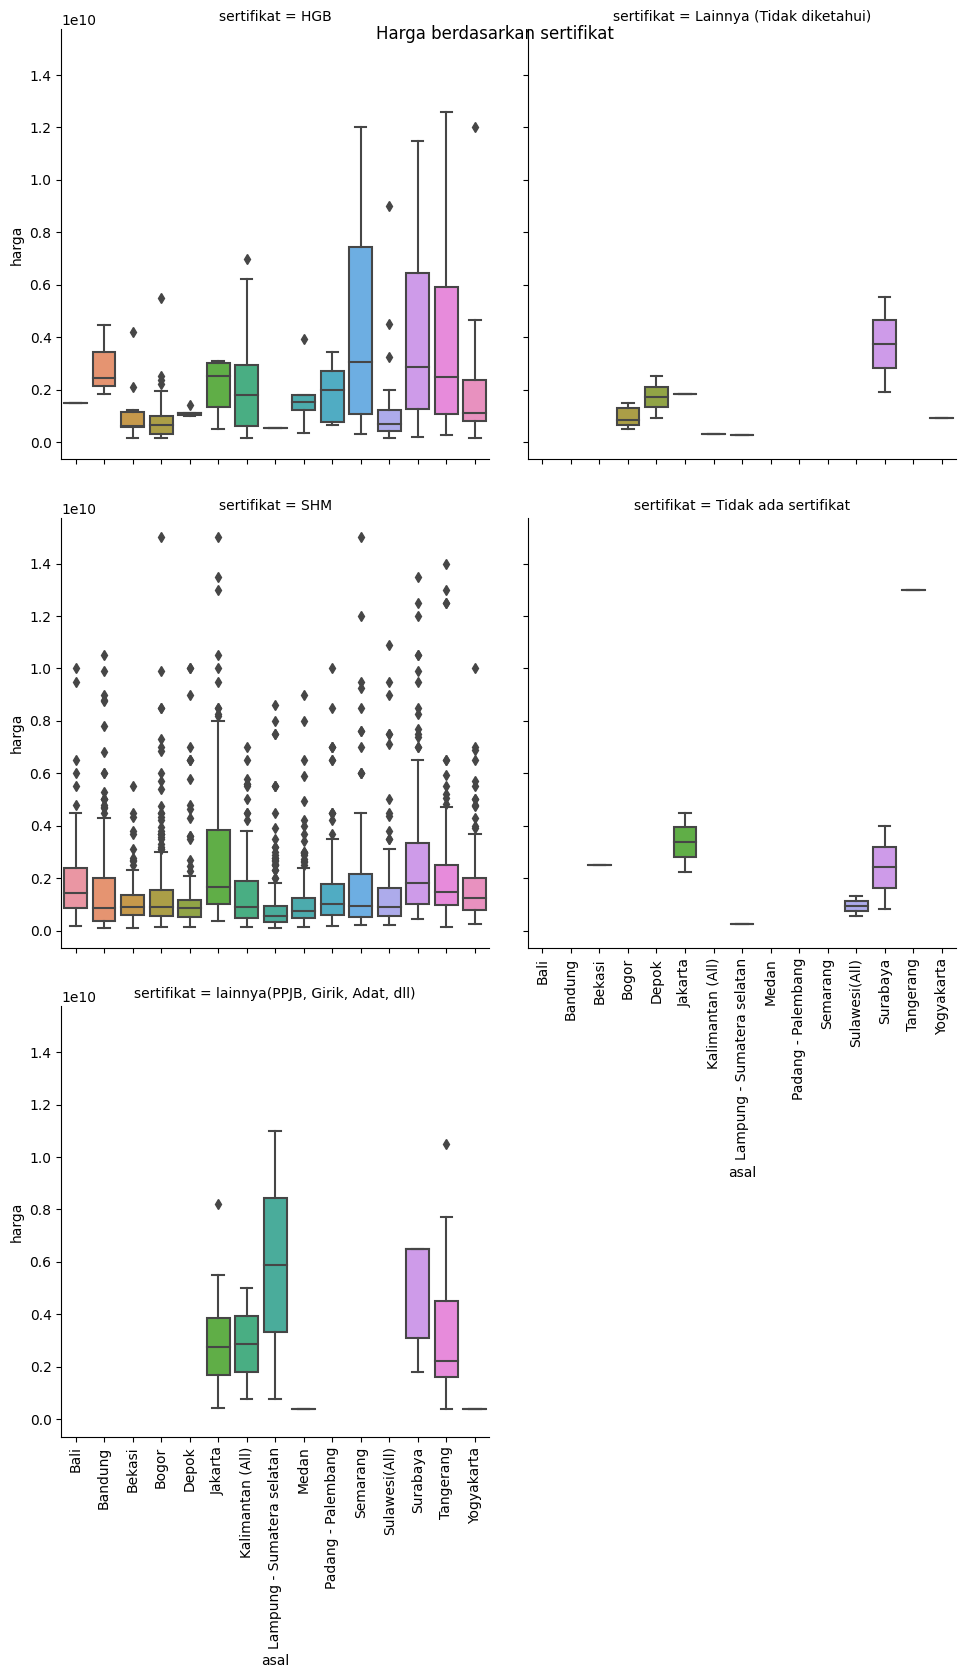

In [334]:
title = "Harga berdasarkan sertifikat"

ax = sns.catplot(data=df, x='asal', y='harga', col='sertifikat', kind='box', col_wrap=2)
for axes in ax.axes.flat:
    axes.tick_params(axis='x', rotation=90)

ax.fig.suptitle(title)
plt.show()

<ipython-input-335-b6f88e198945>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sertifikat'] = filtered_df['sertifikat'].cat.remove_unused_categories()


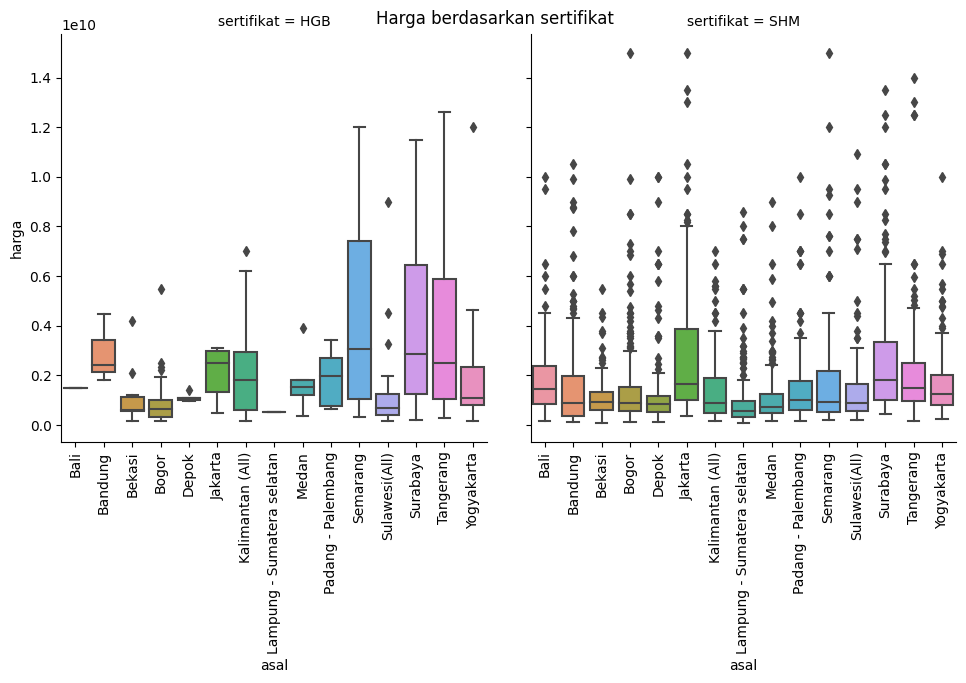

In [335]:
title = "Harga berdasarkan sertifikat"

filtered_df = df[df['sertifikat'].isin(['SHM', 'HGB'])]
filtered_df['sertifikat'] = filtered_df['sertifikat'].cat.remove_unused_categories()

g = sns.catplot(data=filtered_df, x='asal', y='harga', col='sertifikat', kind='box')

# Rotate x-axis labels for all subplots
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=90)

g.fig.suptitle(title)
plt.show()

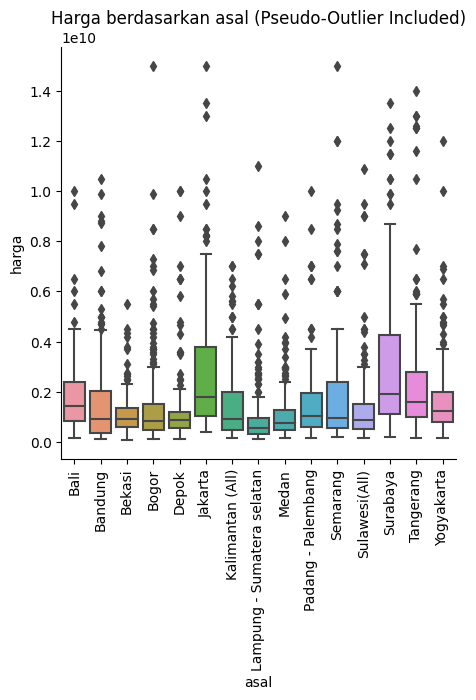

In [336]:
title = "Harga berdasarkan asal (Pseudo-Outlier Included)"

ax = sns.catplot(data=df, x='asal', y='harga', kind='box')
plt.xticks(rotation=90)

plt.title(title)
plt.show()

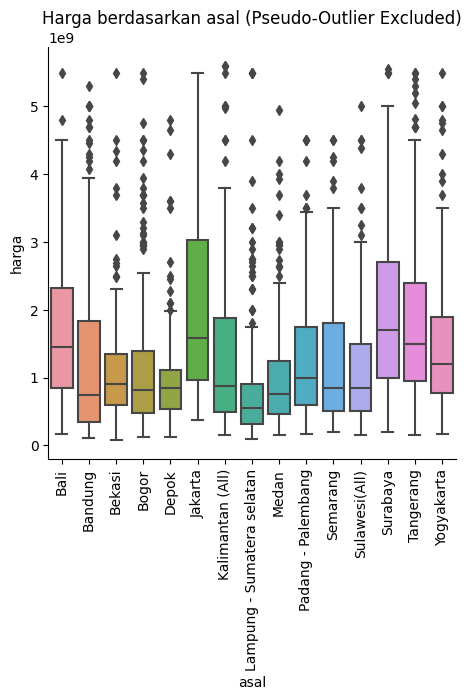

In [337]:
title = "Harga berdasarkan asal (Pseudo-Outlier Excluded)"

ax = sns.catplot(data=df[np.abs(df.harga - df.harga.mean())<=(2*df.harga.std())], x='asal', y='harga', kind='box')
plt.xticks(rotation=90)

plt.title(title)
plt.show()

In [338]:
df.groupby('asal')['harga'].agg(['mean', 'median', 'std']).sort_values(by='median', ascending=False)

mean        median           std
asal                                                                
Surabaya                    3.157904e+09  1.900000e+09  2.879032e+09
Jakarta                     2.869696e+09  1.800000e+09  2.732414e+09
Tangerang                   2.461758e+09  1.595000e+09  2.549834e+09
Bali                        1.813616e+09  1.450000e+09  1.479526e+09
Yogyakarta                  1.711841e+09  1.225000e+09  1.626132e+09
Padang - Palembang          1.517597e+09  1.025000e+09  1.529061e+09
Semarang                    1.941412e+09  9.600000e+08  2.413610e+09
Kalimantan (All)            1.451143e+09  9.300000e+08  1.429169e+09
Bandung                     1.674836e+09  9.200000e+08  2.000536e+09
Bekasi                      1.101476e+09  9.100000e+08  8.272720e+08
Depok                       1.254142e+09  8.750000e+08  1.546772e+09
Sulawesi(All)               1.502976e+09  8.725000e+08  1.866072e+09
Bogor                       1.363565e+09  8.272000e+08  1.671491e+09
Medan                       1.214881e+09  7.500000e+08  1.340849e+09
Lampung - Sumatera selatan  1.139167e+09  5.525000e+08  1.667466e+09

In [339]:
df[np.abs(df.harga - df.harga.mean())<=(2*df.harga.std())].groupby('asal')['harga'].agg(['mean', 'median', 'std']).sort_values(by='median', ascending=False)

mean        median           std
asal                                                                
Surabaya                    1.992511e+09  1.700000e+09  1.268835e+09
Jakarta                     2.057374e+09  1.590000e+09  1.406272e+09
Tangerang                   1.853725e+09  1.495000e+09  1.256271e+09
Bali                        1.650816e+09  1.450000e+09  1.060053e+09
Yogyakarta                  1.494433e+09  1.200000e+09  1.066714e+09
Padang - Palembang          1.283648e+09  9.900000e+08  9.546275e+08
Bekasi                      1.101476e+09  9.100000e+08  8.272720e+08
Kalimantan (All)            1.324287e+09  8.750000e+08  1.195309e+09
Depok                       9.828889e+08  8.510000e+08  7.502108e+08
Semarang                    1.304923e+09  8.500000e+08  1.042123e+09
Sulawesi(All)               1.153471e+09  8.500000e+08  9.694675e+08
Bogor                       1.132165e+09  8.107000e+08  9.909418e+08
Medan                       1.056555e+09  7.500000e+08  8.960603e+08
Bandung                     1.324737e+09  7.450000e+08  1.296027e+09
Lampung - Sumatera selatan  9.127607e+08  5.500000e+08  1.039608e+09

## <h2> 4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data) </h2> ##

<h3>
Merujuk ke visualisasi yang sudah dilakukan dapat diambil beberapa kesimpulan:

<ol type=1>
<li> Buka cabang di kota **Bogor** dengan penjualan terbanyak. Pertimbangan ini karena penjualannya sudah banyak yang artinya “sistem operasi nya” sudah berjalan dengan baik. Daerah tersebut berarti memiliki prospek yang baik sehingga perlu fokus di situ.
</li>
<li> Buka cabang di kota **Jakarta** dengan penjualan paling sedikit. Pertimbangan ini karena mungkin sebenarnya potensi penjualan di kota tersebut bagus seperti harga murah, bangunan besar, dll. Namun, penjualan sedikit mungkin karena kurang “terpantau” sehingga perlu diperhatikan secara intensif. Oleh karena itu, perlu dibuka cabang di daerah itu. </li>
</ol>

</h3>

<Axes: xlabel='asal', ylabel='Count'>

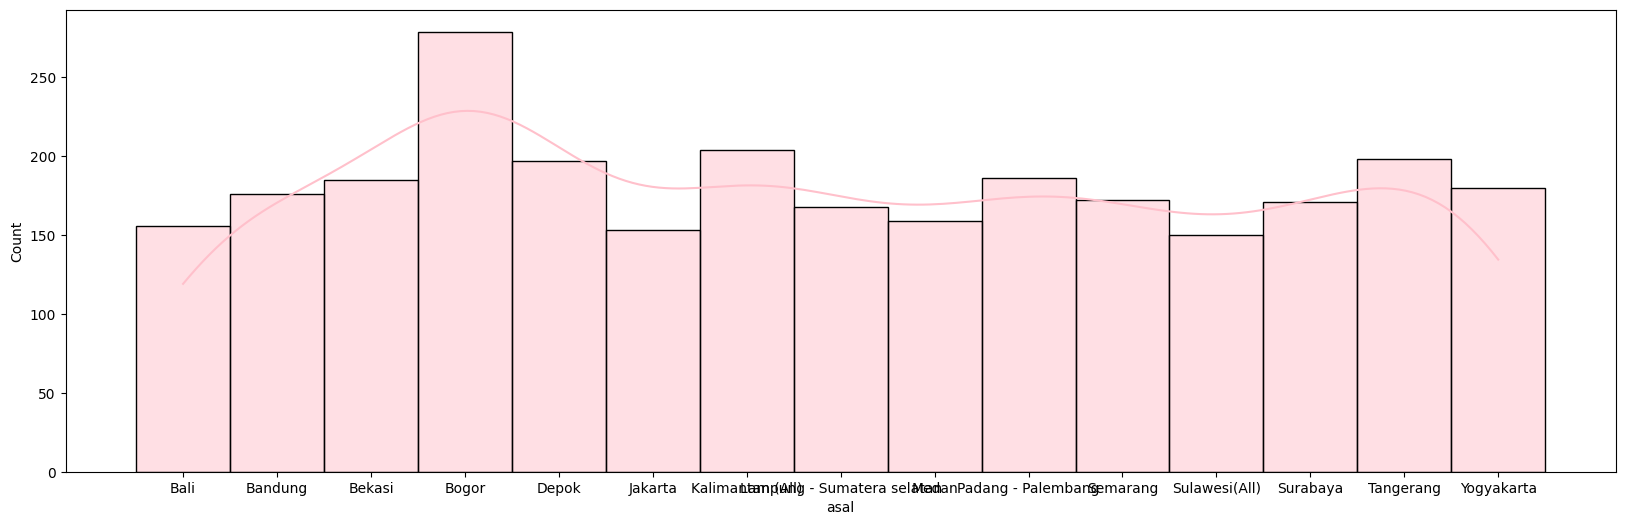

In [340]:
## Berdasarkan penjualan tiap wilayah
fig = plt.subplots(1,1, figsize=(20,6))
sns.histplot(data=df, x="asal", kde=True, color="pink")

1. Penjualan terbanyak : Bogor
2. Penjualan paling sedikit : Jakarta

## <h2> 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual? </h2> ##

<h3> Merujuk ke visualisasi yang sudah dilakukan dapat diambil kesimpulan:
<ol type=1>

<li> <b>Rumah yang paling banyak di jual</b> adalah rumah dengan karakteristik yang memiliki Luas Tanah '72.0' , Luas Bangunan '45.0' , Jumlah Kamar Tidur '2' , Jumlah Kamar Mandi '2' , Carport '1', Daya Listrik '2200' , lokasi strategis, dan sertifikat jenis 'SHM' </li>

<li> <b>Pada rumah yang memiliki informasi menghadap ke mana</b>, rumah yang menghadap ke 'Timur' yang paling banyak dijual </li>

</ol>

</h3>

In [341]:
attributes = ['LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'listrik',
              'minimalis', 'strategis', 'pemandangan', 'bebas_banjir',
              'sertifikat']

for attribute in attributes:
    attribute_terbanyak = df[attribute].value_counts().idxmax()
    jumlah_attribute = df[attribute].value_counts().max()
    print(f"Atribut {attribute} rumah yang paling banyak dijual adalah '{attribute_terbanyak}' sebanyak {jumlah_attribute} kali.")

Atribut LT rumah yang paling banyak dijual adalah '72.0' sebanyak 141 kali.
Atribut LB rumah yang paling banyak dijual adalah '45.0' sebanyak 141 kali.
Atribut KT rumah yang paling banyak dijual adalah '2.0' sebanyak 953 kali.
Atribut KM rumah yang paling banyak dijual adalah '2.0' sebanyak 951 kali.
Atribut garasi rumah yang paling banyak dijual adalah '0.0' sebanyak 1871 kali.
Atribut carport rumah yang paling banyak dijual adalah '1.0' sebanyak 1525 kali.
Atribut listrik rumah yang paling banyak dijual adalah '2200' sebanyak 974 kali.
Atribut minimalis rumah yang paling banyak dijual adalah '0' sebanyak 2562 kali.
Atribut strategis rumah yang paling banyak dijual adalah '1' sebanyak 1698 kali.
Atribut pemandangan rumah yang paling banyak dijual adalah '0' sebanyak 2592 kali.
Atribut bebas_banjir rumah yang paling banyak dijual adalah '0' sebanyak 2333 kali.
Atribut sertifikat rumah yang paling banyak dijual adalah 'SHM' sebanyak 2459 kali.


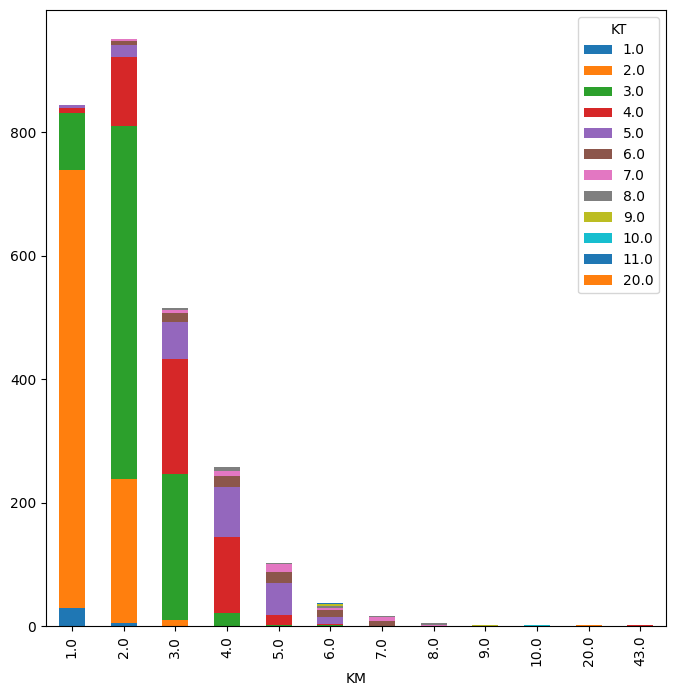

In [342]:
#Plot jumlah rumah dilihat dari jumlah Kamar Mandi dan Kamar Tidur
Kamar = pd.crosstab(index=df["KM"], columns=df["KT"])
plot1 = Kamar.plot(kind="bar", figsize=(8,8), stacked=True)

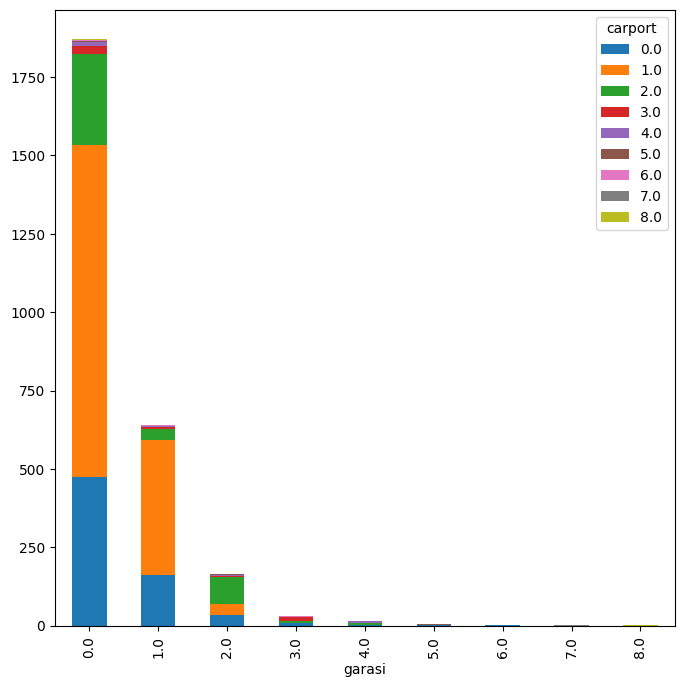

In [343]:
#Plot jumlah rumah dilihat dari jumlah Garasi dan Carport
Garasi = pd.crosstab(index=df["garasi"], columns=df["carport"])
plot2 = Garasi.plot(kind="bar", figsize=(8,8), stacked=True)

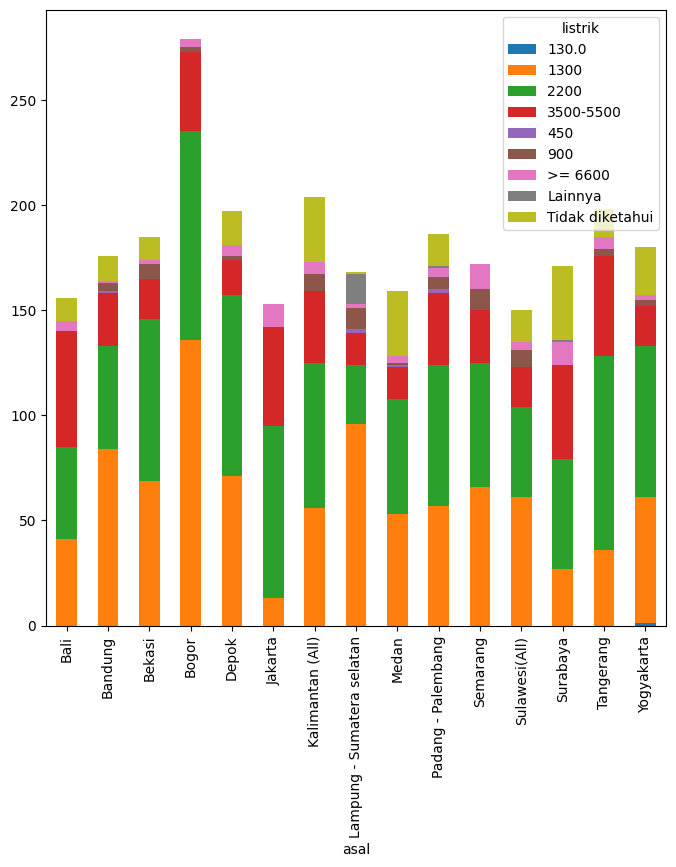

In [344]:
#Plot jumlah rumah dilihat dari Daya Listrik di berbagai daerah
Listrik = pd.crosstab(index=df["asal"], columns=df["listrik"])
plot3 = Listrik.plot(kind="bar", figsize=(8,8), stacked=True)

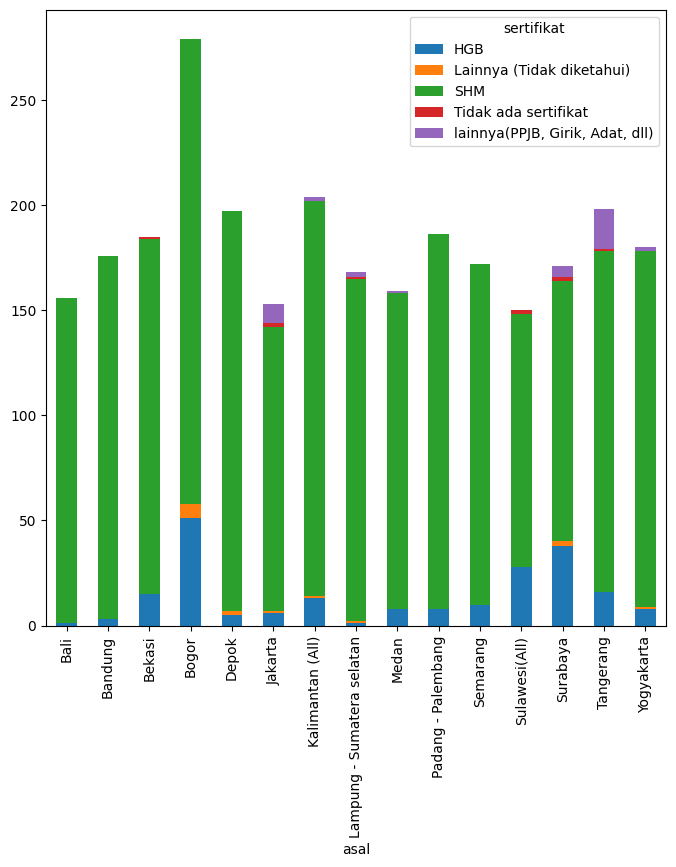

In [345]:
#Plot jumlah rumah dilihat dari Jenis Sertifikat berbagai daerah
Sertifikat = pd.crosstab(index=df["asal"], columns=df["sertifikat"])
plot4 = Sertifikat.plot(kind="bar", figsize=(8,8), stacked=True)

In [346]:
attributes = ['LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'listrik',
              'minimalis', 'strategis', 'pemandangan', 'bebas_banjir',
              'sertifikat', 'hadap']

for attribute in attributes:
    attribute_terbanyak = df_hadap[attribute].value_counts().idxmax()
    jumlah_attribute = df_hadap[attribute].value_counts().max()
    print(f"Atribut {attribute} rumah yang paling banyak dijual adalah '{attribute_terbanyak}' sebanyak {jumlah_attribute} kali.")

Atribut LT rumah yang paling banyak dijual adalah '72.0' sebanyak 73 kali.
Atribut LB rumah yang paling banyak dijual adalah '45.0' sebanyak 49 kali.
Atribut KT rumah yang paling banyak dijual adalah '3.0' sebanyak 415 kali.
Atribut KM rumah yang paling banyak dijual adalah '2.0' sebanyak 411 kali.
Atribut garasi rumah yang paling banyak dijual adalah '0.0' sebanyak 718 kali.
Atribut carport rumah yang paling banyak dijual adalah '1.0' sebanyak 705 kali.
Atribut listrik rumah yang paling banyak dijual adalah '2200' sebanyak 424 kali.
Atribut minimalis rumah yang paling banyak dijual adalah '0' sebanyak 1087 kali.
Atribut strategis rumah yang paling banyak dijual adalah '1' sebanyak 729 kali.
Atribut pemandangan rumah yang paling banyak dijual adalah '0' sebanyak 1117 kali.
Atribut bebas_banjir rumah yang paling banyak dijual adalah '0' sebanyak 983 kali.
Atribut sertifikat rumah yang paling banyak dijual adalah 'SHM' sebanyak 1048 kali.
Atribut hadap rumah yang paling banyak dijual ada

Rumah Dapat dibagi juga berdasarkan

a. Berdasarkan Fasilitas


<Axes: xlabel='listrik', ylabel='Count'>

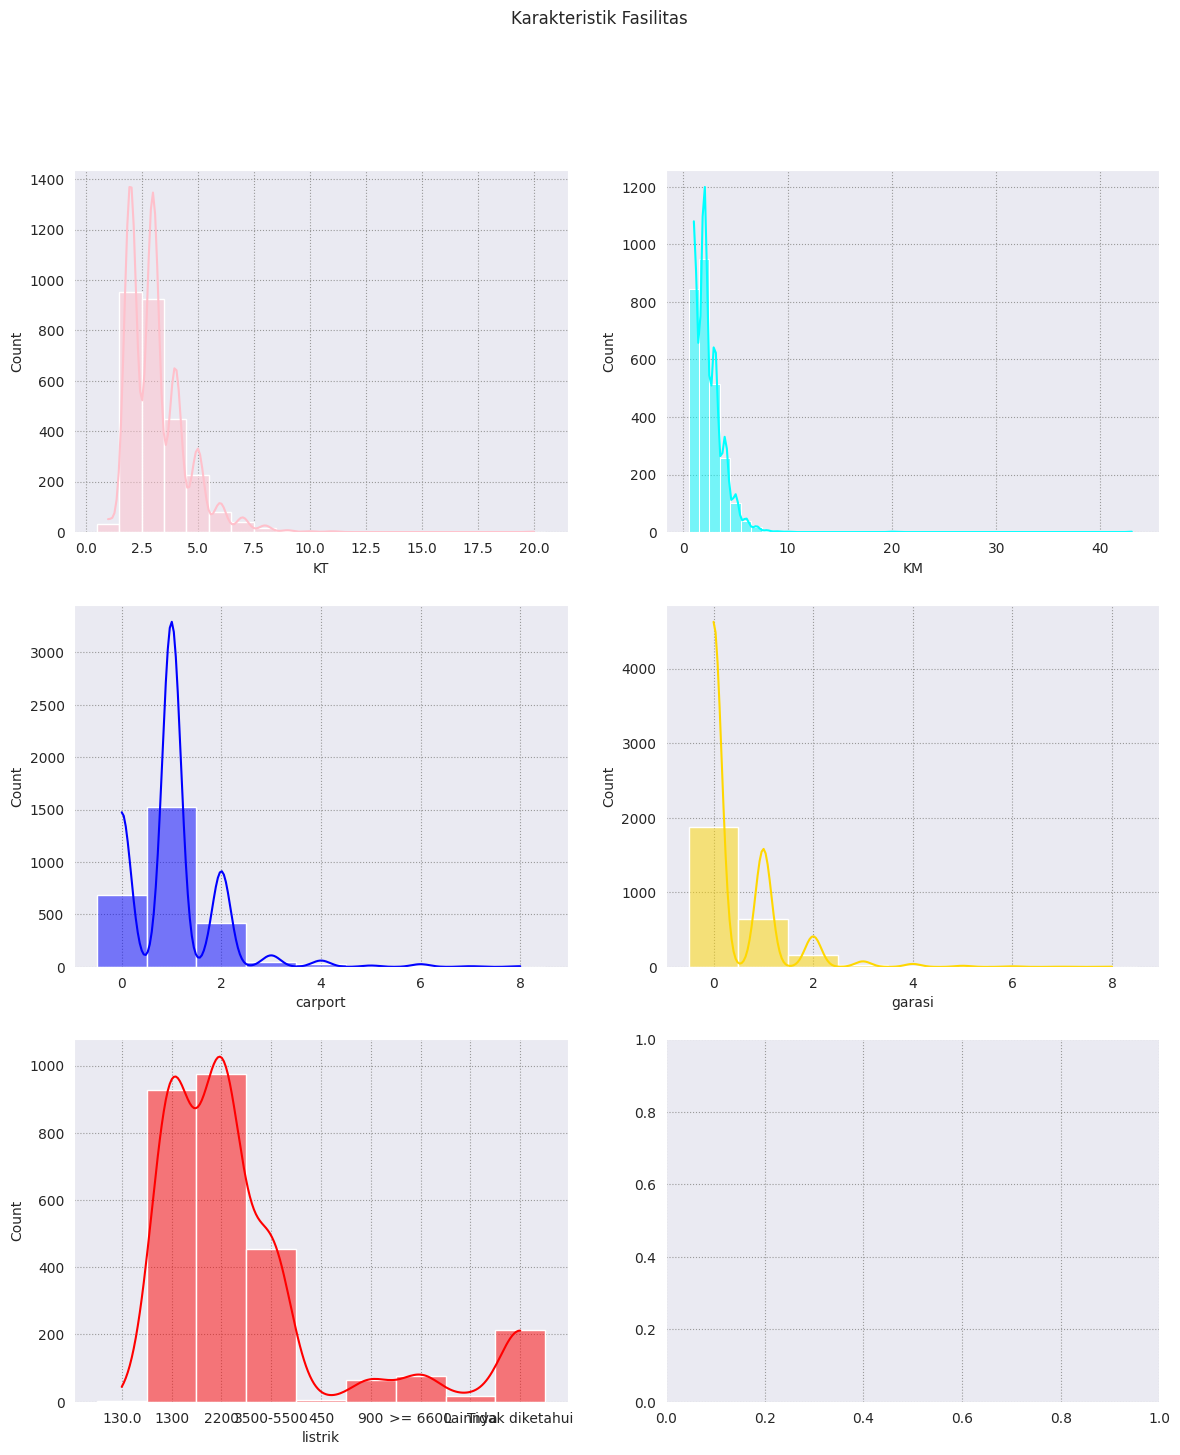

In [347]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig,axs = plt.subplots(3,2, figsize = (14,16))
fig.suptitle('Karakteristik Fasilitas')
sns.histplot(data=df, x="KT", kde=True, color="pink", ax = axs[0, 0])
sns.histplot(data=df, x="KM", kde=True, color="cyan", ax = axs[0, 1])
sns.histplot(data=df, x="carport", kde=True, color="blue", ax = axs[1, 0])
sns.histplot(data=df, x="garasi", kde=True, color="gold", ax = axs[1, 1])
sns.histplot(data=df, x="listrik", kde=True, color="red", ax = axs[2, 0])

b. Berdasarkan Luas

<Axes: xlabel='LB', ylabel='Count'>

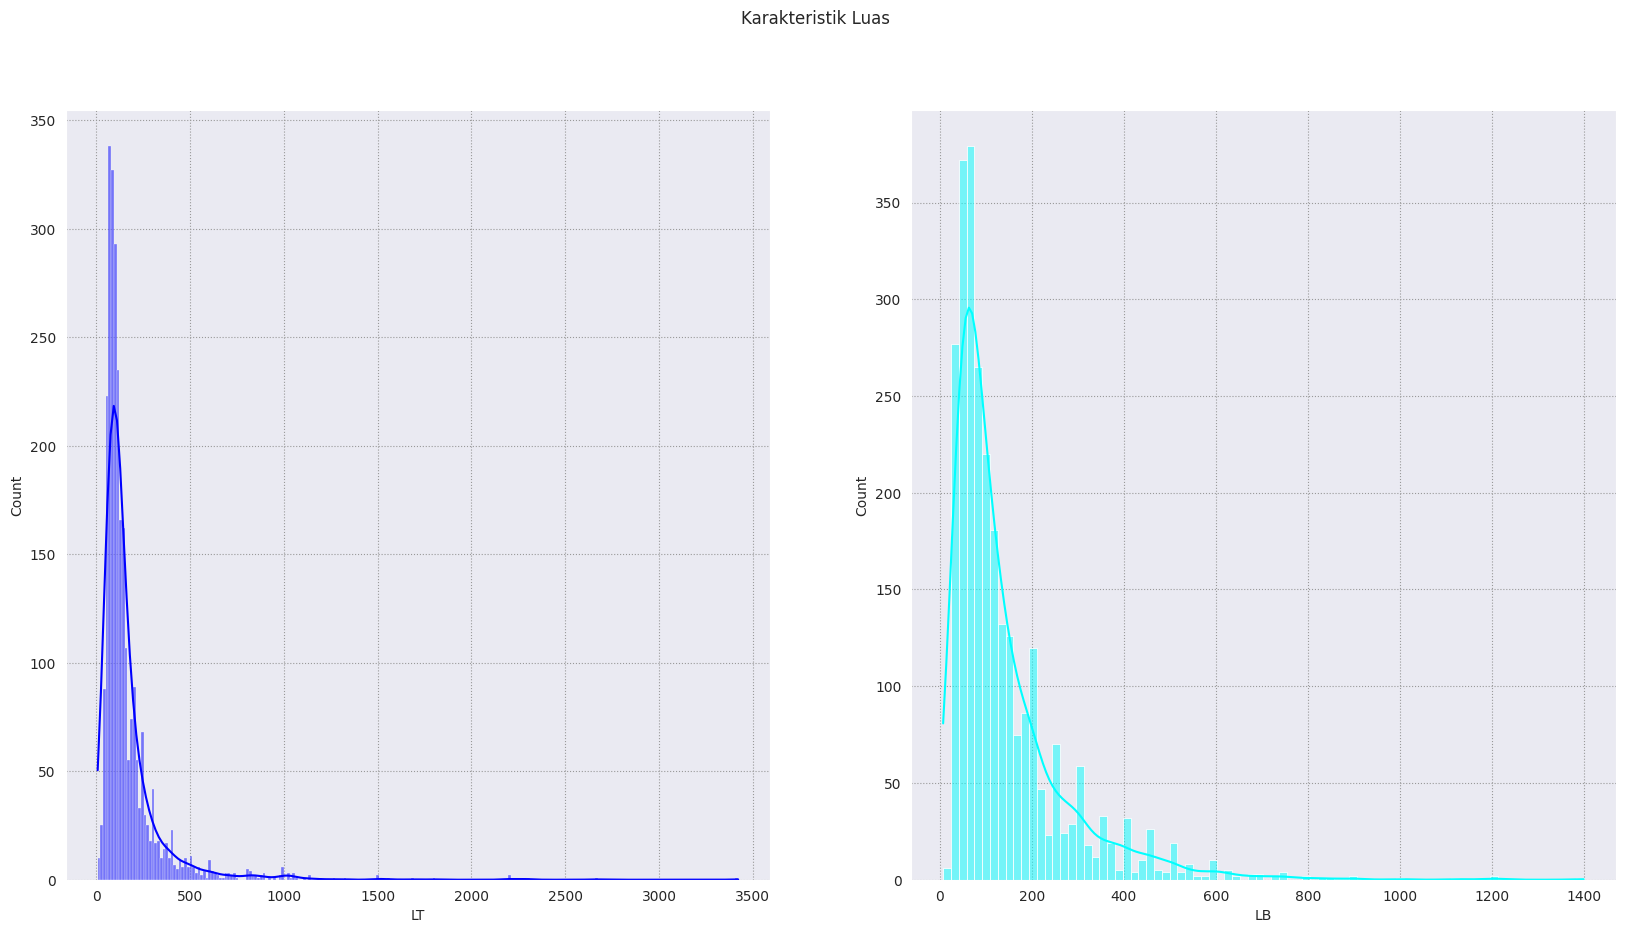

In [348]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig,axs = plt.subplots(1,2, figsize = (20, 10))
fig.suptitle('Karakteristik Luas')
sns.histplot(data=df, x="LT", kde=True, color="blue", ax = axs[0])
sns.histplot(data=df, x="LB", kde=True, color="cyan", ax = axs[1])

## <h2> 6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan? </h2> ##

<h3> Merujuk ke visualisasi yang sudah dilakukan dapat diambil beberapa kesimpulan:
<ol type=1>
<li> Murni berdasarkan NJOP saja, investasi bisa dilakukan pada rumah di baris-baris 0, 1, 450, 461, 468, 868, 1306, 1654, 68, 524, dan 525 dengan total uang yang dikeluarkan adalah Rp 4.087.173.000. Apabila RPPi ingin sepenuhnya mengalokasikan dan tidak keberatan menambahkan dana untuk investasi ke 1 rumah saja, maka rumah di baris 18 dengan harga Rp 39 Miliar sangat <i>worth it</i> dilihat dari NJOP nya </li>
<li> Dengan memperhatikan tren wilayah yang meningkat dan konteks saat ini serta fitur rumah yang tidak minimalis, maka investasi bisa dilakukan pada rumah-rumah di baris 10, 675, 676, dan 720 dengan total uang yang dikeluarkan adalah Rp 2.110.000.000 </li>
<li> Dengan mempertimbangkan informasi sebelumnya rumah di wilayah Sulawesi itu yang paling potensial ketika mempunyai pemandangan (berdasarkan hasil Boxplot pada bagian "Boxplot" di soal nomor 3) dan mengapa fitur pemandangan itu penting, maka investasi bisa dilakukan pada rumah-rumah di baris 2890, 3005, 3027, dan 3036 dengan total uang yang dikeluarkan adalah Rp 15.200.000.000. Apabila RPPI ingin sepenuhnya mengalokasikan dan tidak keberatan menambahkan dana untuk investasi ke sektor rumah dengan pemandangan di Sulawesi, maka bisa juga membeli rumah-rumah di baris 2952, 2979, dan 3043. Total 7 rumah itu adalah Rp 26.360.000.000 </li>
</ol>

Note: Semua baris di atas direkomendasikan atas dasar asumsi rumah tersebut masih dijual dan bisa dibeli.
</h3>

### <h2> Berdasarkan NJOP </h2> ###

Dengan memperhitungkan NJOP  (Nilai Jual Objek Pajak) berdasarkan harga rumah, luas tanah, dan luas bangunan. Akan digunakan rumus sederhana yaitu
NJOP = $$
\frac {Harga rumah} {Luas Tanah + Luas Bangunan}
$$

Akan dicari nilai NJOP yang  rendah.  Alasan utamanya adalah karena NJOP yang rendah akan mengurangi jumlah pajak properti yang harus perusahaan bayarkan kepada pemerintah setempat. Namun, penting untuk diingat bahwa hal ini hanyalah pertimbangan pajak, faktor-faktor lain juga perlu dipertimbangkan seperti lokasi, potensi apresiasi nilai properti, permintaan sewa, kondisi properti, aliran kas, dan risiko investasi secara keseluruhan.

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 0 to 3048
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      2734 non-null   datetime64[ns]
 1   LT              2734 non-null   float64       
 2   LB              2734 non-null   float64       
 3   KT              2734 non-null   category      
 4   KM              2734 non-null   category      
 5   garasi          2734 non-null   category      
 6   carport         2734 non-null   category      
 7   sertifikat      2734 non-null   category      
 8   listrik         2734 non-null   category      
 9   harga           2734 non-null   int64         
 10  URL             2734 non-null   object        
 11  deskripsi       2734 non-null   object        
 12  asal            2734 non-null   category      
 13  kategori_harga  2734 non-null   category      
 14  key_features    2734 non-null   object        
 15  mini

In [350]:
df[df.loc[:, 'NJOP'] > 2*1e7]

created_at     LT     LB   KT   KM garasi carport  \
1335 2021-12-06  189.0  250.0  7.0  4.0    3.0     0.0   
1388 2021-11-15  144.0  250.0  4.0  4.0    0.0     1.0   

                           sertifikat    listrik       harga  ...  \
1335                              SHM    >= 6600  9500000000  ...   
1388  lainnya(PPJB, Girik, Adat, dll)  3500-5500  8200000000  ...   

                                              deskripsi     asal  \
1335   daerah bebas banjir dekat dengan kuningan sud...  Jakarta   
1388  rumah brandnew minimalis bangunan 25 lantai ko...  Jakarta   

     kategori_harga         key_features minimalis strategis bebas_banjir  \
1335          Mahal  bebas banjir, dekat         0         1            1   
1388          Mahal       minimalis, mal         1         1            0   

     pemandangan          NJOP  YYYY-mm  
1335           0  2.164009e+07  2021-12  
1388           0  2.081218e+07  2021-11  

[2 rows x 21 columns]

In [351]:
filtered_df = df[df.loc[:, 'NJOP'] > 2*1e7]
filtered_df[['URL', 'deskripsi', 'harga']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\nHarga: {row['harga']}\n"), axis=1)

Row 1335
URL: https://rumahdijual.com/tebet/11349615-rumah-2-lantai-dan-strategis-akses-4-mobil-di.html
Deskripsi:  daerah bebas banjir dekat dengan kuningan sudirman manggarai cawang mampang prapatan gatot subroto otista jatinegara dan kampung melayu stasiun cawang dan stasiun tebet pasar tebet bumd dan halte busway taman tebet untuk jogging olahraga dan rekreasi
Harga: 9500000000

Row 1388
URL: https://www.rumah.com/listing-properti/dijual-pantai-indah-kapuk-pik-jakarta-utara-oleh-herry-yang-19007702
Deskripsi: rumah brandnew minimalis bangunan 25 lantai komplek perumahan pantai indah kapuk pik dan keamanan 24 jam
Harga: 8200000000



1335    None
1388    None
dtype: object

#### <h2> Spesifik Hanya Rumah Tahun 2023 </h2> ####

In [352]:
median_njop_by_asal = df.groupby('asal')['NJOP'].median().reset_index()
median_njop_by_asal = median_njop_by_asal.sort_values(by='NJOP', ascending=True)
outlier_threshold = df['NJOP'].quantile(0.90)
filtered_data = df[df['NJOP'] <= outlier_threshold]

swarm_plot = px.scatter(filtered_data, x="asal", y="NJOP", color='asal',
                       category_orders={"asal": median_njop_by_asal['asal']},
                                    title="Swarm Plot NJOP per Daerah Asal")

swarm_plot.show()

In [353]:
subset_2023 = df[df['created_at'].dt.year == 2023]
group_njop = subset_2023.sort_values(by='NJOP').groupby('asal')

#Diambil 5 daerah dengan njop terkecil
group5 = group_njop.head(5)

median_njop_by_asal_2023 = group5.groupby('asal')['NJOP'].median().reset_index()
median_njop_by_asal = median_njop_by_asal_2023.sort_values(by='NJOP', ascending=True)

grouped_plot = px.box(subset_2023, x="asal", y="NJOP", color='asal', category_orders={"asal": median_njop_by_asal['asal']})
grouped_plot.show()

In [354]:
#Ditampilkan nilai njop terendah dari tiap Daerah Asal
median_njop_by_asal

asal          NJOP
7   Lampung - Sumatera selatan  8.124077e+05
6             Kalimantan (All)  8.611111e+05
9           Padang - Palembang  1.388889e+06
1                      Bandung  1.475410e+06
2                       Bekasi  1.495726e+06
11               Sulawesi(All)  1.529412e+06
8                        Medan  1.625000e+06
10                    Semarang  2.031250e+06
14                  Yogyakarta  2.044293e+06
4                        Depok  2.325581e+06
12                    Surabaya  2.360515e+06
0                         Bali  2.595628e+06
3                        Bogor  2.664234e+06
13                   Tangerang  2.761905e+06
5                      Jakarta  6.470588e+06

Dapat dilihat Bahwa NJOP Terendah berada di kota Lampung - Sumatra Selatan. Akan dicari detail rumah dengan NJOP terendah.

In [355]:
nilai_njop = 820_000
rumah_dengan_njop_terendah = subset_2023[subset_2023['NJOP'] < nilai_njop]

rumah_dengan_njop_terendah

created_at     LT     LB   KT   KM garasi carport sertifikat  \
450  2023-08-22  589.0   88.0  3.0  2.0    0.0     1.0        SHM   
461  2023-07-18  225.0  345.0  2.0  1.0    0.0     1.0        SHM   
468  2023-08-24  800.0  120.0  2.0  1.0    0.0     1.0        SHM   
868  2023-08-18  215.0   40.0  2.0  1.0    0.0     0.0        SHM   
1306 2023-09-21  216.0  200.0  4.0  4.0    1.0     2.0        SHM   
1654 2023-09-18   70.0   45.0  2.0  1.0    1.0     1.0        SHM   

              listrik      harga  ...  \
450           Lainnya  550000000  ...   
461           Lainnya  250000000  ...   
468           Lainnya  350000000  ...   
868               900  195000000  ...   
1306        3500-5500  170000000  ...   
1654  Tidak diketahui   80000000  ...   

                                              deskripsi  \
450   di jual rumah dijl pangeran ayin kel kenten ke...   
461   depan pasar bernunglokasi pingir jalan utamade...   
468                           rumah murah tulang bawang   
868   dijual rumah sederhana di komplek sumber cahay...   
1306  cluster san lorenzo illago 2 lantai lt 216 12x...   
1654  lokasi strategis dekat dengan sekolah pusat pe...   

                            asal kategori_harga  \
450   Lampung - Sumatera selatan         Sedang   
461   Lampung - Sumatera selatan          Murah   
468   Lampung - Sumatera selatan          Murah   
868             Kalimantan (All)          Murah   
1306                   Tangerang          Murah   
1654                      Bekasi          Murah   

                             key_features minimalis strategis bebas_banjir  \
450                                  None         0         0            0   
461                          bebas banjir         0         0            1   
468                                  None         0         0            0   
868                        dekat, bandara         0         1            0   
1306                                 None         0         0            0   
1654  strategis, bebas banjir, tol, dekat         0         1            1   

     pemandangan           NJOP  YYYY-mm  
450            0  812407.680945  2023-08  
461            0  438596.491228  2023-07  
468            0  380434.782609  2023-08  
868            0  764705.882353  2023-08  
1306           0  408653.846154  2023-09  
1654           0  695652.173913  2023-09  

[6 rows x 21 columns]

In [356]:
filtered_df = subset_2023[subset_2023['NJOP'] < nilai_njop]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 450
URL: https://www.rumah123.com/properti/banyuasin/hos14520240/
Deskripsi: di jual rumah dijl pangeran ayin kel kenten kec talang kelapa kota palembangluas tanah 589 m2luas bangunan 88 m2harga jual rp 550000xxx

Row 461
URL: https://www.rumah123.com/properti/pesawaran/hos14255348/
Deskripsi: depan pasar bernunglokasi pingir jalan utamadepan jalan aspallokasi bebas banjirstok terbatas

Row 468
URL: https://www.rumah123.com/properti/tulang-bawang-barat/hos11642130/
Deskripsi: rumah murah tulang bawang

Row 868
URL: https://www.rumah.com/listing-properti/dijual-rumah-type-40-jl-kasturi-ii-banjarmasin-oleh-zul-andiko-5378933
Deskripsi: dijual rumah sederhana di komplek sumber cahaya indah jl kasturi ii landasan ulin kalimantan selatan luas tanah 215 hoek dekat bandara syamsudin noor 15 km dekat jalan lingkar ke martapura 500 m air pdam

Row 1306
URL: https://www.rumah.com/listing-properti/dijual-illago-cluster-san-lorenzo-oleh-adhie-dharma-22201650
Deskripsi: cluster san lorenzo illa

450     None
461     None
468     None
868     None
1306    None
1654    None
dtype: object

Dengan mempertimbangkan nilai NJOP terendah, maka disarankan agar perusahaan properti menanam investasi di rumah pada baris-baris di atas (450, 461, 468, 868, 1306, 1654) kecuali di baris 1306 karena itu merupakan tipe rumah yang disewakan, bukan dijual.

#### <h2> Rumah Seterusnya </h2> ####

In [357]:
df_outliers.groupby('asal')['NJOP'].agg(['mean', 'median']).max().max()

43908867.5790999

<Axes: xlabel='NJOP', ylabel='Count'>

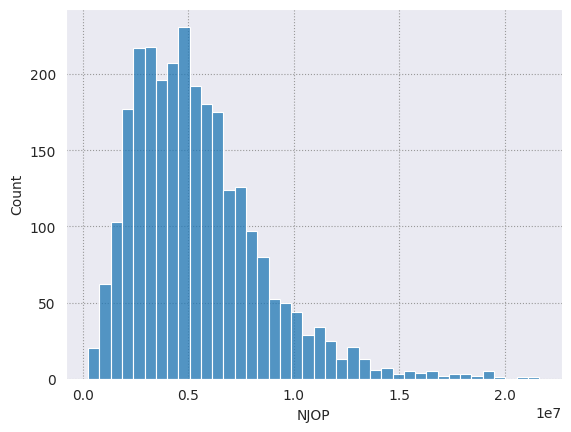

In [358]:
sns.histplot(data=df, x='NJOP')

<Axes: xlabel='NJOP', ylabel='Count'>

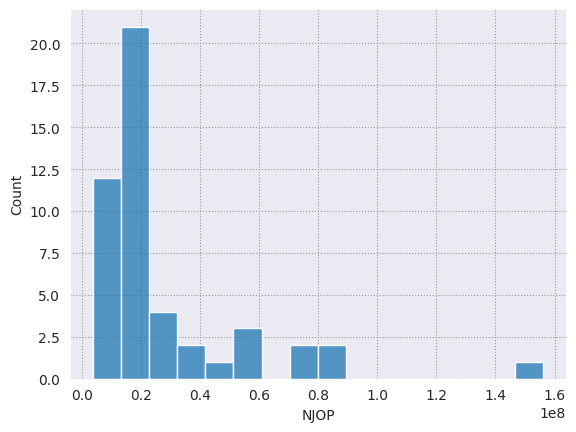

In [359]:
sns.histplot(data=df_outliers, x='NJOP')

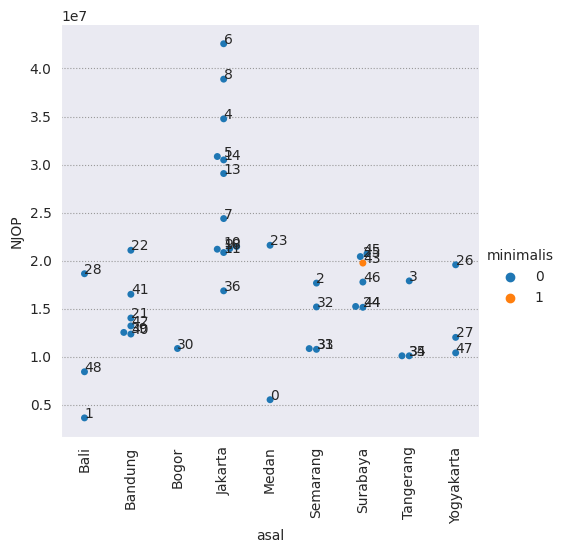

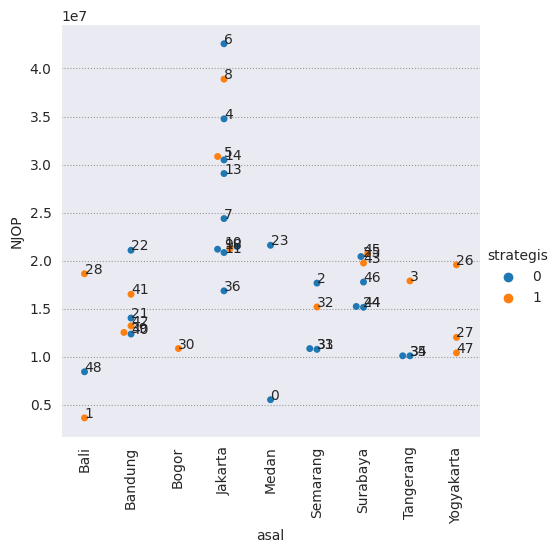

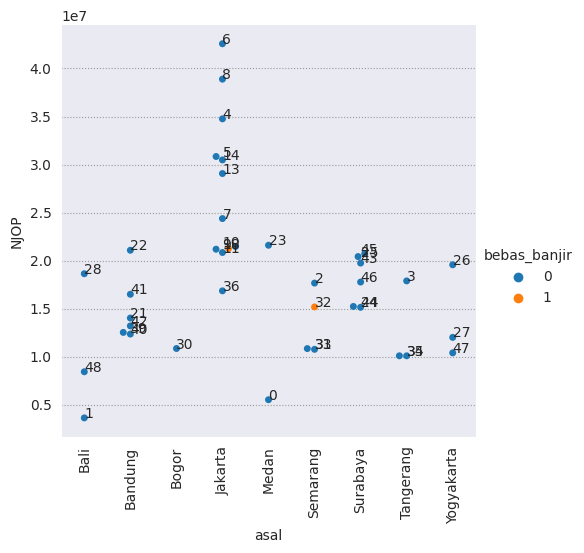

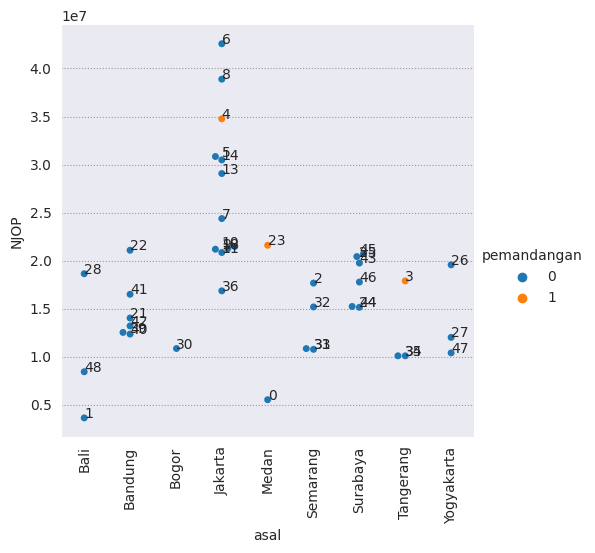

In [360]:
filtered_df = df_outliers[df_outliers.loc[:, 'NJOP'] < df_outliers.groupby('asal')['NJOP'].agg(['mean', 'median']).max().max()]
cat_var = ['minimalis', 'strategis', 'bebas_banjir', 'pemandangan']

for cat in cat_var:
  # Create the plot
  g = sns.catplot(x='asal', y='NJOP', kind='swarm', hue=cat, data=filtered_df)
  plt.xticks(rotation=90)

  # Annotate each point with its row number from the DataFrame
  for i in range(filtered_df.shape[0]):
      g.ax.text(filtered_df['asal'].iloc[i], filtered_df['NJOP'].iloc[i], str(filtered_df.index[i]))

  plt.show()

In [361]:
df_outliers.loc[[0, 1, 18], :]

LT      LB   KT   KM garasi carport sertifikat  listrik        harga  \
0   145.0   126.0  3.0  3.0    0.0     1.0        SHM     2200   1500000000   
1   250.0   436.0  5.0  3.0    0.0     0.0        SHM  >= 6600   2500000000   
18  640.0  1200.0  6.0  5.0    0.0     2.0        SHM  >= 6600  39000000000   

                                                  URL  \
0   https://www.rumah.com/listing-properti/dijual-...   
1   https://www.rumah123.com/properti/semarapura/h...   
18  https://www.rumah123.com/properti/jakarta-utar...   

                                            deskripsi     asal key_features  \
0                            rumah berkualitas samera    Medan         None   
1   rumah dijual semarapura ada 2 sertifikat masin...     Bali        meter   
18  rumah mewah rapi dan luas dengan lebar 16x4064...  Jakarta         None   

   minimalis strategis bebas_banjir pemandangan          NJOP  
0          0         0            0           0  5.535055e+06  
1          0         1            0           0  3.644315e+06  
18         0         0            0           0  2.119565e+07

In [362]:
filtered_df = df_outliers.loc[[0, 1, 18], :]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 0
URL: https://www.rumah.com/listing-properti/dijual-samera-djohor-oleh-steven-19272779
Deskripsi: rumah berkualitas samera

Row 1
URL: https://www.rumah123.com/properti/semarapura/hos12342924/
Deskripsi: rumah dijual semarapura ada 2 sertifikat masingmasing ada imbbekas tempat praktek dokter terdiri dari 3 kt 1ada kamar mandi dalam2 ruang tamu yang jadi satu1 ruang makan dapur kotor dapur bersih 1kamar mandi di belakang1 kt taman kolam kt 1 km 1ada 2 meteran listrik 6600 watt dan 4400 wattada 8 unit ac  full furnishedrumah sarang burung walet di lantai 3 sudah menghasilkan 

Row 18
URL: https://www.rumah123.com/properti/jakarta-utara/hos9235728/
Deskripsi: rumah mewah rapi dan luas dengan lebar 16x40640m2 untuk tanah 3 lantai 6kt 3kt prt dan 1 ruang serbaguna pool siap huni harga nego



0     None
1     None
18    None
dtype: object

In [363]:
df[df.loc[:, 'NJOP'] < 0.5*(df.groupby('asal')['NJOP'].agg(['mean', 'median']).min().min())]

created_at      LT     LB   KT   KM garasi carport sertifikat listrik  \
10   2021-06-12   312.0   70.0  4.0  2.0    1.0     1.0        SHM    2200   
296  2021-05-12   384.0  192.0  2.0  2.0    0.0     0.0        SHM     450   
312  2021-06-12    94.0   75.0  3.0  2.0    0.0     1.0        SHM    1300   
319  2021-11-30    84.0   45.0  2.0  1.0    1.0     0.0        SHM    1300   
348  2021-06-10   360.0  100.0  2.0  2.0    0.0     0.0        SHM    1300   
...         ...     ...    ...  ...  ...    ...     ...        ...     ...   
2909 2021-08-11    97.0   36.0  2.0  1.0    0.0     1.0        HGB     900   
2913 2021-04-12  1000.0  456.0  4.0  3.0    3.0     6.0        SHM    2200   
2914 2021-11-10   126.0   73.0  2.0  1.0    1.0     1.0        SHM    1300   
2992 2023-06-06   138.0  276.0  3.0  2.0    1.0     0.0        SHM    1300   
3047 2023-09-14   102.0   72.0  2.0  1.0    0.0     1.0        HGB     900   

           harga  ...                                          deskripsi  \
10     250000000  ...  dekat lapangan tenis dan mesjid 10 menit pintu...   
296    300000000  ...  terdapat 2 kolam ikan sumur bor tandon mesin p...   
312    100000000  ...  bebas banjir sumber air sumur bor mobil bisa m...   
319    150000000  ...  sumber air sumur bor bebas banjir bangunan 1 l...   
348    320000000  ...  dijual cepat butuh uang segera rumah di daerah...   
...          ...  ...                                                ...   
2909   156500000  ...  lokasi kawasan perkantoran andounohubebas banj...   
2913  1500000000  ...  rumah tinggal dengan halaman luaslokasi sangat...   
2914   200000000  ...        rumah baru tanah luas murah dalam perumahan   
2992   500000000  ...  satu unit rumah tinggal 2 dua lantai teretak d...   
3047   175000000  ...  perumahan afika land  afika residence tipe 36u...   

                            asal kategori_harga             key_features  \
10                         Bogor          Murah        tol, dekat, menit   
296   Lampung - Sumatera selatan          Murah                     None   
312   Lampung - Sumatera selatan          Murah             bebas banjir   
319   Lampung - Sumatera selatan          Murah             bebas banjir   
348   Lampung - Sumatera selatan          Murah                     None   
...                          ...            ...                      ...   
2909               Sulawesi(All)          Murah  strategis, bebas banjir   
2913               Sulawesi(All)          Mahal                strategis   
2914               Sulawesi(All)          Murah                     None   
2992               Sulawesi(All)          Murah                     None   
3047               Sulawesi(All)          Murah             bebas banjir   

     minimalis strategis bebas_banjir pemandangan          NJOP  YYYY-mm  
10           0         1            0           0  6.544503e+05  2021-06  
296          0         0            0           0  5.208333e+05  2021-05  
312          0         0            1           0  5.917160e+05  2021-06  
319          0         0            1           0  1.162791e+06  2021-11  
348          0         0            0           0  6.956522e+05  2021-06  
...        ...       ...          ...         ...           ...      ...  
2909         0         1            1           0  1.176692e+06  2021-08  
2913         0         1            0           0  1.030220e+06  2021-04  
2914         0         0            0           0  1.005025e+06  2021-11  
2992         0         0            0           0  1.207729e+06  2023-06  
3047         0         0            1           0  1.005747e+06  2023-09  

[73 rows x 21 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



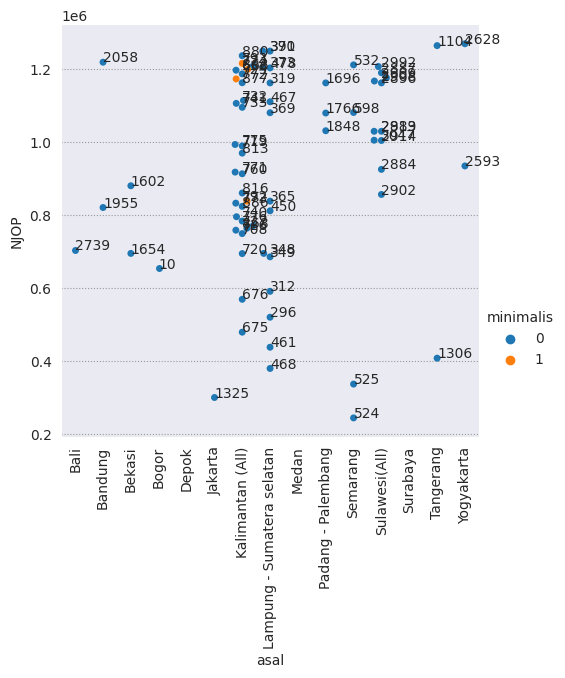

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



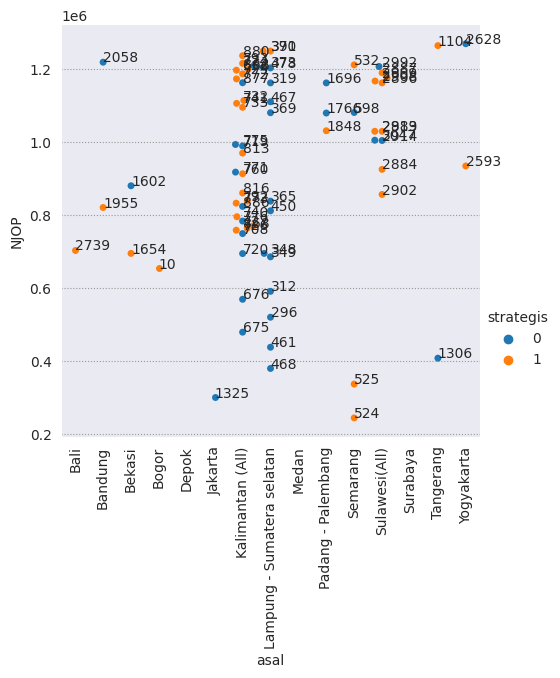

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



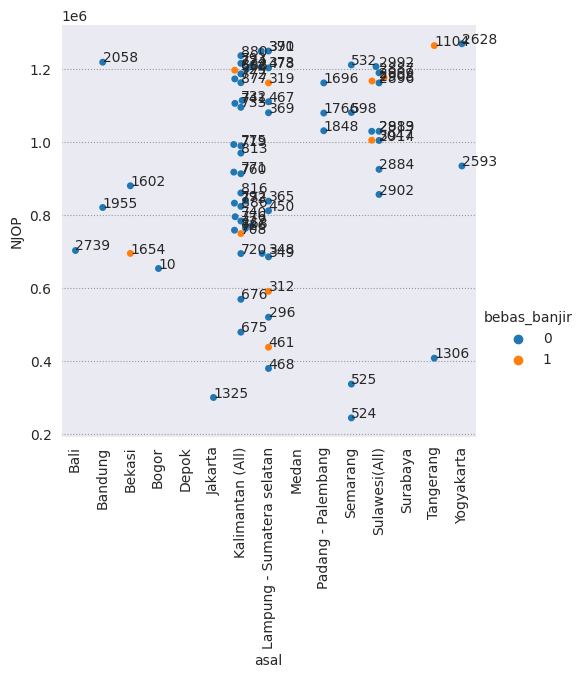

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



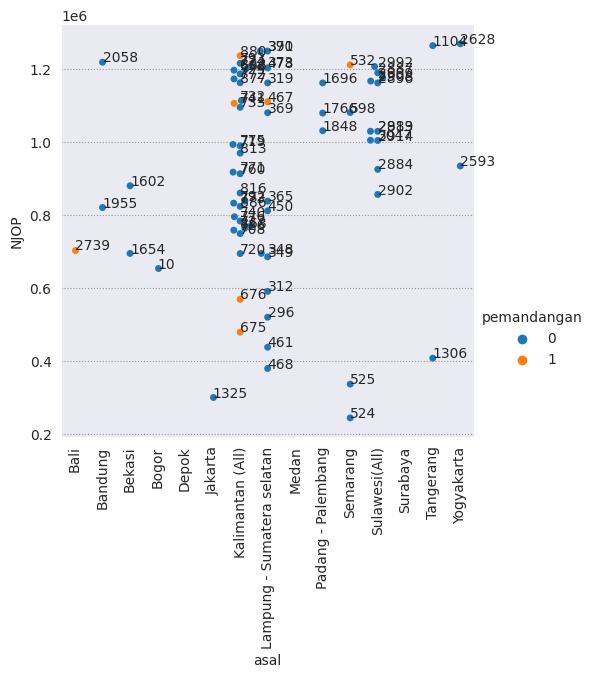

In [364]:
filtered_df = df[df.loc[:, 'NJOP'] < 0.5*(df.groupby('asal')['NJOP'].agg(['mean', 'median']).min().min())]
cat_var = ['minimalis', 'strategis', 'bebas_banjir', 'pemandangan']

for cat in cat_var:
  # Create the plot
  g = sns.catplot(x='asal', y='NJOP', kind='swarm', hue=cat, data=filtered_df)
  plt.xticks(rotation=90)

  # Annotate each point with its row number from the DataFrame
  for i in range(filtered_df.shape[0]):
      g.ax.text(filtered_df['asal'].iloc[i], filtered_df['NJOP'].iloc[i], str(filtered_df.index[i]))

  plt.show()

In [365]:
df[df.loc[:, 'NJOP'] < 0.4*1e6]

created_at      LT     LB   KT   KM garasi carport sertifikat  listrik  \
468  2023-08-24   800.0  120.0  2.0  1.0    0.0     1.0        SHM  Lainnya   
524  2021-07-12   500.0  300.0  2.0  1.0    0.0     1.0        SHM      900   
525  2021-07-12   720.0  450.0  2.0  1.0    0.0     1.0        SHM     1300   
1325 2021-12-05  3422.0   64.0  1.0  1.0    0.0     1.0        SHM     2200   

           harga  ...                                          deskripsi  \
468    350000000  ...                          rumah murah tulang bawang   
524    196000000  ...  keunggulan  dekat rumah warga dekat mushola de...   
525    395000000  ...  keunggulan lokasi jalan lebar 6  10 meter sela...   
1325  1050000000  ...  vlaster cempaka merupakan suatu kompleks perum...   

                            asal kategori_harga  key_features minimalis  \
468   Lampung - Sumatera selatan          Murah          None         0   
524                     Semarang          Murah  dekat, menit         0   
525                     Semarang          Murah  dekat, meter         0   
1325                     Jakarta          Mahal          None         0   

     strategis bebas_banjir pemandangan           NJOP  YYYY-mm  
468          0            0           0  380434.782609  2023-08  
524          1            0           0  245000.000000  2021-07  
525          1            0           0  337606.837607  2021-07  
1325         0            0           0  301204.819277  2021-12  

[4 rows x 21 columns]

In [366]:
filtered_df = df[df.loc[:, 'NJOP'] < 0.4*1e6]
filtered_df[['URL', 'deskripsi']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\n"), axis=1)

Row 468
URL: https://www.rumah123.com/properti/tulang-bawang-barat/hos11642130/
Deskripsi: rumah murah tulang bawang

Row 524
URL: https://www.rumahku.com/p/SHGV4069/rumah-dijual-pedurungan-tengah-semarang-50192
Deskripsi: keunggulan  dekat rumah warga dekat mushola dekat sekolah sd bangetayu wetan 3 menit ke jalan raya woltermonginsidi 3 menit ke pasar bangetayu 3 menit ke alastua  taman bangetayu 5 menit ke swalayan superindo 6 menit ke swalayan aneka jaya 7 menit ke pasar genuk 8 menit ke pedurungan

Row 525
URL: https://www.rumahku.com/p/SHGV4070/rumah-dijual-pedurungan-tengah-semarang-50192
Deskripsi: keunggulan lokasi jalan lebar 6  10 meter selangkah ke jl woltermonginsidi dekat aneka jaya woltermonginsidi dekat alfamidi woltermonginsidi dekat alfamart indomaret woltermonginsidi

Row 1325
URL: https://www.rumah.com/listing-properti/dijual-cempaka-putih-oleh-hardi-prastian-19352202
Deskripsi: vlaster cempaka merupakan suatu kompleks perumahan mewah di kota jakarta dimana menganut

468     None
524     None
525     None
1325    None
dtype: object

#### <h2> Total </h2> ####

In [367]:
filtered_df = df.loc[[0, 1, 450, 461, 468, 868, 1306, 1654, 68, 524, 525], :]
total_harga = filtered_df['harga'].sum()

filtered_df[['URL', 'deskripsi', 'harga']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\nHarga: {row['harga']}\n"), axis=1)
print(f"Total Harga: {total_harga}")

Row 0
URL: https://rumahdijual.com/bekasi/10799791-rumah-cluster-bhumiland-strategis-bebas-banjir-di-jati-warna.html
Deskripsi: dekat tol jati warna dekat sutle busway dekat pusat perbelanjaan
Harga: 692550000

Row 1
URL: https://www.rumah123.com/perumahan-baru/properti/bogor/adhi-city-Babakan Madang/nps1964/
Deskripsi: destinasi menarik di kawasan babakan madang gunung pancar taman budaya babakan madang highland jungleland stadion pakansari leuwi hejo
Harga: 811400000

Row 450
URL: https://www.rumah123.com/properti/banyuasin/hos14520240/
Deskripsi: di jual rumah dijl pangeran ayin kel kenten kec talang kelapa kota palembangluas tanah 589 m2luas bangunan 88 m2harga jual rp 550000xxx
Harga: 550000000

Row 461
URL: https://www.rumah123.com/properti/pesawaran/hos14255348/
Deskripsi: depan pasar bernunglokasi pingir jalan utamadepan jalan aspallokasi bebas banjirstok terbatas
Harga: 250000000

Row 468
URL: https://www.rumah123.com/properti/tulang-bawang-barat/hos11642130/
Deskripsi: rumah 

Dengan mempertimbangkan nilai NJOP terendah, maka disarankan agar perusahaan properti menanam investasi di rumah pada baris-baris di atas (468, 524, 525) kecuali di baris 1325 karena dicurigai nilai LT nya itu salah *input* karena tidak mungkin LT 3422 tapi LB hanya 64.

### <h2> Berdasarkan Asal dan Fitur Minimalis </h2> ###

array([<Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>, <Axes: xlabel='YYYY-mm'>,
       <Axes: xlabel='YYYY-mm'>], dtype=object)

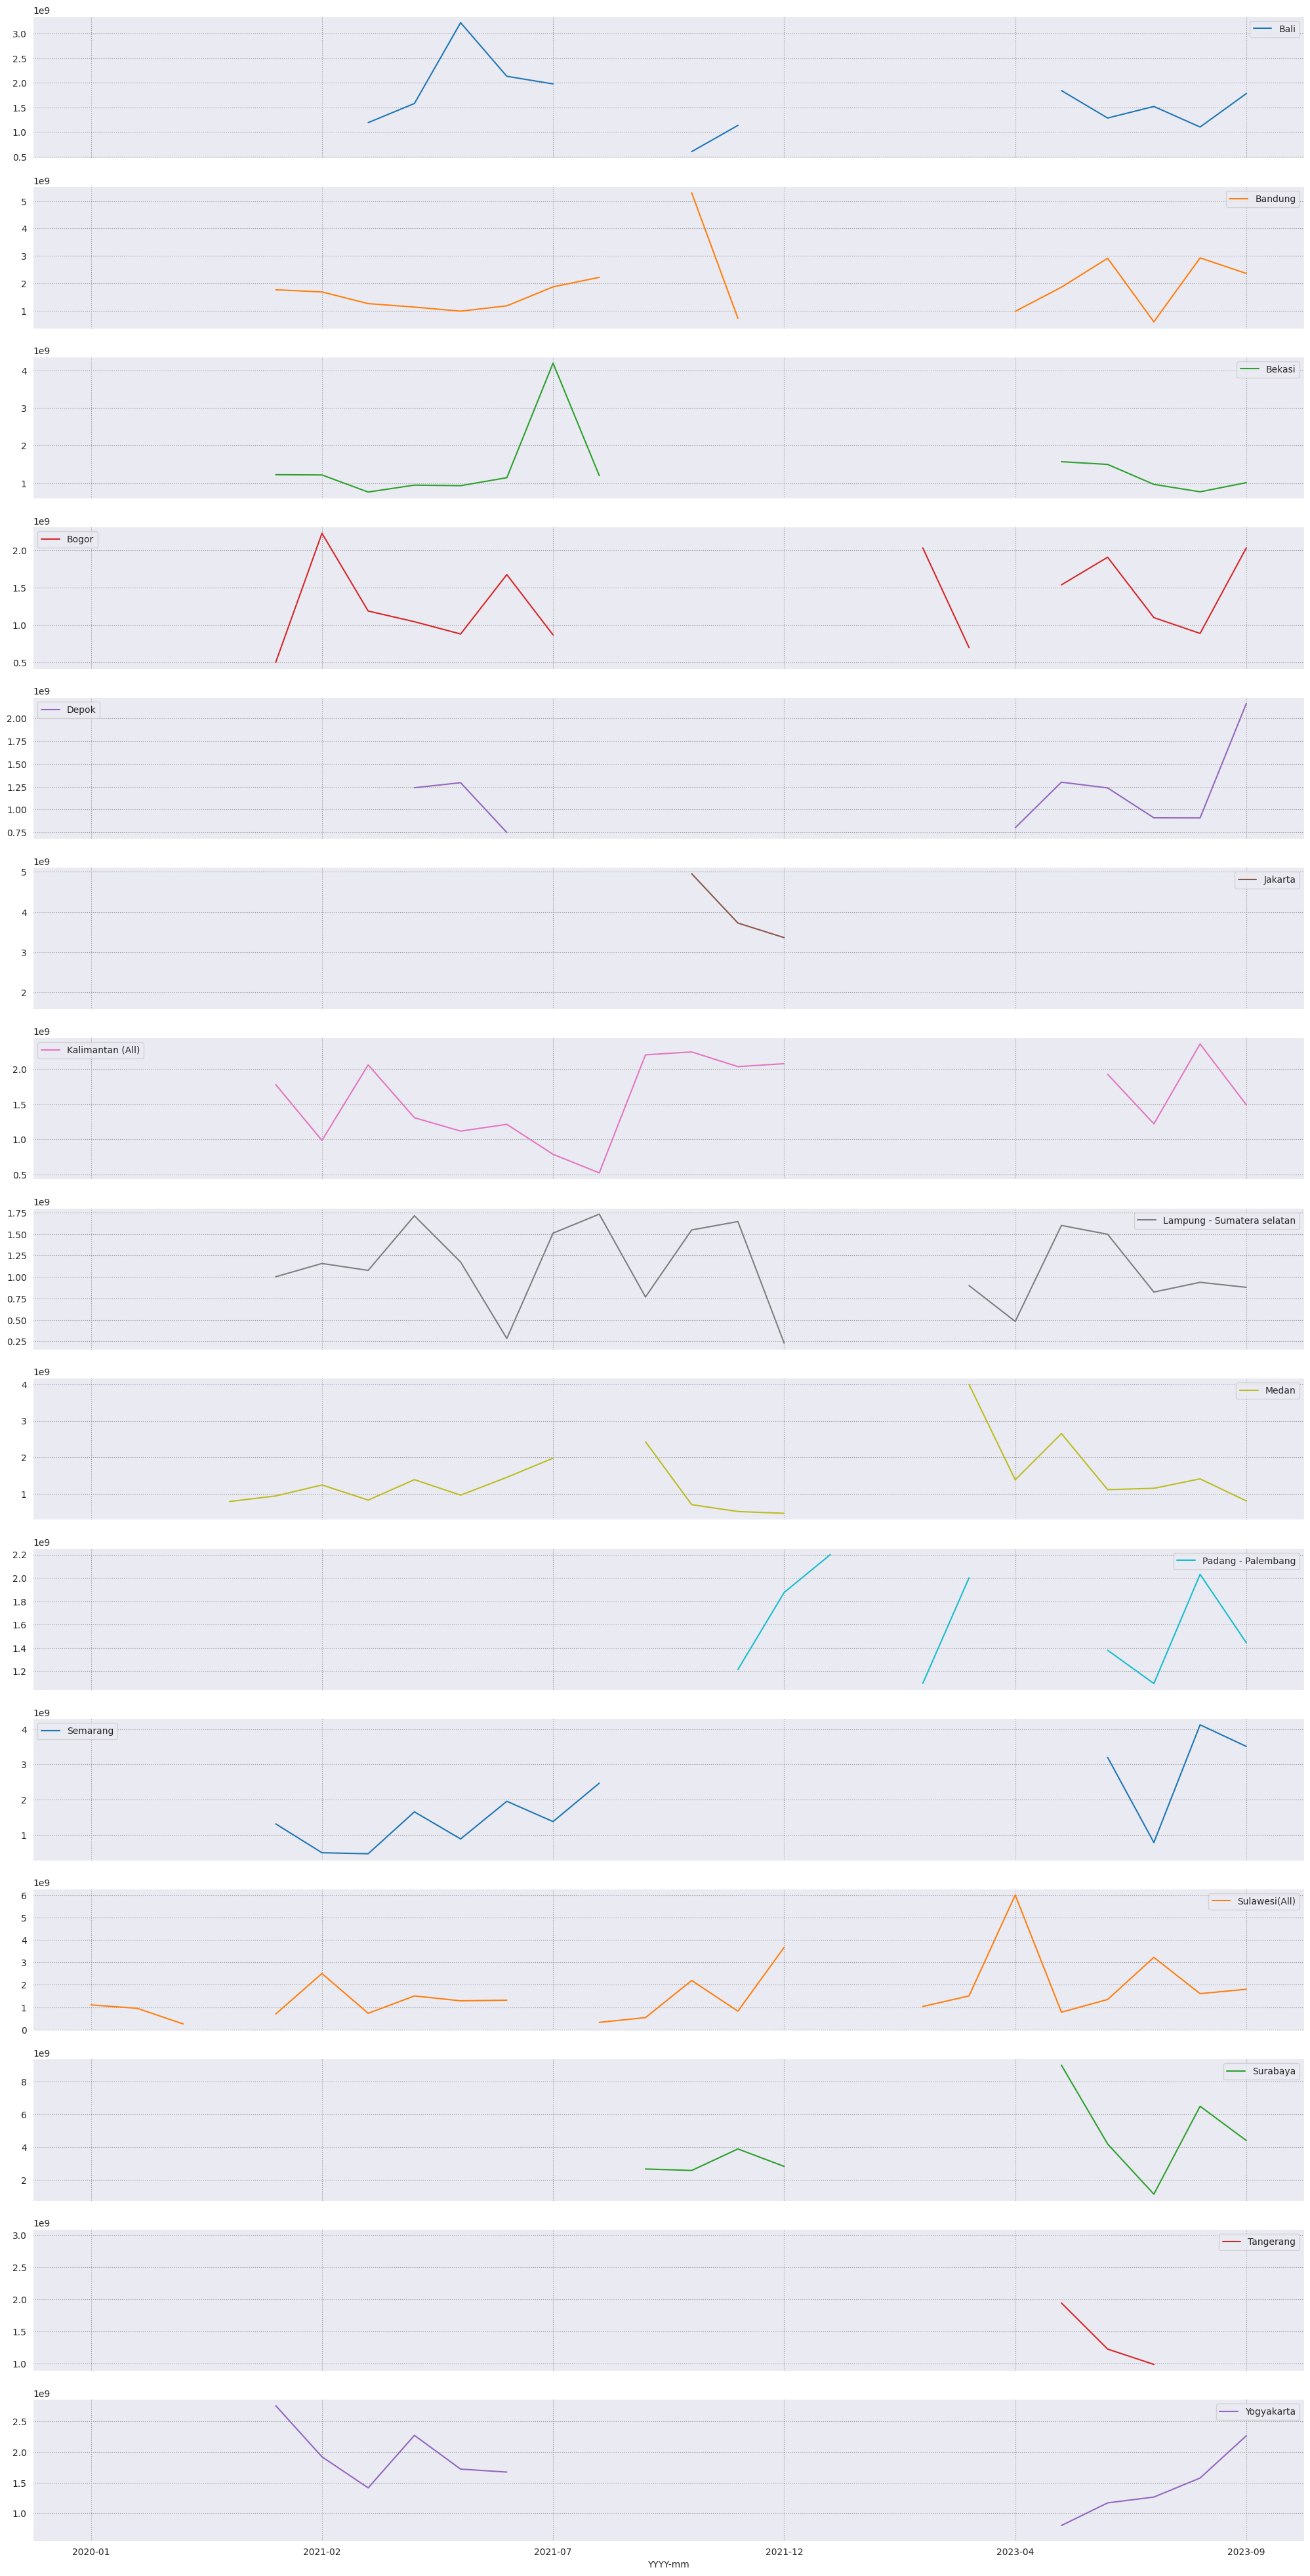

In [368]:
pd.pivot_table(df.reset_index(),
               index='YYYY-mm', columns='asal', values='harga').plot(subplots=True,figsize = (25, 50))

Dapat dilihat tren dari seluruh daerah:

1. Bali = Stabil
2. Bandung = Stabil
3. Bekasi = Stabil
4. Bogor = Cenderung Naik
5. Depok = Naik Secara Signifikan
6. Jakarta = Menurun
7. Kalimantan = Sempat Menurun Tetapi Overall Stabil
8. Lampung - Sumatera Selatan = Menurun
9. Medan = Menurun
10. Padang - Palembang = Menurun
11. Semarang = Meningkat Tajam
12. Sulawesi = Stabil
13. Surabaya = Menurun
14. Tangerang = Menurun
15. Yogyakarta = Meningkat

Jadi akan dilihat rumah dari daerah Bogor, Depok, Semarang, Yogyakarta karena mereka trennya naik, serta akan diambil daerah Kalimantan juga karena pada tahun 2023 ke depan Ibu Kota Indonesia akan ada di Kalimantan, yang berarti ada kemungkinan orang banyak pindah ke IKN di Kalimantan => peningkatan permintaan rumah => kenaikan harga rumah di sana

In [369]:
df['asal'].value_counts()

Bogor                         279
Kalimantan (All)              204
Tangerang                     198
Depok                         197
Padang - Palembang            186
Bekasi                        185
Yogyakarta                    180
Bandung                       176
Semarang                      172
Surabaya                      171
Lampung - Sumatera selatan    168
Medan                         159
Bali                          156
Jakarta                       153
Sulawesi(All)                 150
Name: asal, dtype: int64

#### <h2> create df_tren </h2> ####

In [370]:
kota = ['Bogor', 'Depok', 'Semarang', 'Yogyakarta', 'Kalimantan (All)']
df['asal'] = df['asal'].astype(str)  # Convert 'asal' column to string type
df_tren = df[df['asal'].isin(kota) & (df['minimalis'] == 0)]
df_tren['asal'] = df_tren['asal'].astype('category')  # Convert back to category type after filtering
df_tren['asal'] = df_tren['asal'].cat.remove_unused_categories()
df['asal'] = df['asal'].astype('category')
df_tren.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 2692
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      983 non-null    datetime64[ns]
 1   LT              983 non-null    float64       
 2   LB              983 non-null    float64       
 3   KT              983 non-null    category      
 4   KM              983 non-null    category      
 5   garasi          983 non-null    category      
 6   carport         983 non-null    category      
 7   sertifikat      983 non-null    category      
 8   listrik         983 non-null    category      
 9   harga           983 non-null    int64         
 10  URL             983 non-null    object        
 11  deskripsi       983 non-null    object        
 12  asal            983 non-null    category      
 13  kategori_harga  983 non-null    category      
 14  key_features    983 non-null    object        
 15  minim

<ipython-input-370-b5d6b1e4f802>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-370-b5d6b1e4f802>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [371]:
df_tren['asal'].value_counts()

Bogor               274
Kalimantan (All)    192
Depok               179
Yogyakarta          170
Semarang            168
Name: asal, dtype: int64

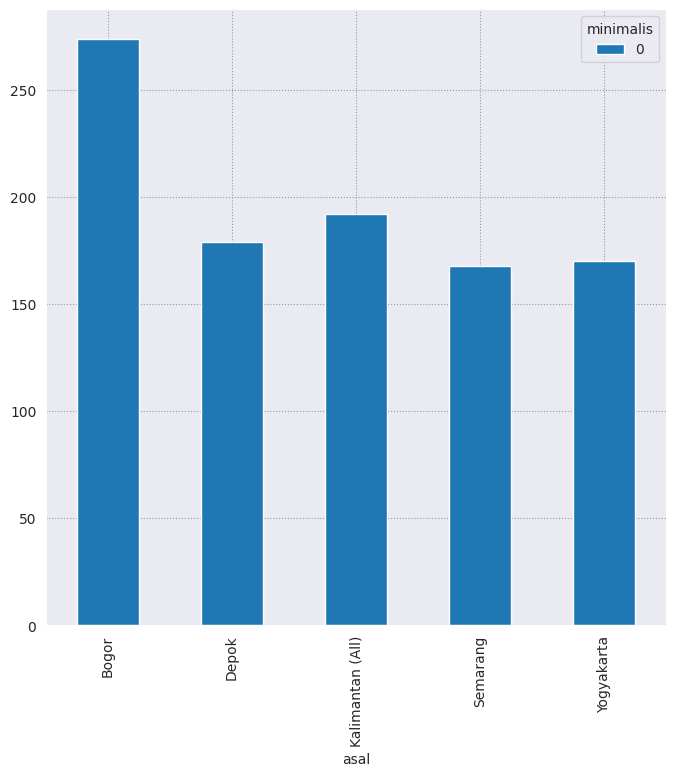

In [372]:
#Plot banyak rumah tanpa fitur minimalis di df_tren
Fitur = pd.crosstab(index=df_tren["asal"], columns=df_tren["minimalis"])
plot1 = Fitur.plot(kind="bar", figsize=(8,8), stacked=True)

<Axes: xlabel='NJOP', ylabel='Count'>

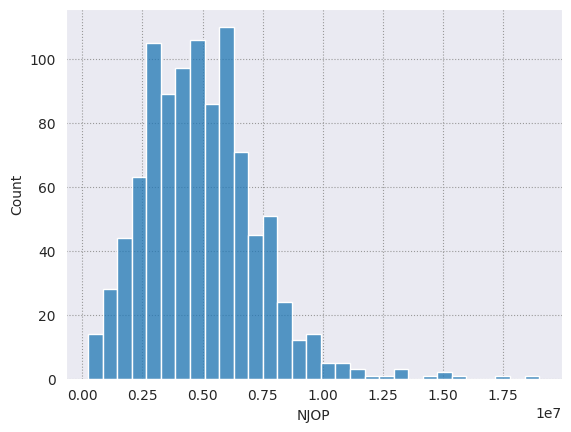

In [373]:
sns.histplot(data=df_tren, x='NJOP')

#### <h2> Plot </h2> #####

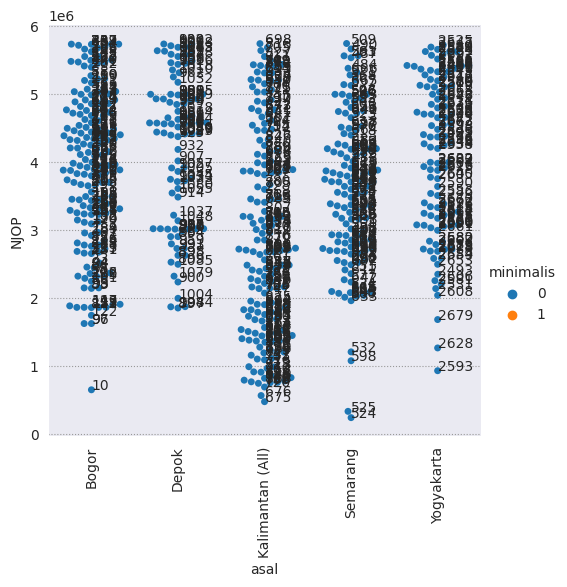

In [374]:
filtered_df = df_tren[df_tren.loc[:, 'NJOP'] < df_tren.groupby('asal')['NJOP'].agg(['mean', 'median']).max().max()]
g = sns.catplot(x='asal', y='NJOP', kind='swarm', hue='minimalis', data=filtered_df)
plt.xticks(rotation=90)

# Annotate each point with its row number from the DataFrame
for i in range(filtered_df.shape[0]):
  g.ax.text(filtered_df['asal'].iloc[i], filtered_df['NJOP'].iloc[i], str(filtered_df.index[i]))

plt.show()

In [375]:
df_tren[df_tren['NJOP'] < 0.75*1e6]

created_at     LT     LB   KT   KM garasi carport sertifikat  \
10  2021-06-12  312.0   70.0  4.0  2.0    1.0     1.0        SHM   
524 2021-07-12  500.0  300.0  2.0  1.0    0.0     1.0        SHM   
525 2021-07-12  720.0  450.0  2.0  1.0    0.0     1.0        SHM   
675 2021-01-12  949.0  341.0  2.0  1.0    0.0     0.0        HGB   
676 2021-01-12  696.0  341.0  2.0  1.0    1.0     1.0        HGB   
720 2021-06-12  532.0  403.0  6.0  3.0    0.0     0.0        SHM   

             listrik      harga  ...  \
10              2200  250000000  ...   
524              900  196000000  ...   
525             1300  395000000  ...   
675              900  619000000  ...   
676              900  591000000  ...   
720  Tidak diketahui  650000000  ...   

                                             deskripsi              asal  \
10   dekat lapangan tenis dan mesjid 10 menit pintu...             Bogor   
524  keunggulan  dekat rumah warga dekat mushola de...          Semarang   
525  keunggulan lokasi jalan lebar 6  10 meter sela...          Semarang   
675  dijual rumah di jlke lapterbang komp decoriont...  Kalimantan (All)   
676  dijual rumah di jlke lapterbang komp decoriont...  Kalimantan (All)   
720          rumah pontianak interesting hunian nyaman  Kalimantan (All)   

    kategori_harga       key_features minimalis strategis bebas_banjir  \
10           Murah  tol, dekat, menit         0         1            0   
524          Murah       dekat, menit         0         1            0   
525          Murah       dekat, meter         0         1            0   
675         Sedang             gunung         0         0            0   
676         Sedang             gunung         0         0            0   
720         Sedang               None         0         0            0   

    pemandangan           NJOP  YYYY-mm  
10            0  654450.261780  2021-06  
524           0  245000.000000  2021-07  
525           0  337606.837607  2021-07  
675           1  479844.961240  2021-01  
676           1  569913.211186  2021-01  
720           0  695187.165775  2021-06  

[6 rows x 21 columns]

In [376]:
filtered_df = df_tren[df_tren['NJOP'] < 0.75*1e6]
total_harga = filtered_df['harga'].sum()

filtered_df[['URL', 'deskripsi', 'harga']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\nHarga: {row['harga']}\n"), axis=1)
print(f"Total Harga: {total_harga}")

Row 10
URL: https://www.rumah123.com/properti/bogor/hos8921804/
Deskripsi: dekat lapangan tenis dan mesjid 10 menit pintu tol yasmin  10 menit transmart lotte mart giant
Harga: 250000000

Row 524
URL: https://www.rumahku.com/p/SHGV4069/rumah-dijual-pedurungan-tengah-semarang-50192
Deskripsi: keunggulan  dekat rumah warga dekat mushola dekat sekolah sd bangetayu wetan 3 menit ke jalan raya woltermonginsidi 3 menit ke pasar bangetayu 3 menit ke alastua  taman bangetayu 5 menit ke swalayan superindo 6 menit ke swalayan aneka jaya 7 menit ke pasar genuk 8 menit ke pedurungan
Harga: 196000000

Row 525
URL: https://www.rumahku.com/p/SHGV4070/rumah-dijual-pedurungan-tengah-semarang-50192
Deskripsi: keunggulan lokasi jalan lebar 6  10 meter selangkah ke jl woltermonginsidi dekat aneka jaya woltermonginsidi dekat alfamidi woltermonginsidi dekat alfamart indomaret woltermonginsidi
Harga: 395000000

Row 675
URL: https://www.rumah123.com/properti/balikpapan/hos9265517/
Deskripsi: dijual rumah di j

Dengan mempertimbangkan nilai NJOP terendah, maka disarankan agar perusahaan properti menanam investasi di rumah pada baris-baris di atas (10, 675, 676, dan 720) kecuali di baris 524 dan 525 karena sudah pada bagian "Berdasarkan NJOP"

### <h2> Berdasarkan Rumah di Sulawesi & Mempunyai Pemandangan </h2> ###

In [377]:
df['asal'] = df['asal'].astype(str)  # Convert 'asal' column to string type
df_sulawesi_pemandangan = df[(df['asal'] == 'Sulawesi(All)') & (df['pemandangan'] == 1)]
df['asal'] = df['asal'].astype('category')

df_sulawesi_pemandangan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2890 to 3043
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      10 non-null     datetime64[ns]
 1   LT              10 non-null     float64       
 2   LB              10 non-null     float64       
 3   KT              10 non-null     category      
 4   KM              10 non-null     category      
 5   garasi          10 non-null     category      
 6   carport         10 non-null     category      
 7   sertifikat      10 non-null     category      
 8   listrik         10 non-null     category      
 9   harga           10 non-null     int64         
 10  URL             10 non-null     object        
 11  deskripsi       10 non-null     object        
 12  asal            10 non-null     object        
 13  kategori_harga  10 non-null     category      
 14  key_features    10 non-null     object        
 15  min

In [378]:
df_sulawesi_pemandangan

created_at      LT      LB   KT   KM garasi carport sertifikat  \
2890 2021-06-03   291.0   200.0  5.0  4.0    2.0     2.0        SHM   
2952 2021-11-26   150.0    70.0  3.0  2.0    0.0     1.0        SHM   
2953 2021-11-26   200.0   145.0  5.0  5.0    0.0     1.0        SHM   
2979 2021-10-29   719.0  1124.0  7.0  8.0    7.0     7.0        SHM   
3003 2023-06-06    90.0    76.0  3.0  2.0    2.0     1.0        HGB   
3005 2023-06-06    92.0    91.0  4.0  2.0    0.0     1.0        SHM   
3016 2023-08-14   126.0   250.0  4.0  3.0    0.0     1.0        SHM   
3027 2023-07-13  1320.0  1000.0  8.0  8.0    5.0     3.0        SHM   
3036 2023-08-31  1054.0   440.0  5.0  4.0    1.0     3.0        SHM   
3043 2023-09-18   135.0    80.0  3.0  2.0    0.0     2.0        SHM   

              listrik       harga  ...  \
2890             2200  2000000000  ...   
2952             1300  1060000000  ...   
2953        3500-5500  2220000000  ...   
2979        3500-5500  9000000000  ...   
3003             2200  1270000000  ...   
3005             1300   700000000  ...   
3016        3500-5500  3500000000  ...   
3027          >= 6600  9500000000  ...   
3036  Tidak diketahui  3000000000  ...   
3043             2200  1100000000  ...   

                                              deskripsi           asal  \
2890  rumah berlokasi ditengah kota palu dekatkemana...  Sulawesi(All)   
2952  embah nyiur kairagi mas manadoperumahan dengan...  Sulawesi(All)   
2953  lembah nyiur kairagi mas manadoperumahan denga...  Sulawesi(All)   
2979               rumah mewah manadoview laut dan kota  Sulawesi(All)   
3003  menawarkan kualitas dan kenyamanan berada dala...  Sulawesi(All)   
3005  rumah 2 lantai area bukit barugaaman 24 jam pe...  Sulawesi(All)   
3016  rumah 3 lantai dng view yg sangat indah hadap ...  Sulawesi(All)   
3027  dijual istanarumah mewah di kawasan perumahan ...  Sulawesi(All)   
3036  di jual rumah tinggal 2 lantai siap huni di da...  Sulawesi(All)   
3043  di jual rumah mewahjln hertasning kompleks per...  Sulawesi(All)   

     kategori_harga                                key_features minimalis  \
2890          Mahal                minimalis, dekat, mal, hijau         1   
2952          Mahal                                       hijau         0   
2953          Mahal                                       hijau         0   
2979          Mahal                                        view         0   
3003          Mahal                         tol, bandara, hijau         0   
3005         Sedang  bebas banjir, dekat, menit, bandara, hijau         0   
3016          Mahal                                        view         0   
3027          Mahal                                   mal, view         0   
3036          Mahal    strategis, dekat, fasilitas, pemandangan         0   
3043          Mahal           tol, menit, fasilitas, mal, hijau         0   

     strategis bebas_banjir pemandangan          NJOP  YYYY-mm  
2890         1            0           1  4.073320e+06  2021-06  
2952         0            0           1  4.818182e+06  2021-11  
2953         0            0           1  6.434783e+06  2021-11  
2979         0            0           1  4.883342e+06  2021-10  
3003         1            0           1  7.650602e+06  2023-06  
3005         1            1           1  3.825137e+06  2023-06  
3016         0            0           1  9.308511e+06  2023-08  
3027         1            0           1  4.094828e+06  2023-07  
3036         1            0           1  2.008032e+06  2023-08  
3043         1            0           1  5.116279e+06  2023-09  

[10 rows x 21 columns]

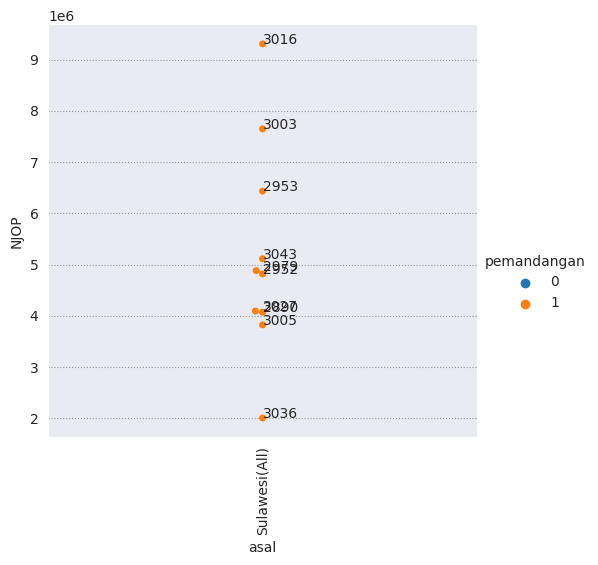

In [379]:
filtered_df = df_sulawesi_pemandangan
g = sns.catplot(x='asal', y='NJOP', kind='swarm', hue='pemandangan', data=filtered_df)
plt.xticks(rotation=90)

# Annotate each point with its row number from the DataFrame
for i in range(filtered_df.shape[0]):
  g.ax.text(filtered_df['asal'].iloc[i], filtered_df['NJOP'].iloc[i], str(filtered_df.index[i]))

plt.show()

In [380]:
df_sulawesi_pemandangan[df_sulawesi_pemandangan['NJOP'] < 4.5*1e6]

created_at      LT      LB   KT   KM garasi carport sertifikat  \
2890 2021-06-03   291.0   200.0  5.0  4.0    2.0     2.0        SHM   
3005 2023-06-06    92.0    91.0  4.0  2.0    0.0     1.0        SHM   
3027 2023-07-13  1320.0  1000.0  8.0  8.0    5.0     3.0        SHM   
3036 2023-08-31  1054.0   440.0  5.0  4.0    1.0     3.0        SHM   

              listrik       harga  ...  \
2890             2200  2000000000  ...   
3005             1300   700000000  ...   
3027          >= 6600  9500000000  ...   
3036  Tidak diketahui  3000000000  ...   

                                              deskripsi           asal  \
2890  rumah berlokasi ditengah kota palu dekatkemana...  Sulawesi(All)   
3005  rumah 2 lantai area bukit barugaaman 24 jam pe...  Sulawesi(All)   
3027  dijual istanarumah mewah di kawasan perumahan ...  Sulawesi(All)   
3036  di jual rumah tinggal 2 lantai siap huni di da...  Sulawesi(All)   

     kategori_harga                                key_features minimalis  \
2890          Mahal                minimalis, dekat, mal, hijau         1   
3005         Sedang  bebas banjir, dekat, menit, bandara, hijau         0   
3027          Mahal                                   mal, view         0   
3036          Mahal    strategis, dekat, fasilitas, pemandangan         0   

     strategis bebas_banjir pemandangan          NJOP  YYYY-mm  
2890         1            0           1  4.073320e+06  2021-06  
3005         1            1           1  3.825137e+06  2023-06  
3027         1            0           1  4.094828e+06  2023-07  
3036         1            0           1  2.008032e+06  2023-08  

[4 rows x 21 columns]

In [381]:
filtered_df = df_sulawesi_pemandangan[df_sulawesi_pemandangan['NJOP'] < 4.5*1e6]
total_harga = filtered_df['harga'].sum()

filtered_df[['URL', 'deskripsi', 'harga']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\nHarga: {row['harga']}\n"), axis=1)
print(f"Total Harga: {total_harga}")

Row 2890
URL: https://www.rumah123.com/properti/palu/hos8005079/
Deskripsi: rumah berlokasi ditengah kota palu dekatkemanamanamodel modern minimaliszona hijau air mudah
Harga: 2000000000

Row 3005
URL: https://www.rumah123.com/properti/makassar/hos13491049/
Deskripsi: rumah 2 lantai area bukit barugaaman 24 jam penjagaan sekurty  lengkap cctvnyaman bebas banjir dua akses jalan utama bukit baruga bugis waterpark dan moncongloe lappara nipa2 pemukiman warga sejuk dan hijau pepohonan jalanan bagus beton dan aspal bagus bisa jalan santaijogging udara segar tanpa polusi 3 menit dari permandian bugis waterpark adventuredekat akses jalan ke btpdaya dan bandaradekat akses jalan antangabdesir dan perintis dijual tanpa perantara
Harga: 700000000

Row 3027
URL: https://www.rumah123.com/properti/manado/hos11284976/
Deskripsi: dijual istanarumah mewah di kawasan perumahan pantai indah malalayang elite di kota manado view kota manado dan bunaken
Harga: 9500000000

Row 3036
URL: https://www.olx.co.id

In [382]:
df_sulawesi_pemandangan[df_sulawesi_pemandangan['NJOP'] < 6*1e6]

created_at      LT      LB   KT   KM garasi carport sertifikat  \
2890 2021-06-03   291.0   200.0  5.0  4.0    2.0     2.0        SHM   
2952 2021-11-26   150.0    70.0  3.0  2.0    0.0     1.0        SHM   
2979 2021-10-29   719.0  1124.0  7.0  8.0    7.0     7.0        SHM   
3005 2023-06-06    92.0    91.0  4.0  2.0    0.0     1.0        SHM   
3027 2023-07-13  1320.0  1000.0  8.0  8.0    5.0     3.0        SHM   
3036 2023-08-31  1054.0   440.0  5.0  4.0    1.0     3.0        SHM   
3043 2023-09-18   135.0    80.0  3.0  2.0    0.0     2.0        SHM   

              listrik       harga  ...  \
2890             2200  2000000000  ...   
2952             1300  1060000000  ...   
2979        3500-5500  9000000000  ...   
3005             1300   700000000  ...   
3027          >= 6600  9500000000  ...   
3036  Tidak diketahui  3000000000  ...   
3043             2200  1100000000  ...   

                                              deskripsi           asal  \
2890  rumah berlokasi ditengah kota palu dekatkemana...  Sulawesi(All)   
2952  embah nyiur kairagi mas manadoperumahan dengan...  Sulawesi(All)   
2979               rumah mewah manadoview laut dan kota  Sulawesi(All)   
3005  rumah 2 lantai area bukit barugaaman 24 jam pe...  Sulawesi(All)   
3027  dijual istanarumah mewah di kawasan perumahan ...  Sulawesi(All)   
3036  di jual rumah tinggal 2 lantai siap huni di da...  Sulawesi(All)   
3043  di jual rumah mewahjln hertasning kompleks per...  Sulawesi(All)   

     kategori_harga                                key_features minimalis  \
2890          Mahal                minimalis, dekat, mal, hijau         1   
2952          Mahal                                       hijau         0   
2979          Mahal                                        view         0   
3005         Sedang  bebas banjir, dekat, menit, bandara, hijau         0   
3027          Mahal                                   mal, view         0   
3036          Mahal    strategis, dekat, fasilitas, pemandangan         0   
3043          Mahal           tol, menit, fasilitas, mal, hijau         0   

     strategis bebas_banjir pemandangan          NJOP  YYYY-mm  
2890         1            0           1  4.073320e+06  2021-06  
2952         0            0           1  4.818182e+06  2021-11  
2979         0            0           1  4.883342e+06  2021-10  
3005         1            1           1  3.825137e+06  2023-06  
3027         1            0           1  4.094828e+06  2023-07  
3036         1            0           1  2.008032e+06  2023-08  
3043         1            0           1  5.116279e+06  2023-09  

[7 rows x 21 columns]

In [383]:
filtered_df = df_sulawesi_pemandangan[df_sulawesi_pemandangan['NJOP'] < 6*1e6]
total_harga = filtered_df['harga'].sum()

filtered_df[['URL', 'deskripsi', 'harga']].apply(lambda row: print(f"Row {row.name}\nURL: {row['URL']}\nDeskripsi: {row['deskripsi']}\nHarga: {row['harga']}\n"), axis=1)
print(f"Total Harga: {total_harga}")

Row 2890
URL: https://www.rumah123.com/properti/palu/hos8005079/
Deskripsi: rumah berlokasi ditengah kota palu dekatkemanamanamodel modern minimaliszona hijau air mudah
Harga: 2000000000

Row 2952
URL: https://www.rumah123.com/properti/manado/hos9231037/
Deskripsi: embah nyiur kairagi mas manadoperumahan dengan konsep hunian asri yang bernuansa alam kebun buahbuahan sehingga memberikan lingkungannya menjadi hijau dan sejuk
Harga: 1060000000

Row 2979
URL: https://www.rumah123.com/properti/manado/hos9074337/
Deskripsi: rumah mewah manadoview laut dan kota
Harga: 9000000000

Row 3005
URL: https://www.rumah123.com/properti/makassar/hos13491049/
Deskripsi: rumah 2 lantai area bukit barugaaman 24 jam penjagaan sekurty  lengkap cctvnyaman bebas banjir dua akses jalan utama bukit baruga bugis waterpark dan moncongloe lappara nipa2 pemukiman warga sejuk dan hijau pepohonan jalanan bagus beton dan aspal bagus bisa jalan santaijogging udara segar tanpa polusi 3 menit dari permandian bugis waterp

## <h2> 7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data? </h2> ##

<h3> Merujuk ke visualisasi yang sudah dilakukan dapat diambil beberapa kesimpulan:
<ol type=1>
<li> Terdapat kecenderungan bahwa rumah yang menghadap ke arah utara lebih mahal harganya dibandingkan rumah yang menghadap ke arah lainnya. Hal ini dapat dilihat dari median dari boxplot untuk <i> value </i> utara itu kedua paling tinggi dibandingkan arah lainnya (<i>value </i> lainnya tidak dianggap karena hanya ada 3 observasi yang berarti sangat bias) </li>
<li> Untuk konsumsi listrik rumah pada wajarnya (kurang dari 6600 an), paling banyak terdapat pada Bogor dengan ada 136 rumah 1300 Watt, 100 rumah 2200 Watt, diikuti dengan pada Lampung dengan ada 96 rumah 1300 Watt. Untuk konsumsi listrik pada skala besar (>= 6600), paling banyak terdapat pada Jakarta dengan ada 59 rumah >= 6600 Watt, lalu Bali ada 58 rumah >= 6600 Watt. Informasi ini berguna untuk mengatasi polusi udara, karena mayoritas listrik di Indonesia masih dihasilkan oleh tenaga uap [1] => berkontribusi terhadap polusi udara => diharapkan pemerintah Indonesia dapat berkolaborasi dengan RPPI untuk melihat wilayah mana yang memiliki rumah dengan golongan listrik tinggi </li>
</ol>
Referensi: <a href= https://databoks.katadata.co.id/datapublish/2023/06/13/kapasitas-pembangkit-listrik-pln-tahun-2022-mayoritas-dari-pltu#:~:text=Pembangkit%20listrik%20tenaga%20air%20(PLTA,23%20MW%20(4%2C87%25)>

1. https://databoks.katadata.co.id/datapublish/2023/06/13/kapasitas-pembangkit-listrik-pln-tahun-2022-mayoritas-dari-pltu#:~:text=Pembangkit%20listrik%20tenaga%20air%20(PLTA,23%20MW%20(4%2C87%25)</a>

</h3>

### <h2> Arah rumah mempengaruhi harga? </h2> ###

In [384]:
df_hadap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 3047
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      1176 non-null   datetime64[ns]
 1   LT              1176 non-null   float64       
 2   LB              1176 non-null   float64       
 3   KT              1176 non-null   category      
 4   KM              1176 non-null   category      
 5   garasi          1176 non-null   category      
 6   carport         1176 non-null   category      
 7   sertifikat      1176 non-null   category      
 8   listrik         1176 non-null   category      
 9   hadap           1176 non-null   object        
 10  harga           1176 non-null   int64         
 11  URL             1176 non-null   object        
 12  deskripsi       1176 non-null   object        
 13  asal            1176 non-null   category      
 14  kategori_harga  1176 non-null   category      
 15  key_

In [385]:
df_hadap['hadap'].value_counts()

Timur                323
Utara                269
Selatan              251
Barat                152
Timur Laut            27
selatan               26
Tenggara              23
Barat Daya            22
timur                 21
utara                 16
Barat Laut            13
barat                  7
utara - barat          3
Timur                  3
tenggara               2
Utara-Timur            2
timur - selatan        2
utara - selatan        1
Timur-Utara            1
Utara-Barat            1
selatan - barat        1
Selatan & Barat        1
Timur laut             1
Barat & Selatan        1
timur utara            1
barat laut             1
Selatan dan Barat      1
Danau                  1
Selatan, Utara         1
Timur, Utara           1
Selatan/Timur          1
Name: hadap, dtype: int64

#### <h2> Preprocessing Singkat </h2> ####

In [391]:
df_hadap['hadap'] = df_hadap['hadap'].str.lower().str.strip()
df_hadap['hadap'] = df_hadap['hadap'].str.replace('[-&,/]', ' ')

<ipython-input-391-947b1ae71cb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-391-947b1ae71cb0>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-391-947b1ae71cb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [392]:
df_hadap['hadap'].value_counts()

timur                347
utara                285
selatan              277
barat                159
timur laut            28
tenggara              25
barat daya            22
barat laut            14
utara   barat          3
timur   selatan        2
utara timur            2
timur utara            2
selatan   barat        2
utara barat            1
utara   selatan        1
selatan dan barat      1
barat   selatan        1
danau                  1
selatan  utara         1
timur  utara           1
selatan timur          1
Name: hadap, dtype: int64

In [396]:
df_hadap['hadap'] = df_hadap['hadap'].apply(ubah_arah)

<ipython-input-396-480ba755bcbf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [397]:
df_hadap['hadap'].value_counts()

timur              347
utara              285
selatan            277
barat              159
timur laut          33
tenggara            28
barat daya          26
barat laut          18
selatan  utara       1
danau                1
utara   selatan      1
Name: hadap, dtype: int64

In [399]:
df_hadap['hadap'] = df_hadap['hadap'].replace(['selatan  utara', 'danau', 'utara   selatan'], 'lainnya')

<ipython-input-399-e7ef7514ef09>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [400]:
df_hadap['hadap'].value_counts()

timur         347
utara         285
selatan       277
barat         159
timur laut     33
tenggara       28
barat daya     26
barat laut     18
lainnya         3
Name: hadap, dtype: int64

#### <h2> Boxplot </h2> ####

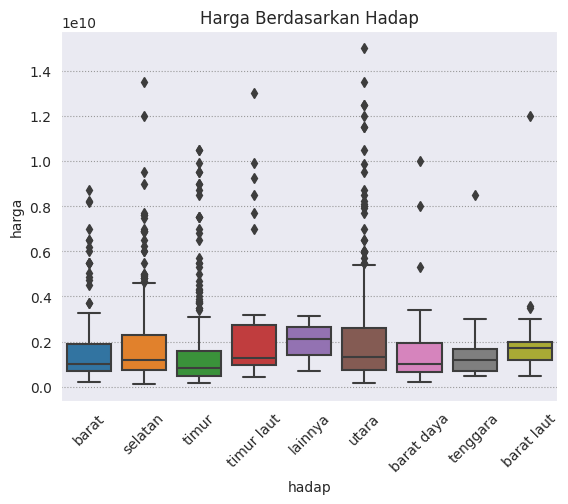

In [405]:
sns.boxplot(data=df_hadap, x='hadap', y='harga')
plt.xticks(rotation=45)
plt.title("Harga Berdasarkan Hadap")
plt.show()

### <h2> Wilayah mana yang Rumahnya Mengkonsumsi Listrik Paling Banyak? </h2> ###

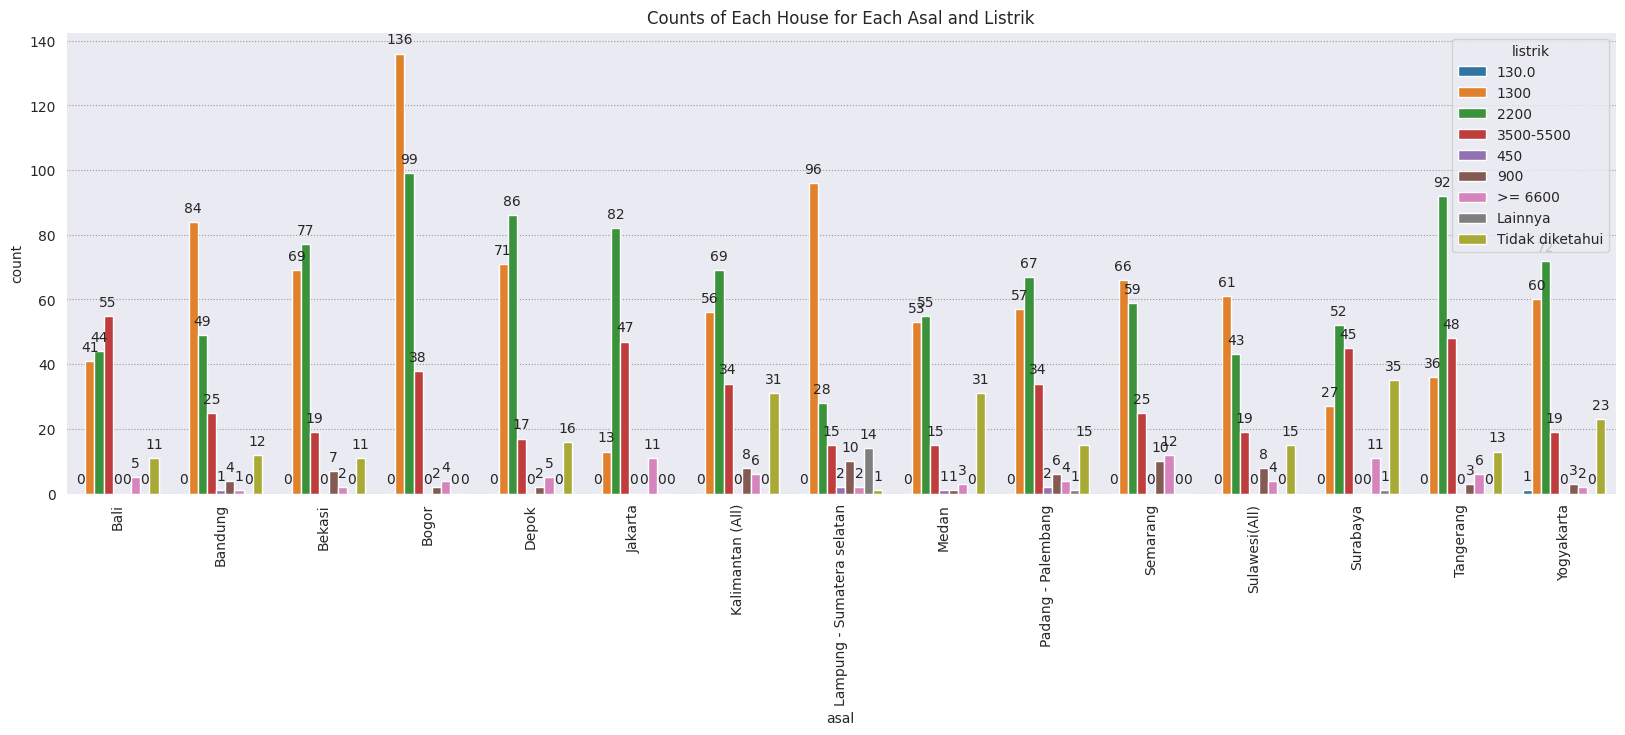

In [415]:
plt.figure(figsize=(20,6))
plot = sns.countplot(data=df, x='asal', hue='listrik')
plt.title('Counts of Each House for Each Asal and Listrik')
plt.xticks(rotation=90)

# Adding the count values on top of each bar
for p in plot.patches:
  plot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

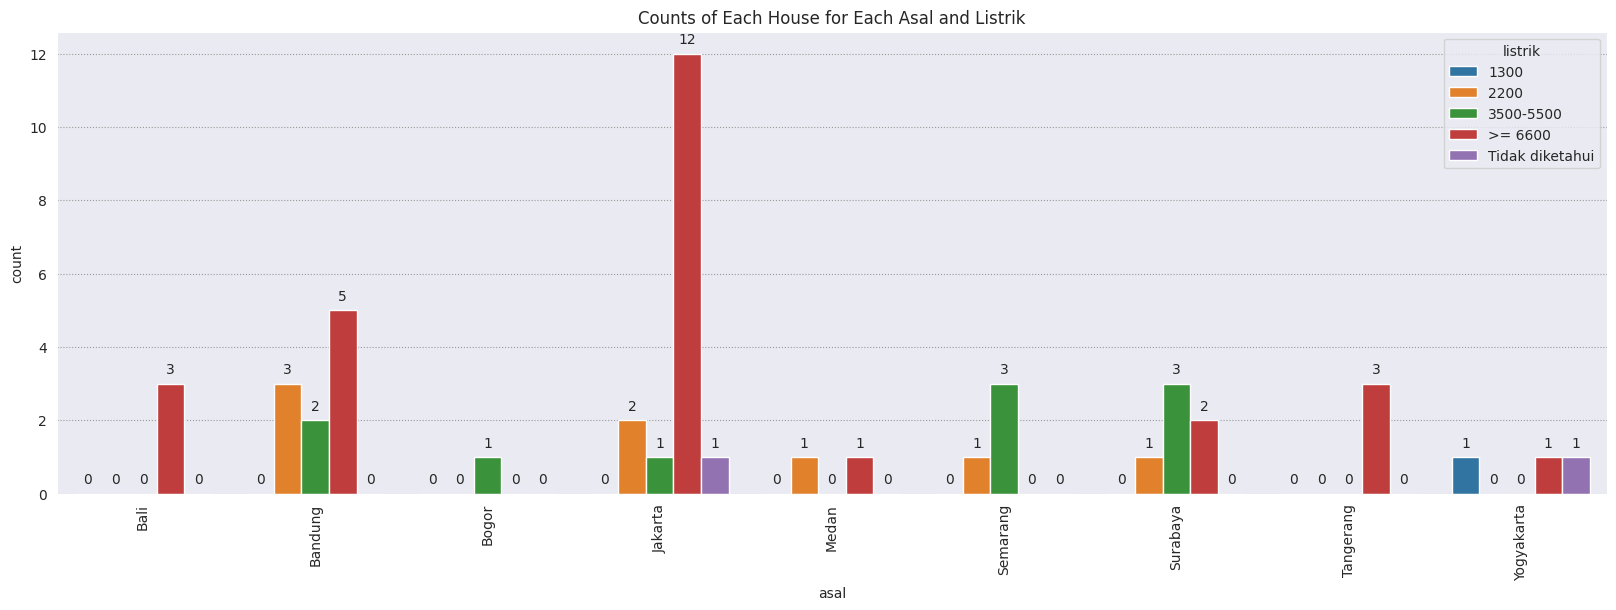

In [412]:
plt.figure(figsize=(20,6))
plot = sns.countplot(data=df_outliers, x='asal', hue='listrik')
plt.title('Counts of Each House for Each Asal and Listrik')
plt.xticks(rotation=90)

# Adding the count values on top of each bar
for p in plot.patches:
  plot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()